# AlphaPept Systems Check

This notebook will run several tests and compare the performance to MaxQuant. Depending on the machine, this can take several hours.
Each run is called via the `test_ci.py` script, which downloads files to a temporary folder which can be specified in this file.

This notebook requires the `matplotlib_venn` (`!pip install matplotlib_venn`) package.

## Reference Data

Download MaxQuant reference files. Referance MaxQuant data from `PXD006109` and `PXD010012` were taken from the paper, the others were analyzed with `MaxQuant_1.6.14`, default settings w/o second peptides and provided with the given contaminants file.

In [1]:
import os
import sys
sys.path.append(os.path.join(".."))
import test_ci
from test_ci import config_test_paths

try:
    import wget
except ImportError:
    !pip install wget
    import wget
    
FILE_DICT = {}
#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/1E2G1IwgcgdsCHC/download' #OLD MQ FILES
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/Fn2uxeYNL60JSd3/download'

#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/vMNferEoSoROJbb/download' #AP Files
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/KLBotZbodMByigh/download'

FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/fLhxQ8mVb29x9xH/download'
FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/BkMMHPregCQgKLg/download'
FILE_DICT['PXD010012_ref.txt'] = 'https://datashare.biochem.mpg.de/s/ps226k7Fme1K0jf/download'
FILE_DICT['PXD010012_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/pyhKMrytjdDU2sX/download'
FILE_DICT['bruker_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/fRcoGuwlcbH2SBJ/download'
FILE_DICT['thermo_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/p4Omj9K5hHmSoDl/download'

FILE_DICT['PXD015087_ref.txt'] = 'https://datashare.biochem.mpg.de/s/GIdgji3408UvS07/download'
FILE_DICT['PXD015087_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/eMuNLE2yjNbmiSi/download'
FILE_DICT['PXD015087_ref_evd_singlerun.txt'] = 'https://datashare.biochem.mpg.de/s/0QxM7eR7VDg1rFK/download'

tmp_folder = os.path.join(os.getcwd(),'temp/')

BASE_DIR = os.path.join(tmp_folder , 'test_files') # Storarge location for test files
TEST_DIR = os.path.join(tmp_folder,'test_temp')
ARCHIVE_DIR = os.path.join(tmp_folder,  os.path.sep, 'test_archive', os.path.sep)

MONGODB_USER = 'github_actions'
MONGODB_URL = 'ci.yue0n.mongodb.net/'

if not os.path.isdir(tmp_folder):
    os.mkdir(tmp_folder)

test_ci.config_test_paths(BASE_DIR, TEST_DIR, ARCHIVE_DIR, MONGODB_USER, MONGODB_URL)


for file in FILE_DICT:
    target = os.path.join(tmp_folder, file)
    if not os.path.isfile(target):
        wget.download(FILE_DICT[file], target)
        
software_1 = 'AlphaPept'
software_2 = 'MaxQuant'

## Single Files

Compare to the single HeLa test files

In [2]:
%run -i ../test_ci.py $tmp_folder thermo_irt

2022-03-27 00:35:35> Logging to C:\Users\admin\alphapept\logs\log_20220327003535.txt.
2022-03-27 00:35:35> Platform information:
2022-03-27 00:35:35> system     - Windows
2022-03-27 00:35:35> release    - 10
2022-03-27 00:35:35> version    - 10.0.19044
2022-03-27 00:35:35> machine    - AMD64
2022-03-27 00:35:35> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-27 00:35:35> cpu count  - 24
2022-03-27 00:35:35> ram memory - 121.7/127.7 Gb (available/total)
2022-03-27 00:35:35> 
2022-03-27 00:35:35> Python information:
2022-03-27 00:35:35> SQLAlchemy                    - 1.4.23
2022-03-27 00:35:35> alphapept                     - 0.4.4
2022-03-27 00:35:35> biopython                     - 1.78
2022-03-27 00:35:35> bumpversion                   - 
2022-03-27 00:35:35> bumpversion>                  - 
2022-03-27 00:35:35> click                         - 7.1.2
2022-03-27 00:35:35> click>                        - 
2022-03-27 00:35:35> fastcore                      - 1.3.

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:35:35> FASTA contains 247 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:30<00:00, 30.92s/it]

2022-03-27 00:36:06> Digested 247 proteins and generated 48,722 spectra
2022-03-27 00:36:07> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 0.02 GB
2022-03-27 00:36:07> ==== import_raw_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:36:07> Processing 1 files for step raw_conversion
2022-03-27 00:36:07> File F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT has extension .raw - converting from Thermo.
2022-03-27 00:36:13> File conversion complete. Extracted 2,603 precursors.
2022-03-27 00:36:13> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2022-03-27 00:36:13> ==== feature_finding ====


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:37<00:00, 37.73s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:36:14> Processing 1 files for step find_features
2022-03-27 00:36:14> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf. Adding to feature finding list.
2022-03-27 00:36:14> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw
2022-03-27 00:36:14> Hill extraction with centroid_tol 8 and max_gap 2
2022-03-27 00:36:18> Number of hills 45,516, len = 20.18
2022-03-27 00:36:18> Repeating hill extraction with centroid_tol 5.10
2022-03-27 00:36:19> Number of hills 52,919, len = 21.29
2022-03-27 00:36:21> After duplicate removal of hills 43,950
2022-03-27 00:36:27> After split hill_ptrs 61,693
2022-03-27 00:36:28> After filter hill_ptrs 60,175
2022-03-27 00:36:40> Extracting hill stats complete
2022-03-27 00:36:42> Found 7,045 pre isotope patterns.
2022-03-27 00:36:58> Extracted 6,459 isotope patterns.
2022-03-27 00:37:06> Report complete.
2022-03-27 00:37:06> Matching features to query data.
2022-0


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:37:07> Starting first search.
2022-03-27 00:37:07> Processing 1 files for step search_db
2022-03-27 00:37:07> Calibrating fragments
2022-03-27 00:37:08> Performing search on 2,986 query and 48,722 db entries with frag_tol = 30.00 and prec_tol = 30.00.


  0%|                                                                                            | 0/1 [00:54<?, ?it/s]


2022-03-27 00:37:10> Found 27 psms.
2022-03-27 00:37:10> Extracting columns for scoring.
2022-03-27 00:37:16> Extracted columns from 27 spectra.
2022-03-27 00:37:16> Saving first_search results to F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf
2022-03-27 00:37:16> Search of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2022-03-27 00:37:17> First search complete.
2022-03-27 00:37:17> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:37:17> Processing 1 files for step calibrate_hdf
2022-03-27 00:37:17> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw.
2022-03-27 00:37:17> Scoring using X-Tandem
2022-03-27 00:37:17> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-03-27 00:37:17> 15 target (0 decoy) of 15 PSMs. fdr 0.000000 for a cutoff of 18.90 (set fdr was 0.01)
2022-03-27 00:37:17> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw.
2022-03-27 00:37:17> Not enough data points present. Skipping recalibration.
2022-03-27 00:37:17> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf complete.
2022-03-27 00:37:17> Starting fragment calibration.
2022-03-27 00:37:17> Calibrating fragments with neighbors
2022-03-27 00:37:17> Scoring using X-Tandem
2022-03-27 00:37:17> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-03-27 00:37:17> 15 target (0 decoy) 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:37:17> Starting second search with DB.
2022-03-27 00:37:17> Processing 1 files for step search_db
2022-03-27 00:37:17> Found calibrated prec_tol with value 9.03
2022-03-27 00:37:17> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\projects\\alphapept\\sandbox\\temp\\test_temp\\thermo_IRT.ms_data.hdf>.'
2022-03-27 00:37:17> Performing search on 2,986 query and 48,722 db entries with frag_tol = 30.00 and prec_tol = 9.03.
2022-03-27 00:37:17> Found 26 psms.
2022-03-27 00:37:17> Extracting columns for scoring.
2022-03-27 00:37:17> Extracted columns from 26 spectra.
2022-03-27 00:37:17> Saving second_search results to F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf
2022-03-27 00:37:17> Search of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2022-03-27 00:37:18> Second search complete.
2022-03-27 00:37:18> ==== score ====





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:37:18> Processing 1 files for step score_hdf
2022-03-27 00:37:18> Calling score_hdf
2022-03-27 00:37:18> Found second search psms for scoring.
2022-03-27 00:37:18> Last q_value 0.000 of dataset is smaller than fdr_level 0.100
2022-03-27 00:37:18> 15 target (0 decoy) of 15 PSMs. fdr 0.000000 for a cutoff of 18.90 (set fdr was 0.1)
2022-03-27 00:37:18> The total number of available decoys is lower than the initial set of high scoring targets.
2022-03-27 00:37:18> ML failed. Defaulting to x_tandem score
2022-03-27 00:37:18> There are fewer high scoring targets or decoys than required by 'min_train'.
2022-03-27 00:37:18> Converting x_tandem score to probabilities
2022-03-27 00:37:18> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-03-27 00:37:18> 25 target (0 decoy) of 25 PSMs. fdr 0.000000 for a cutoff of 0.04 (set fdr was 0.01)
2022-03-27 00:37:18> Saving identifications to ms_data file.
2022-03-27 00:37:18> Saving identifications to ms_data file complete





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:37:19> Fasta dict with length 247, Pept dict with length 48,724
2022-03-27 00:37:19> Extracting protein groups.







  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-27 00:37:19> A total of 11 unique and 0 shared peptides.
2022-03-27 00:37:19> A total of 0 ambigious proteins
2022-03-27 00:37:19> A total of 0 unique and 0 shared peptides.
2022-03-27 00:37:19> A total of 0 ambigious proteins
2022-03-27 00:37:19> Global FDR on protein_group
2022-03-27 00:37:19> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-03-27 00:37:19> 3 target (0 decoy) of 3 PSMs. fdr 0.000000 for a cutoff of 0.35 (set fdr was 0.01)
2022-03-27 00:37:19> Global FDR cutoff at 0.34615384615384615.
2022-03-27 00:37:19> FDR on proteins complete. For 0.01 FDR found 15 targets and 0 decoys. A total of 3 proteins found.
2022-03-27 00:37:19> Saving complete.
2022-03-27 00:37:19> Protein groups complete.
2022-03-27 00:37:19> ==== quantification ====
2022-03-27 00:37:19> Reading protein_fdr for quantification.
2022-03-27 00:37:19> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-27 00:37:19> Complete.
2022-03-27 00:37:19> Start

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx', 'n_possible_proteins'],
      dtype='object')]

  pytables.to_hdf(




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:37:19> LFQ complete.
2022-03-27 00:37:19> Extracting protein_summary
2022-03-27 00:37:19> Saved protein_summary of length 3 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-27 00:37:19> Updating protein_fdr.
2022-03-27 00:37:19> Exporting as csv.
2022-03-27 00:37:19> Saved df of length 15 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-27 00:37:19> ==== export ====


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.31it/s]


2022-03-27 00:37:19> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-27 00:37:19> Analysis complete.


### Thermo HeLa

2022-03-27 00:37:20> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-27 00:37:21> No settings provided. Creating from default settings.
2022-03-27 00:37:21> Couldn't find compiled exe. Using Python version for testing.
2022-03-27 00:37:21> Logging to C:\Users\admin\alphapept\logs\log_20220327003721.txt.
2022-03-27 00:37:21> Platform information:
2022-03-27 00:37:21> system     - Windows
2022-03-27 00:37:21> release    - 10
2022-03-27 00:37:21> version    - 10.0.19044
2022-03-27 00:37:21> machine    - AMD64
2022-03-27 00:37:21> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-27 00:37:21> cpu count  - 24
2022-03-27 00:37:21> ram memory - 118.5/127.7 Gb (available/total)
2022-03-27 00:37:21> 
2022-03-27 00:37:21> Python information:
2022-03-27 00:37:21> SQLAlchemy                    - 1.4.23
2022-03-27 00:37:21> alphapept                     - 0.4.4
2022-03-27 00:37:21> biopython                     - 1.78
2022-03-27 00:37:21> bumpversion        





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:37:22> FASTA contains 36,789 entries.


  0%|                                                                                            | 0/1 [01:29<?, ?it/s]




  3%|█▋                                                              | 0.02702702702702703/1 [01:26<51:43, 3190.04s/it]



  5%|███▍                                                            | 0.05405405405405406/1 [01:27<21:15, 1348.74s/it]



  8%|█████▎                                                           | 0.08108108108108109/1 [01:29<11:40, 762.00s/it]



 11%|███████                                                          | 0.10810810810810811/1 [01:31<07:12, 485.46s/it]



 14%|████████▊                                                        | 0.13513513513513514/1 [01:32<04:46, 331.46s/it]



 16%|██████████▌                                                      | 0.16216216216216217/1 [01:33<03:13, 231.41s/it]



 19%|████████████▍                                                     | 0.1891891891891892/1 [01:35<02:18, 171.32s/it]



 22%|██████████

2022-03-27 00:39:54> Digested 36,789 proteins and generated 8,624,766 spectra
2022-03-27 00:41:17> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 3.32 GB
2022-03-27 00:41:30> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:41:30> Processing 1 files for step raw_conversion
2022-03-27 00:41:30> File F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2022-03-27 00:43:34> File conversion complete. Extracted 120,226 precursors.
2022-03-27 00:43:36> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-27 00:43:36> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:43:36> Processing 1 files for step find_features
2022-03-27 00:43:36> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2022-03-27 00:43:36> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2022-03-27 00:43:36> Hill extraction with centroid_tol 8 and max_gap 2


  0%|                                                                                            | 0/1 [02:10<?, ?it/s]


2022-03-27 00:43:41> Number of hills 1,105,353, len = 17.35
2022-03-27 00:43:41> Repeating hill extraction with centroid_tol 5.87
2022-03-27 00:43:45> Number of hills 1,227,331, len = 19.44
2022-03-27 00:43:46> After duplicate removal of hills 1,025,845
2022-03-27 00:43:56> After split hill_ptrs 1,207,373
2022-03-27 00:43:56> After filter hill_ptrs 1,188,406
2022-03-27 00:46:11> Extracting hill stats complete


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [08:57<00:00, 537.64s/it]


2022-03-27 00:46:22> Found 184,383 pre isotope patterns.
2022-03-27 00:47:04> Extracted 198,779 isotope patterns.
2022-03-27 00:47:07> Report complete.
2022-03-27 00:47:07> Matching features to query data.
2022-03-27 00:47:08> Saving feature table.
2022-03-27 00:47:08> Feature table saved to F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2022-03-27 00:47:08> Saving features.
2022-03-27 00:47:09> Feature finding of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-27 00:47:09> ==== search_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:47:09> Starting first search.
2022-03-27 00:47:09> Processing 1 files for step search_db
2022-03-27 00:47:09> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2022-03-27 00:47:23> Performing search on 246,959 query and 8,624,766 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2022-03-27 00:47:38> Found 676,773 psms.
2022-03-27 00:47:38> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [04:20<?, ?it/s]


2022-03-27 00:49:14> Extracted columns from 676,773 spectra.
2022-03-27 00:49:16> Saving first_search results to F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2022-03-27 00:49:20> Search of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-27 00:49:47> First search complete.
2022-03-27 00:49:48> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:49:48> Processing 1 files for step calibrate_hdf
2022-03-27 00:49:48> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-03-27 00:49:49> Scoring using X-Tandem
2022-03-27 00:49:51> 37,873 target (378 decoy) of 127414 PSMs. fdr 0.009981 for a cutoff of 27.44 (set fdr was 0.01)
2022-03-27 00:49:51> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-03-27 00:49:53> Precursor calibration std 0.99, 0.22
2022-03-27 00:49:53> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2022-03-27 00:49:53> Starting fragment calibration.
2022-03-27 00:49:53> Calibrating fragments with neighbors
2022-03-27 00:49:55> Scoring using X-Tandem
2022-03-27 00:49:57> 37,873 target (378 decoy) of 127414 PSMs. fdr 0.009981 for a cutoff of 27.44 (set fdr was 0.01)
2022-03-27 00:49:58> Minimum hits for fragments before score 7.00.
2022-03-27 00:49:59> Minimum 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:52:50> Starting second search with DB.
2022-03-27 00:52:50> Processing 1 files for step search_db
2022-03-27 00:52:50> Found calibrated prec_tol with value 4.95
2022-03-27 00:52:50> Found calibrated frag_tol with value 50.59
2022-03-27 00:52:52> Performing search on 246,959 query and 8,624,766 db entries with frag_tol = 50.59 and prec_tol = 4.95.
2022-03-27 00:52:56> Found 617,465 psms.
2022-03-27 00:52:57> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [03:32<?, ?it/s]


2022-03-27 00:54:20> Extracted columns from 617,465 spectra.
2022-03-27 00:54:21> Saving second_search results to F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2022-03-27 00:54:26> Search of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-27 00:54:50> Second search complete.
2022-03-27 00:54:51> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:54:51> Processing 1 files for step score_hdf
2022-03-27 00:54:51> Calling score_hdf
2022-03-27 00:54:52> Found second search psms for scoring.
2022-03-27 00:55:03> 54,264 target (5,426 decoy) of 120635 PSMs. fdr 0.099993 for a cutoff of 24.04 (set fdr was 0.1)
2022-03-27 00:55:03> Training & cross-validation on 11725 targets and 11725 decoys
2022-03-27 00:55:21> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2022-03-27 00:55:21> The train accuracy was 0.9651599147121536
2022-03-27 00:55:21> Testing on 46901 targets and 46901 decoys
2022-03-27 00:55:21> The test accuracy was 0.9312061576512228
2022-03-27 00:55:21> Top features {'x_tandem': 0.2434738985548397, 'hits_y': 0.1755392742728591, 'hits': 0.15831829958592142, 'fragments_matched_n_ratio': 0.11055153902252252, 'n_fragments_matched': 0.08633014574380456, 'fragments_matched_int_ratio': 0.046909113526932084, 'n_missed': 0.023094066262479805, 'fragments_mat

  0%|                                                                                            | 0/1 [02:51<?, ?it/s]


2022-03-27 00:55:53> Extracting fragment_ions complete.
2022-03-27 00:55:53> Scoring of files [<HDF_File F:\projects\alphapept\sandbox\temp\test_temp\thermo_HeLa.ms_data.hdf>] complete.
2022-03-27 00:55:54> ==== isobaric_labeling ====
2022-03-27 00:55:54> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:55:54> Fasta dict with length 36,789, Pept dict with length 8,624,772
2022-03-27 00:55:54> Extracting protein groups.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:55:54> A total of 39,303 unique and 2,602 shared peptides.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-27 00:55:55> A total of 803 ambigious proteins
2022-03-27 00:55:55> A total of 458 unique and 21 shared peptides.
2022-03-27 00:55:56> A total of 21 ambigious proteins
2022-03-27 00:55:56> Global FDR on protein_group
2022-03-27 00:55:56> 5,734 target (57 decoy) of 6913 PSMs. fdr 0.009941 for a cutoff of 0.97 (set fdr was 0.01)
2022-03-27 00:55:56> Global FDR cutoff at 0.9739365972708433.
2022-03-27 00:55:56> FDR on proteins complete. For 0.01 FDR found 47,258 targets and 58 decoys. A total of 5,791 proteins found.
2022-03-27 00:55:56> Saving complete.
2022-03-27 00:55:56> Protein groups complete.
2022-03-27 00:55:56> ==== quantification ====
2022-03-27 00:55:56> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-27 00:55:56> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-27 00:55:57> Complete.
2022-03-27 00:55:57> Starting profile extraction.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:55:57> LFQ complete.
2022-03-27 00:55:57> Extracting protein_summary
2022-03-27 00:55:57> Saved protein_summary of length 5,791 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-27 00:55:57> Updating protein_fdr.
2022-03-27 00:55:57> Exporting as csv.
2022-03-27 00:55:59> Saved df of length 47,316 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-27 00:55:59> ==== export ====
2022-03-27 00:56:03> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-27 00:56:03> Analysis complete.


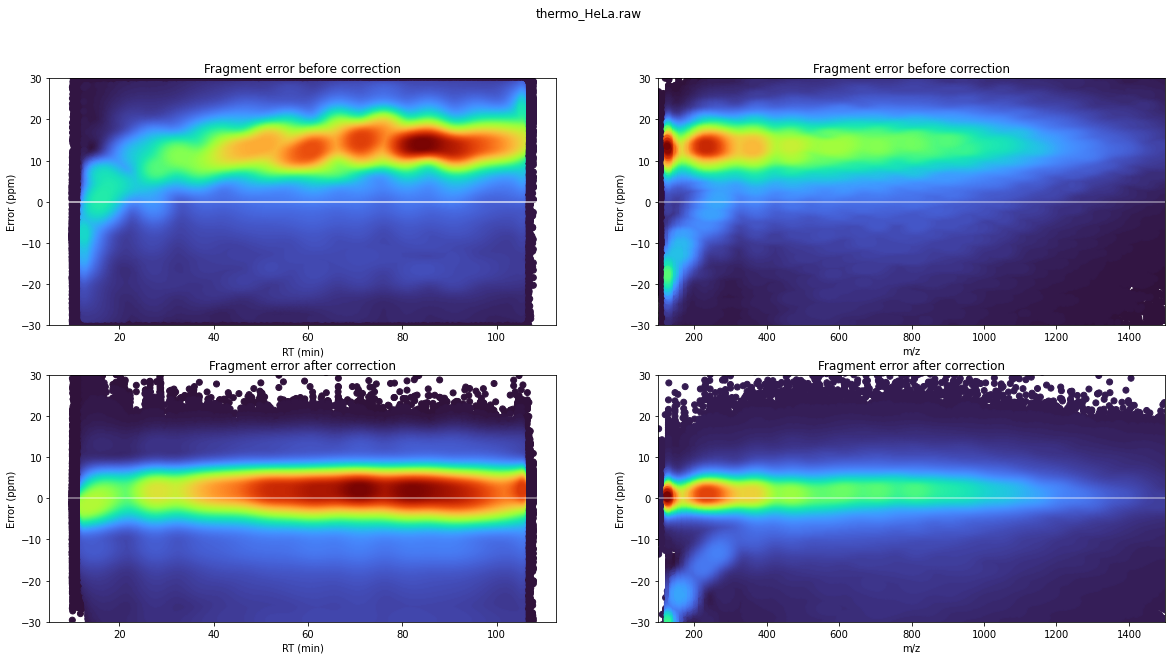

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:05<00:00, 65.31s/it]


In [3]:
%run -i ../test_ci.py $tmp_folder thermo_hela

In [4]:
try:
    import matplotlib_venn
except ModuleNotFoundError:
    !pip install matplotlib_venn
    import matplotlib_venn

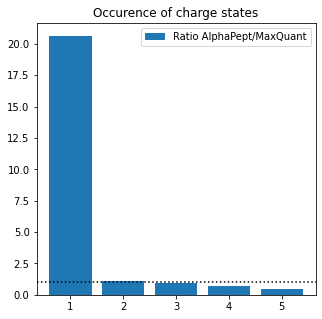

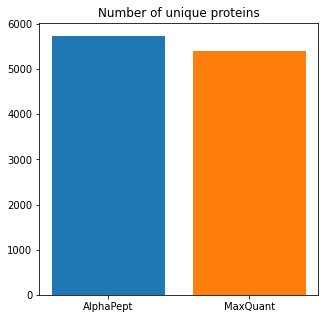

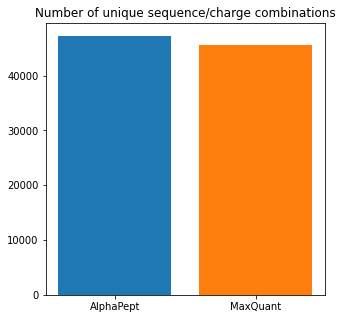

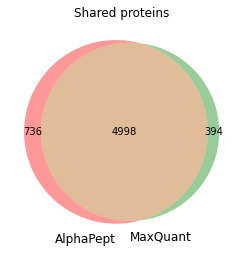

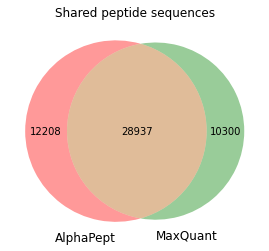

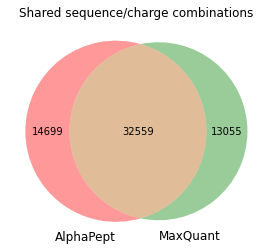

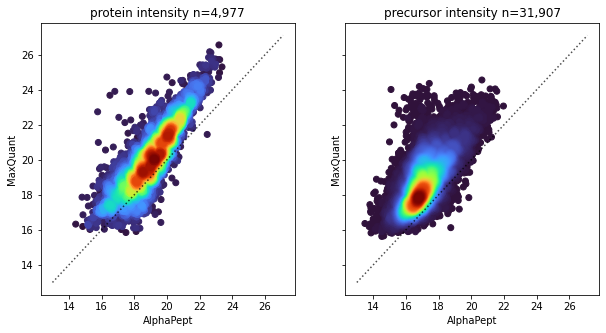

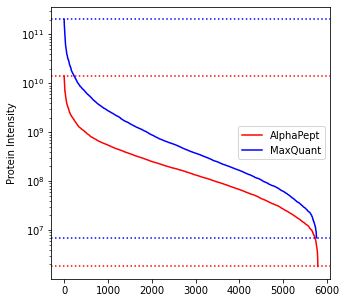

In [5]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os


df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'thermo_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Calling custom steps of the pipeline

Work with already processed results and call individual steps

--- ML ---
2022-03-27 00:57:17> 54,264 target (5,426 decoy) of 120635 PSMs. fdr 0.099993 for a cutoff of 24.04 (set fdr was 0.1)
2022-03-27 00:57:17> Training & cross-validation on 11725 targets and 11725 decoys
2022-03-27 00:57:33> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 200}
2022-03-27 00:57:33> The train accuracy was 0.9617484008528785
2022-03-27 00:57:33> Testing on 46901 targets and 46901 decoys
2022-03-27 00:57:34> The test accuracy was 0.9315899447772968
2022-03-27 00:57:34> Top features {'x_tandem': 0.3205538790468232, 'hits': 0.18102960601190066, 'hits_y': 0.12635814408756318, 'n_fragments_matched': 0.08352093578287043, 'fragments_matched_n_ratio': 0.06933489823002778, 'n_missed': 0.035647881324200076, 'fragments_matched_int_ratio': 0.03237304912414941, 'hits_y-NH3': 0.013840210561678931, 'delta_m_ppm_abs': 0.01298879982240909, 'fragments_matched_int_sum': 0.012654302343657104, 'hits_b': 0.010779463959265066, '

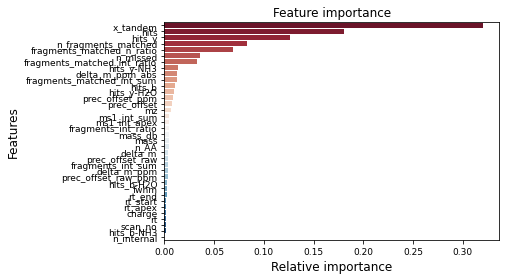

2022-03-27 00:57:35> Filter df with x_tandem score
2022-03-27 00:57:40> Global FDR on precursor
2022-03-27 00:57:40> 47,915 target (479 decoy) of 119105 PSMs. fdr 0.009997 for a cutoff of 0.89 (set fdr was 0.01)


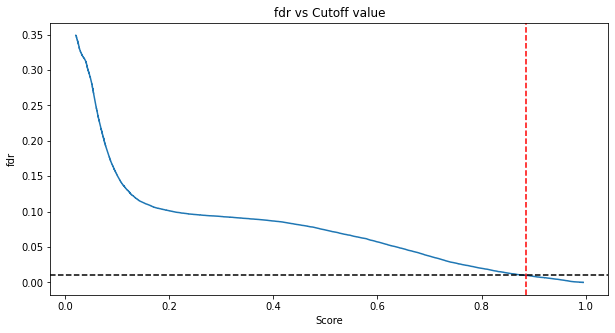

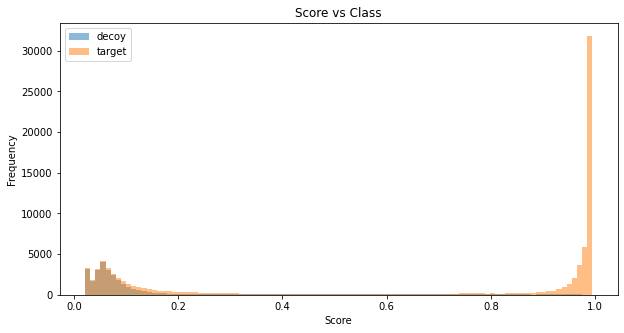

2022-03-27 00:57:41> Global FDR cutoff at 0.8858307213919153.
--- x! ---
2022-03-27 00:57:41> Filter df with x_tandem score
2022-03-27 00:57:41> Global FDR on precursor
2022-03-27 00:57:41> Last q_value 0.010 of dataset is smaller than fdr_level 0.010
2022-03-27 00:57:41> 47,915 target (479 decoy) of 48394 PSMs. fdr 0.009997 for a cutoff of 24.04 (set fdr was 0.01)


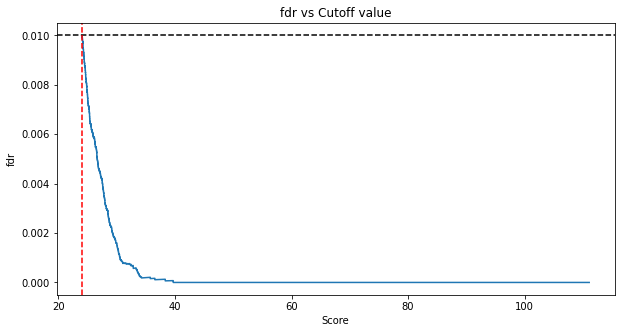

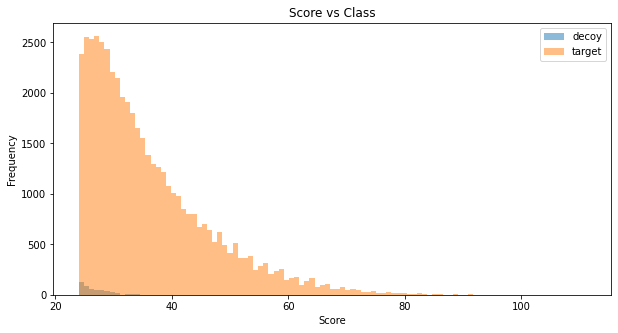

2022-03-27 00:57:42> Global FDR cutoff at 24.03892734307653.


In [6]:
import alphapept.io
from alphapept.score import get_ML_features, filter_with_ML, filter_with_x_tandem, cut_global_fdr, train_RF

ms_file = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'thermo_HeLa.ms_data.hdf'))

df = ms_file.read(dataset_name='second_search')
df = get_ML_features(df)

print('--- ML ---')
cv, features = train_RF(df, plot=True)
df = filter_with_ML(df, cv, features = features)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

print('--- x! ---')
df = filter_with_x_tandem(df)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

## Fractions

### Running a single fraction
In this section, we want to explicitly check, if fractionated samples are correctly handled in terms of FDR and Quantification. For this, we initially check how much we find in a single fractionated sample, as compared to Maxquant.


2022-03-27 00:57:43> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-27 00:57:44> No settings provided. Creating from default settings.
2022-03-27 00:57:44> Couldn't find compiled exe. Using Python version for testing.
2022-03-27 00:57:44> Logging to C:\Users\admin\alphapept\logs\log_20220327005744.txt.
2022-03-27 00:57:44> Platform information:
2022-03-27 00:57:44> system     - Windows
2022-03-27 00:57:44> release    - 10
2022-03-27 00:57:44> version    - 10.0.19044
2022-03-27 00:57:44> machine    - AMD64
2022-03-27 00:57:44> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-27 00:57:44> cpu count  - 24
2022-03-27 00:57:44> ram memory - 116.9/127.7 Gb (available/total)
2022-03-27 00:57:44> 
2022-03-27 00:57:44> Python information:
2022-03-27 00:57:44> SQLAlchemy                    - 1.4.23
2022-03-27 00:57:44> alphapept                     - 0.4.4
2022-03-27 00:57:44> biopython                     - 1.78
2022-03-27 00:57:44> bumpversion        


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 00:57:45> FASTA contains 20,611 entries.



  5%|███                                                            | 0.047619047619047616/1 [01:03<21:19, 1343.29s/it]
 10%|██████▏                                                          | 0.09523809523809523/1 [01:21<11:31, 764.20s/it]
 14%|█████████▎                                                       | 0.14285714285714285/1 [01:22<06:05, 426.20s/it]
 19%|████████████▍                                                    | 0.19047619047619047/1 [01:23<03:35, 266.71s/it]
 24%|███████████████▍                                                 | 0.23809523809523808/1 [01:24<02:16, 178.92s/it]
 29%|██████████████████▊                                               | 0.2857142857142857/1 [01:25<01:29, 125.23s/it]
 33%|██████████████████████▎                                            | 0.3333333333333333/1 [01:26<01:00, 91.33s/it]
 38%|█████████████████████████▏                                        | 0.38095238095238093/1 [01:27<00:42, 68.85s/it]
  0%|                                  

2022-03-27 00:59:37> Digested 20,611 proteins and generated 5,076,854 spectra
2022-03-27 01:00:24> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 1.94 GB
2022-03-27 01:00:31> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:00:31> Processing 1 files for step raw_conversion
2022-03-27 01:00:31> File F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1 has extension .raw - converting from Thermo.
2022-03-27 01:01:17> File conversion complete. Extracted 70,210 precursors.
2022-03-27 01:01:18> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw complete.
2022-03-27 01:01:18> ==== feature_finding ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:01:18> Processing 1 files for step find_features
2022-03-27 01:01:18> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf. Adding to feature finding list.
2022-03-27 01:01:18> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw
2022-03-27 01:01:18> Hill extraction with centroid_tol 8 and max_gap 2


  0%|                                                                                            | 0/1 [00:48<?, ?it/s]


2022-03-27 01:01:21> Number of hills 947,041, len = 14.39
2022-03-27 01:01:21> Repeating hill extraction with centroid_tol 6.61
2022-03-27 01:01:24> Number of hills 1,025,262, len = 14.14
2022-03-27 01:01:25> After duplicate removal of hills 848,010
2022-03-27 01:01:29> After split hill_ptrs 938,711
2022-03-27 01:01:29> After filter hill_ptrs 931,542
2022-03-27 01:03:14> Extracting hill stats complete
2022-03-27 01:03:22> Found 147,553 pre isotope patterns.
2022-03-27 01:03:59> Extracted 159,518 isotope patterns.
2022-03-27 01:04:01> Report complete.
2022-03-27 01:04:01> Matching features to query data.
2022-03-27 01:04:02> Saving feature table.
2022-03-27 01:04:02> Feature table saved to F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf
2022-03-27 01:04:02> Saving features.
2022-03-27 01:04:03> Feature finding of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw complete.
2022-03-27 01:04:03> ==== search_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:04:03> Starting first search.
2022-03-27 01:04:03> Processing 1 files for step search_db
2022-03-27 01:04:03> Calibrating fragments
2022-03-27 01:04:09> Performing search on 139,144 query and 5,076,854 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2022-03-27 01:04:11> Found 39,111 psms.
2022-03-27 01:04:11> Extracting columns for scoring.
2022-03-27 01:04:19> Extracted columns from 39,111 spectra.
2022-03-27 01:04:19> Saving first_search results to F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf
2022-03-27 01:04:19> Search of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw complete.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:39<00:00, 399.23s/it]
  0%|                                                                                            | 0/1 [03:05<?, ?it/s]


2022-03-27 01:04:37> First search complete.
2022-03-27 01:04:37> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:04:37> Processing 1 files for step calibrate_hdf
2022-03-27 01:04:37> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw.
2022-03-27 01:04:37> Scoring using X-Tandem
2022-03-27 01:04:37> 16,343 target (163 decoy) of 23920 PSMs. fdr 0.009974 for a cutoff of 20.80 (set fdr was 0.01)
2022-03-27 01:04:37> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw.
2022-03-27 01:04:39> Precursor calibration std 0.96, 0.34
2022-03-27 01:04:39> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf complete.
2022-03-27 01:04:39> Starting fragment calibration.
2022-03-27 01:04:39> Calibrating fragments with neighbors
2022-03-27 01:04:39> Scoring using X-Tandem
2022-03-27 01:04:39> 16,343 target (163 decoy) of 23920 PSMs. fdr 0.009974 for a cutoff of 20.80 (set fdr was 0.01)
2022-03-27 01:04:39> Minimum hits for fragments be



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:05:22> Starting second search with DB.
2022-03-27 01:05:22> Processing 1 files for step search_db
2022-03-27 01:05:22> Found calibrated prec_tol with value 4.79
2022-03-27 01:05:22> Found calibrated frag_tol with value 43.70
2022-03-27 01:05:23> Performing search on 139,144 query and 5,076,854 db entries with frag_tol = 43.70 and prec_tol = 4.79.
2022-03-27 01:05:23> Found 38,985 psms.
2022-03-27 01:05:23> Extracting columns for scoring.
2022-03-27 01:05:31> Extracted columns from 38,985 spectra.
2022-03-27 01:05:31> Saving second_search results to F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.ms_data.hdf
2022-03-27 01:05:32> Search of file F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw complete.


  0%|                                                                                            | 0/1 [00:59<?, ?it/s]


2022-03-27 01:05:47> Second search complete.
2022-03-27 01:05:48> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:05:48> Processing 1 files for step score_hdf
2022-03-27 01:05:48> Calling score_hdf
2022-03-27 01:05:48> Found second search psms for scoring.
2022-03-27 01:05:49> Last q_value 0.025 of dataset is smaller than fdr_level 0.100
2022-03-27 01:05:49> 24,748 target (622 decoy) of 25370 PSMs. fdr 0.025133 for a cutoff of 16.44 (set fdr was 0.1)
2022-03-27 01:05:49> The total number of available decoys is lower than the initial set of high scoring targets.
2022-03-27 01:05:49> Training & cross-validation on 746 targets and 745 decoys
2022-03-27 01:05:52> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 150}
2022-03-27 01:05:52> The train accuracy was 1.0
2022-03-27 01:05:52> Testing on 2982 targets and 2983 decoys
2022-03-27 01:05:52> The test accuracy was 0.936127409891031
2022-03-27 01:05:52> Top features {'hits_y': 0.22003810731801127, 'hits': 0.1180961779727814, 'fragments_int_sum': 0.08894532334378119, 'x_tandem': 0.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:06:03> Fasta dict with length 20,611, Pept dict with length 5,076,860
2022-03-27 01:06:03> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-27 01:06:03> A total of 20,509 unique and 1,629 shared peptides.
2022-03-27 01:06:04> A total of 460 ambigious proteins
2022-03-27 01:06:04> A total of 253 unique and 7 shared peptides.
2022-03-27 01:06:04> A total of 7 ambigious proteins
2022-03-27 01:06:04> Global FDR on protein_group
2022-03-27 01:06:04> 3,366 target (33 decoy) of 3852 PSMs. fdr 0.009804 for a cutoff of 0.56 (set fdr was 0.01)
2022-03-27 01:06:04> Global FDR cutoff at 0.56.
2022-03-27 01:06:04> FDR on proteins complete. For 0.01 FDR found 24,066 targets and 34 decoys. A total of 3,399 proteins found.
2022-03-27 01:06:04> Saving complete.
2022-03-27 01:06:04> Protein groups complete.
2022-03-27 01:06:04> ==== quantification ====
2022-03-27 01:06:04> Reading protein_fdr for quantification.
2022-03-27 01:06:05> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-27 01:06:05> Complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-27 01:06:05> Starting profile extraction.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:06:05> LFQ complete.
2022-03-27 01:06:05> Extracting protein_summary
2022-03-27 01:06:05> Saved protein_summary of length 3,399 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-27 01:06:05> Updating protein_fdr.
2022-03-27 01:06:05> Exporting as csv.
2022-03-27 01:06:06> Saved df of length 24,100 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-27 01:06:06> ==== export ====
2022-03-27 01:06:07> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-27 01:06:07> Analysis complete.


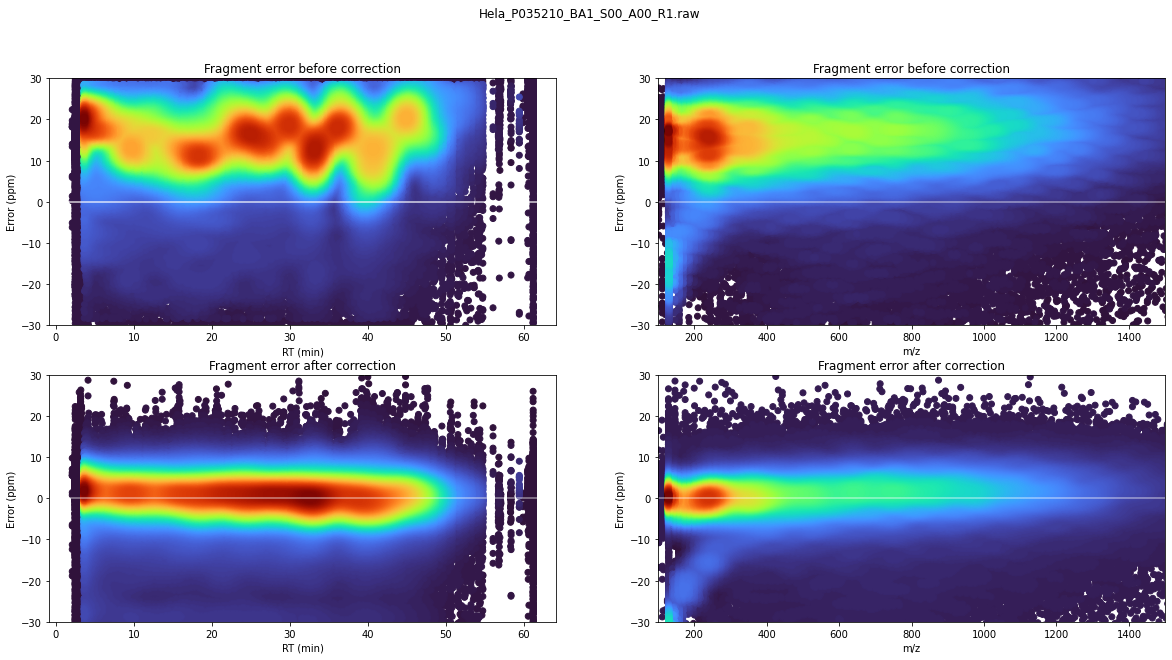

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.10s/it]


In [7]:
%run -i ../test_ci.py $tmp_folder thermo_singlefrac

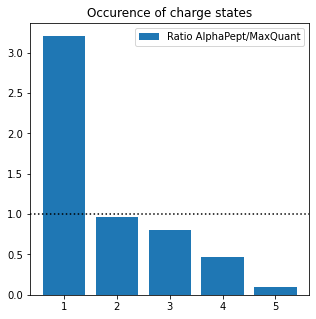

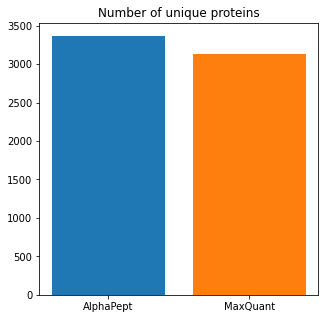

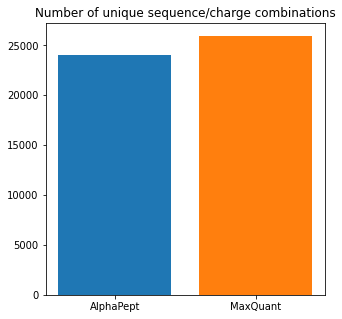

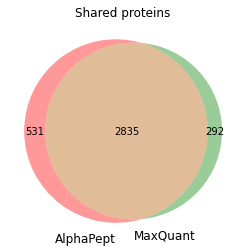

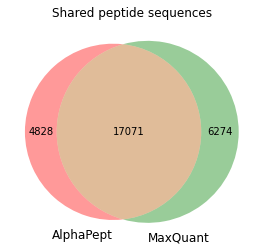

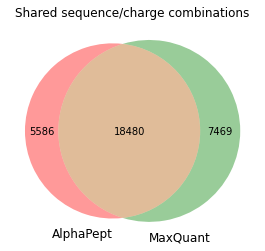

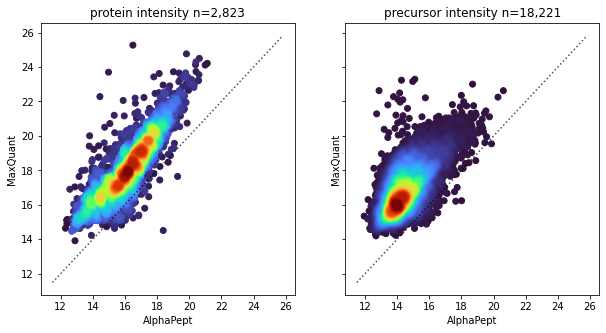

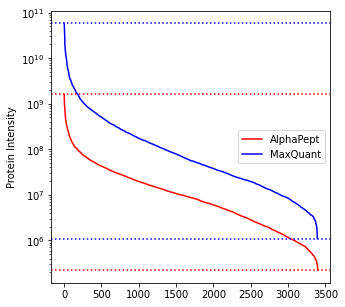

In [8]:
#compare with evidence 
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os
import alphapept.io
import pandas as pd

#ap_full_df = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'Hela_P035210_BA1_S00_A00_R1.ms_data.hdf')).read(dataset_name='peptide_fdr')

df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd_singlerun.txt'))

for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Running Multiple fractions
Above, we have seen that a single fraction is quite similar to Maxquant, with slightly fewer hits for AP. We now want to check, if this also translates to multiple fractions


In [9]:
%run -i ../test_ci.py $tmp_folder PXD015087

2022-03-27 01:06:24> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-27 01:06:27> No settings provided. Creating from default settings.
2022-03-27 01:06:27> Couldn't find compiled exe. Using Python version for testing.
2022-03-27 01:06:27> Logging to C:\Users\admin\alphapept\logs\log_20220327010627.txt.
2022-03-27 01:06:27> Platform information:
2022-03-27 01:06:27> system     - Windows
2022-03-27 01:06:27> release    - 10
2022-03-27 01:06:27> version    - 10.0.19044
2022-03-27 01:06:27> machine    - AMD64
2022-03-27 01:06:27> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-27 01:06:27> cpu count  - 24
2022-03-27 01:06:27> ram memory - 115.6/127.7 Gb (available/total)
2022-03-27 01:06:27> 
2022-03-27 01:06:27> Python information:
2022-03-27 01:06:27> SQLAlchemy                    - 1.4.23
2022-03-27 01:06:27> alphapept                     - 0.4.4
2022-03-27 01:06:27> biopython                     - 1.78
2022-03-27 01:06:27> bumpversion        


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:06:28> FASTA contains 20,611 entries.



  0%|                                                                                            | 0/1 [01:44<?, ?it/s]

 10%|██████▏                                                          | 0.09523809523809523/1 [01:21<11:37, 770.93s/it]
 14%|█████████▎                                                       | 0.14285714285714285/1 [01:23<06:11, 433.63s/it]
 19%|████████████▍                                                    | 0.19047619047619047/1 [01:24<03:41, 273.77s/it]
 24%|███████████████▍                                                 | 0.23809523809523808/1 [01:25<02:19, 182.78s/it]
 29%|██████████████████▊                                               | 0.2857142857142857/1 [01:27<01:33, 130.30s/it]
 33%|██████████████████████▎                                            | 0.3333333333333333/1 [01:28<01:04, 97.20s/it]
 38%|█████████████████████████▏                                        | 0.38095238095238093/1 [01:29<00:45, 72.73s/it]
 43%|████████████████████████████▎    

2022-03-27 01:08:21> Digested 20,611 proteins and generated 5,076,854 spectra
2022-03-27 01:09:09> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 1.94 GB
2022-03-27 01:09:17> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:09:17> Processing 4 files for step raw_conversion
2022-03-27 01:09:17> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 01:10:10> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step raw_conversion succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:53<02:40, 213.48s/it]

2022-03-27 01:10:10> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step raw_conversion succeeded. 50.00 %
2022-03-27 01:10:10> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step raw_conversion succeeded. 75.00 %
2022-03-27 01:10:10> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step raw_conversion succeeded. 100.00 %
2022-03-27 01:10:10> ==== feature_finding ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:10:10> Processing 4 files for step find_features
2022-03-27 01:10:10> Setting Process limit to 14
2022-03-27 01:10:10> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-27 01:14:59> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step find_features succeeded. 25.00 %




 25%|███████████████████▊                                                           | 0.25/1 [04:48<14:26, 1154.98s/it]

2022-03-27 01:14:59> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step find_features succeeded. 50.00 %
2022-03-27 01:14:59> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step find_features succeeded. 75.00 %
2022-03-27 01:15:03> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step find_features succeeded. 100.00 %




100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:52<00:00, 222.99s/it]

2022-03-27 01:15:03> ==== search_data ====





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:15:03> Starting first search.
2022-03-27 01:15:03> Processing 4 files for step search_db
2022-03-27 01:15:03> Searching. Setting Process limit to 14.
2022-03-27 01:15:03> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-27 01:15:43> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %





 25%|████████████████████                                                            | 0.25/1 [00:39<01:59, 159.20s/it]

2022-03-27 01:15:43> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-03-27 01:15:43> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %
2022-03-27 01:15:44> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %





100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:30<00:00, 390.69s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [05:37<00:00, 337.14s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [09:24<00:00, 564.96s/it]


2022-03-27 01:16:00> First search complete.
2022-03-27 01:16:00> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:16:00> Processing 4 files for step calibrate_hdf
2022-03-27 01:16:00> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 01:16:57> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step calibrate_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:57<02:51, 228.05s/it]

2022-03-27 01:16:57> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step calibrate_hdf succeeded. 50.00 %
2022-03-27 01:17:01> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step calibrate_hdf succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [01:00<00:16, 64.74s/it]

2022-03-27 01:17:01> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step calibrate_hdf succeeded. 100.00 %
2022-03-27 01:17:01> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:17:01> Starting second search with DB.
2022-03-27 01:17:01> Processing 4 files for step search_db
2022-03-27 01:17:01> Searching. Setting Process limit to 14.
2022-03-27 01:17:01> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-27 01:17:28> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %



 25%|████████████████████                                                            | 0.25/1 [00:27<01:21, 108.94s/it]

2022-03-27 01:17:28> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-03-27 01:17:28> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %



 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:27<00:07, 28.71s/it]

2022-03-27 01:17:28> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:31<00:00, 91.89s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:32<00:00, 152.76s/it]


2022-03-27 01:17:44> Second search complete.
2022-03-27 01:17:44> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:17:44> Processing 4 files for step score_hdf
2022-03-27 01:17:44> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 01:19:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step score_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [01:35<04:47, 382.67s/it]

2022-03-27 01:19:20> ==== isobaric_labeling ====
2022-03-27 01:19:20> ==== protein_grouping ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:19:20> Fasta dict with length 20,611, Pept dict with length 5,076,860
2022-03-27 01:19:20> Extracting protein groups.





 25%|████████████████████                                                            | 0.25/1 [01:35<04:47, 383.61s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-27 01:19:20> A total of 20,225 unique and 1,603 shared peptides.
2022-03-27 01:19:21> A total of 460 ambigious proteins
2022-03-27 01:19:21> A total of 103 unique and 8 shared peptides.
2022-03-27 01:19:21> A total of 8 ambigious proteins
2022-03-27 01:19:21> Global FDR on protein_group
2022-03-27 01:19:21> 3,346 target (33 decoy) of 3566 PSMs. fdr 0.009863 for a cutoff of 0.47 (set fdr was 0.01)
2022-03-27 01:19:21> Global FDR cutoff at 0.47441142944038495.
2022-03-27 01:19:21> FDR on proteins complete. For 0.01 FDR found 23,925 targets and 33 decoys. A total of 3,379 proteins found.
2022-03-27 01:19:21> Saving complete.
2022-03-27 01:19:21> Protein groups complete.
2022-03-27 01:19:21> ==== quantification ====
2022-03-27 01:19:21> Reading protein_fdr for quantification.
2022-03-27 01:19:22> Saving protein_groups after delayed normalization to combined_protein_fdr_dn


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-27 01:19:22> Complete.
2022-03-27 01:19:22> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:19:22> LFQ complete.
2022-03-27 01:19:22> Extracting protein_summary
2022-03-27 01:19:22> Saved protein_summary of length 3,379 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-27 01:19:22> Updating protein_fdr.
2022-03-27 01:19:22> Exporting as csv.
2022-03-27 01:19:23> Saved df of length 23,958 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-27 01:19:23> ==== export ====


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.76s/it]


2022-03-27 01:19:25> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-27 01:19:25> Analysis complete.


C:\Users\admin\AppData\Local\Temp/ipykernel_22996/1341368599.py:9: DtypeWarning: Columns (51) have mixed types.Specify dtype option on import or set low_memory=False.
  df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd.txt'))


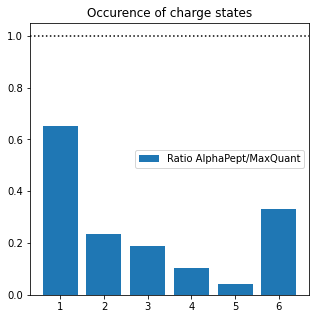

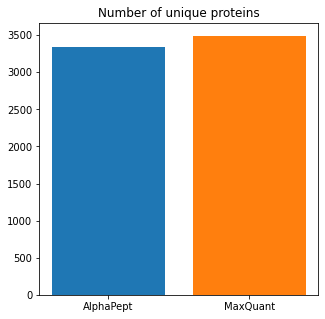

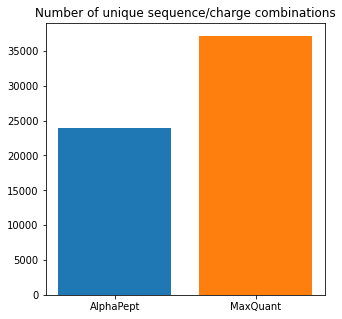

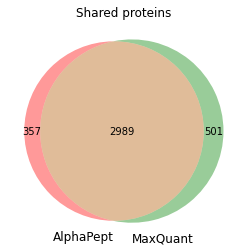

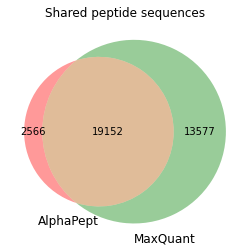

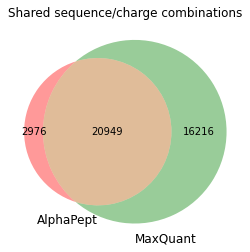

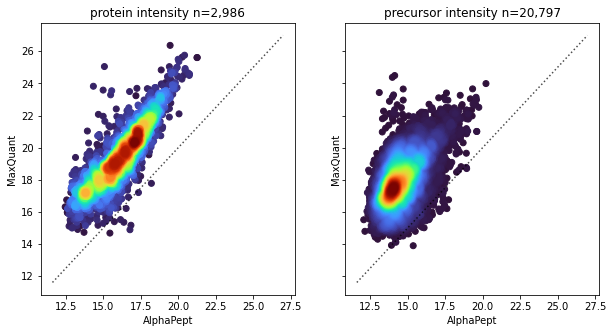

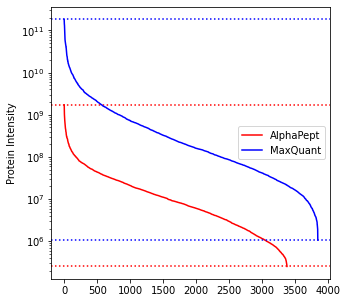

In [10]:

#compare with evidence 
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os
import alphapept.io
import pandas as pd

#ap_full_df = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'Hela_P035210_BA1_S00_A00_R1.ms_data.hdf')).read(dataset_name='peptide_fdr')

df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd.txt'))

for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Running Multiple fractions
Above, we have seen that a single fraction is quite similar to Maxquant, with slightly fewer hits for AP. We now want to check, if this also translates to multiple fractions

In [11]:
%run -i ../test_ci.py $tmp_folder PXD015087

2022-03-27 01:19:30> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-27 01:19:32> No settings provided. Creating from default settings.
2022-03-27 01:19:32> Couldn't find compiled exe. Using Python version for testing.
2022-03-27 01:19:32> Logging to C:\Users\admin\alphapept\logs\log_20220327011932.txt.
2022-03-27 01:19:32> Platform information:
2022-03-27 01:19:32> system     - Windows
2022-03-27 01:19:32> release    - 10
2022-03-27 01:19:32> version    - 10.0.19044
2022-03-27 01:19:32> machine    - AMD64
2022-03-27 01:19:32> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-27 01:19:32> cpu count  - 24
2022-03-27 01:19:32> ram memory - 116.7/127.7 Gb (available/total)
2022-03-27 01:19:32> 
2022-03-27 01:19:32> Python information:
2022-03-27 01:19:32> SQLAlchemy                    - 1.4.23
2022-03-27 01:19:32> alphapept                     - 0.4.4
2022-03-27 01:19:32> biopython                     - 1.78
2022-03-27 01:19:32> bumpversion        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:19:33> FASTA contains 20,611 entries.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:56<00:00, 236.87s/it]
  0%|                                                                                            | 0/1 [01:37<?, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:43<00:00, 22.60s/it]

2022-03-27 01:21:25> Digested 20,611 proteins and generated 5,076,854 spectra
2022-03-27 01:22:10> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 1.94 GB
2022-03-27 01:22:17> ==== import_raw_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:22:17> Processing 4 files for step raw_conversion
2022-03-27 01:22:17> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 01:23:10> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step raw_conversion succeeded. 25.00 %



 25%|████████████████████                                                            | 0.25/1 [00:53<02:40, 213.34s/it]

2022-03-27 01:23:10> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step raw_conversion succeeded. 50.00 %
2022-03-27 01:23:10> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step raw_conversion succeeded. 75.00 %
2022-03-27 01:23:11> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step raw_conversion succeeded. 100.00 %



100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:53<00:00, 40.74s/it]

2022-03-27 01:23:11> ==== feature_finding ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:23:11> Processing 4 files for step find_features
2022-03-27 01:23:11> Setting Process limit to 14
2022-03-27 01:23:11> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-27 01:28:00> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step find_features succeeded. 25.00 %




 25%|███████████████████▊                                                           | 0.25/1 [04:49<14:28, 1158.56s/it]

2022-03-27 01:28:00> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step find_features succeeded. 50.00 %
2022-03-27 01:28:03> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step find_features succeeded. 75.00 %




 75%|████████████████████████████████████████████████████████████                    | 0.75/1 [04:51<01:15, 303.66s/it]

2022-03-27 01:28:03> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step find_features succeeded. 100.00 %
2022-03-27 01:28:03> ==== search_data ====





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:28:03> Starting first search.
2022-03-27 01:28:03> Processing 4 files for step search_db
2022-03-27 01:28:03> Searching. Setting Process limit to 14.
2022-03-27 01:28:03> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-27 01:28:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %





 25%|████████████████████                                                            | 0.25/1 [00:39<01:57, 156.87s/it]

2022-03-27 01:28:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-03-27 01:28:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %





 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:39<00:10, 41.23s/it]

2022-03-27 01:28:43> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %





100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:29<00:00, 389.43s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [05:35<00:00, 335.55s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [09:14<00:00, 554.90s/it]


2022-03-27 01:28:59> First search complete.
2022-03-27 01:28:59> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:28:59> Processing 4 files for step calibrate_hdf
2022-03-27 01:28:59> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 01:29:55> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step calibrate_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [00:55<02:46, 221.71s/it]

2022-03-27 01:29:55> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step calibrate_hdf succeeded. 50.00 %
2022-03-27 01:29:58> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step calibrate_hdf succeeded. 75.00 %


 75%|████████████████████████████████████████████████████████████▊                    | 0.75/1 [00:59<00:15, 62.79s/it]

2022-03-27 01:29:58> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step calibrate_hdf succeeded. 100.00 %
2022-03-27 01:29:58> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:29:58> Starting second search with DB.
2022-03-27 01:29:58> Processing 4 files for step search_db
2022-03-27 01:29:58> Searching. Setting Process limit to 14.
2022-03-27 01:29:58> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-27 01:30:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step search_db succeeded. 25.00 %



 25%|████████████████████                                                            | 0.25/1 [00:27<01:21, 108.29s/it]

2022-03-27 01:30:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R5.raw for step search_db succeeded. 50.00 %
2022-03-27 01:30:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R14.raw for step search_db succeeded. 75.00 %
2022-03-27 01:30:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R19.raw for step search_db succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:30<00:00, 150.63s/it]
100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:34<00:00, 94.11s/it]


2022-03-27 01:30:40> Second search complete.
2022-03-27 01:30:41> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:30:41> Processing 4 files for step score_hdf
2022-03-27 01:30:41> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 01:32:11> Processing of F:\projects\alphapept\sandbox\temp/test_temp\Hela_P035210_BA1_S00_A00_R1.raw for step score_hdf succeeded. 25.00 %


 25%|████████████████████                                                            | 0.25/1 [01:29<04:29, 359.38s/it]

2022-03-27 01:32:11> ==== isobaric_labeling ====
2022-03-27 01:32:11> ==== protein_grouping ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:32:11> Fasta dict with length 20,611, Pept dict with length 5,076,860
2022-03-27 01:32:11> Extracting protein groups.





 25%|████████████████████                                                            | 0.25/1 [01:30<04:30, 360.26s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-27 01:32:11> A total of 20,225 unique and 1,603 shared peptides.
2022-03-27 01:32:12> A total of 460 ambigious proteins
2022-03-27 01:32:12> A total of 103 unique and 8 shared peptides.
2022-03-27 01:32:12> A total of 8 ambigious proteins
2022-03-27 01:32:12> Global FDR on protein_group
2022-03-27 01:32:12> 3,346 target (33 decoy) of 3566 PSMs. fdr 0.009863 for a cutoff of 0.47 (set fdr was 0.01)
2022-03-27 01:32:12> Global FDR cutoff at 0.47441142944038495.
2022-03-27 01:32:12> FDR on proteins complete. For 0.01 FDR found 23,925 targets and 33 decoys. A total of 3,379 proteins found.
2022-03-27 01:32:12> Saving complete.
2022-03-27 01:32:12> Protein groups complete.
2022-03-27 01:32:12> ==== quantification ====
2022-03-27 01:32:12> Reading protein_fdr for quantification.
2022-03-27 01:32:12> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-27 01:32:12> Complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-27 01:32:12> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:32:12> LFQ complete.
2022-03-27 01:32:12> Extracting protein_summary
2022-03-27 01:32:12> Saved protein_summary of length 3,379 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-27 01:32:13> Updating protein_fdr.
2022-03-27 01:32:13> Exporting as csv.
2022-03-27 01:32:13> Saved df of length 23,958 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-27 01:32:13> ==== export ====
2022-03-27 01:32:15> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-27 01:32:15> Analysis complete.


C:\Users\admin\AppData\Local\Temp/ipykernel_22996/2038381451.py:9: DtypeWarning: Columns (51) have mixed types.Specify dtype option on import or set low_memory=False.
  df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd.txt'))
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.66s/it]


level_0  charge   db_idx  decoy  decoys_cum   delta_m  delta_m_ppm  \
index                                                                        
135687        0     2.0  1628203  False           0 -0.000746    -2.096321   
141184        2     2.0  2120477  False           0  0.000640     1.309576   
118556        8     2.0   132272  False           7 -0.000074    -0.238724   
119424       72     2.0   223559  False          57 -0.000466    -1.705622   
119422       73     1.0   223559  False           4 -0.003039    -8.248005   
...         ...     ...      ...    ...         ...       ...          ...   
153322    24122     2.0  3836490  False          13 -0.002416    -5.831971   
148635    24123     2.0  2935263  False          58  0.000498     1.147771   
123822    24137     2.0   658746  False          28 -0.000269    -0.948975   
153320    24138     3.0  3836604   True         107 -0.005003    -9.905252   
148505    24140     2.0  2916136  False          43 -0.005887   -13.948273   

        delta_m_ppm_abs       fdr  feature_idx  ...  decoy_protein  \
index                                           ...                  
135687         2.096321  0.000000         1607  ...          False   
141184         1.309576  0.000000        53212  ...          False   
118556         0.238724  0.000258         7351  ...          False   
119424         1.705622  0.001753         3338  ...          False   
119422         8.248005  0.000155        45139  ...          False   
...                 ...       ...          ...  ...            ...   
153322         5.831971  0.000453        75464  ...          False   
148635         1.147771  0.001783        76422  ...          False   
123822         0.948975  0.000897       106904  ...          False   
153320         9.905252  0.003218       105954  ...           True   
148505        13.948273  0.001350        77252  ...          False   

       n_possible_proteins index_protein_group  score_protein_group  \
index                                                                 
135687                   1                 636             0.994853   
141184                   1                 636             0.994853   
118556                   1                 636             0.994853   
119424                   1                 636             0.994853   
119422                   1                 636             0.994853   
...                    ...                 ...                  ...   
153322                   1                3408             0.881995   
148635                   1                1873             0.662307   
123822                   1                2463             0.780798   
153320                   1                  61             0.549445   
148505                   1                2325             0.733489   

        target_protein_group  target_cum_protein_group  \
index                                                    
135687                  True                       152   
141184                  True                       152   
118556                  True                       152   
119424                  True                       152   
119422                  True                       152   
...                      ...                       ...   
153322                  True                      3107   
148635                  True                      3284   
123822                  True                      3220   
153320                 False                      3323   
148505                  True                      3253   

        decoys_cum_protein_group  fdr_protein_group  q_value_protein_group  \
index                                                                        
135687                         0           0.000000               0.000000   
141184                         0           0.000000               0.000000   
118556                         0           0.000000               0.000000   
119424       

Sequence  Length Modifications  \
0       AAAAAAAAAPAAAATAPTTAATTAATAAQ      29    Unmodified   
1       AAAAAAAAAPAAAATAPTTAATTAATAAQ      29    Unmodified   
2       AAAAAAAAAPAAAATAPTTAATTAATAAQ      29    Unmodified   
3       AAAAAAAAAPAAAATAPTTAATTAATAAQ      29    Unmodified   
4                         AAAAAAALQAK      11    Unmodified   
...                               ...     ...           ...   
109111                   YYVTIIDAPGHR      12    Unmodified   
109112                   YYVTIIDAPGHR      12    Unmodified   
109113                   YYVTIIDAPGHR      12    Unmodified   
109114                   YYVTIIDAPGHR      12    Unmodified   
109115                   YYVTIIDAPGHR      12    Unmodified   

                      Modified sequence Oxidation (M) Probabilities  \
0       _AAAAAAAAAPAAAATAPTTAATTAATAAQ_                         NaN   
1       _AAAAAAAAAPAAAATAPTTAATTAATAAQ_                         NaN   
2       _AAAAAAAAAPAAAATAPTTAATTAATAAQ_                         NaN   
3       _AAAAAAAAAPAAAATAPTTAATTAATAAQ_                         NaN   
4                         _AAAAAAALQAK_                         NaN   
...                                 ...                         ...   
109111                   _YYVTIIDAPGHR_                         NaN   
109112                   _YYVTIIDAPGHR_                         NaN   
109113                   _YYVTIIDAPGHR_                         NaN   
109114                   _YYVTIIDAPGHR_                         NaN   
109115                   _YYVTIIDAPGHR_                         NaN   

       Oxidation (M) Score Diffs  Acetyl (Protein N-term)  Oxidation (M)  \
0                            NaN                        0              0   
1                            NaN                        0              0   
2                            NaN                        0              0   
3                            NaN                        0              0   
4                            NaN                        0              0   
...                          ...                      ...            ...   
109111                       NaN                        0              0   
109112                       NaN                        0              0   
109113                       NaN                        0              0   
109114                       NaN                        0              0   
109115                       NaN                        0              0   

        Missed cleavages                                     Proteins  ...  \
0                      0                        sp|P37108|SRP14_HUMAN  ...   
1                      0                        sp|P37108|SRP14_HUMAN  ...   
2                      0                        sp|P37108|SRP14_HUMAN  ...   
3                      0                        sp|P37108|SRP14_HUMAN  ...   
4                      0                          sp|P36578|RL4_HUMAN  ...   
...                  ...                                          ...  ...   
109111                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   
109112                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   
109113                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   
109114                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   
109115                 0  sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN  ...   

       AIF MS/MS IDs Oxidation (M) site IDs charge  \
0                NaN                    NaN      2   
1                NaN                    NaN      2   
2                NaN                    NaN      2   
3                NaN                    NaN      2   
4                NaN                    NaN      2   
...              ...                    ...    ...   
109111           NaN                    NaN      3   
109112           NaN                    NaN      2   
109113           NaN                    NaN      3   
109114           NaN         

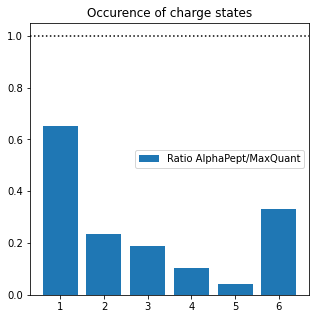

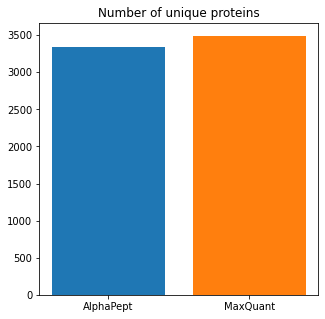

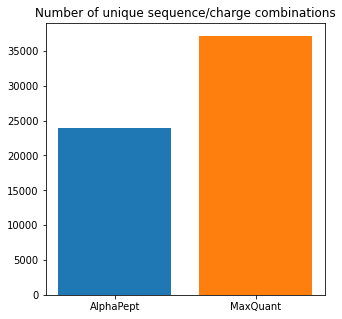

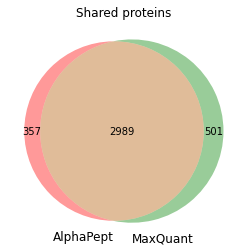

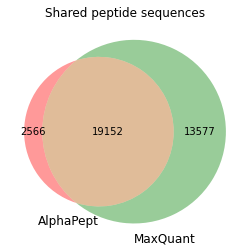

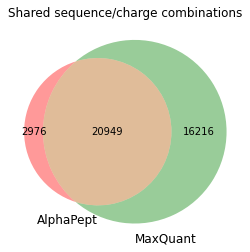

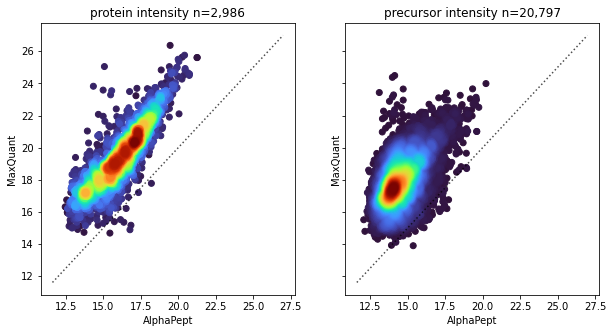

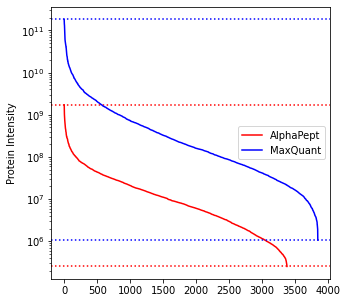

In [12]:
#compare with evidence 
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os
import alphapept.io
import pandas as pd

#ap_full_df = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'Hela_P035210_BA1_S00_A00_R1.ms_data.hdf')).read(dataset_name='peptide_fdr')

df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'PXD015087_ref_evd.txt'))

display(df1)
display(df2)
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

# Quantification Test

This notebook will run `PXD006109` and `PXD010012` and compare the quantificaiton performance.

## PXD006109

In [13]:
%run -i ../test_ci.py $tmp_folder PXD006109 
#test_ci.main(runtype="PXD006109", new_files=False)

2022-03-27 01:32:20> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-27 01:32:27> No settings provided. Creating from default settings.
2022-03-27 01:32:27> Couldn't find compiled exe. Using Python version for testing.
2022-03-27 01:32:27> Logging to C:\Users\admin\alphapept\logs\log_20220327013227.txt.
2022-03-27 01:32:27> Platform information:
2022-03-27 01:32:27> system     - Windows
2022-03-27 01:32:27> release    - 10
2022-03-27 01:32:27> version    - 10.0.19044
2022-03-27 01:32:27> machine    - AMD64
2022-03-27 01:32:27> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-27 01:32:27> cpu count  - 24
2022-03-27 01:32:27> ram memory - 112.9/127.7 Gb (available/total)
2022-03-27 01:32:27> 
2022-03-27 01:32:27> Python information:
2022-03-27 01:32:27> SQLAlchemy                    - 1.4.23
2022-03-27 01:32:27> alphapept                     - 0.4.4
2022-03-27 01:32:27> biopython                     - 1.78
2022-03-27 01:32:27> bumpversion        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:32:28> FASTA contains 43,752 entries.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:02<00:00, 242.94s/it]
  0%|                                                                                            | 0/1 [01:50<?, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:01<00:00, 37.63s/it]

2022-03-27 01:34:43> Digested 43,752 proteins and generated 5,835,394 spectra
2022-03-27 01:35:37> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 2.27 GB
2022-03-27 01:35:46> ==== import_raw_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:35:46> Processing 6 files for step raw_conversion
2022-03-27 01:35:46> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 01:37:01> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step raw_conversion succeeded. 16.67 %



 17%|██████████▊                                                      | 0.16666666666666666/1 [01:14<06:14, 448.96s/it]

2022-03-27 01:37:01> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step raw_conversion succeeded. 33.33 %
2022-03-27 01:37:01> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step raw_conversion succeeded. 50.00 %
2022-03-27 01:37:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step raw_conversion succeeded. 66.67 %



 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [01:15<00:28, 86.13s/it]

2022-03-27 01:37:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step raw_conversion succeeded. 83.33 %
2022-03-27 01:37:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step raw_conversion succeeded. 100.00 %
2022-03-27 01:37:02> ==== feature_finding ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:37:02> Processing 6 files for step find_features
2022-03-27 01:37:02> Setting Process limit to 14
2022-03-27 01:37:02> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-27 01:42:34> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step find_features succeeded. 16.67 %




 17%|██████████▋                                                     | 0.16666666666666666/1 [05:32<27:40, 1992.32s/it]

2022-03-27 01:42:41> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step find_features succeeded. 33.33 %




 33%|██████████████████████                                            | 0.3333333333333333/1 [05:38<09:23, 844.66s/it]

2022-03-27 01:42:41> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step find_features succeeded. 50.00 %
2022-03-27 01:42:41> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step find_features succeeded. 66.67 %
2022-03-27 01:42:41> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step find_features succeeded. 83.33 %
2022-03-27 01:42:41> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step find_features succeeded. 100.00 %
2022-03-27 01:42:41> ==== search_data ====





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:42:41> Starting first search.
2022-03-27 01:42:41> Processing 6 files for step search_db
2022-03-27 01:42:41> Searching. Setting Process limit to 14.
2022-03-27 01:42:41> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-27 01:43:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step search_db succeeded. 16.67 %





 17%|██████████▊                                                      | 0.16666666666666666/1 [01:14<06:14, 448.91s/it]

2022-03-27 01:43:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step search_db succeeded. 33.33 %
2022-03-27 01:43:56> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step search_db succeeded. 50.00 %
2022-03-27 01:43:58> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step search_db succeeded. 66.67 %





 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [01:17<00:29, 88.86s/it]

2022-03-27 01:43:58> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step search_db succeeded. 83.33 %
2022-03-27 01:43:58> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step search_db succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [08:16<00:00, 496.17s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [07:00<00:00, 420.35s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [11:40<00:00, 700.52s/it]


2022-03-27 01:44:18> First search complete.
2022-03-27 01:44:18> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:44:18> Processing 6 files for step calibrate_hdf
2022-03-27 01:44:18> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 01:46:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step calibrate_hdf succeeded. 16.67 %


 17%|██████████▊                                                      | 0.16666666666666666/1 [02:22<11:53, 856.64s/it]

2022-03-27 01:46:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step calibrate_hdf succeeded. 33.33 %
2022-03-27 01:46:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step calibrate_hdf succeeded. 50.00 %
2022-03-27 01:46:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step calibrate_hdf succeeded. 66.67 %
2022-03-27 01:46:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step calibrate_hdf succeeded. 83.33 %
2022-03-27 01:46:40> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step calibrate_hdf succeeded. 100.00 %
2022-03-27 01:46:41> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:46:41> Starting second search with DB.
2022-03-27 01:46:41> Processing 6 files for step search_db
2022-03-27 01:46:41> Searching. Setting Process limit to 14.
2022-03-27 01:46:41> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-27 01:47:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step search_db succeeded. 16.67 %



 17%|██████████▊                                                      | 0.16666666666666666/1 [00:44<03:43, 268.16s/it]

2022-03-27 01:47:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step search_db succeeded. 33.33 %
2022-03-27 01:47:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step search_db succeeded. 50.00 %
2022-03-27 01:47:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step search_db succeeded. 66.67 %



 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [00:46<00:17, 53.29s/it]

2022-03-27 01:47:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step search_db succeeded. 83.33 %
2022-03-27 01:47:27> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step search_db succeeded. 100.00 %


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:13<00:00, 193.19s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:56<00:00, 296.02s/it]


2022-03-27 01:47:45> Second search complete.
2022-03-27 01:47:46> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:47:46> Processing 6 files for step score_hdf
2022-03-27 01:47:46> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 01:49:57> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.raw for step score_hdf succeeded. 16.67 %


 17%|██████████▊                                                      | 0.16666666666666666/1 [02:11<10:56, 787.30s/it]

2022-03-27 01:49:57> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.raw for step score_hdf succeeded. 33.33 %
2022-03-27 01:49:57> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.raw for step score_hdf succeeded. 50.00 %
2022-03-27 01:50:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_1.raw for step score_hdf succeeded. 66.67 %


 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [02:34<01:02, 186.04s/it]

2022-03-27 01:50:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_2.raw for step score_hdf succeeded. 83.33 %
2022-03-27 01:50:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD006109_HeLa2_3.raw for step score_hdf succeeded. 100.00 %
2022-03-27 01:50:20> ==== isobaric_labeling ====
2022-03-27 01:50:20> ==== protein_grouping ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:50:20> Fasta dict with length 43,752, Pept dict with length 5,835,400
2022-03-27 01:50:20> Extracting protein groups.





100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:34<00:00, 154.63s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-27 01:50:22> A total of 57,068 unique and 11,182 shared peptides.
2022-03-27 01:50:26> A total of 1931 ambigious proteins
2022-03-27 01:50:27> A total of 1,739 unique and 206 shared peptides.
2022-03-27 01:50:27> A total of 194 ambigious proteins
2022-03-27 01:50:29> Global FDR on protein_group
2022-03-27 01:50:29> 6,850 target (68 decoy) of 10821 PSMs. fdr 0.009927 for a cutoff of 0.96 (set fdr was 0.01)
2022-03-27 01:50:29> Global FDR cutoff at 0.9576718178662955.
2022-03-27 01:50:30> FDR on proteins complete. For 0.01 FDR found 247,948 targets and 216 decoys. A total of 6,918 proteins found.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-27 01:50:31> Saving complete.
2022-03-27 01:50:31> Protein groups complete.
2022-03-27 01:50:31> ==== quantification ====
2022-03-27 01:50:31> Reading protein_fdr for quantification.
2022-03-27 01:50:32> Delayed Normalization.
2022-03-27 01:50:32> Setting minimum occurence to 5.0
2022-03-27 01:50:36> Saving protein_groups after delayed normalization to combined_protein_fdr_dn


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-27 01:50:36> Complete.
2022-03-27 01:50:36> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:50:37> Preparing protein table for parallel processing.


 20%|█████████████                                                     | 0.19800520381613182/1 [00:05<00:22, 27.66s/it]

2022-03-27 01:50:42> Starting protein extraction for 6918 proteins.
2022-03-27 01:50:42> AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:49<00:00, 182.48s/it]

2022-03-27 01:53:32> LFQ complete.
2022-03-27 01:53:32> Extracting protein_summary
2022-03-27 01:53:33> Saved protein_summary of length 6,918 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-27 01:53:33> Updating protein_fdr.
2022-03-27 01:53:33> Exporting as csv.
2022-03-27 01:53:43> Saved df of length 248,164 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-27 01:53:43> ==== export ====
2022-03-27 01:53:50> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-27 01:53:50> Analysis complete.


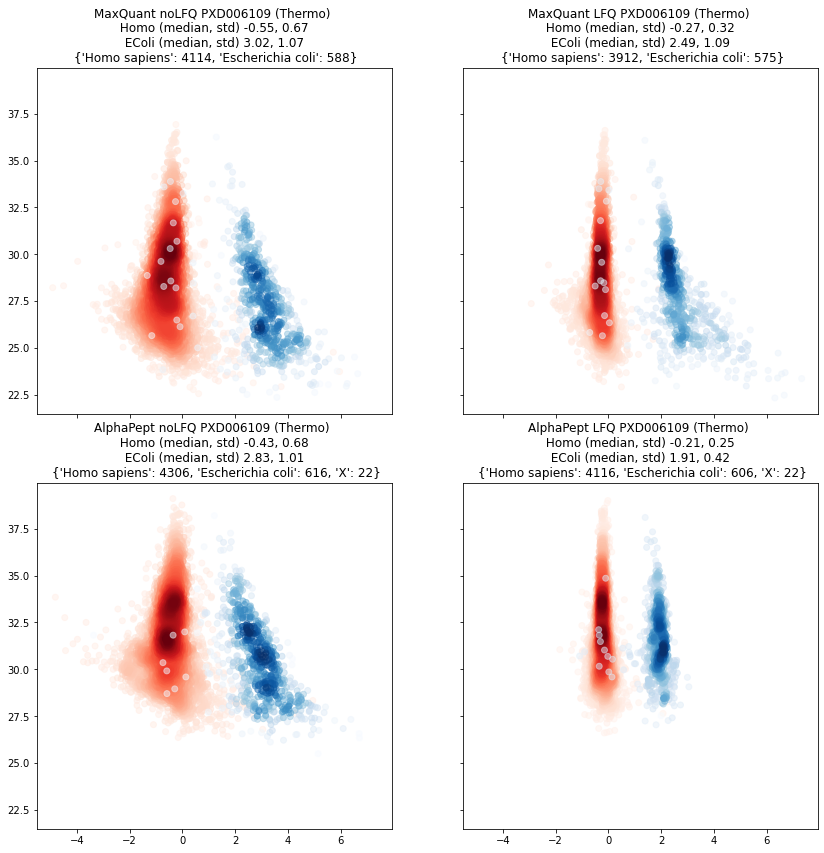

In [14]:
from test_helper import get_plot_df, add_species_column
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, 'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]


species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

## CV plot

C:\Users\admin\AppData\Local\Temp/ipykernel_22996/1044225642.py:22: RuntimeWarning: invalid value encountered in true_divide
  cv = np.nanstd(ref[base_columns], axis=1) / np.nanmean(ref[base_columns], axis=1)
C:\Users\admin\AppData\Local\Temp/ipykernel_22996/1044225642.py:26: RuntimeWarning: invalid value encountered in true_divide
  cv = np.nanstd(ref[ratio_columns], axis=1) / np.nanmean(ref[ratio_columns], axis=1)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\AppData\Local\Temp/ipykernel_22996/1044225642.py:58: RuntimeWarning: Mean of empty slice
  cv = np.nanstd(ref[base_columns], axis=1) / np.nanmean(ref[base_columns], axis=1)
C:\Users\admin\AppData\Local\Temp/ipykernel_22996/1044225642.py:62: RuntimeWarning: Mean of empty slice
  cv = np.nanstd(ref[ratio_columns], axis=1) / np.nanmean(ref[ratio_columns], axis=1)


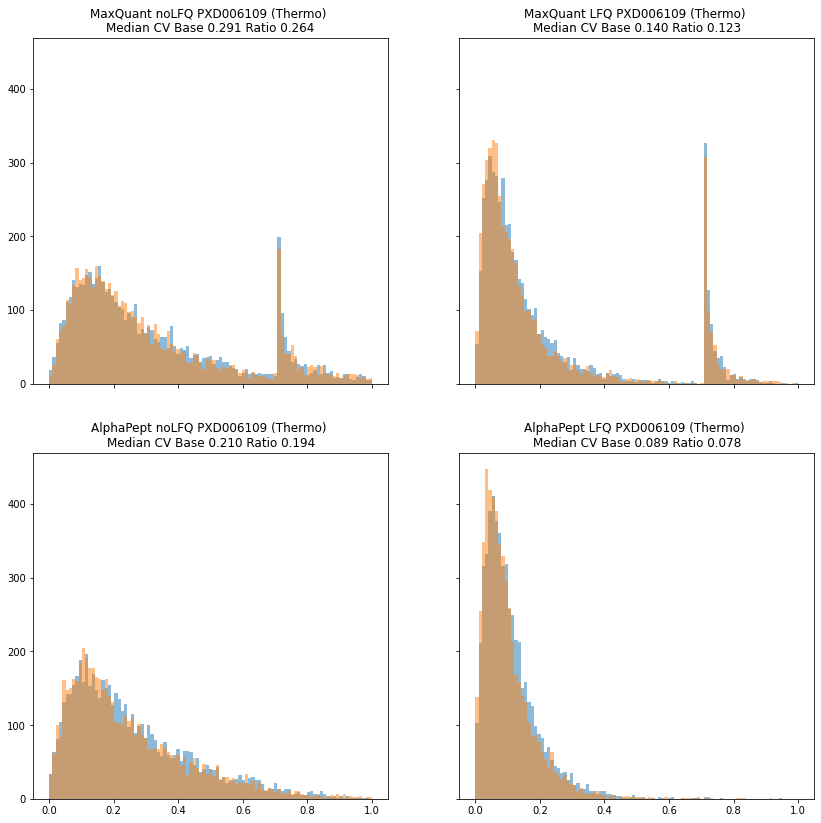

In [15]:
bins = np.linspace(0,1,100)

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True, sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
        
    cv = np.nanstd(ref[base_columns], axis=1) / np.nanmean(ref[base_columns], axis=1)
    cv_base = cv[cv>0]
    axes[0,j].hist(cv_base, bins = bins, label = id_, alpha = 0.5)
    
    cv = np.nanstd(ref[ratio_columns], axis=1) / np.nanmean(ref[ratio_columns], axis=1)
    cv_ratio = cv[cv>0]
    axes[0,j].hist(cv_ratio, bins = bins, label = id_, alpha = 0.5)

    axes[0,j].set_title(f'{id_} \nMedian CV Base {np.nanmedian(cv_base):.3f} Ratio {np.nanmedian(cv_ratio):.3f}')

path = os.path.join(TEST_DIR,'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'

    cv = np.nanstd(ref[base_columns], axis=1) / np.nanmean(ref[base_columns], axis=1)
    cv_base = cv[cv>0]
    axes[1,j].hist(cv_base, bins = bins, label = id_, alpha = 0.5)
    
    cv = np.nanstd(ref[ratio_columns], axis=1) / np.nanmean(ref[ratio_columns], axis=1)
    cv_ratio = cv[cv>0]
    axes[1,j].hist(cv_ratio, bins = bins, label = id_, alpha = 0.5)

    axes[1,j].set_title(f'{id_} \nMedian CV Base {np.nanmedian(cv_base):.3f} Ratio {np.nanmedian(cv_ratio):.3f}')

    #axes[1,j].hist(cv, bins = bins, label = id_, alpha = 0.5)
    axes[1,j].set_title(f'{id_} \nMedian CV Base {np.nanmedian(cv_base):.3f} Ratio {np.nanmedian(cv_ratio):.3f}')

plt.show()

## Algorithm Test

Test performance of LFQ algorithm on MaxQuant evidence file.

In [16]:
try: 
    import ipywidgets
except ModuleNotFoundError:
    !pip install ipywidgets

2022-03-27 01:53:53> Loading files
2022-03-27 01:53:55> A total of 6 files.
2022-03-27 01:54:04> A total of 6,854 proteins.
2022-03-27 01:54:11> Setting minimum occurence to 6.0
2022-03-27 01:54:14> Preparing protein table for parallel processing.
2022-03-27 01:54:18> Starting protein extraction for 6854 proteins.
2022-03-27 01:54:18> AlphaPool was set to 24 processes. Setting max to 24.


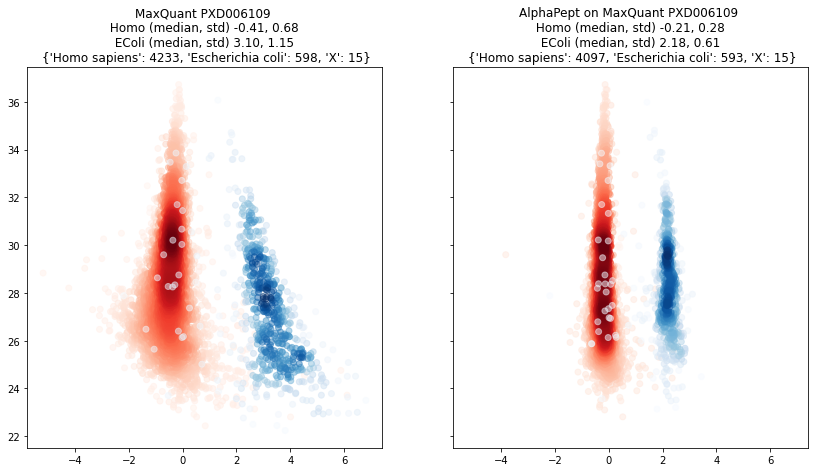

In [17]:
from alphapept.quantification import protein_profile_parallel_mq
import test_helper
import pandas as pd


evidence_path = os.path.join(tmp_folder,'PXD006109_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD006109_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
test_helper.add_species_column(ref)
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD006109'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'HeLa2' in _]
    ratio_columns = [_ for _ in ds if 'HeLa12' in _]
    test_helper.get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

## Normalization Checks

### Check only the delayed normalization part

2022-03-27 01:56:48> Setting minimum occurence to 4.0
2022-03-27 01:56:49> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\panda

2022-03-27 01:56:50> Setting minimum occurence to 4.0
2022-03-27 01:56:51> Setting minimum occurence to 4.0
2022-03-27 01:56:51> Setting minimum occurence to 4.0
2022-03-27 01:56:52> Setting minimum occurence to 4.0
2022-03-27 01:56:53> Setting minimum occurence to 4.0


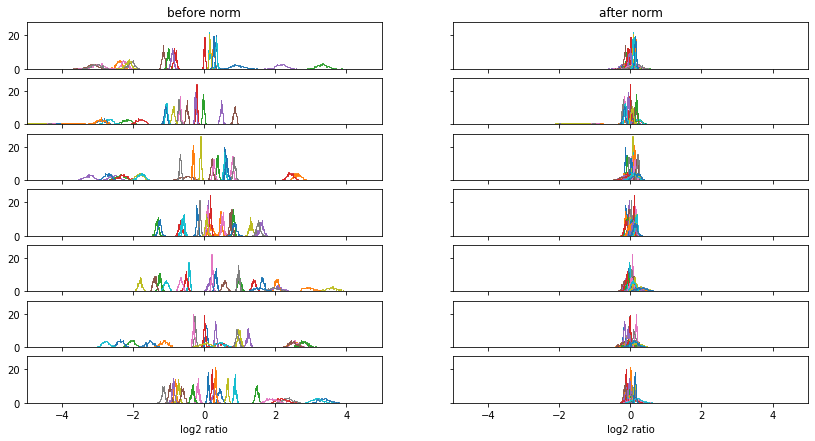

In [18]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import test_helper
from alphapept.quantification import delayed_normalization


def visualize_normalization(simulated_df, axis, value = "Intensity",show_per_colpair = True):
    
    shortnames = df["filename"].unique()
    df["namefrac"] = [f"{n}_{f}" for n,f in zip(simulated_df["filename"], simulated_df["fraction"])]
    simulated_reformat = pd.pivot_table(simulated_df, values=value, columns="namefrac" ,index=["protein_group", "precursor" ])
    
    for namepair in itertools.combinations(shortnames, 2):
        cols1 = [x for x in simulated_reformat.columns if namepair[0] in x]
        cols2 = [x for x in simulated_reformat.columns if namepair[1] in x]
        for colpair in itertools.product(cols1, cols2):
            fcs = np.log2(simulated_reformat[colpair[0]]) - np.log2(simulated_reformat[colpair[1]])
            axis.hist(fcs, histtype = 'step', bins = 50, label = f"{colpair}", density = True)
            axis.set_xlim(-5, 5)

samplenames = ["A1", "A2","B1"]
fractions = [3, 2, 3]

ntests = 7
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(14,7), sharex=True,sharey=True)
count_axis = 0
axes[0][0].set_title("before norm")
axes[-1][0].set_xlabel('log2 ratio')
axes[0][1].set_title("after norm")
axes[-1][1].set_xlabel('log2 ratio')
for _ in range(ntests):
    df = test_helper.simulate_biased_peptides(5000, samplenames, fractions)
    df_del, normed = delayed_normalization(df, field ='Intensity')
    visualize_normalization(df, axes[count_axis][0],value = "Intensity", show_per_colpair = False)
    visualize_normalization(df_del, axes[count_axis][1],value = "Intensity_dn", show_per_colpair = False)
    count_axis+=1

### Check delayed normalization + protein intensity estimation

In [19]:
from alphapept.quantification import delayed_normalization, protein_profile_parallel
import test_helper
import pandas as pd
import matplotlib.pyplot as plt
import itertools

samplenames = ["A1", "A2", "B1"]
fractions = [1, 1, 1]
test_id = 'PXD006109'

df = test_helper.simulate_biased_peptides(20000, samplenames, fractions)
df, normed = delayed_normalization(df, field ='Intensity')

fields = ['Intensity', 'Intensity_dn']
tests = ['noLFQ', 'LFQ']

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True, sharey=True)

for j, field in  enumerate(fields):
    
    pt = protein_profile_parallel(df, minimum_ratios=1, field=field)
    pt['Species'] = ["Homo sapiens" for x in range(len(pt.index))]
    
    pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
    lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]
    
    for i, cols in enumerate([pre_lfq, lfq]):
        
        ax = axes[i, j]
        samplepairs = itertools.product([x for x in cols if "A" in x ], [x for x in cols if "B" in x ])
        
        for pair in samplepairs:
            
            base_columns = [pair[0]]
            ratio_columns = [pair[1]]
            test_helper.get_plot_df(pt, base_columns, ratio_columns, ax, f"{fields[j]} {tests[i]}", valid_filter = False)

plt.show()

2022-03-27 01:56:55> Setting minimum occurence to 3.0
2022-03-27 01:56:56> Preparing protein table for parallel processing.
2022-03-27 01:56:57> Starting protein extraction for 3322 proteins.
2022-03-27 01:56:57> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 01:57:26> Preparing protein table for parallel processing.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s


2022-03-27 01:57:27> Starting protein extraction for 3322 proteins.
2022-03-27 01:57:27> AlphaPool was set to 24 processes. Setting max to 24.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s


### Bruker HeLa

2022-03-27 01:58:05> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-27 01:58:09> No settings provided. Creating from default settings.
2022-03-27 01:58:09> Couldn't find compiled exe. Using Python version for testing.
2022-03-27 01:58:09> Logging to C:\Users\admin\alphapept\logs\log_20220327015809.txt.
2022-03-27 01:58:09> Platform information:
2022-03-27 01:58:09> system     - Windows
2022-03-27 01:58:09> release    - 10
2022-03-27 01:58:09> version    - 10.0.19044
2022-03-27 01:58:09> machine    - AMD64
2022-03-27 01:58:09> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-27 01:58:09> cpu count  - 24
2022-03-27 01:58:09> ram memory - 114.4/127.7 Gb (available/total)
2022-03-27 01:58:09> 
2022-03-27 01:58:09> Python information:
2022-03-27 01:58:09> SQLAlchemy                    - 1.4.23
2022-03-27 01:58:09> alphapept                     - 0.4.4
2022-03-27 01:58:09> biopython                     - 1.78
2022-03-27 01:58:09> bumpversion        



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 01:58:11> FASTA contains 36,789 entries.




100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [12:55<00:00, 775.80s/it]
  0%|                                                                                            | 0/1 [09:16<?, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [08:59<00:00, 539.92s/it]


  5%|███▍                                                            | 0.05405405405405406/1 [01:27<21:08, 1341.43s/it]

  8%|█████▎                                                           | 0.08108108108108109/1 [01:28<11:35, 756.47s/it]

 11%|███████                                                          | 0.10810810810810811/1 [01:30<07:12, 485.34s/it]

 14%|████████▊                                                        | 0.13513513513513514/1 [01:32<04:49, 334.55s/it]

 16%|██████████▌                                                      | 0.16216216216216217/1 [01:33<03:15, 233.22s/it]

 19%|████████████▍             

2022-03-27 03:00:41> Digested 36,789 proteins and generated 8,624,766 spectra
2022-03-27 03:02:00> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 3.32 GB
2022-03-27 03:02:15> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 03:02:15> Processing 1 files for step raw_conversion
2022-03-27 03:02:15> File F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa has extension .d - converting from Bruker.
2022-03-27 03:26:46> File conversion complete. Extracted 299,728 precursors.
2022-03-27 03:26:48> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2022-03-27 03:26:48> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 03:26:48> Processing 1 files for step find_features
2022-03-27 03:26:48> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf. Adding to feature finding list.
2022-03-27 03:26:49> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d
2022-03-27 03:26:49> Using Windows FF


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [28:42<00:00, 1722.78s/it]
  0%|                                                                                            | 0/1 [24:37<?, ?it/s]


2022-03-27 03:26:55> Bruker featurer finder complete. Extracted 261,932 features.
2022-03-27 03:26:55> Matching features to query data.
2022-03-27 03:27:00> Saving feature table.
2022-03-27 03:27:01> Feature table saved to F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2022-03-27 03:27:01> Saving features.
2022-03-27 03:27:01> Feature finding of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2022-03-27 03:27:01> ==== search_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 03:27:01> Starting first search.
2022-03-27 03:27:01> Processing 1 files for step search_db
2022-03-27 03:27:01> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2022-03-27 03:27:23> Performing search on 664,992 query and 8,624,766 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2022-03-27 03:28:06> Found 672,625 psms.
2022-03-27 03:28:06> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [01:22<?, ?it/s]


2022-03-27 03:29:50> Extracted columns from 672,625 spectra.
2022-03-27 03:29:52> Saving first_search results to F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2022-03-27 03:29:56> Search of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2022-03-27 03:30:24> First search complete.
2022-03-27 03:30:24> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 03:30:24> Processing 1 files for step calibrate_hdf
2022-03-27 03:30:24> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d.
2022-03-27 03:30:25> Scoring using X-Tandem
2022-03-27 03:30:27> 58,709 target (587 decoy) of 163415 PSMs. fdr 0.009998 for a cutoff of 19.43 (set fdr was 0.01)
2022-03-27 03:30:27> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d.
2022-03-27 03:30:34> Precursor calibration std 2.64, 1.75
2022-03-27 03:30:34> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf complete.
2022-03-27 03:30:34> Starting fragment calibration.
2022-03-27 03:30:34> Calibrating fragments with neighbors
2022-03-27 03:30:36> Scoring using X-Tandem
2022-03-27 03:30:38> 58,709 target (587 decoy) of 163415 PSMs. fdr 0.009998 for a cutoff of 19.43 (set fdr was 0.01)
2022-03-27 03:30:39> Minimum hits for fragments before score 7.00.
2022-03-27 03:30:39> Minimum hits



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 03:35:39> Starting second search with DB.
2022-03-27 03:35:39> Processing 1 files for step search_db
2022-03-27 03:35:39> Found calibrated prec_tol with value 13.20
2022-03-27 03:35:39> Found calibrated frag_tol with value 54.51
2022-03-27 03:35:43> Performing search on 664,992 query and 8,624,766 db entries with frag_tol = 54.51 and prec_tol = 13.20.
2022-03-27 03:36:07> Found 1,330,657 psms.
2022-03-27 03:36:07> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [06:26<?, ?it/s]


2022-03-27 03:38:55> Extracted columns from 1,330,657 spectra.
2022-03-27 03:38:59> Saving second_search results to F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2022-03-27 03:39:08> Search of file F:\projects\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2022-03-27 03:39:34> Second search complete.
2022-03-27 03:39:34> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 03:39:34> Processing 1 files for step score_hdf
2022-03-27 03:39:34> Calling score_hdf
2022-03-27 03:39:36> Found second search psms for scoring.
2022-03-27 03:39:59> 71,576 target (7,157 decoy) of 248722 PSMs. fdr 0.099992 for a cutoff of 18.37 (set fdr was 0.1)
2022-03-27 03:39:59> Training & cross-validation on 15635 targets and 15635 decoys
2022-03-27 03:40:22> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 200}
2022-03-27 03:40:22> The train accuracy was 0.9566357531180045
2022-03-27 03:40:22> Testing on 62542 targets and 62542 decoys
2022-03-27 03:40:23> The test accuracy was 0.9415352882862716
2022-03-27 03:40:23> Top features {'x_tandem': 0.25483063393188293, 'hits': 0.18966578712542223, 'hits_y': 0.16079000604697985, 'n_fragments_matched': 0.09756366665105837, 'fragments_matched_n_ratio': 0.08032145114316737, 'fragments_matched_int_ratio': 0.05367379541951329, 'hits_b': 0.02726306369500843, 'n_missed': 0.02


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 03:41:14> Fasta dict with length 36,789, Pept dict with length 8,624,772
2022-03-27 03:41:14> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 03:41:15> A total of 53,277 unique and 2,929 shared peptides.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-27 03:41:16> A total of 805 ambigious proteins
2022-03-27 03:41:17> A total of 614 unique and 29 shared peptides.
2022-03-27 03:41:17> A total of 29 ambigious proteins
2022-03-27 03:41:17> Global FDR on protein_group
2022-03-27 03:41:17> 6,401 target (64 decoy) of 7871 PSMs. fdr 0.009998 for a cutoff of 0.98 (set fdr was 0.01)
2022-03-27 03:41:17> Global FDR cutoff at 0.980184389009106.
2022-03-27 03:41:18> FDR on proteins complete. For 0.01 FDR found 63,522 targets and 68 decoys. A total of 6,465 proteins found.
2022-03-27 03:41:18> Saving complete.
2022-03-27 03:41:18> Protein groups complete.
2022-03-27 03:41:18> ==== quantification ====
2022-03-27 03:41:18> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-27 03:41:18> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-27 03:41:18> Complete.
2022-03-27 03:41:18> Starting profile extraction.



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.05it/s]

2022-03-27 03:41:18> LFQ complete.
2022-03-27 03:41:19> Extracting protein_summary
2022-03-27 03:41:19> Saved protein_summary of length 6,465 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-27 03:41:19> Updating protein_fdr.
2022-03-27 03:41:19> Exporting as csv.
2022-03-27 03:41:21> Saved df of length 63,590 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-27 03:41:21> ==== export ====
2022-03-27 03:41:27> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-27 03:41:27> Analysis complete.


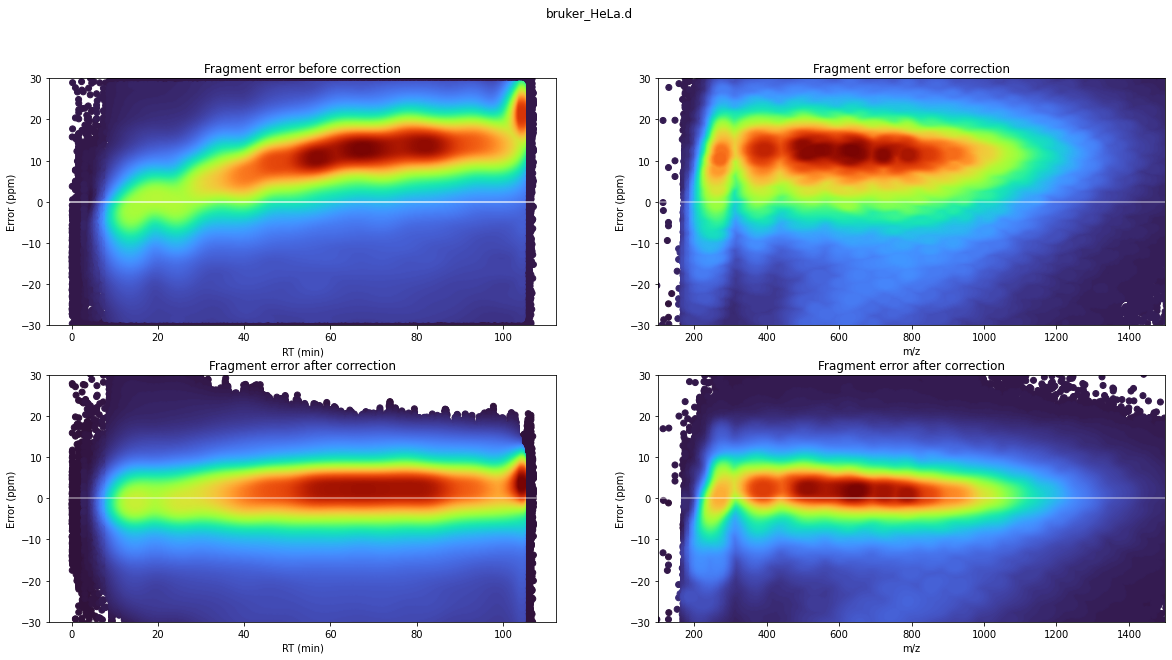

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:23<00:00, 83.50s/it]


In [20]:
%run -i ../test_ci.py $tmp_folder bruker_hela

C:\Users\admin\AppData\Local\Temp/ipykernel_22996/3550195270.py:3: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  df1, df2 = prepare_files(os.path.join(TEST_DIR, "results.hdf"), os.path.join(tmp_folder,'bruker_HeLa_evd.txt'))


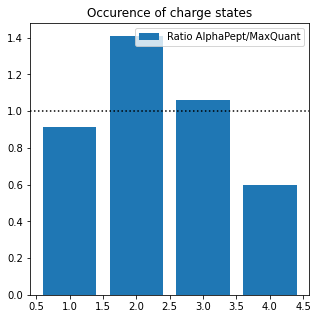

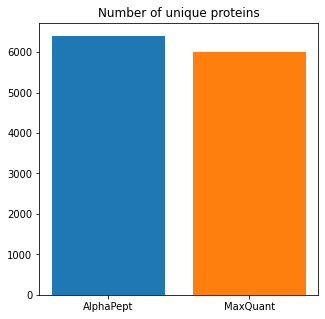

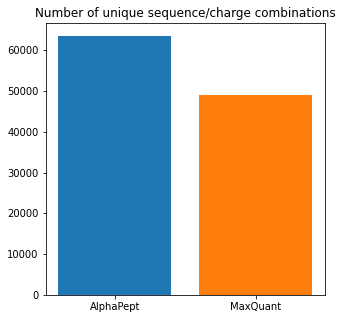

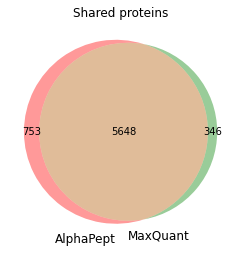

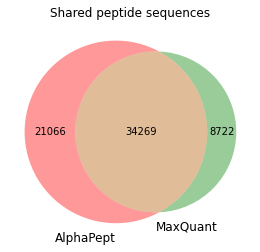

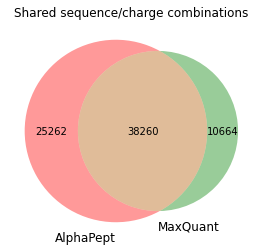

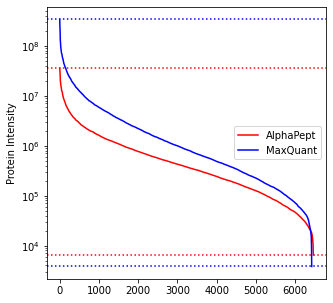

In [21]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank

df1, df2 = prepare_files(os.path.join(TEST_DIR, "results.hdf"), os.path.join(tmp_folder,'bruker_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

## PXD010012

In [22]:
%run -i ../test_ci.py $tmp_folder PXD010012

2022-03-27 03:42:47> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-27 03:44:57> No settings provided. Creating from default settings.
2022-03-27 03:44:57> Couldn't find compiled exe. Using Python version for testing.
2022-03-27 03:44:57> Logging to C:\Users\admin\alphapept\logs\log_20220327034457.txt.
2022-03-27 03:44:57> Platform information:
2022-03-27 03:44:57> system     - Windows
2022-03-27 03:44:57> release    - 10
2022-03-27 03:44:57> version    - 10.0.19044
2022-03-27 03:44:57> machine    - AMD64
2022-03-27 03:44:57> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-27 03:44:57> cpu count  - 24
2022-03-27 03:44:57> ram memory - 110.8/127.7 Gb (available/total)
2022-03-27 03:44:57> 
2022-03-27 03:44:57> Python information:
2022-03-27 03:44:57> SQLAlchemy                    - 1.4.23
2022-03-27 03:44:57> alphapept                     - 0.4.4
2022-03-27 03:44:57> biopython                     - 1.78
2022-03-27 03:44:57> bumpversion        


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 03:44:58> FASTA contains 43,752 entries.



  2%|█▍                                                             | 0.022727272727272728/1 [01:03<45:09, 2772.91s/it]
  5%|██▊                                                            | 0.045454545454545456/1 [01:03<18:19, 1151.62s/it]
  7%|████▍                                                            | 0.06818181818181818/1 [01:05<10:26, 671.87s/it]
  9%|█████▉                                                           | 0.09090909090909091/1 [01:14<08:26, 557.49s/it]
 11%|███████▍                                                         | 0.11363636363636363/1 [01:28<08:40, 586.82s/it]
 14%|████████▊                                                        | 0.13636363636363635/1 [01:30<05:53, 409.76s/it]
 16%|██████████▌                                                       | 0.1590909090909091/1 [01:31<04:09, 296.52s/it]
 18%|███████████▊                                                     | 0.18181818181818182/1 [01:33<03:03, 223.72s/it]
 20%|█████████████▎                    

2022-03-27 03:47:17> Digested 43,752 proteins and generated 5,835,394 spectra
2022-03-27 03:48:12> Database saved to F:\projects\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 2.27 GB
2022-03-27 03:48:22> ==== import_raw_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 03:48:22> Processing 10 files for step raw_conversion
2022-03-27 03:48:22> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 04:36:59> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step raw_conversion succeeded. 10.00 %


 10%|███████▋                                                                     | 0.1/1 [48:36<7:17:25, 29161.58s/it]

2022-03-27 04:36:59> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step raw_conversion succeeded. 20.00 %
2022-03-27 04:37:04> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step raw_conversion succeeded. 30.00 %


 30%|███████████████████████▍                                                      | 0.3/1 [48:41<1:28:26, 7580.42s/it]

2022-03-27 04:37:15> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step raw_conversion succeeded. 40.00 %


 40%|████████████████████████████████                                                | 0.4/1 [48:52<49:58, 4996.69s/it]

2022-03-27 04:37:15> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step raw_conversion succeeded. 50.00 %
2022-03-27 04:37:42> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step raw_conversion succeeded. 60.00 %


 60%|████████████████████████████████████████████████                                | 0.6/1 [49:19<17:11, 2577.77s/it]

2022-03-27 04:37:52> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step raw_conversion succeeded. 70.00 %


 70%|████████████████████████████████████████████████████████                        | 0.7/1 [49:29<09:38, 1929.68s/it]

2022-03-27 04:38:24> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step raw_conversion succeeded. 80.00 %


 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [50:01<04:58, 1492.25s/it]

2022-03-27 04:38:24> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step raw_conversion succeeded. 90.00 %
2022-03-27 04:38:24> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step raw_conversion succeeded. 100.00 %
2022-03-27 04:38:24> ==== feature_finding ====




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 04:38:24> Processing 10 files for step find_features
2022-03-27 04:38:24> Using Bruker Feature Finder. Setting Process limit to 4.
2022-03-27 04:38:24> AlphaPool was set to 4 processes. Setting max to 4.
2022-03-27 04:38:45> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step find_features succeeded. 10.00 %




 10%|████████                                                                         | 0.1/1 [00:20<03:06, 206.78s/it]

2022-03-27 04:38:45> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step find_features succeeded. 20.00 %




 20%|████████████████▍                                                                 | 0.2/1 [00:20<01:09, 86.34s/it]

2022-03-27 04:38:45> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step find_features succeeded. 30.00 %




 30%|████████████████████████▌                                                         | 0.3/1 [00:21<00:33, 47.51s/it]

2022-03-27 04:38:46> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step find_features succeeded. 40.00 %
2022-03-27 04:38:59> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step find_features succeeded. 50.00 %




 50%|█████████████████████████████████████████                                         | 0.5/1 [00:34<00:29, 59.13s/it]

2022-03-27 04:38:59> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step find_features succeeded. 60.00 %




 60%|█████████████████████████████████████████████████▏                                | 0.6/1 [00:34<00:17, 42.66s/it]

2022-03-27 04:38:59> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step find_features succeeded. 70.00 %
2022-03-27 04:38:59> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step find_features succeeded. 80.00 %
2022-03-27 04:39:09> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step find_features succeeded. 90.00 %




 90%|█████████████████████████████████████████████████████████████████████████▊        | 0.9/1 [00:44<00:03, 36.66s/it]

2022-03-27 04:39:09> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step find_features succeeded. 100.00 %




100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:44<00:00, 29.79s/it]

2022-03-27 04:39:09> ==== search_data ====





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 04:39:09> Starting first search.
2022-03-27 04:39:09> Processing 10 files for step search_db
2022-03-27 04:39:09> Searching. Setting Process limit to 14.
2022-03-27 04:39:09> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-27 04:47:09> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step search_db succeeded. 10.00 %





 10%|███████▊                                                                      | 0.1/1 [07:59<1:11:55, 4794.60s/it]

2022-03-27 04:47:11> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step search_db succeeded. 20.00 %





 20%|████████████████                                                                | 0.2/1 [08:01<26:29, 1986.58s/it]

2022-03-27 04:47:18> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step search_db succeeded. 30.00 %





 30%|████████████████████████                                                        | 0.3/1 [08:09<12:59, 1113.57s/it]

2022-03-27 04:47:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step search_db succeeded. 40.00 %





 40%|████████████████████████████████▍                                                | 0.4/1 [08:10<06:47, 679.07s/it]

2022-03-27 04:47:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step search_db succeeded. 50.00 %
2022-03-27 04:47:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step search_db succeeded. 60.00 %
2022-03-27 04:47:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step search_db succeeded. 70.00 %





 70%|████████████████████████████████████████████████████████▋                        | 0.7/1 [08:12<01:17, 256.76s/it]

2022-03-27 04:47:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step search_db succeeded. 80.00 %





 80%|████████████████████████████████████████████████████████████████▊                | 0.8/1 [08:15<00:40, 204.90s/it]

2022-03-27 04:47:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step search_db succeeded. 90.00 %
2022-03-27 04:47:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step search_db succeeded. 100.00 %


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [59:08<00:00, 3548.96s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [09:06<00:00, 546.92s/it]
100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:02:35<00:00, 3755.07s/it]


2022-03-27 04:47:50> First search complete.
2022-03-27 04:47:50> ==== recalibrate_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 04:47:50> Processing 10 files for step calibrate_hdf
2022-03-27 04:47:50> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 04:52:14> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step calibrate_hdf succeeded. 10.00 %


 10%|████████                                                                        | 0.1/1 [04:24<39:37, 2641.26s/it]

2022-03-27 04:52:17> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step calibrate_hdf succeeded. 20.00 %


 20%|████████████████                                                                | 0.2/1 [04:27<14:46, 1108.08s/it]

2022-03-27 04:52:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step calibrate_hdf succeeded. 30.00 %


 30%|████████████████████████▎                                                        | 0.3/1 [04:30<07:09, 613.40s/it]

2022-03-27 04:52:20> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step calibrate_hdf succeeded. 40.00 %
2022-03-27 04:52:21> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step calibrate_hdf succeeded. 50.00 %


 50%|████████████████████████████████████████▌                                        | 0.5/1 [04:31<02:14, 269.20s/it]

2022-03-27 04:52:49> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step calibrate_hdf succeeded. 60.00 %


 60%|████████████████████████████████████████████████▌                                | 0.6/1 [04:58<01:48, 271.56s/it]

2022-03-27 04:52:49> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step calibrate_hdf succeeded. 70.00 %
2022-03-27 04:52:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step calibrate_hdf succeeded. 80.00 %


 80%|████████████████████████████████████████████████████████████████▊                | 0.8/1 [05:00<00:30, 152.61s/it]

2022-03-27 04:52:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step calibrate_hdf succeeded. 90.00 %
2022-03-27 04:52:50> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step calibrate_hdf succeeded. 100.00 %
2022-03-27 04:52:50> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 04:52:50> Starting second search with DB.
2022-03-27 04:52:50> Processing 10 files for step search_db
2022-03-27 04:52:50> Searching. Setting Process limit to 14.
2022-03-27 04:52:50> AlphaPool was set to 14 processes. Setting max to 14.
2022-03-27 04:59:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step search_db succeeded. 10.00 %



 10%|████████                                                                        | 0.1/1 [06:11<55:42, 3713.96s/it]

2022-03-27 04:59:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step search_db succeeded. 20.00 %
2022-03-27 04:59:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step search_db failed. Exception Unable to allocate 696. MiB for an array with shape (1257860,) and data type [('query_idx', '<i4'), ('db_idx', '<i4'), ('hits', '<f8'), ('mass_db', '<f4'), ('prec_offset', '<f4'), ('prec_offset_ppm', '<f4'), ('prec_offset_raw', '<f4'), ('prec_offset_raw_ppm', '<f4'), ('delta_m', '<f4'), ('delta_m_ppm', '<f4'), ('fragments_matched_int_ratio', '<f4'), ('fragments_int_ratio', '<f4'), ('fragments_int_sum', '<i8'), ('fragments_matched_int_sum', '<i8'), ('n_fragments_matched', '<i8'), ('fragment_ion_idx', '<i8'), ('hits_b', '<i8'), ('hits_y', '<i8'), ('hits_b-H2O', '<i8'), ('hits_y-H2O', '<i8'), ('hits_b-NH3', '<i8'), ('hits_y-NH3', '<i8'), ('rt', '<f8'), ('sequence', '<U44'), ('mass', '<f8'), ('mz', '<f8'


 50%|████████████████████████████████████████▌                                        | 0.5/1 [06:11<04:36, 553.99s/it]

2022-03-27 04:59:02> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step search_db failed. Exception Unable to allocate 1.38 GiB for an array with shape (20532137, 9) and data type float64
2022-03-27 04:59:16> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step search_db succeeded. 70.00 %



 70%|████████████████████████████████████████████████████████▋                        | 0.7/1 [06:25<01:51, 370.34s/it]

2022-03-27 04:59:19> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step search_db succeeded. 80.00 %



 80%|████████████████████████████████████████████████████████████████▊                | 0.8/1 [06:28<00:59, 298.98s/it]

2022-03-27 04:59:25> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step search_db succeeded. 90.00 %



 90%|████████████████████████████████████████████████████████████████████████▉        | 0.9/1 [06:35<00:24, 243.73s/it]

2022-03-27 04:59:26> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C2_01_Ratio.d for step search_db succeeded. 100.00 %
2022-03-27 04:59:26> Attempting to rerun failed runs with 7 processes
2022-03-27 04:59:26> AlphaPool was set to 7 processes. Setting max to 7.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [11:36<00:00, 696.03s/it]


2022-03-27 05:03:00> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step search_db succeeded. 50.00 %



 50%|████████████████████████████████████████▌                                        | 0.5/1 [10:09<05:59, 719.02s/it]

2022-03-27 05:03:00> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step search_db succeeded. 100.00 %



100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [23:59<00:00, 1439.64s/it]


2022-03-27 05:03:23> Second search complete.
2022-03-27 05:03:24> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 05:03:24> Processing 10 files for step score_hdf
2022-03-27 05:03:24> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 05:06:59> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.d for step score_hdf succeeded. 10.00 %


 10%|████████                                                                        | 0.1/1 [03:34<32:14, 2149.20s/it]

2022-03-27 05:07:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.d for step score_hdf succeeded. 20.00 %


 20%|████████████████                                                                | 0.2/1 [03:58<13:36, 1020.77s/it]

2022-03-27 05:07:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C1_01_Base.d for step score_hdf succeeded. 30.00 %
2022-03-27 05:07:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C1_01_Base.d for step score_hdf succeeded. 40.00 %
2022-03-27 05:07:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_5_C1_01_Base.d for step score_hdf succeeded. 50.00 %
2022-03-27 05:07:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C2_01_Ratio.d for step score_hdf succeeded. 60.00 %
2022-03-27 05:07:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C2_01_Ratio.d for step score_hdf succeeded. 70.00 %
2022-03-27 05:07:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_3_C2_01_Ratio.d for step score_hdf succeeded. 80.00 %
2022-03-27 05:07:22> Processing of F:\projects\alphapept\sandbox\temp/test_temp\PXD010012_CT_4_C2_01_Ratio.d for step sco



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 05:07:22> Fasta dict with length 43,752, Pept dict with length 5,835,400
2022-03-27 05:07:22> Extracting protein groups.





100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:58<00:00, 238.71s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-03-27 05:07:26> A total of 54,309 unique and 7,185 shared peptides.
2022-03-27 05:07:28> A total of 1795 ambigious proteins
2022-03-27 05:07:29> A total of 3,080 unique and 290 shared peptides.
2022-03-27 05:07:29> A total of 263 ambigious proteins
2022-03-27 05:07:32> Global FDR on protein_group
2022-03-27 05:07:32> 7,040 target (70 decoy) of 12675 PSMs. fdr 0.009943 for a cutoff of 0.99 (set fdr was 0.01)
2022-03-27 05:07:32> Global FDR cutoff at 0.9940195738805688.
2022-03-27 05:07:34> FDR on proteins complete. For 0.01 FDR found 424,041 targets and 265 decoys. A total of 7,110 proteins found.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-27 05:07:36> Saving complete.
2022-03-27 05:07:36> Protein groups complete.
2022-03-27 05:07:36> ==== quantification ====
2022-03-27 05:07:36> Reading protein_fdr for quantification.
2022-03-27 05:07:37> Delayed Normalization.
2022-03-27 05:07:37> Setting minimum occurence to 10.0
2022-03-27 05:07:38> Normalization with SLSQP failed. Trying BFGS
2022-03-27 05:07:43> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-27 05:07:44> Complete.
2022-03-27 05:07:44> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fragment_ion_int', 'fragment_ion_type', 'precursor', 'sequence',
       'sequence_naked', 'filename', 'shortname', 'protein', 'protein_group',
       'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 05:07:44> Preparing protein table for parallel processing.


 20%|█████████████▎                                                     | 0.1989029535864979/1 [00:08<00:29, 36.56s/it]

2022-03-27 05:07:52> Starting protein extraction for 7110 proteins.
2022-03-27 05:07:52> AlphaPool was set to 24 processes. Setting max to 24.


100%|███████████████████████████████████████████████████████████████████▉| 0.99943741209564/1 [02:57<00:00, 209.94s/it]

2022-03-27 05:10:47> LFQ complete.
2022-03-27 05:10:47> Extracting protein_summary
2022-03-27 05:10:48> Saved protein_summary of length 7,110 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-27 05:10:48> Updating protein_fdr.
2022-03-27 05:10:49> Exporting as csv.
2022-03-27 05:11:05> Saved df of length 424,306 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-27 05:11:05> ==== export ====
2022-03-27 05:12:07> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-27 05:12:07> Analysis complete.


In [23]:
from test_helper import get_plot_df
import matplotlib.pyplot as plt
import seaborn as sns
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD010012_ref.txt'), sep='\t') 

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Base_{i}" for i in range(1,6)]
    ratio_columns = [f"{x}ntensity Ratio_{i}" for i in range(1,6)]

    id_ = 'MaxQuant ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, "results.hdf") #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD010012_CT_{i}_C1_01_Base{x}" for i in range(1,4)]
    ratio_columns = [f"PXD010012_CT_{i}_C2_01_Ratio{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

2022-03-27 05:12:09> Loading files


C:\Users\admin\AppData\Local\Temp/ipykernel_22996/1951999832.py:7: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  pt = protein_profile_parallel_mq(evidence_path, protein_group_path)


2022-03-27 05:12:12> A total of 10 files.
2022-03-27 05:12:22> A total of 7,413 proteins.


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [19:32<00:00, 1172.49s/it]
  0%|                                                                                            | 0/1 [05:00<?, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:39<00:00, 279.09s/it]


2022-03-27 05:12:31> Setting minimum occurence to 10.0
2022-03-27 05:12:37> Preparing protein table for parallel processing.
2022-03-27 05:12:43> Starting protein extraction for 7413 proteins.
2022-03-27 05:12:43> AlphaPool was set to 24 processes. Setting max to 24.


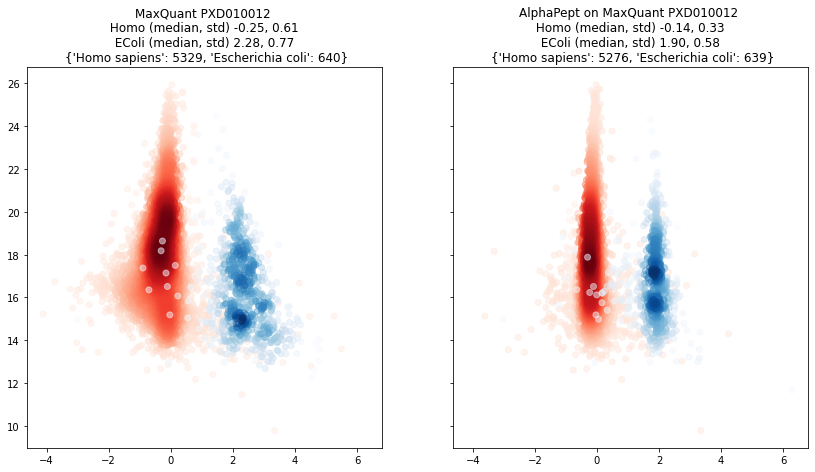

In [24]:
from alphapept.quantification import protein_profile_parallel_mq
from test_helper import get_plot_df

evidence_path = os.path.join(tmp_folder,'PXD010012_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD010012_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD010012'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'Base' in _]
    ratio_columns = [_ for _ in ds if 'Ratio' in _]
    get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

### Large Fasta

In [25]:
%run -i ../test_ci.py $tmp_folder thermo_hela_large_fasta

2022-03-27 05:15:10> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-27 05:15:18> No settings provided. Creating from default settings.
2022-03-27 05:15:18> Couldn't find compiled exe. Using Python version for testing.
2022-03-27 05:15:18> Logging to C:\Users\admin\alphapept\logs\log_20220327051518.txt.
2022-03-27 05:15:18> Platform information:
2022-03-27 05:15:18> system     - Windows
2022-03-27 05:15:18> release    - 10
2022-03-27 05:15:18> version    - 10.0.19044
2022-03-27 05:15:18> machine    - AMD64
2022-03-27 05:15:18> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-27 05:15:18> cpu count  - 24
2022-03-27 05:15:18> ram memory - 119.3/127.7 Gb (available/total)
2022-03-27 05:15:18> 
2022-03-27 05:15:18> Python information:
2022-03-27 05:15:18> SQLAlchemy                    - 1.4.23
2022-03-27 05:15:18> alphapept                     - 0.4.4
2022-03-27 05:15:18> biopython                     - 1.78
2022-03-27 05:15:18> bumpversion        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 05:15:18> Processing 1 files for step raw_conversion
2022-03-27 05:15:18> File F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2022-03-27 05:17:14> File conversion complete. Extracted 120,226 precursors.
2022-03-27 05:17:15> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-27 05:17:15> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 05:17:15> Processing 1 files for step find_features
2022-03-27 05:17:15> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2022-03-27 05:17:16> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2022-03-27 05:17:16> Hill extraction with centroid_tol 8 and max_gap 2


  0%|                                                                                            | 0/1 [02:00<?, ?it/s]


2022-03-27 05:17:20> Number of hills 1,105,353, len = 17.35
2022-03-27 05:17:20> Repeating hill extraction with centroid_tol 5.87
2022-03-27 05:17:24> Number of hills 1,227,331, len = 19.44
2022-03-27 05:17:25> After duplicate removal of hills 1,025,845
2022-03-27 05:17:35> After split hill_ptrs 1,207,373
2022-03-27 05:17:35> After filter hill_ptrs 1,188,406
2022-03-27 05:19:42> Extracting hill stats complete
2022-03-27 05:19:53> Found 184,383 pre isotope patterns.
2022-03-27 05:20:31> Extracted 198,779 isotope patterns.
2022-03-27 05:20:34> Report complete.
2022-03-27 05:20:34> Matching features to query data.
2022-03-27 05:20:36> Saving feature table.
2022-03-27 05:20:36> Feature table saved to F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2022-03-27 05:20:36> Saving features.
2022-03-27 05:20:36> Feature finding of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-27 05:20:36> ==== search_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 05:20:36> Starting first search.
2022-03-27 05:20:48> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 7, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 3, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'fasta_size_max': 100}
2022-03-27 05:20:48> Setting Process limit to 23
2022-03-27 05:20:48> AlphaPool was set to 23 processes. Setting max to 23.
2022-03-27 05:22:23> Block 1 of 565 complete - 0.18 % - created peptides 123,414 - total peptides 123,414 


  0%|                                                          | 0.0017699115044247787/1 [01:47<16:48:29, 60616.47s/it]

2022-03-27 05:22:24> Block 2 of 565 complete - 0.35 % - created peptides 128,598 - total peptides 252,012 


  0%|                                                                                            | 0/1 [05:09<?, ?it/s]
  0%|▏                                                          | 0.0035398230088495575/1 [01:48<7:03:27, 25498.16s/it]

2022-03-27 05:22:25> Block 3 of 565 complete - 0.53 % - created peptides 127,088 - total peptides 379,100 


  1%|▎                                                           | 0.005309734513274336/1 [01:50<3:54:38, 14153.25s/it]

2022-03-27 05:22:27> Block 4 of 565 complete - 0.71 % - created peptides 136,728 - total peptides 515,828 


  1%|▍                                                            | 0.007079646017699115/1 [01:53<2:33:10, 9255.61s/it]

2022-03-27 05:22:29> Block 5 of 565 complete - 0.88 % - created peptides 132,722 - total peptides 648,550 


  1%|▌                                                            | 0.008849557522123894/1 [01:56<1:49:50, 6649.55s/it]

2022-03-27 05:22:33> Block 6 of 565 complete - 1.06 % - created peptides 133,948 - total peptides 782,498 


  1%|▋                                                            | 0.010619469026548672/1 [01:59<1:21:42, 4954.75s/it]

2022-03-27 05:22:36> Block 7 of 565 complete - 1.24 % - created peptides 140,554 - total peptides 923,052 


  1%|▊                                                            | 0.012389380530973451/1 [02:03<1:06:54, 4065.02s/it]

2022-03-27 05:22:40> Block 8 of 565 complete - 1.42 % - created peptides 143,956 - total peptides 1,067,008 


  1%|▉                                                               | 0.01415929203539823/1 [02:05<52:06, 3171.80s/it]

2022-03-27 05:22:42> Block 9 of 565 complete - 1.59 % - created peptides 142,270 - total peptides 1,209,278 


  2%|█                                                               | 0.01592920353982301/1 [02:09<45:49, 2794.37s/it]

2022-03-27 05:22:45> Block 10 of 565 complete - 1.77 % - created peptides 149,714 - total peptides 1,358,992 


  2%|█                                                              | 0.017699115044247787/1 [02:11<38:36, 2358.68s/it]

2022-03-27 05:22:48> Block 11 of 565 complete - 1.95 % - created peptides 150,902 - total peptides 1,509,894 


  2%|█▏                                                             | 0.019469026548672566/1 [02:15<36:08, 2211.93s/it]

2022-03-27 05:22:51> Block 12 of 565 complete - 2.12 % - created peptides 161,018 - total peptides 1,670,912 


  2%|█▎                                                             | 0.021238938053097345/1 [02:18<33:18, 2041.68s/it]

2022-03-27 05:22:54> Block 13 of 565 complete - 2.30 % - created peptides 159,688 - total peptides 1,830,600 


  2%|█▍                                                             | 0.023008849557522124/1 [02:22<35:07, 2157.01s/it]

2022-03-27 05:22:58> Block 14 of 565 complete - 2.48 % - created peptides 164,228 - total peptides 1,994,828 


  2%|█▌                                                             | 0.024778761061946902/1 [02:26<37:09, 2286.26s/it]

2022-03-27 05:23:03> Block 15 of 565 complete - 2.65 % - created peptides 165,944 - total peptides 2,160,772 


  3%|█▋                                                              | 0.02654867256637168/1 [02:30<36:46, 2266.78s/it]

2022-03-27 05:23:07> Block 16 of 565 complete - 2.83 % - created peptides 166,612 - total peptides 2,327,384 


  3%|█▊                                                              | 0.02831858407079646/1 [02:36<40:37, 2508.16s/it]

2022-03-27 05:23:12> Block 17 of 565 complete - 3.01 % - created peptides 167,576 - total peptides 2,494,960 


  3%|█▉                                                              | 0.03008849557522124/1 [02:44<49:54, 3087.46s/it]

2022-03-27 05:23:20> Block 18 of 565 complete - 3.19 % - created peptides 171,578 - total peptides 2,666,538 


  3%|██                                                              | 0.03185840707964602/1 [02:49<49:16, 3053.49s/it]

2022-03-27 05:23:27> Block 19 of 565 complete - 3.36 % - created peptides 166,654 - total peptides 2,833,192 


  3%|██                                                             | 0.033628318584070796/1 [02:57<55:27, 3442.83s/it]

2022-03-27 05:23:33> Block 20 of 565 complete - 3.54 % - created peptides 173,356 - total peptides 3,006,548 


  4%|██▏                                                            | 0.035398230088495575/1 [03:03<55:54, 3477.86s/it]

2022-03-27 05:23:39> Block 21 of 565 complete - 3.72 % - created peptides 172,168 - total peptides 3,178,716 


  4%|██▍                                                             | 0.03716814159292035/1 [03:09<56:42, 3533.75s/it]

2022-03-27 05:23:46> Block 22 of 565 complete - 3.89 % - created peptides 183,578 - total peptides 3,362,294 


  4%|██▍                                                             | 0.03893805309734513/1 [03:16<56:29, 3527.19s/it]

2022-03-27 05:23:52> Block 23 of 565 complete - 4.07 % - created peptides 195,762 - total peptides 3,558,056 


  4%|██▌                                                           | 0.04070796460176991/1 [03:23<1:00:18, 3772.02s/it]

2022-03-27 05:24:00> Block 24 of 565 complete - 4.25 % - created peptides 123,870 - total peptides 3,681,926 


  4%|██▋                                                             | 0.04247787610619469/1 [03:28<55:03, 3450.13s/it]

2022-03-27 05:24:05> Block 25 of 565 complete - 4.42 % - created peptides 125,084 - total peptides 3,807,010 


  4%|██▊                                                             | 0.04424778761061947/1 [03:34<55:44, 3498.83s/it]

2022-03-27 05:24:11> Block 26 of 565 complete - 4.60 % - created peptides 127,222 - total peptides 3,934,232 


  5%|██▉                                                             | 0.04601769911504425/1 [03:40<52:36, 3308.29s/it]

2022-03-27 05:24:16> Block 27 of 565 complete - 4.78 % - created peptides 137,994 - total peptides 4,072,226 


  5%|███                                                            | 0.047787610619469026/1 [03:46<54:57, 3462.74s/it]

2022-03-27 05:24:23> Block 28 of 565 complete - 4.96 % - created peptides 165,874 - total peptides 4,238,100 


  5%|███                                                            | 0.049557522123893805/1 [03:53<57:16, 3615.74s/it]

2022-03-27 05:24:30> Block 29 of 565 complete - 5.13 % - created peptides 125,634 - total peptides 4,363,734 


  5%|███▏                                                          | 0.05132743362831858/1 [04:01<1:01:24, 3884.21s/it]

2022-03-27 05:24:38> Block 30 of 565 complete - 5.31 % - created peptides 121,136 - total peptides 4,484,870 


  5%|███▎                                                          | 0.05309734513274336/1 [04:09<1:03:22, 4015.73s/it]

2022-03-27 05:24:45> Block 31 of 565 complete - 5.49 % - created peptides 154,758 - total peptides 4,639,628 


  5%|███▍                                                          | 0.05486725663716814/1 [04:17<1:05:27, 4155.67s/it]

2022-03-27 05:24:53> Block 32 of 565 complete - 5.66 % - created peptides 137,790 - total peptides 4,777,418 


  6%|███▌                                                          | 0.05663716814159292/1 [04:25<1:06:35, 4235.17s/it]

2022-03-27 05:25:01> Block 33 of 565 complete - 5.84 % - created peptides 154,300 - total peptides 4,931,718 


  6%|███▋                                                           | 0.0584070796460177/1 [04:31<1:01:57, 3948.26s/it]

2022-03-27 05:25:07> Block 34 of 565 complete - 6.02 % - created peptides 170,866 - total peptides 5,102,584 


  6%|███▋                                                          | 0.06017699115044248/1 [04:38<1:02:27, 3987.37s/it]

2022-03-27 05:25:14> Block 35 of 565 complete - 6.19 % - created peptides 175,244 - total peptides 5,277,828 


  6%|███▊                                                         | 0.061946902654867256/1 [04:46<1:05:35, 4195.58s/it]

2022-03-27 05:25:23> Block 36 of 565 complete - 6.37 % - created peptides 162,576 - total peptides 5,440,404 


  6%|███▉                                                          | 0.06371681415929203/1 [04:52<1:01:21, 3932.31s/it]

2022-03-27 05:25:28> Block 37 of 565 complete - 6.55 % - created peptides 163,048 - total peptides 5,603,452 


  7%|████                                                          | 0.06548672566371681/1 [05:00<1:05:21, 4196.31s/it]

2022-03-27 05:25:37> Block 38 of 565 complete - 6.73 % - created peptides 213,430 - total peptides 5,816,882 


  7%|████▏                                                         | 0.06725663716814159/1 [05:10<1:10:42, 4548.22s/it]

2022-03-27 05:25:46> Block 39 of 565 complete - 6.90 % - created peptides 195,068 - total peptides 6,011,950 


  7%|████▎                                                         | 0.06902654867256637/1 [05:16<1:05:08, 4198.05s/it]

2022-03-27 05:25:52> Block 40 of 565 complete - 7.08 % - created peptides 191,214 - total peptides 6,203,164 


  7%|████▍                                                         | 0.07079646017699115/1 [05:25<1:08:42, 4436.79s/it]

2022-03-27 05:26:01> Block 41 of 565 complete - 7.26 % - created peptides 204,414 - total peptides 6,407,578 


  7%|████▍                                                         | 0.07256637168141593/1 [05:32<1:06:14, 4285.33s/it]

2022-03-27 05:26:08> Block 42 of 565 complete - 7.43 % - created peptides 187,616 - total peptides 6,595,194 


  7%|████▋                                                          | 0.0743362831858407/1 [05:41<1:10:22, 4562.01s/it]

2022-03-27 05:26:17> Block 43 of 565 complete - 7.61 % - created peptides 222,436 - total peptides 6,817,630 


  8%|████▋                                                         | 0.07610619469026549/1 [05:50<1:12:45, 4725.48s/it]

2022-03-27 05:26:26> Block 44 of 565 complete - 7.79 % - created peptides 196,864 - total peptides 7,014,494 


  8%|████▊                                                         | 0.07787610619469026/1 [05:56<1:07:07, 4367.83s/it]

2022-03-27 05:26:33> Block 45 of 565 complete - 7.96 % - created peptides 202,470 - total peptides 7,216,964 


  8%|████▉                                                         | 0.07964601769911504/1 [06:05<1:10:22, 4588.19s/it]

2022-03-27 05:26:42> Block 46 of 565 complete - 8.14 % - created peptides 201,018 - total peptides 7,417,982 


  8%|█████                                                         | 0.08141592920353982/1 [06:12<1:07:59, 4441.50s/it]

2022-03-27 05:26:49> Block 47 of 565 complete - 8.32 % - created peptides 140,236 - total peptides 7,558,218 


  8%|█████▏                                                         | 0.0831858407079646/1 [06:21<1:09:11, 4527.95s/it]

2022-03-27 05:26:57> Block 48 of 565 complete - 8.50 % - created peptides 141,322 - total peptides 7,699,540 


  8%|█████▎                                                        | 0.08495575221238938/1 [06:28<1:05:32, 4297.31s/it]

2022-03-27 05:27:04> Block 49 of 565 complete - 8.67 % - created peptides 130,982 - total peptides 7,830,522 


  9%|█████▍                                                        | 0.08672566371681416/1 [06:36<1:08:30, 4501.25s/it]

2022-03-27 05:27:13> Block 50 of 565 complete - 8.85 % - created peptides 171,728 - total peptides 8,002,250 


  9%|█████▍                                                        | 0.08849557522123894/1 [06:47<1:14:20, 4893.32s/it]

2022-03-27 05:27:23> Block 51 of 565 complete - 9.03 % - created peptides 133,064 - total peptides 8,135,314 


  9%|█████▌                                                        | 0.09026548672566372/1 [06:54<1:10:03, 4620.64s/it]

2022-03-27 05:27:30> Block 52 of 565 complete - 9.20 % - created peptides 152,268 - total peptides 8,287,582 


  9%|█████▊                                                         | 0.0920353982300885/1 [07:04<1:15:22, 4980.49s/it]

2022-03-27 05:27:40> Block 53 of 565 complete - 9.38 % - created peptides 189,826 - total peptides 8,477,408 


  9%|█████▊                                                        | 0.09380530973451327/1 [07:11<1:10:15, 4652.38s/it]

2022-03-27 05:27:47> Block 54 of 565 complete - 9.56 % - created peptides 165,186 - total peptides 8,642,594 


 10%|█████▉                                                        | 0.09557522123893805/1 [07:21<1:14:24, 4936.06s/it]

2022-03-27 05:27:57> Block 55 of 565 complete - 9.73 % - created peptides 143,892 - total peptides 8,786,486 


 10%|██████                                                        | 0.09734513274336283/1 [07:27<1:09:09, 4597.44s/it]

2022-03-27 05:28:04> Block 56 of 565 complete - 9.91 % - created peptides 182,464 - total peptides 8,968,950 


 10%|██████▏                                                       | 0.09911504424778761/1 [07:37<1:13:16, 4880.16s/it]

2022-03-27 05:28:14> Block 57 of 565 complete - 10.09 % - created peptides 161,246 - total peptides 9,130,196 


 10%|██████▎                                                       | 0.10088495575221239/1 [07:45<1:09:54, 4665.57s/it]

2022-03-27 05:28:21> Block 58 of 565 complete - 10.27 % - created peptides 199,296 - total peptides 9,329,492 


 10%|██████▎                                                       | 0.10265486725663717/1 [07:51<1:06:09, 4423.31s/it]

2022-03-27 05:28:28> Block 59 of 565 complete - 10.44 % - created peptides 135,004 - total peptides 9,464,496 


 10%|██████▍                                                       | 0.10442477876106195/1 [08:01<1:11:29, 4790.09s/it]

2022-03-27 05:28:38> Block 60 of 565 complete - 10.62 % - created peptides 189,334 - total peptides 9,653,830 


 11%|██████▌                                                       | 0.10619469026548672/1 [08:09<1:09:35, 4671.61s/it]

2022-03-27 05:28:46> Block 61 of 565 complete - 10.80 % - created peptides 156,708 - total peptides 9,810,538 


 11%|██████▊                                                        | 0.1079646017699115/1 [08:19<1:14:21, 5001.83s/it]

2022-03-27 05:28:56> Block 62 of 565 complete - 10.97 % - created peptides 160,398 - total peptides 9,970,936 


 11%|██████▊                                                       | 0.10973451327433628/1 [08:26<1:09:24, 4677.56s/it]

2022-03-27 05:29:03> Block 63 of 565 complete - 11.15 % - created peptides 174,664 - total peptides 10,145,600 


 11%|██████▉                                                       | 0.11150442477876106/1 [08:38<1:17:03, 5204.27s/it]

2022-03-27 05:29:14> Block 64 of 565 complete - 11.33 % - created peptides 173,966 - total peptides 10,319,566 


 11%|███████                                                       | 0.11327433628318584/1 [08:45<1:12:17, 4892.14s/it]

2022-03-27 05:29:22> Block 65 of 565 complete - 11.50 % - created peptides 165,648 - total peptides 10,485,214 


 12%|███████▏                                                      | 0.11504424778761062/1 [08:52<1:08:03, 4614.42s/it]

2022-03-27 05:29:29> Block 66 of 565 complete - 11.68 % - created peptides 190,250 - total peptides 10,675,464 


 12%|███████▎                                                       | 0.1168141592920354/1 [09:03<1:15:24, 5122.94s/it]

2022-03-27 05:29:40> Block 67 of 565 complete - 11.86 % - created peptides 215,492 - total peptides 10,890,956 


 12%|███████▎                                                      | 0.11858407079646018/1 [09:11<1:11:14, 4849.16s/it]

2022-03-27 05:29:47> Block 68 of 565 complete - 12.04 % - created peptides 200,822 - total peptides 11,091,778 


 12%|███████▍                                                      | 0.12035398230088495/1 [09:22<1:17:00, 5252.88s/it]

2022-03-27 05:29:58> Block 69 of 565 complete - 12.21 % - created peptides 158,858 - total peptides 11,250,636 


 12%|███████▌                                                      | 0.12212389380530973/1 [09:29<1:11:05, 4859.32s/it]

2022-03-27 05:30:05> Block 70 of 565 complete - 12.39 % - created peptides 138,144 - total peptides 11,388,780 


 12%|███████▋                                                      | 0.12389380530973451/1 [09:40<1:18:43, 5391.32s/it]

2022-03-27 05:30:17> Block 71 of 565 complete - 12.57 % - created peptides 222,302 - total peptides 11,611,082 


 13%|███████▉                                                       | 0.1256637168141593/1 [09:47<1:12:15, 4958.46s/it]

2022-03-27 05:30:24> Block 72 of 565 complete - 12.74 % - created peptides 143,006 - total peptides 11,754,088 


 13%|███████▉                                                      | 0.12743362831858407/1 [09:55<1:08:48, 4731.41s/it]

2022-03-27 05:30:31> Block 73 of 565 complete - 12.92 % - created peptides 183,610 - total peptides 11,937,698 


 13%|████████                                                      | 0.12920353982300886/1 [10:06<1:15:52, 5227.64s/it]

2022-03-27 05:30:43> Block 74 of 565 complete - 13.10 % - created peptides 173,962 - total peptides 12,111,660 


 13%|████████                                                      | 0.13097345132743363/1 [10:14<1:11:15, 4919.31s/it]

2022-03-27 05:30:50> Block 75 of 565 complete - 13.27 % - created peptides 187,876 - total peptides 12,299,536 


 13%|████████▏                                                     | 0.13274336283185842/1 [10:25<1:18:41, 5444.68s/it]

2022-03-27 05:31:02> Block 76 of 565 complete - 13.45 % - created peptides 142,022 - total peptides 12,441,558 


 13%|████████▎                                                     | 0.13451327433628318/1 [10:33<1:12:52, 5051.97s/it]

2022-03-27 05:31:09> Block 77 of 565 complete - 13.63 % - created peptides 140,854 - total peptides 12,582,412 


 14%|████████▍                                                     | 0.13628318584070798/1 [10:40<1:08:20, 4747.00s/it]

2022-03-27 05:31:16> Block 78 of 565 complete - 13.81 % - created peptides 184,144 - total peptides 12,766,556 


 14%|████████▌                                                     | 0.13805309734513274/1 [10:52<1:16:52, 5350.69s/it]

2022-03-27 05:31:28> Block 79 of 565 complete - 13.98 % - created peptides 216,502 - total peptides 12,983,058 


 14%|████████▋                                                     | 0.13982300884955753/1 [11:00<1:12:24, 5051.24s/it]

2022-03-27 05:31:36> Block 80 of 565 complete - 14.16 % - created peptides 168,010 - total peptides 13,151,068 


 14%|████████▉                                                      | 0.1415929203539823/1 [11:07<1:08:40, 4799.87s/it]

2022-03-27 05:31:44> Block 81 of 565 complete - 14.34 % - created peptides 161,898 - total peptides 13,312,966 


 14%|█████████                                                      | 0.1433628318584071/1 [11:20<1:18:40, 5510.50s/it]

2022-03-27 05:31:56> Block 82 of 565 complete - 14.51 % - created peptides 172,948 - total peptides 13,485,914 


 15%|████████▉                                                     | 0.14513274336283186/1 [11:27<1:13:35, 5165.01s/it]

2022-03-27 05:32:04> Block 83 of 565 complete - 14.69 % - created peptides 133,276 - total peptides 13,619,190 


 15%|█████████                                                     | 0.14690265486725665/1 [11:35<1:09:20, 4877.17s/it]

2022-03-27 05:32:11> Block 84 of 565 complete - 14.87 % - created peptides 182,962 - total peptides 13,802,152 


 15%|█████████▎                                                     | 0.1486725663716814/1 [11:47<1:17:35, 5468.19s/it]

2022-03-27 05:32:23> Block 85 of 565 complete - 15.04 % - created peptides 188,838 - total peptides 13,990,990 


 15%|█████████▍                                                     | 0.1504424778761062/1 [11:55<1:13:57, 5223.58s/it]

2022-03-27 05:32:32> Block 86 of 565 complete - 15.22 % - created peptides 206,480 - total peptides 14,197,470 


 15%|█████████▍                                                    | 0.15221238938053097/1 [12:03<1:10:57, 5022.35s/it]

2022-03-27 05:32:40> Block 87 of 565 complete - 15.40 % - created peptides 188,166 - total peptides 14,385,636 


 15%|█████████▌                                                    | 0.15398230088495576/1 [12:11<1:08:07, 4831.66s/it]

2022-03-27 05:32:48> Block 88 of 565 complete - 15.58 % - created peptides 171,836 - total peptides 14,557,472 


 16%|█████████▋                                                    | 0.15575221238938053/1 [12:24<1:19:16, 5634.52s/it]

2022-03-27 05:33:01> Block 89 of 565 complete - 15.75 % - created peptides 172,096 - total peptides 14,729,568 


 16%|█████████▊                                                    | 0.15752212389380532/1 [12:32<1:12:58, 5197.07s/it]

2022-03-27 05:33:08> Block 90 of 565 complete - 15.93 % - created peptides 189,902 - total peptides 14,919,470 


 16%|██████████                                                     | 0.1592920353982301/1 [12:40<1:10:35, 5037.91s/it]

2022-03-27 05:33:16> Block 91 of 565 complete - 16.11 % - created peptides 181,910 - total peptides 15,101,380 


 16%|█████████▉                                                    | 0.16106194690265488/1 [12:52<1:16:44, 5488.73s/it]

2022-03-27 05:33:28> Block 92 of 565 complete - 16.28 % - created peptides 218,424 - total peptides 15,319,804 


 16%|██████████                                                    | 0.16283185840707964/1 [12:59<1:11:48, 5146.29s/it]

2022-03-27 05:33:36> Block 93 of 565 complete - 16.46 % - created peptides 151,952 - total peptides 15,471,756 


 16%|██████████▏                                                   | 0.16460176991150444/1 [13:07<1:07:27, 4844.70s/it]

2022-03-27 05:33:43> Block 94 of 565 complete - 16.64 % - created peptides 141,060 - total peptides 15,612,816 


 17%|██████████▍                                                    | 0.1663716814159292/1 [13:19<1:17:14, 5559.34s/it]

2022-03-27 05:33:56> Block 95 of 565 complete - 16.81 % - created peptides 180,032 - total peptides 15,792,848 


 17%|██████████▊                                                     | 0.168141592920354/1 [13:28<1:14:38, 5383.26s/it]

2022-03-27 05:34:05> Block 96 of 565 complete - 16.99 % - created peptides 168,326 - total peptides 15,961,174 


 17%|██████████▌                                                   | 0.16991150442477876/1 [13:36<1:09:48, 5045.27s/it]

2022-03-27 05:34:12> Block 97 of 565 complete - 17.17 % - created peptides 140,828 - total peptides 16,102,002 


 17%|██████████▋                                                   | 0.17168141592920355/1 [13:49<1:19:56, 5790.62s/it]

2022-03-27 05:34:26> Block 98 of 565 complete - 17.35 % - created peptides 177,552 - total peptides 16,279,554 


 17%|██████████▊                                                   | 0.17345132743362832/1 [13:57<1:13:38, 5345.33s/it]

2022-03-27 05:34:33> Block 99 of 565 complete - 17.52 % - created peptides 152,714 - total peptides 16,432,268 


 18%|███████████                                                    | 0.1752212389380531/1 [14:05<1:10:35, 5135.24s/it]

2022-03-27 05:34:41> Block 100 of 565 complete - 17.70 % - created peptides 135,948 - total peptides 16,568,216 


 18%|██████████▉                                                   | 0.17699115044247787/1 [14:12<1:06:03, 4815.60s/it]

2022-03-27 05:34:49> Block 101 of 565 complete - 17.88 % - created peptides 176,630 - total peptides 16,744,846 


 18%|███████████                                                   | 0.17876106194690267/1 [14:27<1:19:57, 5841.31s/it]

2022-03-27 05:35:03> Block 102 of 565 complete - 18.05 % - created peptides 138,972 - total peptides 16,883,818 


 18%|███████████▏                                                  | 0.18053097345132743/1 [14:35<1:15:07, 5500.73s/it]

2022-03-27 05:35:11> Block 103 of 565 complete - 18.23 % - created peptides 178,660 - total peptides 17,062,478 


 18%|███████████▎                                                  | 0.18230088495575222/1 [14:43<1:11:37, 5255.31s/it]

2022-03-27 05:35:20> Block 104 of 565 complete - 18.41 % - created peptides 189,776 - total peptides 17,252,254 


 18%|███████████▊                                                    | 0.184070796460177/1 [14:57<1:20:37, 5929.05s/it]

2022-03-27 05:35:33> Block 105 of 565 complete - 18.58 % - created peptides 164,136 - total peptides 17,416,390 


 19%|███████████▌                                                  | 0.18584070796460178/1 [15:05<1:15:12, 5542.45s/it]

2022-03-27 05:35:41> Block 106 of 565 complete - 18.76 % - created peptides 171,656 - total peptides 17,588,046 


 19%|███████████▋                                                  | 0.18761061946902655/1 [15:12<1:10:04, 5174.95s/it]

2022-03-27 05:35:49> Block 107 of 565 complete - 18.94 % - created peptides 147,870 - total peptides 17,735,916 


 19%|███████████▋                                                  | 0.18938053097345134/1 [15:20<1:07:10, 4972.68s/it]

2022-03-27 05:35:57> Block 108 of 565 complete - 19.12 % - created peptides 148,240 - total peptides 17,884,156 


 19%|████████████                                                   | 0.1911504424778761/1 [15:34<1:18:43, 5840.01s/it]

2022-03-27 05:36:11> Block 109 of 565 complete - 19.29 % - created peptides 150,876 - total peptides 18,035,032 


 19%|████████████▏                                                  | 0.1929203539823009/1 [15:43<1:15:16, 5595.69s/it]

2022-03-27 05:36:20> Block 110 of 565 complete - 19.47 % - created peptides 160,086 - total peptides 18,195,118 


 19%|████████████                                                  | 0.19469026548672566/1 [15:51<1:10:57, 5286.71s/it]

2022-03-27 05:36:28> Block 111 of 565 complete - 19.65 % - created peptides 146,788 - total peptides 18,341,906 


 20%|████████████▏                                                 | 0.19646017699115045/1 [15:59<1:06:35, 4972.88s/it]

2022-03-27 05:36:35> Block 112 of 565 complete - 19.82 % - created peptides 139,898 - total peptides 18,481,804 


 20%|████████████▎                                                 | 0.19823008849557522/1 [16:12<1:16:26, 5720.70s/it]

2022-03-27 05:36:48> Block 113 of 565 complete - 20.00 % - created peptides 147,692 - total peptides 18,629,496 


 20%|███████████████▌                                                              | 0.2/1 [16:20<1:11:41, 5376.89s/it]

2022-03-27 05:36:57> Block 114 of 565 complete - 20.18 % - created peptides 199,310 - total peptides 18,828,806 


 20%|████████████▌                                                 | 0.20176991150442478/1 [16:28<1:08:53, 5178.93s/it]

2022-03-27 05:37:05> Block 115 of 565 complete - 20.35 % - created peptides 142,926 - total peptides 18,971,732 


 20%|████████████▌                                                 | 0.20353982300884957/1 [16:37<1:06:18, 4994.96s/it]

2022-03-27 05:37:13> Block 116 of 565 complete - 20.53 % - created peptides 170,276 - total peptides 19,142,008 


 21%|████████████▋                                                 | 0.20530973451327433/1 [16:52<1:21:26, 6148.62s/it]

2022-03-27 05:37:29> Block 117 of 565 complete - 20.71 % - created peptides 138,430 - total peptides 19,280,438 


 21%|████████████▊                                                 | 0.20707964601769913/1 [17:00<1:14:45, 5657.24s/it]

2022-03-27 05:37:37> Block 118 of 565 complete - 20.88 % - created peptides 211,128 - total peptides 19,491,566 


 21%|█████████████▏                                                 | 0.2088495575221239/1 [17:09<1:11:22, 5412.48s/it]

2022-03-27 05:37:45> Block 119 of 565 complete - 21.06 % - created peptides 229,916 - total peptides 19,721,482 


 21%|█████████████                                                 | 0.21061946902654868/1 [17:16<1:07:08, 5103.67s/it]

2022-03-27 05:37:53> Block 120 of 565 complete - 21.24 % - created peptides 150,574 - total peptides 19,872,056 


 21%|█████████████▏                                                | 0.21238938053097345/1 [17:31<1:19:16, 6039.37s/it]

2022-03-27 05:38:08> Block 121 of 565 complete - 21.42 % - created peptides 145,702 - total peptides 20,017,758 


 21%|█████████████▎                                                | 0.21415929203539824/1 [17:39<1:13:27, 5608.54s/it]

2022-03-27 05:38:16> Block 122 of 565 complete - 21.59 % - created peptides 213,894 - total peptides 20,231,652 


 22%|█████████████▊                                                  | 0.215929203539823/1 [17:48<1:09:46, 5339.93s/it]

2022-03-27 05:38:24> Block 123 of 565 complete - 21.77 % - created peptides 110,270 - total peptides 20,341,922 


 22%|█████████████▋                                                 | 0.2176991150442478/1 [17:57<1:08:46, 5274.66s/it]

2022-03-27 05:38:33> Block 124 of 565 complete - 21.95 % - created peptides 184,132 - total peptides 20,526,054 


 22%|█████████████▌                                                | 0.21946902654867256/1 [18:04<1:04:42, 4973.86s/it]

2022-03-27 05:38:41> Block 125 of 565 complete - 22.12 % - created peptides 166,116 - total peptides 20,692,170 


 22%|█████████████▋                                                | 0.22123893805309736/1 [18:19<1:18:43, 6064.86s/it]

2022-03-27 05:38:56> Block 126 of 565 complete - 22.30 % - created peptides 179,964 - total peptides 20,872,134 


 22%|█████████████▊                                                | 0.22300884955752212/1 [18:27<1:10:35, 5451.33s/it]

2022-03-27 05:39:03> Block 127 of 565 complete - 22.48 % - created peptides 202,146 - total peptides 21,074,280 


 22%|██████████████▏                                                | 0.2247787610619469/1 [18:35<1:08:02, 5266.04s/it]

2022-03-27 05:39:12> Block 128 of 565 complete - 22.65 % - created peptides 171,646 - total peptides 21,245,926 


 23%|██████████████                                                | 0.22654867256637168/1 [18:44<1:06:07, 5129.35s/it]

2022-03-27 05:39:20> Block 129 of 565 complete - 22.83 % - created peptides 180,832 - total peptides 21,426,758 


 23%|██████████████▏                                               | 0.22831858407079647/1 [18:52<1:03:57, 4973.03s/it]

2022-03-27 05:39:28> Block 130 of 565 complete - 23.01 % - created peptides 150,452 - total peptides 21,577,210 


 23%|██████████████▎                                               | 0.23008849557522124/1 [19:08<1:19:38, 6206.66s/it]

2022-03-27 05:39:44> Block 131 of 565 complete - 23.19 % - created peptides 141,072 - total peptides 21,718,282 


 23%|██████████████▍                                               | 0.23185840707964603/1 [19:16<1:13:55, 5774.42s/it]

2022-03-27 05:39:53> Block 132 of 565 complete - 23.36 % - created peptides 173,392 - total peptides 21,891,674 


 23%|██████████████▋                                                | 0.2336283185840708/1 [19:25<1:10:32, 5522.37s/it]

2022-03-27 05:40:01> Block 133 of 565 complete - 23.54 % - created peptides 158,074 - total peptides 22,049,748 


 24%|██████████████▌                                               | 0.23539823008849559/1 [19:32<1:04:53, 5092.33s/it]

2022-03-27 05:40:09> Block 134 of 565 complete - 23.72 % - created peptides 142,106 - total peptides 22,191,854 


 24%|██████████████▋                                               | 0.23716814159292035/1 [19:48<1:18:28, 6172.01s/it]

2022-03-27 05:40:24> Block 135 of 565 complete - 23.89 % - created peptides 166,492 - total peptides 22,358,346 


 24%|██████████████▊                                               | 0.23893805309734514/1 [19:56<1:11:55, 5669.94s/it]

2022-03-27 05:40:32> Block 136 of 565 complete - 24.07 % - created peptides 181,378 - total peptides 22,539,724 


 24%|███████████████▏                                               | 0.2407079646017699/1 [20:05<1:09:30, 5492.72s/it]

2022-03-27 05:40:41> Block 137 of 565 complete - 24.25 % - created peptides 177,656 - total peptides 22,717,380 


 24%|███████████████▎                                               | 0.2424778761061947/1 [20:14<1:08:00, 5386.42s/it]

2022-03-27 05:40:50> Block 138 of 565 complete - 24.42 % - created peptides 135,416 - total peptides 22,852,796 


 24%|███████████████▏                                              | 0.24424778761061947/1 [20:22<1:06:17, 5262.50s/it]

2022-03-27 05:40:59> Block 139 of 565 complete - 24.60 % - created peptides 130,444 - total peptides 22,983,240 


 25%|███████████████▎                                              | 0.24601769911504426/1 [20:37<1:17:31, 6168.72s/it]

2022-03-27 05:41:14> Block 140 of 565 complete - 24.78 % - created peptides 134,494 - total peptides 23,117,734 


 25%|███████████████▎                                              | 0.24778761061946902/1 [20:45<1:10:12, 5599.68s/it]

2022-03-27 05:41:21> Block 141 of 565 complete - 24.96 % - created peptides 199,388 - total peptides 23,317,122 


 25%|███████████████▍                                              | 0.24955752212389382/1 [20:53<1:06:49, 5342.50s/it]

2022-03-27 05:41:30> Block 142 of 565 complete - 25.13 % - created peptides 155,574 - total peptides 23,472,696 


 25%|███████████████▊                                               | 0.2513274336283186/1 [21:01<1:03:52, 5118.75s/it]

2022-03-27 05:41:38> Block 143 of 565 complete - 25.31 % - created peptides 135,786 - total peptides 23,608,482 


 25%|███████████████▋                                              | 0.25309734513274335/1 [21:09<1:02:04, 4986.44s/it]

2022-03-27 05:41:46> Block 144 of 565 complete - 25.49 % - created peptides 139,174 - total peptides 23,747,656 


 25%|███████████████▊                                              | 0.25486725663716814/1 [21:27<1:21:15, 6543.75s/it]

2022-03-27 05:42:04> Block 145 of 565 complete - 25.66 % - created peptides 175,664 - total peptides 23,923,320 


 26%|███████████████▉                                              | 0.25663716814159293/1 [21:36<1:13:57, 5969.37s/it]

2022-03-27 05:42:12> Block 146 of 565 complete - 25.84 % - created peptides 205,200 - total peptides 24,128,520 


 26%|████████████████▎                                              | 0.2584070796460177/1 [21:44<1:08:21, 5530.30s/it]

2022-03-27 05:42:20> Block 147 of 565 complete - 26.02 % - created peptides 180,620 - total peptides 24,309,140 


 26%|████████████████▏                                             | 0.26017699115044246/1 [21:51<1:03:16, 5131.83s/it]

2022-03-27 05:42:28> Block 148 of 565 complete - 26.19 % - created peptides 193,816 - total peptides 24,502,956 


 26%|████████████████▏                                             | 0.26194690265486725/1 [21:59<1:00:23, 4908.90s/it]

2022-03-27 05:42:35> Block 149 of 565 complete - 26.37 % - created peptides 168,200 - total peptides 24,671,156 


 26%|████████████████▉                                               | 0.26371681415929205/1 [22:07<59:16, 4830.76s/it]

2022-03-27 05:42:44> Block 150 of 565 complete - 26.55 % - created peptides 166,650 - total peptides 24,837,806 


 27%|████████████████▍                                             | 0.26548672566371684/1 [22:25<1:17:56, 6367.36s/it]

2022-03-27 05:43:01> Block 151 of 565 complete - 26.73 % - created peptides 167,620 - total peptides 25,005,426 


 27%|████████████████▊                                              | 0.2672566371681416/1 [22:35<1:15:00, 6141.33s/it]

2022-03-27 05:43:11> Block 152 of 565 complete - 26.90 % - created peptides 196,858 - total peptides 25,202,284 


 27%|████████████████▋                                             | 0.26902654867256637/1 [22:43<1:10:16, 5768.64s/it]

2022-03-27 05:43:20> Block 153 of 565 complete - 27.08 % - created peptides 150,326 - total peptides 25,352,610 


 27%|████████████████▊                                             | 0.27079646017699116/1 [22:51<1:04:57, 5344.59s/it]

2022-03-27 05:43:28> Block 154 of 565 complete - 27.26 % - created peptides 162,748 - total peptides 25,515,358 


 27%|████████████████▉                                             | 0.27256637168141595/1 [22:59<1:01:19, 5058.02s/it]

2022-03-27 05:43:35> Block 155 of 565 complete - 27.43 % - created peptides 138,896 - total peptides 25,654,254 


 27%|█████████████████▎                                             | 0.2743362831858407/1 [23:15<1:15:33, 6247.18s/it]

2022-03-27 05:43:51> Block 156 of 565 complete - 27.61 % - created peptides 159,122 - total peptides 25,813,376 


 28%|█████████████████▍                                             | 0.2761061946902655/1 [23:24<1:11:06, 5894.31s/it]

2022-03-27 05:44:00> Block 157 of 565 complete - 27.79 % - created peptides 214,474 - total peptides 26,027,850 


 28%|█████████████████▌                                             | 0.2778761061946903/1 [23:33<1:08:55, 5727.41s/it]

2022-03-27 05:44:10> Block 158 of 565 complete - 27.96 % - created peptides 152,768 - total peptides 26,180,618 


 28%|█████████████████▎                                            | 0.27964601769911507/1 [23:43<1:07:42, 5640.03s/it]

2022-03-27 05:44:19> Block 159 of 565 complete - 28.14 % - created peptides 182,670 - total peptides 26,363,288 


 28%|█████████████████▋                                             | 0.2814159292035398/1 [23:51<1:04:44, 5405.37s/it]

2022-03-27 05:44:28> Block 160 of 565 complete - 28.32 % - created peptides 194,506 - total peptides 26,557,794 


 28%|█████████████████▊                                             | 0.2831858407079646/1 [23:59<1:00:51, 5093.68s/it]

2022-03-27 05:44:36> Block 161 of 565 complete - 28.50 % - created peptides 165,790 - total peptides 26,723,584 


 28%|█████████████████▉                                             | 0.2849557522123894/1 [24:16<1:16:06, 6386.44s/it]

2022-03-27 05:44:52> Block 162 of 565 complete - 28.67 % - created peptides 167,066 - total peptides 26,890,650 


 29%|██████████████████                                             | 0.2867256637168142/1 [24:25<1:12:24, 6091.42s/it]

2022-03-27 05:45:02> Block 163 of 565 complete - 28.85 % - created peptides 182,578 - total peptides 27,073,228 


 29%|██████████████████▏                                            | 0.2884955752212389/1 [24:35<1:10:20, 5931.28s/it]

2022-03-27 05:45:12> Block 164 of 565 complete - 29.03 % - created peptides 153,212 - total peptides 27,226,440 


 29%|██████████████████▎                                            | 0.2902654867256637/1 [24:44<1:07:21, 5695.01s/it]

2022-03-27 05:45:21> Block 165 of 565 complete - 29.20 % - created peptides 202,984 - total peptides 27,429,424 


 29%|██████████████████▍                                            | 0.2920353982300885/1 [24:53<1:04:48, 5492.63s/it]

2022-03-27 05:45:30> Block 166 of 565 complete - 29.38 % - created peptides 162,810 - total peptides 27,592,234 


 29%|██████████████████▌                                            | 0.2938053097345133/1 [25:10<1:18:02, 6630.01s/it]

2022-03-27 05:45:46> Block 167 of 565 complete - 29.56 % - created peptides 138,888 - total peptides 27,731,122 


 30%|██████████████████▎                                           | 0.29557522123893804/1 [25:18<1:10:53, 6038.58s/it]

2022-03-27 05:45:54> Block 168 of 565 complete - 29.73 % - created peptides 140,120 - total peptides 27,871,242 


 30%|██████████████████▋                                            | 0.2973451327433628/1 [25:27<1:07:43, 5783.63s/it]

2022-03-27 05:46:04> Block 169 of 565 complete - 29.91 % - created peptides 145,140 - total peptides 28,016,382 


 30%|██████████████████▊                                            | 0.2991150442477876/1 [25:36<1:05:42, 5624.94s/it]

2022-03-27 05:46:13> Block 170 of 565 complete - 30.09 % - created peptides 161,368 - total peptides 28,177,750 


 30%|██████████████████▉                                            | 0.3008849557522124/1 [25:46<1:05:18, 5604.66s/it]

2022-03-27 05:46:23> Block 171 of 565 complete - 30.27 % - created peptides 170,784 - total peptides 28,348,534 


 30%|██████████████████▊                                           | 0.30265486725663715/1 [25:55<1:02:47, 5402.29s/it]

2022-03-27 05:46:31> Block 172 of 565 complete - 30.44 % - created peptides 146,884 - total peptides 28,495,418 


 30%|███████████████████▍                                            | 0.30442477876106194/1 [26:03<59:58, 5172.94s/it]

2022-03-27 05:46:40> Block 173 of 565 complete - 30.62 % - created peptides 138,080 - total peptides 28,633,498 


 31%|██████████████████▉                                           | 0.30619469026548674/1 [26:20<1:15:05, 6494.48s/it]

2022-03-27 05:46:57> Block 174 of 565 complete - 30.80 % - created peptides 196,242 - total peptides 28,829,740 


 31%|███████████████████                                           | 0.30796460176991153/1 [26:30<1:11:22, 6188.63s/it]

2022-03-27 05:47:06> Block 175 of 565 complete - 30.97 % - created peptides 164,074 - total peptides 28,993,814 


 31%|███████████████████▏                                          | 0.30973451327433627/1 [26:38<1:06:06, 5746.58s/it]

2022-03-27 05:47:15> Block 176 of 565 complete - 31.15 % - created peptides 137,356 - total peptides 29,131,170 


 31%|███████████████████▎                                          | 0.31150442477876106/1 [26:47<1:03:19, 5518.19s/it]

2022-03-27 05:47:23> Block 177 of 565 complete - 31.33 % - created peptides 151,144 - total peptides 29,282,314 


 31%|████████████████████                                            | 0.31327433628318585/1 [26:54<58:26, 5106.28s/it]

2022-03-27 05:47:31> Block 178 of 565 complete - 31.50 % - created peptides 131,868 - total peptides 29,414,182 


 32%|████████████████████▏                                           | 0.31504424778761064/1 [27:02<54:56, 4813.20s/it]

2022-03-27 05:47:38> Block 179 of 565 complete - 31.68 % - created peptides 139,992 - total peptides 29,554,174 


 32%|████████████████████▌                                            | 0.3168141592920354/1 [27:08<51:35, 4531.05s/it]

2022-03-27 05:47:45> Block 180 of 565 complete - 31.86 % - created peptides 179,752 - total peptides 29,733,926 


 32%|████████████████████                                           | 0.3185840707964602/1 [27:22<1:02:52, 5535.71s/it]

2022-03-27 05:47:59> Block 181 of 565 complete - 32.04 % - created peptides 130,312 - total peptides 29,864,238 


 32%|████████████████████▌                                           | 0.32035398230088497/1 [27:27<52:06, 4600.07s/it]

2022-03-27 05:48:03> Block 182 of 565 complete - 32.21 % - created peptides 189,966 - total peptides 30,054,204 


 32%|████████████████████▌                                           | 0.32212389380530976/1 [27:31<44:42, 3957.71s/it]

2022-03-27 05:48:07> Block 183 of 565 complete - 32.39 % - created peptides 173,140 - total peptides 30,227,344 


 32%|█████████████████████                                            | 0.3238938053097345/1 [27:35<39:34, 3512.73s/it]

2022-03-27 05:48:12> Block 184 of 565 complete - 32.57 % - created peptides 129,020 - total peptides 30,356,364 


 33%|█████████████████████▏                                           | 0.3256637168141593/1 [27:40<35:51, 3191.10s/it]

2022-03-27 05:48:16> Block 185 of 565 complete - 32.74 % - created peptides 131,530 - total peptides 30,487,894 


 33%|█████████████████████▎                                           | 0.3274336283185841/1 [27:44<33:18, 2971.01s/it]

2022-03-27 05:48:21> Block 186 of 565 complete - 32.92 % - created peptides 165,448 - total peptides 30,653,342 


 33%|█████████████████████▍                                           | 0.3292035398230089/1 [27:48<31:32, 2821.88s/it]

2022-03-27 05:48:25> Block 187 of 565 complete - 33.10 % - created peptides 145,644 - total peptides 30,798,986 


 33%|█████████████████████▌                                           | 0.3309734513274336/1 [27:53<30:17, 2716.01s/it]

2022-03-27 05:48:29> Block 188 of 565 complete - 33.27 % - created peptides 165,076 - total peptides 30,964,062 


 33%|█████████████████████▋                                           | 0.3327433628318584/1 [28:04<42:12, 3795.83s/it]

2022-03-27 05:48:40> Block 189 of 565 complete - 33.45 % - created peptides 164,108 - total peptides 31,128,170 


 33%|█████████████████████▋                                           | 0.3345132743362832/1 [28:08<37:51, 3413.05s/it]

2022-03-27 05:48:45> Block 190 of 565 complete - 33.63 % - created peptides 169,220 - total peptides 31,297,390 


 34%|██████████████████████▏                                           | 0.336283185840708/1 [28:13<34:40, 3134.83s/it]

2022-03-27 05:48:49> Block 191 of 565 complete - 33.81 % - created peptides 185,214 - total peptides 31,482,604 


 34%|█████████████████████▉                                           | 0.3380530973451327/1 [28:17<32:34, 2952.72s/it]

2022-03-27 05:48:54> Block 192 of 565 complete - 33.98 % - created peptides 123,504 - total peptides 31,606,108 


 34%|██████████████████████                                           | 0.3398230088495575/1 [28:22<30:54, 2808.90s/it]

2022-03-27 05:48:58> Block 193 of 565 complete - 34.16 % - created peptides 165,384 - total peptides 31,771,492 


 34%|██████████████████████▏                                          | 0.3415929203539823/1 [28:26<29:50, 2719.67s/it]

2022-03-27 05:49:03> Block 194 of 565 complete - 34.34 % - created peptides 171,852 - total peptides 31,943,344 


 34%|██████████████████████▎                                          | 0.3433628318584071/1 [28:31<29:03, 2655.11s/it]

2022-03-27 05:49:07> Block 195 of 565 complete - 34.51 % - created peptides 180,122 - total peptides 32,123,466 


 35%|██████████████████████                                          | 0.34513274336283184/1 [28:35<28:37, 2621.92s/it]

2022-03-27 05:49:12> Block 196 of 565 complete - 34.69 % - created peptides 144,588 - total peptides 32,268,054 


 35%|██████████████████████▏                                         | 0.34690265486725663/1 [28:46<41:05, 3774.76s/it]

2022-03-27 05:49:23> Block 197 of 565 complete - 34.87 % - created peptides 141,398 - total peptides 32,409,452 


 35%|██████████████████████▋                                          | 0.3486725663716814/1 [28:51<36:53, 3399.10s/it]

2022-03-27 05:49:27> Block 198 of 565 complete - 35.04 % - created peptides 151,990 - total peptides 32,561,442 


 35%|██████████████████████▊                                          | 0.3504424778761062/1 [28:55<33:50, 3126.61s/it]

2022-03-27 05:49:32> Block 199 of 565 complete - 35.22 % - created peptides 164,426 - total peptides 32,725,868 


 35%|██████████████████████▌                                         | 0.35221238938053095/1 [29:00<31:53, 2953.33s/it]

2022-03-27 05:49:36> Block 200 of 565 complete - 35.40 % - created peptides 155,678 - total peptides 32,881,546 


 35%|██████████████████████▋                                         | 0.35398230088495575/1 [29:04<30:25, 2826.08s/it]

2022-03-27 05:49:41> Block 201 of 565 complete - 35.58 % - created peptides 186,722 - total peptides 33,068,268 


 36%|██████████████████████▊                                         | 0.35575221238938054/1 [29:09<29:35, 2756.43s/it]

2022-03-27 05:49:45> Block 202 of 565 complete - 35.75 % - created peptides 171,466 - total peptides 33,239,734 


 36%|██████████████████████▉                                         | 0.35752212389380533/1 [29:13<28:45, 2686.47s/it]

2022-03-27 05:49:50> Block 203 of 565 complete - 35.93 % - created peptides 173,406 - total peptides 33,413,140 


 36%|██████████████████████▉                                         | 0.35929203539823007/1 [29:18<28:13, 2643.46s/it]

2022-03-27 05:49:54> Block 204 of 565 complete - 36.11 % - created peptides 176,618 - total peptides 33,589,758 


 36%|███████████████████████                                         | 0.36106194690265486/1 [29:22<27:51, 2615.59s/it]

2022-03-27 05:49:59> Block 205 of 565 complete - 36.28 % - created peptides 144,526 - total peptides 33,734,284 


 36%|███████████████████████▏                                        | 0.36283185840707965/1 [29:34<39:48, 3747.95s/it]

2022-03-27 05:50:10> Block 206 of 565 complete - 36.46 % - created peptides 179,046 - total peptides 33,913,330 


 36%|███████████████████████▎                                        | 0.36460176991150445/1 [29:38<35:52, 3387.06s/it]

2022-03-27 05:50:15> Block 207 of 565 complete - 36.64 % - created peptides 154,746 - total peptides 34,068,076 


 37%|███████████████████████▊                                         | 0.3663716814159292/1 [29:43<33:03, 3130.72s/it]

2022-03-27 05:50:19> Block 208 of 565 complete - 36.81 % - created peptides 166,436 - total peptides 34,234,512 


 37%|████████████████████████▎                                         | 0.368141592920354/1 [29:47<31:06, 2954.61s/it]

2022-03-27 05:50:24> Block 209 of 565 complete - 36.99 % - created peptides 166,372 - total peptides 34,400,884 


 37%|███████████████████████▋                                        | 0.36991150442477877/1 [29:52<29:48, 2838.30s/it]

2022-03-27 05:50:28> Block 210 of 565 complete - 37.17 % - created peptides 171,568 - total peptides 34,572,452 


 37%|███████████████████████▊                                        | 0.37168141592920356/1 [29:56<28:53, 2759.09s/it]

2022-03-27 05:50:33> Block 211 of 565 complete - 37.35 % - created peptides 176,742 - total peptides 34,749,194 


 37%|████████████████████████▎                                        | 0.3734513274336283/1 [30:01<28:17, 2708.59s/it]

2022-03-27 05:50:37> Block 212 of 565 complete - 37.52 % - created peptides 176,258 - total peptides 34,925,452 


 38%|████████████████████████▍                                        | 0.3752212389380531/1 [30:05<27:48, 2670.27s/it]

2022-03-27 05:50:42> Block 213 of 565 complete - 37.70 % - created peptides 189,460 - total peptides 35,114,912 


 38%|████████████████████████▌                                        | 0.3769911504424779/1 [30:17<39:35, 3812.32s/it]

2022-03-27 05:50:53> Block 214 of 565 complete - 37.88 % - created peptides 188,670 - total peptides 35,303,582 


 38%|████████████████████████▌                                        | 0.3787610619469027/1 [30:22<35:40, 3445.97s/it]

2022-03-27 05:50:58> Block 215 of 565 complete - 38.05 % - created peptides 176,020 - total peptides 35,479,602 


 38%|████████████████████████▋                                        | 0.3805309734513274/1 [30:26<32:54, 3187.59s/it]

2022-03-27 05:51:03> Block 216 of 565 complete - 38.23 % - created peptides 170,182 - total peptides 35,649,784 


 38%|████████████████████████▊                                        | 0.3823008849557522/1 [30:31<30:55, 3003.68s/it]

2022-03-27 05:51:07> Block 217 of 565 complete - 38.41 % - created peptides 189,392 - total peptides 35,839,176 


 38%|█████████████████████████▎                                        | 0.384070796460177/1 [30:35<29:43, 2895.42s/it]

2022-03-27 05:51:12> Block 218 of 565 complete - 38.58 % - created peptides 176,730 - total peptides 36,015,906 


 39%|█████████████████████████                                        | 0.3858407079646018/1 [30:40<28:45, 2808.78s/it]

2022-03-27 05:51:16> Block 219 of 565 complete - 38.76 % - created peptides 172,268 - total peptides 36,188,174 


 39%|████████████████████████▊                                       | 0.38761061946902653/1 [30:45<28:05, 2752.84s/it]

2022-03-27 05:51:21> Block 220 of 565 complete - 38.94 % - created peptides 173,880 - total peptides 36,362,054 


 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [30:49<27:33, 2707.94s/it]

2022-03-27 05:51:26> Block 221 of 565 complete - 39.12 % - created peptides 172,880 - total peptides 36,534,934 


 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [30:54<27:10, 2677.47s/it]

2022-03-27 05:51:30> Block 222 of 565 complete - 39.29 % - created peptides 155,094 - total peptides 36,690,028 


 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [31:05<37:52, 3742.82s/it]

2022-03-27 05:51:41> Block 223 of 565 complete - 39.47 % - created peptides 179,426 - total peptides 36,869,454 


 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [31:09<34:24, 3411.31s/it]

2022-03-27 05:51:46> Block 224 of 565 complete - 39.65 % - created peptides 181,794 - total peptides 37,051,248 


 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [31:14<31:58, 3179.49s/it]

2022-03-27 05:51:51> Block 225 of 565 complete - 39.82 % - created peptides 155,806 - total peptides 37,207,054 


 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [31:19<30:07, 3004.41s/it]

2022-03-27 05:51:55> Block 226 of 565 complete - 40.00 % - created peptides 179,922 - total peptides 37,386,976 


 40%|████████████████████████████████                                                | 0.4/1 [31:23<28:55, 2893.11s/it]

2022-03-27 05:52:00> Block 227 of 565 complete - 40.18 % - created peptides 173,308 - total peptides 37,560,284 


 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [31:28<28:03, 2813.67s/it]

2022-03-27 05:52:05> Block 228 of 565 complete - 40.35 % - created peptides 156,618 - total peptides 37,716,902 


 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [31:33<27:21, 2751.80s/it]

2022-03-27 05:52:09> Block 229 of 565 complete - 40.53 % - created peptides 191,732 - total peptides 37,908,634 


 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [31:44<38:04, 3841.28s/it]

2022-03-27 05:52:20> Block 230 of 565 complete - 40.71 % - created peptides 177,216 - total peptides 38,085,850 


 41%|██████████████████████████                                      | 0.40707964601769914/1 [31:49<34:46, 3518.93s/it]

2022-03-27 05:52:25> Block 231 of 565 complete - 40.88 % - created peptides 162,098 - total peptides 38,247,948 


 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [31:54<32:06, 3258.30s/it]

2022-03-27 05:52:30> Block 232 of 565 complete - 41.06 % - created peptides 119,000 - total peptides 38,366,948 


 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [31:58<30:06, 3064.31s/it]

2022-03-27 05:52:35> Block 233 of 565 complete - 41.24 % - created peptides 186,366 - total peptides 38,553,314 


 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [32:03<28:51, 2946.16s/it]

2022-03-27 05:52:39> Block 234 of 565 complete - 41.42 % - created peptides 133,630 - total peptides 38,686,944 


 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [32:08<27:49, 2850.11s/it]

2022-03-27 05:52:44> Block 235 of 565 complete - 41.59 % - created peptides 175,788 - total peptides 38,862,732 


 42%|███████████████████████████▍                                      | 0.415929203539823/1 [32:12<27:09, 2789.43s/it]

2022-03-27 05:52:49> Block 236 of 565 complete - 41.77 % - created peptides 133,750 - total peptides 38,996,482 


 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [32:17<26:34, 2739.11s/it]

2022-03-27 05:52:53> Block 237 of 565 complete - 41.95 % - created peptides 146,930 - total peptides 39,143,412 


 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [32:28<36:45, 3799.79s/it]

2022-03-27 05:53:04> Block 238 of 565 complete - 42.12 % - created peptides 174,374 - total peptides 39,317,786 


 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [32:33<33:19, 3454.55s/it]

2022-03-27 05:53:09> Block 239 of 565 complete - 42.30 % - created peptides 197,878 - total peptides 39,515,664 


 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [32:37<30:56, 3217.77s/it]

2022-03-27 05:53:14> Block 240 of 565 complete - 42.48 % - created peptides 179,874 - total peptides 39,695,538 


 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [32:42<29:11, 3045.51s/it]

2022-03-27 05:53:19> Block 241 of 565 complete - 42.65 % - created peptides 148,378 - total peptides 39,843,916 


 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [32:47<27:52, 2916.08s/it]

2022-03-27 05:53:23> Block 242 of 565 complete - 42.83 % - created peptides 175,918 - total peptides 40,019,834 


 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [32:51<27:05, 2842.51s/it]

2022-03-27 05:53:28> Block 243 of 565 complete - 43.01 % - created peptides 170,828 - total peptides 40,190,662 


 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [32:56<26:28, 2787.37s/it]

2022-03-27 05:53:33> Block 244 of 565 complete - 43.19 % - created peptides 153,218 - total peptides 40,343,880 


 43%|████████████████████████████▌                                     | 0.431858407079646/1 [33:01<26:00, 2747.43s/it]

2022-03-27 05:53:37> Block 245 of 565 complete - 43.36 % - created peptides 220,544 - total peptides 40,564,424 


 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [33:12<35:36, 3772.03s/it]

2022-03-27 05:53:48> Block 246 of 565 complete - 43.54 % - created peptides 164,484 - total peptides 40,728,908 


 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [33:16<32:21, 3439.00s/it]

2022-03-27 05:53:53> Block 247 of 565 complete - 43.72 % - created peptides 159,180 - total peptides 40,888,088 


 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [33:21<30:01, 3201.30s/it]

2022-03-27 05:53:58> Block 248 of 565 complete - 43.89 % - created peptides 172,706 - total peptides 41,060,794 


 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [33:26<28:23, 3035.98s/it]

2022-03-27 05:54:02> Block 249 of 565 complete - 44.07 % - created peptides 143,908 - total peptides 41,204,702 


 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [33:30<27:10, 2914.88s/it]

2022-03-27 05:54:07> Block 250 of 565 complete - 44.25 % - created peptides 155,840 - total peptides 41,360,542 


 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [33:35<26:20, 2835.44s/it]

2022-03-27 05:54:12> Block 251 of 565 complete - 44.42 % - created peptides 186,738 - total peptides 41,547,280 


 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [33:40<25:49, 2787.93s/it]

2022-03-27 05:54:16> Block 252 of 565 complete - 44.60 % - created peptides 165,146 - total peptides 41,712,426 


 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [33:51<34:53, 3779.02s/it]

2022-03-27 05:54:27> Block 253 of 565 complete - 44.78 % - created peptides 184,140 - total peptides 41,896,566 


 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [33:55<31:44, 3448.66s/it]

2022-03-27 05:54:32> Block 254 of 565 complete - 44.96 % - created peptides 166,356 - total peptides 42,062,922 


 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [34:00<29:31, 3218.79s/it]

2022-03-27 05:54:37> Block 255 of 565 complete - 45.13 % - created peptides 148,450 - total peptides 42,211,372 


 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [34:05<27:54, 3052.39s/it]

2022-03-27 05:54:41> Block 256 of 565 complete - 45.31 % - created peptides 162,624 - total peptides 42,373,996 


 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [34:10<26:50, 2944.45s/it]

2022-03-27 05:54:46> Block 257 of 565 complete - 45.49 % - created peptides 187,798 - total peptides 42,561,794 


 45%|█████████████████████████████                                   | 0.45486725663716815/1 [34:14<26:06, 2874.13s/it]

2022-03-27 05:54:51> Block 258 of 565 complete - 45.66 % - created peptides 164,788 - total peptides 42,726,582 


 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [34:19<25:32, 2820.00s/it]

2022-03-27 05:54:56> Block 259 of 565 complete - 45.84 % - created peptides 163,532 - total peptides 42,890,114 


 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [34:30<34:25, 3813.29s/it]

2022-03-27 05:55:07> Block 260 of 565 complete - 46.02 % - created peptides 174,324 - total peptides 43,064,438 


 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [34:35<31:15, 3473.67s/it]

2022-03-27 05:55:11> Block 261 of 565 complete - 46.19 % - created peptides 147,988 - total peptides 43,212,426 


 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [34:40<28:56, 3226.84s/it]

2022-03-27 05:55:16> Block 262 of 565 complete - 46.37 % - created peptides 154,130 - total peptides 43,366,556 


 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [34:44<27:20, 3058.47s/it]

2022-03-27 05:55:21> Block 263 of 565 complete - 46.55 % - created peptides 160,512 - total peptides 43,527,068 


 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [34:49<26:14, 2945.82s/it]

2022-03-27 05:55:25> Block 264 of 565 complete - 46.73 % - created peptides 176,564 - total peptides 43,703,632 


 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [34:54<25:25, 2863.76s/it]

2022-03-27 05:55:30> Block 265 of 565 complete - 46.90 % - created peptides 187,946 - total peptides 43,891,578 


 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [34:59<24:55, 2816.63s/it]

2022-03-27 05:55:35> Block 266 of 565 complete - 47.08 % - created peptides 187,416 - total peptides 44,078,994 


 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [35:03<24:32, 2782.28s/it]

2022-03-27 05:55:40> Block 267 of 565 complete - 47.26 % - created peptides 161,400 - total peptides 44,240,394 


 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [35:14<32:27, 3693.29s/it]

2022-03-27 05:55:50> Block 268 of 565 complete - 47.43 % - created peptides 161,424 - total peptides 44,401,818 


 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [35:18<29:41, 3388.52s/it]

2022-03-27 05:55:55> Block 269 of 565 complete - 47.61 % - created peptides 157,934 - total peptides 44,559,752 


 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [35:23<27:44, 3177.07s/it]

2022-03-27 05:56:00> Block 270 of 565 complete - 47.79 % - created peptides 175,630 - total peptides 44,735,382 


 48%|███████████████████████████████                                  | 0.4778761061946903/1 [35:28<26:27, 3040.02s/it]

2022-03-27 05:56:04> Block 271 of 565 complete - 47.96 % - created peptides 163,458 - total peptides 44,898,840 


 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [35:33<25:26, 2933.07s/it]

2022-03-27 05:56:09> Block 272 of 565 complete - 48.14 % - created peptides 180,830 - total peptides 45,079,670 


 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [35:37<24:44, 2862.47s/it]

2022-03-27 05:56:14> Block 273 of 565 complete - 48.32 % - created peptides 165,406 - total peptides 45,245,076 


 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [35:48<32:38, 3788.67s/it]

2022-03-27 05:56:24> Block 274 of 565 complete - 48.50 % - created peptides 176,698 - total peptides 45,421,774 


 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [35:53<29:42, 3460.02s/it]

2022-03-27 05:56:29> Block 275 of 565 complete - 48.67 % - created peptides 180,032 - total peptides 45,601,806 


 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [35:58<27:38, 3232.15s/it]

2022-03-27 05:56:34> Block 276 of 565 complete - 48.85 % - created peptides 166,234 - total peptides 45,768,040 


 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [36:02<26:10, 3071.21s/it]

2022-03-27 05:56:39> Block 277 of 565 complete - 49.03 % - created peptides 162,542 - total peptides 45,930,582 


 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [36:07<25:12, 2966.55s/it]

2022-03-27 05:56:44> Block 278 of 565 complete - 49.20 % - created peptides 180,046 - total peptides 46,110,628 


 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [36:12<24:32, 2899.70s/it]

2022-03-27 05:56:48> Block 279 of 565 complete - 49.38 % - created peptides 178,046 - total peptides 46,288,674 


 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [36:17<24:06, 2857.52s/it]

2022-03-27 05:56:53> Block 280 of 565 complete - 49.56 % - created peptides 173,486 - total peptides 46,462,160 


 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [36:27<31:22, 3731.75s/it]

2022-03-27 05:57:04> Block 281 of 565 complete - 49.73 % - created peptides 182,582 - total peptides 46,644,742 


 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [36:32<28:48, 3439.54s/it]

2022-03-27 05:57:08> Block 282 of 565 complete - 49.91 % - created peptides 166,848 - total peptides 46,811,590 


 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [36:37<26:53, 3221.22s/it]

2022-03-27 05:57:13> Block 283 of 565 complete - 50.09 % - created peptides 170,362 - total peptides 46,981,952 


 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [36:42<25:32, 3070.40s/it]

2022-03-27 05:57:18> Block 284 of 565 complete - 50.27 % - created peptides 164,216 - total peptides 47,146,168 


 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [36:46<24:35, 2967.15s/it]

2022-03-27 05:57:23> Block 285 of 565 complete - 50.44 % - created peptides 165,924 - total peptides 47,312,092 


 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [36:51<23:53, 2893.49s/it]

2022-03-27 05:57:28> Block 286 of 565 complete - 50.62 % - created peptides 182,556 - total peptides 47,494,648 


 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [37:02<31:16, 3799.81s/it]

2022-03-27 05:57:38> Block 287 of 565 complete - 50.80 % - created peptides 184,948 - total peptides 47,679,596 


 51%|█████████████████████████████████                                | 0.5079646017699115/1 [37:07<28:35, 3485.82s/it]

2022-03-27 05:57:43> Block 288 of 565 complete - 50.97 % - created peptides 188,464 - total peptides 47,868,060 


 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [37:11<26:40, 3264.38s/it]

2022-03-27 05:57:48> Block 289 of 565 complete - 51.15 % - created peptides 165,394 - total peptides 48,033,454 


 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [37:16<25:18, 3108.66s/it]

2022-03-27 05:57:53> Block 290 of 565 complete - 51.33 % - created peptides 164,938 - total peptides 48,198,392 


 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [37:21<24:16, 2992.80s/it]

2022-03-27 05:57:58> Block 291 of 565 complete - 51.50 % - created peptides 181,712 - total peptides 48,380,104 


 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [37:26<23:35, 2919.55s/it]

2022-03-27 05:58:02> Block 292 of 565 complete - 51.68 % - created peptides 165,144 - total peptides 48,545,248 


 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [37:31<23:04, 2865.15s/it]

2022-03-27 05:58:07> Block 293 of 565 complete - 51.86 % - created peptides 156,556 - total peptides 48,701,804 


 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [37:41<29:49, 3716.27s/it]

2022-03-27 05:58:17> Block 294 of 565 complete - 52.04 % - created peptides 173,302 - total peptides 48,875,106 


 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [37:46<27:21, 3422.92s/it]

2022-03-27 05:58:22> Block 295 of 565 complete - 52.21 % - created peptides 179,338 - total peptides 49,054,444 


 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [37:51<25:39, 3221.44s/it]

2022-03-27 05:58:27> Block 296 of 565 complete - 52.39 % - created peptides 188,184 - total peptides 49,242,628 


 52%|██████████████████████████████████                               | 0.5238938053097345/1 [37:55<24:26, 3079.42s/it]

2022-03-27 05:58:32> Block 297 of 565 complete - 52.57 % - created peptides 188,870 - total peptides 49,431,498 


 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [38:00<23:40, 2993.89s/it]

2022-03-27 05:58:37> Block 298 of 565 complete - 52.74 % - created peptides 181,956 - total peptides 49,613,454 


 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [38:05<23:08, 2938.03s/it]

2022-03-27 05:58:42> Block 299 of 565 complete - 52.92 % - created peptides 169,488 - total peptides 49,782,942 


 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [38:16<29:42, 3785.71s/it]

2022-03-27 05:58:52> Block 300 of 565 complete - 53.10 % - created peptides 164,634 - total peptides 49,947,576 


 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [38:20<27:12, 3480.60s/it]

2022-03-27 05:58:57> Block 301 of 565 complete - 53.27 % - created peptides 176,162 - total peptides 50,123,738 


 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [38:25<25:28, 3270.95s/it]

2022-03-27 05:59:02> Block 302 of 565 complete - 53.45 % - created peptides 179,786 - total peptides 50,303,524 


 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [38:30<24:13, 3122.05s/it]

2022-03-27 05:59:07> Block 303 of 565 complete - 53.63 % - created peptides 148,462 - total peptides 50,451,986 


 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [38:35<23:15, 3009.96s/it]

2022-03-27 05:59:12> Block 304 of 565 complete - 53.81 % - created peptides 141,970 - total peptides 50,593,956 


 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [38:40<22:36, 2936.86s/it]

2022-03-27 05:59:17> Block 305 of 565 complete - 53.98 % - created peptides 170,556 - total peptides 50,764,512 


 54%|███████████████████████████████████                              | 0.5398230088495575/1 [38:50<28:44, 3747.29s/it]

2022-03-27 05:59:27> Block 306 of 565 complete - 54.16 % - created peptides 170,908 - total peptides 50,935,420 


 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [38:55<26:22, 3451.35s/it]

2022-03-27 05:59:31> Block 307 of 565 complete - 54.34 % - created peptides 172,792 - total peptides 51,108,212 


 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [39:00<24:44, 3249.86s/it]

2022-03-27 05:59:36> Block 308 of 565 complete - 54.51 % - created peptides 180,000 - total peptides 51,288,212 


 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [39:05<23:32, 3106.11s/it]

2022-03-27 05:59:41> Block 309 of 565 complete - 54.69 % - created peptides 170,328 - total peptides 51,458,540 


 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [39:10<22:46, 3016.87s/it]

2022-03-27 05:59:46> Block 310 of 565 complete - 54.87 % - created peptides 176,460 - total peptides 51,635,000 


 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [39:15<22:13, 2953.54s/it]

2022-03-27 05:59:51> Block 311 of 565 complete - 55.04 % - created peptides 191,162 - total peptides 51,826,162 


 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [39:24<27:57, 3730.79s/it]

2022-03-27 06:00:01> Block 312 of 565 complete - 55.22 % - created peptides 116,148 - total peptides 51,942,310 


 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [39:29<25:35, 3428.14s/it]

2022-03-27 06:00:06> Block 313 of 565 complete - 55.40 % - created peptides 116,384 - total peptides 52,058,694 


 55%|████████████████████████████████████                             | 0.5539823008849557/1 [39:34<23:56, 3220.00s/it]

2022-03-27 06:00:11> Block 314 of 565 complete - 55.58 % - created peptides 169,578 - total peptides 52,228,272 


 56%|████████████████████████████████████                             | 0.5557522123893806/1 [39:39<22:53, 3091.77s/it]

2022-03-27 06:00:16> Block 315 of 565 complete - 55.75 % - created peptides 175,306 - total peptides 52,403,578 


 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [39:44<22:10, 3007.49s/it]

2022-03-27 06:00:21> Block 316 of 565 complete - 55.93 % - created peptides 192,284 - total peptides 52,595,862 


 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [39:54<28:01, 3814.69s/it]

2022-03-27 06:00:31> Block 317 of 565 complete - 56.11 % - created peptides 154,638 - total peptides 52,750,500 


 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [39:59<25:38, 3505.77s/it]

2022-03-27 06:00:36> Block 318 of 565 complete - 56.28 % - created peptides 175,896 - total peptides 52,926,396 


 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [40:04<23:59, 3292.43s/it]

2022-03-27 06:00:41> Block 319 of 565 complete - 56.46 % - created peptides 165,282 - total peptides 53,091,678 


 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [40:09<22:49, 3144.63s/it]

2022-03-27 06:00:45> Block 320 of 565 complete - 56.64 % - created peptides 180,596 - total peptides 53,272,274 


 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [40:14<21:57, 3037.84s/it]

2022-03-27 06:00:50> Block 321 of 565 complete - 56.81 % - created peptides 191,408 - total peptides 53,463,682 


 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [40:19<21:20, 2965.80s/it]

2022-03-27 06:00:55> Block 322 of 565 complete - 56.99 % - created peptides 173,232 - total peptides 53,636,914 


 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [40:29<26:43, 3727.66s/it]

2022-03-27 06:01:05> Block 323 of 565 complete - 57.17 % - created peptides 180,916 - total peptides 53,817,830 


 57%|█████████████████████████████████████▏                           | 0.5716814159292035/1 [40:34<24:41, 3459.52s/it]

2022-03-27 06:01:10> Block 324 of 565 complete - 57.35 % - created peptides 196,676 - total peptides 54,014,506 


 57%|█████████████████████████████████████▎                           | 0.5734513274336284/1 [40:39<23:14, 3268.27s/it]

2022-03-27 06:01:15> Block 325 of 565 complete - 57.52 % - created peptides 181,472 - total peptides 54,195,978 


 58%|█████████████████████████████████████▍                           | 0.5752212389380531/1 [40:44<22:09, 3129.04s/it]

2022-03-27 06:01:20> Block 326 of 565 complete - 57.70 % - created peptides 163,186 - total peptides 54,359,164 


 58%|█████████████████████████████████████▌                           | 0.5769911504424778/1 [40:49<21:23, 3033.84s/it]

2022-03-27 06:01:25> Block 327 of 565 complete - 57.88 % - created peptides 171,560 - total peptides 54,530,724 


 58%|█████████████████████████████████████▌                           | 0.5787610619469027/1 [40:58<26:40, 3800.23s/it]

2022-03-27 06:01:35> Block 328 of 565 complete - 58.05 % - created peptides 167,256 - total peptides 54,697,980 


 58%|█████████████████████████████████████▋                           | 0.5805309734513274/1 [41:03<24:28, 3499.77s/it]

2022-03-27 06:01:40> Block 329 of 565 complete - 58.23 % - created peptides 169,494 - total peptides 54,867,474 


 58%|█████████████████████████████████████▊                           | 0.5823008849557522/1 [41:08<22:56, 3295.22s/it]

2022-03-27 06:01:45> Block 330 of 565 complete - 58.41 % - created peptides 189,962 - total peptides 55,057,436 


 58%|██████████████████████████████████████▌                           | 0.584070796460177/1 [41:13<21:53, 3158.44s/it]

2022-03-27 06:01:50> Block 331 of 565 complete - 58.58 % - created peptides 172,384 - total peptides 55,229,820 


 59%|██████████████████████████████████████                           | 0.5858407079646017/1 [41:18<21:06, 3057.42s/it]

2022-03-27 06:01:55> Block 332 of 565 complete - 58.76 % - created peptides 185,706 - total peptides 55,415,526 


 59%|██████████████████████████████████████▏                          | 0.5876106194690266/1 [41:23<20:29, 2982.34s/it]

2022-03-27 06:02:00> Block 333 of 565 complete - 58.94 % - created peptides 184,252 - total peptides 55,599,778 


 59%|██████████████████████████████████████▎                          | 0.5893805309734513/1 [41:33<25:18, 3698.94s/it]

2022-03-27 06:02:09> Block 334 of 565 complete - 59.12 % - created peptides 178,572 - total peptides 55,778,350 


 59%|██████████████████████████████████████▍                          | 0.5911504424778761/1 [41:38<23:22, 3429.51s/it]

2022-03-27 06:02:14> Block 335 of 565 complete - 59.29 % - created peptides 153,378 - total peptides 55,931,728 


 59%|██████████████████████████████████████▌                          | 0.5929203539823009/1 [41:43<21:57, 3237.22s/it]

2022-03-27 06:02:19> Block 336 of 565 complete - 59.47 % - created peptides 188,104 - total peptides 56,119,832 


 59%|██████████████████████████████████████▋                          | 0.5946902654867257/1 [41:48<21:02, 3114.05s/it]

2022-03-27 06:02:24> Block 337 of 565 complete - 59.65 % - created peptides 179,610 - total peptides 56,299,442 


 60%|██████████████████████████████████████▊                          | 0.5964601769911504/1 [41:53<20:21, 3026.35s/it]

2022-03-27 06:02:29> Block 338 of 565 complete - 59.82 % - created peptides 185,934 - total peptides 56,485,376 


 60%|██████████████████████████████████████▉                          | 0.5982300884955752/1 [42:02<25:02, 3739.41s/it]

2022-03-27 06:02:39> Block 339 of 565 complete - 60.00 % - created peptides 176,548 - total peptides 56,661,924 


 60%|████████████████████████████████████████████████                                | 0.6/1 [42:07<23:05, 3464.67s/it]

2022-03-27 06:02:44> Block 340 of 565 complete - 60.18 % - created peptides 188,972 - total peptides 56,850,896 


 60%|███████████████████████████████████████                          | 0.6017699115044248/1 [42:12<21:48, 3284.71s/it]

2022-03-27 06:02:49> Block 341 of 565 complete - 60.35 % - created peptides 173,494 - total peptides 57,024,390 


 60%|███████████████████████████████████████▏                         | 0.6035398230088496/1 [42:17<20:46, 3143.92s/it]

2022-03-27 06:02:54> Block 342 of 565 complete - 60.53 % - created peptides 178,800 - total peptides 57,203,190 


 61%|███████████████████████████████████████▎                         | 0.6053097345132743/1 [42:22<20:05, 3054.73s/it]

2022-03-27 06:02:59> Block 343 of 565 complete - 60.71 % - created peptides 168,666 - total peptides 57,371,856 


 61%|███████████████████████████████████████▍                         | 0.6070796460176991/1 [42:32<24:30, 3741.25s/it]

2022-03-27 06:03:08> Block 344 of 565 complete - 60.88 % - created peptides 168,838 - total peptides 57,540,694 


 61%|███████████████████████████████████████▌                         | 0.6088495575221239/1 [42:37<22:35, 3464.58s/it]

2022-03-27 06:03:13> Block 345 of 565 complete - 61.06 % - created peptides 158,722 - total peptides 57,699,416 


 61%|███████████████████████████████████████▋                         | 0.6106194690265486/1 [42:42<21:11, 3264.99s/it]

2022-03-27 06:03:18> Block 346 of 565 complete - 61.24 % - created peptides 158,220 - total peptides 57,857,636 


 61%|███████████████████████████████████████▊                         | 0.6123893805309735/1 [42:47<20:10, 3123.23s/it]

2022-03-27 06:03:23> Block 347 of 565 complete - 61.42 % - created peptides 169,380 - total peptides 58,027,016 


 61%|███████████████████████████████████████▉                         | 0.6141592920353982/1 [42:52<19:35, 3046.06s/it]

2022-03-27 06:03:28> Block 348 of 565 complete - 61.59 % - created peptides 188,174 - total peptides 58,215,190 


 62%|████████████████████████████████████████                         | 0.6159292035398231/1 [43:01<23:46, 3715.28s/it]

2022-03-27 06:03:38> Block 349 of 565 complete - 61.77 % - created peptides 176,276 - total peptides 58,391,466 


 62%|████████████████████████████████████████▏                        | 0.6176991150442478/1 [43:06<21:57, 3445.09s/it]

2022-03-27 06:03:43> Block 350 of 565 complete - 61.95 % - created peptides 182,286 - total peptides 58,573,752 


 62%|████████████████████████████████████████▎                        | 0.6194690265486725/1 [43:11<20:42, 3265.05s/it]

2022-03-27 06:03:48> Block 351 of 565 complete - 62.12 % - created peptides 167,380 - total peptides 58,741,132 


 62%|████████████████████████████████████████▍                        | 0.6212389380530974/1 [43:16<19:47, 3135.55s/it]

2022-03-27 06:03:53> Block 352 of 565 complete - 62.30 % - created peptides 192,790 - total peptides 58,933,922 


 62%|████████████████████████████████████████▍                        | 0.6230088495575221/1 [43:26<24:06, 3836.27s/it]

2022-03-27 06:04:02> Block 353 of 565 complete - 62.48 % - created peptides 162,012 - total peptides 59,095,934 


 62%|████████████████████████████████████████▌                        | 0.6247787610619469/1 [43:31<22:02, 3523.48s/it]

2022-03-27 06:04:07> Block 354 of 565 complete - 62.65 % - created peptides 161,350 - total peptides 59,257,284 


 63%|████████████████████████████████████████▋                        | 0.6265486725663717/1 [43:36<20:36, 3311.39s/it]

2022-03-27 06:04:12> Block 355 of 565 complete - 62.83 % - created peptides 175,070 - total peptides 59,432,354 


 63%|████████████████████████████████████████▊                        | 0.6283185840707964/1 [43:41<19:34, 3160.47s/it]

2022-03-27 06:04:17> Block 356 of 565 complete - 63.01 % - created peptides 177,034 - total peptides 59,609,388 


 63%|████████████████████████████████████████▉                        | 0.6300884955752213/1 [43:46<18:53, 3065.14s/it]

2022-03-27 06:04:22> Block 357 of 565 complete - 63.19 % - created peptides 157,960 - total peptides 59,767,348 


 63%|█████████████████████████████████████████▋                        | 0.631858407079646/1 [43:55<22:55, 3735.84s/it]

2022-03-27 06:04:32> Block 358 of 565 complete - 63.36 % - created peptides 164,210 - total peptides 59,931,558 


 63%|█████████████████████████████████████████▏                       | 0.6336283185840708/1 [44:00<21:09, 3465.32s/it]

2022-03-27 06:04:37> Block 359 of 565 complete - 63.54 % - created peptides 178,536 - total peptides 60,110,094 


 64%|█████████████████████████████████████████▎                       | 0.6353982300884956/1 [44:05<19:55, 3278.92s/it]

2022-03-27 06:04:42> Block 360 of 565 complete - 63.72 % - created peptides 186,728 - total peptides 60,296,822 


 64%|█████████████████████████████████████████▍                       | 0.6371681415929203/1 [44:10<19:07, 3161.27s/it]

2022-03-27 06:04:47> Block 361 of 565 complete - 63.89 % - created peptides 178,898 - total peptides 60,475,720 


 64%|█████████████████████████████████████████▌                       | 0.6389380530973451/1 [44:15<18:25, 3061.85s/it]

2022-03-27 06:04:52> Block 362 of 565 complete - 64.07 % - created peptides 189,724 - total peptides 60,665,444 


 64%|█████████████████████████████████████████▋                       | 0.6407079646017699/1 [44:25<22:20, 3731.39s/it]

2022-03-27 06:05:01> Block 363 of 565 complete - 64.25 % - created peptides 173,392 - total peptides 60,838,836 


 64%|█████████████████████████████████████████▊                       | 0.6424778761061947/1 [44:30<20:38, 3464.16s/it]

2022-03-27 06:05:06> Block 364 of 565 complete - 64.42 % - created peptides 177,452 - total peptides 61,016,288 


 64%|█████████████████████████████████████████▉                       | 0.6442477876106195/1 [44:35<19:26, 3280.37s/it]

2022-03-27 06:05:11> Block 365 of 565 complete - 64.60 % - created peptides 168,208 - total peptides 61,184,496 


 65%|█████████████████████████████████████████▉                       | 0.6460176991150443/1 [44:40<18:31, 3139.29s/it]

2022-03-27 06:05:16> Block 366 of 565 complete - 64.78 % - created peptides 188,840 - total peptides 61,373,336 


 65%|██████████████████████████████████████████▊                       | 0.647787610619469/1 [44:45<17:56, 3057.57s/it]

2022-03-27 06:05:21> Block 367 of 565 complete - 64.96 % - created peptides 178,448 - total peptides 61,551,784 


 65%|██████████████████████████████████████████▏                      | 0.6495575221238938/1 [44:54<21:20, 3654.36s/it]

2022-03-27 06:05:30> Block 368 of 565 complete - 65.13 % - created peptides 176,578 - total peptides 61,728,362 


 65%|██████████████████████████████████████████▎                      | 0.6513274336283186/1 [44:59<19:55, 3428.39s/it]

2022-03-27 06:05:35> Block 369 of 565 complete - 65.31 % - created peptides 174,126 - total peptides 61,902,488 


 65%|██████████████████████████████████████████▍                      | 0.6530973451327433/1 [45:04<18:52, 3264.15s/it]

2022-03-27 06:05:41> Block 370 of 565 complete - 65.49 % - created peptides 167,232 - total peptides 62,069,720 


 65%|██████████████████████████████████████████▌                      | 0.6548672566371682/1 [45:09<18:03, 3139.95s/it]

2022-03-27 06:05:46> Block 371 of 565 complete - 65.66 % - created peptides 191,286 - total peptides 62,261,006 


 66%|██████████████████████████████████████████▋                      | 0.6566371681415929/1 [45:18<21:35, 3771.74s/it]

2022-03-27 06:05:55> Block 372 of 565 complete - 65.84 % - created peptides 176,530 - total peptides 62,437,536 


 66%|██████████████████████████████████████████▊                      | 0.6584070796460177/1 [45:23<19:55, 3499.02s/it]

2022-03-27 06:06:00> Block 373 of 565 complete - 66.02 % - created peptides 192,410 - total peptides 62,629,946 


 66%|██████████████████████████████████████████▉                      | 0.6601769911504425/1 [45:29<18:48, 3321.76s/it]

2022-03-27 06:06:05> Block 374 of 565 complete - 66.19 % - created peptides 184,936 - total peptides 62,814,882 


 66%|███████████████████████████████████████████                      | 0.6619469026548672/1 [45:34<17:58, 3190.34s/it]

2022-03-27 06:06:10> Block 375 of 565 complete - 66.37 % - created peptides 171,750 - total peptides 62,986,632 


 66%|███████████████████████████████████████████▏                     | 0.6637168141592921/1 [45:43<21:20, 3806.60s/it]

2022-03-27 06:06:19> Block 376 of 565 complete - 66.55 % - created peptides 175,264 - total peptides 63,161,896 


 67%|███████████████████████████████████████████▎                     | 0.6654867256637168/1 [45:48<19:45, 3544.20s/it]

2022-03-27 06:06:25> Block 377 of 565 complete - 66.73 % - created peptides 171,660 - total peptides 63,333,556 


 67%|███████████████████████████████████████████▎                     | 0.6672566371681415/1 [45:53<18:29, 3334.88s/it]

2022-03-27 06:06:30> Block 378 of 565 complete - 66.90 % - created peptides 167,472 - total peptides 63,501,028 


 67%|███████████████████████████████████████████▍                     | 0.6690265486725664/1 [45:58<17:35, 3190.52s/it]

2022-03-27 06:06:35> Block 379 of 565 complete - 67.08 % - created peptides 177,902 - total peptides 63,678,930 


 67%|███████████████████████████████████████████▌                     | 0.6707964601769911/1 [46:03<16:57, 3090.38s/it]

2022-03-27 06:06:40> Block 380 of 565 complete - 67.26 % - created peptides 185,302 - total peptides 63,864,232 


 67%|████████████████████████████████████████████▍                     | 0.672566371681416/1 [46:12<20:03, 3675.90s/it]

2022-03-27 06:06:49> Block 381 of 565 complete - 67.43 % - created peptides 191,514 - total peptides 64,055,746 


 67%|███████████████████████████████████████████▊                     | 0.6743362831858407/1 [46:17<18:38, 3435.61s/it]

2022-03-27 06:06:54> Block 382 of 565 complete - 67.61 % - created peptides 167,104 - total peptides 64,222,850 


 68%|███████████████████████████████████████████▉                     | 0.6761061946902654/1 [46:22<17:34, 3256.57s/it]

2022-03-27 06:06:59> Block 383 of 565 complete - 67.79 % - created peptides 171,626 - total peptides 64,394,476 


 68%|████████████████████████████████████████████                     | 0.6778761061946903/1 [46:27<16:50, 3137.00s/it]

2022-03-27 06:07:04> Block 384 of 565 complete - 67.96 % - created peptides 196,000 - total peptides 64,590,476 


 68%|████████████████████████████████████████████▊                     | 0.679646017699115/1 [46:36<19:49, 3713.55s/it]

2022-03-27 06:07:13> Block 385 of 565 complete - 68.14 % - created peptides 202,376 - total peptides 64,792,852 


 68%|████████████████████████████████████████████▎                    | 0.6814159292035398/1 [46:42<18:25, 3469.56s/it]

2022-03-27 06:07:18> Block 386 of 565 complete - 68.32 % - created peptides 198,958 - total peptides 64,991,810 


 68%|████████████████████████████████████████████▍                    | 0.6831858407079646/1 [46:47<17:21, 3287.67s/it]

2022-03-27 06:07:23> Block 387 of 565 complete - 68.50 % - created peptides 168,126 - total peptides 65,159,936 


 68%|████████████████████████████████████████████▌                    | 0.6849557522123894/1 [46:52<16:37, 3167.70s/it]

2022-03-27 06:07:28> Block 388 of 565 complete - 68.67 % - created peptides 161,840 - total peptides 65,321,776 


 69%|████████████████████████████████████████████▋                    | 0.6867256637168142/1 [47:01<19:23, 3714.29s/it]

2022-03-27 06:07:37> Block 389 of 565 complete - 68.85 % - created peptides 184,772 - total peptides 65,506,548 


 69%|████████████████████████████████████████████▊                    | 0.6884955752212389/1 [47:06<17:59, 3464.78s/it]

2022-03-27 06:07:42> Block 390 of 565 complete - 69.03 % - created peptides 174,092 - total peptides 65,680,640 


 69%|████████████████████████████████████████████▊                    | 0.6902654867256637/1 [47:11<16:55, 3278.66s/it]

2022-03-27 06:07:47> Block 391 of 565 complete - 69.20 % - created peptides 196,162 - total peptides 65,876,802 


 69%|████████████████████████████████████████████▉                    | 0.6920353982300885/1 [47:16<16:15, 3166.33s/it]

2022-03-27 06:07:52> Block 392 of 565 complete - 69.38 % - created peptides 197,778 - total peptides 66,074,580 


 69%|█████████████████████████████████████████████                    | 0.6938053097345133/1 [47:25<19:02, 3730.16s/it]

2022-03-27 06:08:01> Block 393 of 565 complete - 69.56 % - created peptides 149,802 - total peptides 66,224,382 


 70%|█████████████████████████████████████████████▉                    | 0.695575221238938/1 [47:30<17:35, 3466.99s/it]

2022-03-27 06:08:06> Block 394 of 565 complete - 69.73 % - created peptides 182,036 - total peptides 66,406,418 


 70%|█████████████████████████████████████████████▎                   | 0.6973451327433628/1 [47:35<16:37, 3294.55s/it]

2022-03-27 06:08:11> Block 395 of 565 complete - 69.91 % - created peptides 183,626 - total peptides 66,590,044 


 70%|█████████████████████████████████████████████▍                   | 0.6991150442477876/1 [47:40<15:52, 3166.47s/it]

2022-03-27 06:08:16> Block 396 of 565 complete - 70.09 % - created peptides 174,826 - total peptides 66,764,870 


 70%|█████████████████████████████████████████████▌                   | 0.7008849557522124/1 [47:49<18:22, 3687.41s/it]

2022-03-27 06:08:25> Block 397 of 565 complete - 70.27 % - created peptides 185,768 - total peptides 66,950,638 


 70%|█████████████████████████████████████████████▋                   | 0.7026548672566372/1 [47:54<17:05, 3448.46s/it]

2022-03-27 06:08:30> Block 398 of 565 complete - 70.44 % - created peptides 168,426 - total peptides 67,119,064 


 70%|█████████████████████████████████████████████▊                   | 0.7044247787610619/1 [47:59<16:08, 3277.94s/it]

2022-03-27 06:08:35> Block 399 of 565 complete - 70.62 % - created peptides 170,718 - total peptides 67,289,782 


 71%|█████████████████████████████████████████████▉                   | 0.7061946902654868/1 [48:04<15:31, 3169.13s/it]

2022-03-27 06:08:41> Block 400 of 565 complete - 70.80 % - created peptides 178,114 - total peptides 67,467,896 


 71%|██████████████████████████████████████████████                   | 0.7079646017699115/1 [48:13<17:52, 3672.32s/it]

2022-03-27 06:08:49> Block 401 of 565 complete - 70.97 % - created peptides 192,198 - total peptides 67,660,094 


 71%|██████████████████████████████████████████████▏                  | 0.7097345132743362/1 [48:18<16:35, 3430.20s/it]

2022-03-27 06:08:54> Block 402 of 565 complete - 71.15 % - created peptides 190,380 - total peptides 67,850,474 


 71%|██████████████████████████████████████████████▏                  | 0.7115044247787611/1 [48:23<15:42, 3266.38s/it]

2022-03-27 06:08:59> Block 403 of 565 complete - 71.33 % - created peptides 170,986 - total peptides 68,021,460 


 71%|██████████████████████████████████████████████▎                  | 0.7132743362831858/1 [48:32<18:06, 3787.74s/it]

2022-03-27 06:09:08> Block 404 of 565 complete - 71.50 % - created peptides 181,596 - total peptides 68,203,056 


 72%|██████████████████████████████████████████████▍                  | 0.7150442477876107/1 [48:37<16:42, 3519.23s/it]

2022-03-27 06:09:13> Block 405 of 565 complete - 71.68 % - created peptides 168,360 - total peptides 68,371,416 


 72%|██████████████████████████████████████████████▌                  | 0.7168141592920354/1 [48:42<15:41, 3322.99s/it]

2022-03-27 06:09:18> Block 406 of 565 complete - 71.86 % - created peptides 185,408 - total peptides 68,556,824 


 72%|██████████████████████████████████████████████▋                  | 0.7185840707964601/1 [48:47<14:59, 3197.62s/it]

2022-03-27 06:09:23> Block 407 of 565 complete - 72.04 % - created peptides 201,454 - total peptides 68,758,278 


 72%|███████████████████████████████████████████████▌                  | 0.720353982300885/1 [48:56<17:17, 3708.89s/it]

2022-03-27 06:09:32> Block 408 of 565 complete - 72.21 % - created peptides 167,382 - total peptides 68,925,660 


 72%|██████████████████████████████████████████████▉                  | 0.7221238938053097/1 [49:01<16:01, 3461.01s/it]

2022-03-27 06:09:37> Block 409 of 565 complete - 72.39 % - created peptides 177,216 - total peptides 69,102,876 


 72%|███████████████████████████████████████████████                  | 0.7238938053097345/1 [49:06<15:08, 3291.93s/it]

2022-03-27 06:09:42> Block 410 of 565 complete - 72.57 % - created peptides 173,590 - total peptides 69,276,466 


 73%|███████████████████████████████████████████████▏                 | 0.7256637168141593/1 [49:11<14:29, 3168.60s/it]

2022-03-27 06:09:47> Block 411 of 565 complete - 72.74 % - created peptides 159,784 - total peptides 69,436,250 


 73%|████████████████████████████████████████████████                  | 0.727433628318584/1 [49:19<16:31, 3638.48s/it]

2022-03-27 06:09:56> Block 412 of 565 complete - 72.92 % - created peptides 162,540 - total peptides 69,598,790 


 73%|███████████████████████████████████████████████▍                 | 0.7292035398230089/1 [49:24<15:23, 3410.92s/it]

2022-03-27 06:10:01> Block 413 of 565 complete - 73.10 % - created peptides 183,926 - total peptides 69,782,716 


 73%|███████████████████████████████████████████████▌                 | 0.7309734513274336/1 [49:30<14:36, 3258.00s/it]

2022-03-27 06:10:06> Block 414 of 565 complete - 73.27 % - created peptides 175,474 - total peptides 69,958,190 


 73%|███████████████████████████████████████████████▋                 | 0.7327433628318584/1 [49:38<16:37, 3731.03s/it]

2022-03-27 06:10:15> Block 415 of 565 complete - 73.45 % - created peptides 182,714 - total peptides 70,140,904 


 73%|███████████████████████████████████████████████▋                 | 0.7345132743362832/1 [49:43<15:23, 3478.96s/it]

2022-03-27 06:10:20> Block 416 of 565 complete - 73.63 % - created peptides 161,086 - total peptides 70,301,990 


 74%|████████████████████████████████████████████████▌                 | 0.736283185840708/1 [49:48<14:31, 3304.75s/it]

2022-03-27 06:10:25> Block 417 of 565 complete - 73.81 % - created peptides 170,958 - total peptides 70,472,948 


 74%|███████████████████████████████████████████████▉                 | 0.7380530973451327/1 [49:54<13:56, 3191.69s/it]

2022-03-27 06:10:30> Block 418 of 565 complete - 73.98 % - created peptides 169,902 - total peptides 70,642,850 


 74%|████████████████████████████████████████████████                 | 0.7398230088495575/1 [50:02<15:43, 3626.41s/it]

2022-03-27 06:10:38> Block 419 of 565 complete - 74.16 % - created peptides 166,682 - total peptides 70,809,532 


 74%|████████████████████████████████████████████████▏                | 0.7415929203539823/1 [50:07<14:39, 3403.21s/it]

2022-03-27 06:10:43> Block 420 of 565 complete - 74.34 % - created peptides 181,740 - total peptides 70,991,272 


 74%|████████████████████████████████████████████████▎                | 0.7433628318584071/1 [50:12<13:57, 3264.87s/it]

2022-03-27 06:10:49> Block 421 of 565 complete - 74.51 % - created peptides 160,710 - total peptides 71,151,982 


 75%|████████████████████████████████████████████████▍                | 0.7451327433628319/1 [50:20<15:41, 3693.51s/it]

2022-03-27 06:10:57> Block 422 of 565 complete - 74.69 % - created peptides 176,388 - total peptides 71,328,370 


 75%|████████████████████████████████████████████████▌                | 0.7469026548672566/1 [50:26<14:34, 3456.01s/it]

2022-03-27 06:11:02> Block 423 of 565 complete - 74.87 % - created peptides 173,324 - total peptides 71,501,694 


 75%|████████████████████████████████████████████████▋                | 0.7486725663716814/1 [50:31<13:46, 3287.83s/it]

2022-03-27 06:11:07> Block 424 of 565 complete - 75.04 % - created peptides 165,598 - total peptides 71,667,292 


 75%|████████████████████████████████████████████████▊                | 0.7504424778761062/1 [50:39<15:29, 3725.40s/it]

2022-03-27 06:11:16> Block 425 of 565 complete - 75.22 % - created peptides 186,032 - total peptides 71,853,324 


 75%|████████████████████████████████████████████████▉                | 0.7522123893805309/1 [50:44<14:21, 3475.59s/it]

2022-03-27 06:11:21> Block 426 of 565 complete - 75.40 % - created peptides 160,542 - total peptides 72,013,866 


 75%|█████████████████████████████████████████████████                | 0.7539823008849558/1 [50:49<13:31, 3297.36s/it]

2022-03-27 06:11:26> Block 427 of 565 complete - 75.58 % - created peptides 161,270 - total peptides 72,175,136 


 76%|█████████████████████████████████████████████████                | 0.7557522123893805/1 [50:54<12:54, 3172.44s/it]

2022-03-27 06:11:31> Block 428 of 565 complete - 75.75 % - created peptides 178,990 - total peptides 72,354,126 


 76%|█████████████████████████████████████████████████▏               | 0.7575221238938054/1 [51:02<14:30, 3590.62s/it]

2022-03-27 06:11:39> Block 429 of 565 complete - 75.93 % - created peptides 189,888 - total peptides 72,544,014 


 76%|█████████████████████████████████████████████████▎               | 0.7592920353982301/1 [51:08<13:35, 3388.94s/it]

2022-03-27 06:11:44> Block 430 of 565 complete - 76.11 % - created peptides 176,546 - total peptides 72,720,560 


 76%|█████████████████████████████████████████████████▍               | 0.7610619469026548/1 [51:13<12:54, 3241.66s/it]

2022-03-27 06:11:49> Block 431 of 565 complete - 76.28 % - created peptides 177,074 - total peptides 72,897,634 


 76%|█████████████████████████████████████████████████▌               | 0.7628318584070797/1 [51:21<14:20, 3628.79s/it]

2022-03-27 06:11:57> Block 432 of 565 complete - 76.46 % - created peptides 188,304 - total peptides 73,085,938 


 76%|█████████████████████████████████████████████████▋               | 0.7646017699115044/1 [51:26<13:24, 3416.20s/it]

2022-03-27 06:12:02> Block 433 of 565 complete - 76.64 % - created peptides 180,436 - total peptides 73,266,374 


 77%|█████████████████████████████████████████████████▊               | 0.7663716814159292/1 [51:31<12:42, 3263.82s/it]

2022-03-27 06:12:08> Block 434 of 565 complete - 76.81 % - created peptides 165,010 - total peptides 73,431,384 


 77%|██████████████████████████████████████████████████▋               | 0.768141592920354/1 [51:39<14:01, 3627.78s/it]

2022-03-27 06:12:15> Block 435 of 565 complete - 76.99 % - created peptides 167,210 - total peptides 73,598,594 


 77%|██████████████████████████████████████████████████               | 0.7699115044247787/1 [51:44<13:04, 3410.12s/it]

2022-03-27 06:12:21> Block 436 of 565 complete - 77.17 % - created peptides 176,602 - total peptides 73,775,196 


 77%|██████████████████████████████████████████████████▏              | 0.7716814159292036/1 [51:53<14:29, 3807.11s/it]

2022-03-27 06:12:29> Block 437 of 565 complete - 77.35 % - created peptides 176,706 - total peptides 73,951,902 


 77%|██████████████████████████████████████████████████▎              | 0.7734513274336283/1 [51:58<13:21, 3539.08s/it]

2022-03-27 06:12:34> Block 438 of 565 complete - 77.52 % - created peptides 161,744 - total peptides 74,113,646 


 78%|██████████████████████████████████████████████████▍              | 0.7752212389380531/1 [52:03<12:31, 3342.35s/it]

2022-03-27 06:12:39> Block 439 of 565 complete - 77.70 % - created peptides 173,666 - total peptides 74,287,312 


 78%|██████████████████████████████████████████████████▌              | 0.7769911504424779/1 [52:08<11:58, 3221.92s/it]

2022-03-27 06:12:44> Block 440 of 565 complete - 77.88 % - created peptides 162,904 - total peptides 74,450,216 


 78%|██████████████████████████████████████████████████▌              | 0.7787610619469026/1 [52:16<13:15, 3595.23s/it]

2022-03-27 06:12:52> Block 441 of 565 complete - 78.05 % - created peptides 174,048 - total peptides 74,624,264 


 78%|██████████████████████████████████████████████████▋              | 0.7805309734513274/1 [52:21<12:23, 3387.29s/it]

2022-03-27 06:12:58> Block 442 of 565 complete - 78.23 % - created peptides 160,524 - total peptides 74,784,788 


 78%|██████████████████████████████████████████████████▊              | 0.7823008849557522/1 [52:29<13:37, 3755.94s/it]

2022-03-27 06:13:06> Block 443 of 565 complete - 78.41 % - created peptides 197,658 - total peptides 74,982,446 


 78%|███████████████████████████████████████████████████▋              | 0.784070796460177/1 [52:34<12:39, 3519.56s/it]

2022-03-27 06:13:11> Block 444 of 565 complete - 78.58 % - created peptides 174,982 - total peptides 75,157,428 


 79%|███████████████████████████████████████████████████              | 0.7858407079646018/1 [52:40<11:55, 3341.27s/it]

2022-03-27 06:13:16> Block 445 of 565 complete - 78.76 % - created peptides 175,402 - total peptides 75,332,830 


 79%|███████████████████████████████████████████████████▏             | 0.7876106194690266/1 [52:48<13:08, 3711.26s/it]

2022-03-27 06:13:24> Block 446 of 565 complete - 78.94 % - created peptides 171,090 - total peptides 75,503,920 


 79%|███████████████████████████████████████████████████▎             | 0.7893805309734513/1 [52:53<12:10, 3468.81s/it]

2022-03-27 06:13:29> Block 447 of 565 complete - 79.12 % - created peptides 169,044 - total peptides 75,672,964 


 79%|███████████████████████████████████████████████████▍             | 0.7911504424778761/1 [52:58<11:29, 3301.18s/it]

2022-03-27 06:13:35> Block 448 of 565 complete - 79.29 % - created peptides 169,870 - total peptides 75,842,834 


 79%|███████████████████████████████████████████████████▌             | 0.7929203539823009/1 [53:06<12:37, 3658.33s/it]

2022-03-27 06:13:42> Block 449 of 565 complete - 79.47 % - created peptides 166,978 - total peptides 76,009,812 


 79%|███████████████████████████████████████████████████▋             | 0.7946902654867256/1 [53:11<11:44, 3429.71s/it]

2022-03-27 06:13:48> Block 450 of 565 complete - 79.65 % - created peptides 175,732 - total peptides 76,185,544 


 80%|███████████████████████████████████████████████████▊             | 0.7964601769911505/1 [53:16<11:06, 3274.19s/it]

2022-03-27 06:13:53> Block 451 of 565 complete - 79.82 % - created peptides 178,022 - total peptides 76,363,566 


 80%|███████████████████████████████████████████████████▉             | 0.7982300884955752/1 [53:24<12:10, 3620.27s/it]

2022-03-27 06:14:01> Block 452 of 565 complete - 80.00 % - created peptides 176,794 - total peptides 76,540,360 


 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [53:29<11:21, 3409.10s/it]

2022-03-27 06:14:06> Block 453 of 565 complete - 80.18 % - created peptides 177,552 - total peptides 76,717,912 


 80%|████████████████████████████████████████████████████             | 0.8017699115044248/1 [53:34<10:47, 3268.21s/it]

2022-03-27 06:14:11> Block 454 of 565 complete - 80.35 % - created peptides 104,604 - total peptides 76,822,516 


 80%|████████████████████████████████████████████████████▏            | 0.8035398230088495/1 [53:42<11:40, 3567.38s/it]

2022-03-27 06:14:18> Block 455 of 565 complete - 80.53 % - created peptides 171,540 - total peptides 76,994,056 


 81%|████████████████████████████████████████████████████▎            | 0.8053097345132744/1 [53:47<10:56, 3369.58s/it]

2022-03-27 06:14:24> Block 456 of 565 complete - 80.71 % - created peptides 181,852 - total peptides 77,175,908 


 81%|████████████████████████████████████████████████████▍            | 0.8070796460176991/1 [53:55<11:51, 3689.59s/it]

2022-03-27 06:14:31> Block 457 of 565 complete - 80.88 % - created peptides 185,540 - total peptides 77,361,448 


 81%|████████████████████████████████████████████████████▌            | 0.8088495575221238/1 [54:00<11:02, 3465.64s/it]

2022-03-27 06:14:37> Block 458 of 565 complete - 81.06 % - created peptides 181,172 - total peptides 77,542,620 


 81%|████████████████████████████████████████████████████▋            | 0.8106194690265487/1 [54:05<10:25, 3302.53s/it]

2022-03-27 06:14:42> Block 459 of 565 complete - 81.24 % - created peptides 164,706 - total peptides 77,707,326 


 81%|████████████████████████████████████████████████████▊            | 0.8123893805309734/1 [54:13<11:15, 3600.11s/it]

2022-03-27 06:14:49> Block 460 of 565 complete - 81.42 % - created peptides 180,890 - total peptides 77,888,216 


 81%|████████████████████████████████████████████████████▉            | 0.8141592920353983/1 [54:18<10:32, 3405.13s/it]

2022-03-27 06:14:55> Block 461 of 565 complete - 81.59 % - created peptides 167,852 - total peptides 78,056,068 


 82%|█████████████████████████████████████████████████████▊            | 0.815929203539823/1 [54:26<11:20, 3697.92s/it]

2022-03-27 06:15:02> Block 462 of 565 complete - 81.77 % - created peptides 172,582 - total peptides 78,228,650 


 82%|█████████████████████████████████████████████████████▏           | 0.8176991150442477/1 [54:31<10:31, 3462.34s/it]

2022-03-27 06:15:08> Block 463 of 565 complete - 81.95 % - created peptides 178,896 - total peptides 78,407,546 


 82%|█████████████████████████████████████████████████████▎           | 0.8194690265486726/1 [54:39<11:19, 3765.98s/it]

2022-03-27 06:15:16> Block 464 of 565 complete - 82.12 % - created peptides 160,356 - total peptides 78,567,902 


 82%|█████████████████████████████████████████████████████▍           | 0.8212389380530973/1 [54:44<10:27, 3512.90s/it]

2022-03-27 06:15:21> Block 465 of 565 complete - 82.30 % - created peptides 179,826 - total peptides 78,747,728 


 82%|█████████████████████████████████████████████████████▍           | 0.8230088495575221/1 [54:49<09:51, 3340.07s/it]

2022-03-27 06:15:26> Block 466 of 565 complete - 82.48 % - created peptides 171,080 - total peptides 78,918,808 


 82%|█████████████████████████████████████████████████████▌           | 0.8247787610619469/1 [54:57<10:37, 3640.75s/it]

2022-03-27 06:15:34> Block 467 of 565 complete - 82.65 % - created peptides 170,448 - total peptides 79,089,256 


 83%|█████████████████████████████████████████████████████▋           | 0.8265486725663717/1 [55:02<09:55, 3433.22s/it]

2022-03-27 06:15:39> Block 468 of 565 complete - 82.83 % - created peptides 169,092 - total peptides 79,258,348 


 83%|█████████████████████████████████████████████████████▊           | 0.8283185840707965/1 [55:10<10:40, 3728.06s/it]

2022-03-27 06:15:47> Block 469 of 565 complete - 83.01 % - created peptides 173,296 - total peptides 79,431,644 


 83%|█████████████████████████████████████████████████████▉           | 0.8300884955752212/1 [55:15<09:54, 3497.20s/it]

2022-03-27 06:15:52> Block 470 of 565 complete - 83.19 % - created peptides 162,104 - total peptides 79,593,748 


 83%|██████████████████████████████████████████████████████▉           | 0.831858407079646/1 [55:21<09:19, 3327.31s/it]

2022-03-27 06:15:57> Block 471 of 565 complete - 83.36 % - created peptides 161,166 - total peptides 79,754,914 


 83%|██████████████████████████████████████████████████████▏          | 0.8336283185840708/1 [55:28<09:57, 3590.34s/it]

2022-03-27 06:16:04> Block 472 of 565 complete - 83.54 % - created peptides 176,972 - total peptides 79,931,886 


 84%|██████████████████████████████████████████████████████▎          | 0.8353982300884956/1 [55:33<09:17, 3389.86s/it]

2022-03-27 06:16:10> Block 473 of 565 complete - 83.72 % - created peptides 147,876 - total peptides 80,079,762 


 84%|██████████████████████████████████████████████████████▍          | 0.8371681415929203/1 [55:41<09:53, 3644.66s/it]

2022-03-27 06:16:17> Block 474 of 565 complete - 83.89 % - created peptides 161,792 - total peptides 80,241,554 


 84%|██████████████████████████████████████████████████████▌          | 0.8389380530973451/1 [55:46<09:12, 3427.56s/it]

2022-03-27 06:16:22> Block 475 of 565 complete - 84.07 % - created peptides 189,090 - total peptides 80,430,644 


 84%|██████████████████████████████████████████████████████▋          | 0.8407079646017699/1 [55:53<09:48, 3693.70s/it]

2022-03-27 06:16:30> Block 476 of 565 complete - 84.25 % - created peptides 170,088 - total peptides 80,600,732 


 84%|██████████████████████████████████████████████████████▊          | 0.8424778761061947/1 [55:59<09:05, 3464.82s/it]

2022-03-27 06:16:35> Block 477 of 565 complete - 84.42 % - created peptides 180,662 - total peptides 80,781,394 


 84%|██████████████████████████████████████████████████████▉          | 0.8442477876106195/1 [56:06<09:41, 3735.21s/it]

2022-03-27 06:16:43> Block 478 of 565 complete - 84.60 % - created peptides 176,992 - total peptides 80,958,386 


 85%|██████████████████████████████████████████████████████▉          | 0.8460176991150442/1 [56:12<09:00, 3508.05s/it]

2022-03-27 06:16:48> Block 479 of 565 complete - 84.78 % - created peptides 168,302 - total peptides 81,126,688 


 85%|███████████████████████████████████████████████████████          | 0.8477876106194691/1 [56:17<08:26, 3328.61s/it]

2022-03-27 06:16:53> Block 480 of 565 complete - 84.96 % - created peptides 183,710 - total peptides 81,310,398 


 85%|███████████████████████████████████████████████████████▏         | 0.8495575221238938/1 [56:24<08:57, 3572.79s/it]

2022-03-27 06:17:01> Block 481 of 565 complete - 85.13 % - created peptides 169,372 - total peptides 81,479,770 


 85%|███████████████████████████████████████████████████████▎         | 0.8513274336283185/1 [56:29<08:22, 3378.19s/it]

2022-03-27 06:17:06> Block 482 of 565 complete - 85.31 % - created peptides 188,022 - total peptides 81,667,792 


 85%|███████████████████████████████████████████████████████▍         | 0.8530973451327434/1 [56:37<08:48, 3597.66s/it]

2022-03-27 06:17:13> Block 483 of 565 complete - 85.49 % - created peptides 168,666 - total peptides 81,836,458 


 85%|███████████████████████████████████████████████████████▌         | 0.8548672566371681/1 [56:42<08:13, 3398.00s/it]

2022-03-27 06:17:18> Block 484 of 565 complete - 85.66 % - created peptides 179,286 - total peptides 82,015,744 


 86%|████████████████████████████████████████████████████████▌         | 0.856637168141593/1 [56:49<08:38, 3615.69s/it]

2022-03-27 06:17:26> Block 485 of 565 complete - 85.84 % - created peptides 175,314 - total peptides 82,191,058 


 86%|███████████████████████████████████████████████████████▊         | 0.8584070796460177/1 [56:54<08:04, 3419.54s/it]

2022-03-27 06:17:31> Block 486 of 565 complete - 86.02 % - created peptides 172,834 - total peptides 82,363,892 


 86%|███████████████████████████████████████████████████████▉         | 0.8601769911504424/1 [57:01<08:24, 3609.54s/it]

2022-03-27 06:17:38> Block 487 of 565 complete - 86.19 % - created peptides 171,778 - total peptides 82,535,670 


 86%|████████████████████████████████████████████████████████         | 0.8619469026548673/1 [57:07<07:50, 3408.40s/it]

2022-03-27 06:17:43> Block 488 of 565 complete - 86.37 % - created peptides 171,168 - total peptides 82,706,838 


 86%|█████████████████████████████████████████████████████████         | 0.863716814159292/1 [57:14<08:09, 3592.26s/it]

2022-03-27 06:17:50> Block 489 of 565 complete - 86.55 % - created peptides 191,588 - total peptides 82,898,426 


 87%|████████████████████████████████████████████████████████▎        | 0.8654867256637168/1 [57:21<08:30, 3798.33s/it]

2022-03-27 06:17:58> Block 490 of 565 complete - 86.73 % - created peptides 171,524 - total peptides 83,069,950 


 87%|████████████████████████████████████████████████████████▎        | 0.8672566371681416/1 [57:27<07:49, 3538.25s/it]

2022-03-27 06:18:03> Block 491 of 565 complete - 86.90 % - created peptides 171,322 - total peptides 83,241,272 


 87%|████████████████████████████████████████████████████████▍        | 0.8690265486725663/1 [57:34<08:10, 3743.31s/it]

2022-03-27 06:18:11> Block 492 of 565 complete - 87.08 % - created peptides 173,632 - total peptides 83,414,904 


 87%|████████████████████████████████████████████████████████▌        | 0.8707964601769912/1 [57:39<07:31, 3497.34s/it]

2022-03-27 06:18:16> Block 493 of 565 complete - 87.26 % - created peptides 146,188 - total peptides 83,561,092 


 87%|████████████████████████████████████████████████████████▋        | 0.8725663716814159/1 [57:47<07:51, 3699.36s/it]

2022-03-27 06:18:23> Block 494 of 565 complete - 87.43 % - created peptides 160,536 - total peptides 83,721,628 


 87%|████████████████████████████████████████████████████████▊        | 0.8743362831858407/1 [57:52<07:15, 3466.47s/it]

2022-03-27 06:18:28> Block 495 of 565 complete - 87.61 % - created peptides 113,892 - total peptides 83,835,520 


 88%|████████████████████████████████████████████████████████▉        | 0.8761061946902655/1 [57:59<07:33, 3663.71s/it]

2022-03-27 06:18:36> Block 496 of 565 complete - 87.79 % - created peptides 162,994 - total peptides 83,998,514 


 88%|█████████████████████████████████████████████████████████        | 0.8778761061946903/1 [58:04<07:01, 3450.19s/it]

2022-03-27 06:18:41> Block 497 of 565 complete - 87.96 % - created peptides 165,784 - total peptides 84,164,298 


 88%|██████████████████████████████████████████████████████████        | 0.879646017699115/1 [58:12<07:20, 3660.49s/it]

2022-03-27 06:18:48> Block 498 of 565 complete - 88.14 % - created peptides 160,770 - total peptides 84,325,068 


 88%|█████████████████████████████████████████████████████████▎       | 0.8814159292035398/1 [58:17<06:47, 3436.70s/it]

2022-03-27 06:18:53> Block 499 of 565 complete - 88.32 % - created peptides 179,006 - total peptides 84,504,074 


 88%|█████████████████████████████████████████████████████████▍       | 0.8831858407079646/1 [58:24<07:04, 3631.16s/it]

2022-03-27 06:19:01> Block 500 of 565 complete - 88.50 % - created peptides 167,022 - total peptides 84,671,096 


 88%|█████████████████████████████████████████████████████████▌       | 0.8849557522123894/1 [58:29<06:33, 3423.16s/it]

2022-03-27 06:19:06> Block 501 of 565 complete - 88.67 % - created peptides 153,556 - total peptides 84,824,652 


 89%|█████████████████████████████████████████████████████████▋       | 0.8867256637168142/1 [58:36<06:46, 3586.35s/it]

2022-03-27 06:19:13> Block 502 of 565 complete - 88.85 % - created peptides 173,960 - total peptides 84,998,612 


 89%|█████████████████████████████████████████████████████████▊       | 0.8884955752212389/1 [58:41<06:18, 3390.79s/it]

2022-03-27 06:19:18> Block 503 of 565 complete - 89.03 % - created peptides 184,776 - total peptides 85,183,388 


 89%|█████████████████████████████████████████████████████████▊       | 0.8902654867256637/1 [58:48<06:28, 3543.11s/it]

2022-03-27 06:19:25> Block 504 of 565 complete - 89.20 % - created peptides 167,376 - total peptides 85,350,764 


 89%|█████████████████████████████████████████████████████████▉       | 0.8920353982300885/1 [58:56<06:38, 3695.56s/it]

2022-03-27 06:19:32> Block 505 of 565 complete - 89.38 % - created peptides 165,952 - total peptides 85,516,716 


 89%|██████████████████████████████████████████████████████████       | 0.8938053097345132/1 [59:01<06:10, 3486.32s/it]

2022-03-27 06:19:37> Block 506 of 565 complete - 89.56 % - created peptides 185,192 - total peptides 85,701,908 


 90%|██████████████████████████████████████████████████████████▏      | 0.8955752212389381/1 [59:08<06:18, 3627.29s/it]

2022-03-27 06:19:44> Block 507 of 565 complete - 89.73 % - created peptides 174,624 - total peptides 85,876,532 


 90%|██████████████████████████████████████████████████████████▎      | 0.8973451327433628/1 [59:15<06:24, 3748.89s/it]

2022-03-27 06:19:51> Block 508 of 565 complete - 89.91 % - created peptides 181,952 - total peptides 86,058,484 


 90%|██████████████████████████████████████████████████████████▍      | 0.8991150442477877/1 [59:20<05:54, 3514.51s/it]

2022-03-27 06:19:57> Block 509 of 565 complete - 90.09 % - created peptides 171,150 - total peptides 86,229,634 


 90%|██████████████████████████████████████████████████████████▌      | 0.9008849557522124/1 [59:27<06:01, 3651.41s/it]

2022-03-27 06:20:04> Block 510 of 565 complete - 90.27 % - created peptides 163,840 - total peptides 86,393,474 


 90%|██████████████████████████████████████████████████████████▋      | 0.9026548672566371/1 [59:32<05:34, 3438.45s/it]

2022-03-27 06:20:09> Block 511 of 565 complete - 90.44 % - created peptides 170,734 - total peptides 86,564,208 


 90%|███████████████████████████████████████████████████████████▋      | 0.904424778761062/1 [59:39<05:40, 3559.71s/it]

2022-03-27 06:20:16> Block 512 of 565 complete - 90.62 % - created peptides 192,990 - total peptides 86,757,198 


 91%|██████████████████████████████████████████████████████████▉      | 0.9061946902654867/1 [59:46<05:45, 3684.76s/it]

2022-03-27 06:20:23> Block 513 of 565 complete - 90.80 % - created peptides 170,590 - total peptides 86,927,788 


 91%|███████████████████████████████████████████████████████████      | 0.9079646017699115/1 [59:51<05:18, 3462.66s/it]

2022-03-27 06:20:28> Block 514 of 565 complete - 90.97 % - created peptides 175,082 - total peptides 87,102,870 


 91%|███████████████████████████████████████████████████████████▏     | 0.9097345132743363/1 [59:58<05:21, 3559.79s/it]

2022-03-27 06:20:35> Block 515 of 565 complete - 91.15 % - created peptides 149,582 - total peptides 87,252,452 


 91%|██████████████████████████████████████████████████████████▎     | 0.911504424778761/1 [1:00:05<05:22, 3644.85s/it]

2022-03-27 06:20:41> Block 516 of 565 complete - 91.33 % - created peptides 176,848 - total peptides 87,429,300 


 91%|█████████████████████████████████████████████████████████▌     | 0.9132743362831859/1 [1:00:12<05:24, 3742.58s/it]

2022-03-27 06:20:49> Block 517 of 565 complete - 91.50 % - created peptides 160,378 - total peptides 87,589,678 


 92%|█████████████████████████████████████████████████████████▋     | 0.9150442477876106/1 [1:00:17<04:57, 3496.95s/it]

2022-03-27 06:20:54> Block 518 of 565 complete - 91.68 % - created peptides 149,742 - total peptides 87,739,420 


 92%|█████████████████████████████████████████████████████████▊     | 0.9168141592920354/1 [1:00:24<04:58, 3585.73s/it]

2022-03-27 06:21:00> Block 519 of 565 complete - 91.86 % - created peptides 181,442 - total peptides 87,920,862 


 92%|█████████████████████████████████████████████████████████▊     | 0.9185840707964602/1 [1:00:31<04:59, 3674.24s/it]

2022-03-27 06:21:07> Block 520 of 565 complete - 92.04 % - created peptides 193,320 - total peptides 88,114,182 


 92%|█████████████████████████████████████████████████████████▉     | 0.9203539823008849/1 [1:00:38<05:00, 3768.08s/it]

2022-03-27 06:21:14> Block 521 of 565 complete - 92.21 % - created peptides 154,686 - total peptides 88,268,868 


 92%|██████████████████████████████████████████████████████████     | 0.9221238938053097/1 [1:00:43<04:33, 3515.56s/it]

2022-03-27 06:21:20> Block 522 of 565 complete - 92.39 % - created peptides 143,122 - total peptides 88,411,990 


 92%|██████████████████████████████████████████████████████████▏    | 0.9238938053097345/1 [1:00:50<04:33, 3597.53s/it]

2022-03-27 06:21:26> Block 523 of 565 complete - 92.57 % - created peptides 178,160 - total peptides 88,590,150 


 93%|██████████████████████████████████████████████████████████▎    | 0.9256637168141593/1 [1:00:57<04:33, 3685.42s/it]

2022-03-27 06:21:33> Block 524 of 565 complete - 92.74 % - created peptides 190,912 - total peptides 88,781,062 


 93%|██████████████████████████████████████████████████████████▍    | 0.9274336283185841/1 [1:01:04<04:32, 3761.99s/it]

2022-03-27 06:21:40> Block 525 of 565 complete - 92.92 % - created peptides 157,008 - total peptides 88,938,070 


 93%|██████████████████████████████████████████████████████████▌    | 0.9292035398230089/1 [1:01:09<04:08, 3513.73s/it]

2022-03-27 06:21:45> Block 526 of 565 complete - 93.10 % - created peptides 142,578 - total peptides 89,080,648 


 93%|██████████████████████████████████████████████████████████▋    | 0.9309734513274336/1 [1:01:15<04:05, 3557.22s/it]

2022-03-27 06:21:52> Block 527 of 565 complete - 93.27 % - created peptides 173,692 - total peptides 89,254,340 


 93%|██████████████████████████████████████████████████████████▊    | 0.9327433628318584/1 [1:01:22<04:03, 3615.72s/it]

2022-03-27 06:21:58> Block 528 of 565 complete - 93.45 % - created peptides 184,540 - total peptides 89,438,880 


 93%|██████████████████████████████████████████████████████████▊    | 0.9345132743362832/1 [1:01:29<03:59, 3664.00s/it]

2022-03-27 06:22:05> Block 529 of 565 complete - 93.63 % - created peptides 168,528 - total peptides 89,607,408 


 94%|██████████████████████████████████████████████████████████▉    | 0.9362831858407079/1 [1:01:35<03:56, 3713.25s/it]

2022-03-27 06:22:12> Block 530 of 565 complete - 93.81 % - created peptides 205,926 - total peptides 89,813,334 


 94%|███████████████████████████████████████████████████████████    | 0.9380530973451328/1 [1:01:42<03:53, 3770.80s/it]

2022-03-27 06:22:19> Block 531 of 565 complete - 93.98 % - created peptides 137,432 - total peptides 89,950,766 


 94%|███████████████████████████████████████████████████████████▏   | 0.9398230088495575/1 [1:01:49<03:49, 3812.61s/it]

2022-03-27 06:22:26> Block 532 of 565 complete - 94.16 % - created peptides 126,930 - total peptides 90,077,696 


 94%|███████████████████████████████████████████████████████████▎   | 0.9415929203539823/1 [1:01:54<03:27, 3555.76s/it]

2022-03-27 06:22:31> Block 533 of 565 complete - 94.34 % - created peptides 149,452 - total peptides 90,227,148 


 94%|███████████████████████████████████████████████████████████▍   | 0.9433628318584071/1 [1:02:01<03:24, 3603.88s/it]

2022-03-27 06:22:37> Block 534 of 565 complete - 94.51 % - created peptides 161,382 - total peptides 90,388,530 


 95%|███████████████████████████████████████████████████████████▌   | 0.9451327433628318/1 [1:02:08<03:19, 3629.44s/it]

2022-03-27 06:22:44> Block 535 of 565 complete - 94.69 % - created peptides 125,894 - total peptides 90,514,424 


 95%|███████████████████████████████████████████████████████████▋   | 0.9469026548672567/1 [1:02:14<03:13, 3645.40s/it]

2022-03-27 06:22:51> Block 536 of 565 complete - 94.87 % - created peptides 169,904 - total peptides 90,684,328 


 95%|███████████████████████████████████████████████████████████▊   | 0.9486725663716814/1 [1:02:21<03:08, 3663.89s/it]

2022-03-27 06:22:57> Block 537 of 565 complete - 95.04 % - created peptides 141,800 - total peptides 90,826,128 


 95%|███████████████████████████████████████████████████████████▉   | 0.9504424778761061/1 [1:02:27<03:01, 3670.87s/it]

2022-03-27 06:23:04> Block 538 of 565 complete - 95.22 % - created peptides 132,404 - total peptides 90,958,532 


 95%|████████████████████████████████████████████████████████████▉   | 0.952212389380531/1 [1:02:34<02:55, 3671.44s/it]

2022-03-27 06:23:10> Block 539 of 565 complete - 95.40 % - created peptides 132,258 - total peptides 91,090,790 


 95%|████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [1:02:40<02:48, 3672.43s/it]

2022-03-27 06:23:17> Block 540 of 565 complete - 95.58 % - created peptides 133,970 - total peptides 91,224,760 


 96%|████████████████████████████████████████████████████████████▏  | 0.9557522123893806/1 [1:02:47<02:42, 3672.48s/it]

2022-03-27 06:23:23> Block 541 of 565 complete - 95.75 % - created peptides 135,644 - total peptides 91,360,404 


 96%|████████████████████████████████████████████████████████████▎  | 0.9575221238938053/1 [1:02:53<02:36, 3674.52s/it]

2022-03-27 06:23:30> Block 542 of 565 complete - 95.93 % - created peptides 141,066 - total peptides 91,501,470 


 96%|██████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [1:03:00<02:29, 3675.38s/it]

2022-03-27 06:23:36> Block 543 of 565 complete - 96.11 % - created peptides 138,306 - total peptides 91,639,776 


 96%|████████████████████████████████████████████████████████████▌  | 0.9610619469026549/1 [1:03:06<02:22, 3667.53s/it]

2022-03-27 06:23:43> Block 544 of 565 complete - 96.28 % - created peptides 130,040 - total peptides 91,769,816 


 96%|████████████████████████████████████████████████████████████▋  | 0.9628318584070796/1 [1:03:12<02:15, 3642.00s/it]

2022-03-27 06:23:49> Block 545 of 565 complete - 96.46 % - created peptides 152,056 - total peptides 91,921,872 


 96%|████████████████████████████████████████████████████████████▊  | 0.9646017699115044/1 [1:03:19<02:08, 3636.89s/it]

2022-03-27 06:23:55> Block 546 of 565 complete - 96.64 % - created peptides 135,316 - total peptides 92,057,188 


 97%|████████████████████████████████████████████████████████████▉  | 0.9663716814159292/1 [1:03:25<02:01, 3618.75s/it]

2022-03-27 06:24:02> Block 547 of 565 complete - 96.81 % - created peptides 182,570 - total peptides 92,239,758 


 97%|█████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [1:03:33<02:02, 3829.73s/it]

2022-03-27 06:24:09> Block 548 of 565 complete - 96.99 % - created peptides 186,952 - total peptides 92,426,710 


 97%|█████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [1:03:39<01:54, 3799.23s/it]

2022-03-27 06:24:16> Block 549 of 565 complete - 97.17 % - created peptides 162,856 - total peptides 92,589,566 


 97%|█████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [1:03:46<01:46, 3765.96s/it]

2022-03-27 06:24:22> Block 550 of 565 complete - 97.35 % - created peptides 153,930 - total peptides 92,743,496 


 97%|█████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [1:03:52<01:39, 3733.68s/it]

2022-03-27 06:24:29> Block 551 of 565 complete - 97.52 % - created peptides 203,298 - total peptides 92,946,794 


 98%|█████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [1:03:59<01:32, 3715.60s/it]

2022-03-27 06:24:35> Block 552 of 565 complete - 97.70 % - created peptides 162,482 - total peptides 93,109,276 


 98%|█████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [1:04:05<01:24, 3683.34s/it]

2022-03-27 06:24:42> Block 553 of 565 complete - 97.88 % - created peptides 187,358 - total peptides 93,296,634 


 98%|█████████████████████████████████████████████████████████████▋ | 0.9787610619469026/1 [1:04:13<01:21, 3849.40s/it]

2022-03-27 06:24:49> Block 554 of 565 complete - 98.05 % - created peptides 190,298 - total peptides 93,486,932 


 98%|█████████████████████████████████████████████████████████████▊ | 0.9805309734513274/1 [1:04:19<01:13, 3792.73s/it]

2022-03-27 06:24:56> Block 555 of 565 complete - 98.23 % - created peptides 95,990 - total peptides 93,582,922 


 98%|█████████████████████████████████████████████████████████████▉ | 0.9823008849557522/1 [1:04:26<01:05, 3709.90s/it]

2022-03-27 06:25:02> Block 556 of 565 complete - 98.41 % - created peptides 143,800 - total peptides 93,726,722 


 98%|██████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [1:04:33<01:01, 3837.67s/it]

2022-03-27 06:25:09> Block 557 of 565 complete - 98.58 % - created peptides 140,108 - total peptides 93,866,830 


 99%|██████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [1:04:39<00:53, 3748.62s/it]

2022-03-27 06:25:16> Block 558 of 565 complete - 98.76 % - created peptides 227,428 - total peptides 94,094,258 


 99%|██████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [1:04:47<00:48, 3887.27s/it]

2022-03-27 06:25:23> Block 559 of 565 complete - 98.94 % - created peptides 136,628 - total peptides 94,230,886 


 99%|██████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [1:04:53<00:40, 3790.49s/it]

2022-03-27 06:25:29> Block 560 of 565 complete - 99.12 % - created peptides 185,836 - total peptides 94,416,722 


 99%|██████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [1:05:00<00:34, 3910.93s/it]

2022-03-27 06:25:37> Block 561 of 565 complete - 99.29 % - created peptides 211,550 - total peptides 94,628,272 


 99%|██████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [1:05:07<00:27, 3820.75s/it]

2022-03-27 06:25:43> Block 562 of 565 complete - 99.47 % - created peptides 173,272 - total peptides 94,801,544 


 99%|██████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [1:05:14<00:20, 3900.36s/it]

2022-03-27 06:25:50> Block 563 of 565 complete - 99.65 % - created peptides 141,764 - total peptides 94,943,308 


100%|██████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [1:05:20<00:13, 3791.52s/it]

2022-03-27 06:25:57> Block 564 of 565 complete - 99.82 % - created peptides 170,758 - total peptides 95,114,066 


100%|██████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [1:05:27<00:06, 3868.88s/it]

2022-03-27 06:26:04> Block 565 of 565 complete - 100.00 % - created peptides 160,634 - total peptides 95,274,700 


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:05:35<00:00, 3947.18s/it]

2022-03-27 06:26:13> Saving as first_search
2022-03-27 06:27:35> Complete. Created peptides 95,274,700
2022-03-27 06:27:37> First search complete.
2022-03-27 06:27:37> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 06:27:37> Processing 1 files for step calibrate_hdf
2022-03-27 06:27:37> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-03-27 06:27:39> Scoring using X-Tandem
2022-03-27 06:27:41> 30,919 target (309 decoy) of 133352 PSMs. fdr 0.009994 for a cutoff of 30.22 (set fdr was 0.01)
2022-03-27 06:27:42> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-03-27 06:27:44> Precursor calibration std 0.89, 0.20
2022-03-27 06:27:44> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2022-03-27 06:27:44> Starting fragment calibration.
2022-03-27 06:27:44> Calibrating fragments with neighbors
2022-03-27 06:27:46> Scoring using X-Tandem
2022-03-27 06:27:49> 30,919 target (309 decoy) of 133352 PSMs. fdr 0.009994 for a cutoff of 30.22 (set fdr was 0.01)
2022-03-27 06:27:49> Minimum hits for fragments before score 7.00.
2022-03-27 06:27:50> Minimum 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 06:28:50> Starting second search with DB.
2022-03-27 06:28:50> Starting second search.
2022-03-27 06:29:01> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 7, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 3, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'fasta_size_max': 100}
2022-03-27 06:29:01> Setting Process limit to 24
2022-03-27 06:29:01> AlphaPool was set to 24 processes. Setting max to 24.
2022-03-27 06:30:29> Block 1 of 565 complete - 0.18 % - created peptides 123,414 - total peptides 123,414 




  0%|                                                          | 0.0017699115044247787/1 [01:39<15:35:59, 56258.90s/it]

2022-03-27 06:30:29> Block 2 of 565 complete - 0.35 % - created peptides 127,088 - total peptides 250,502 




  0%|▏                                                          | 0.0035398230088495575/1 [01:39<6:26:30, 23272.58s/it]

2022-03-27 06:30:30> Block 3 of 565 complete - 0.53 % - created peptides 128,598 - total peptides 379,100 




  1%|▎                                                           | 0.005309734513274336/1 [01:41<3:35:17, 12986.94s/it]

2022-03-27 06:30:31> Block 4 of 565 complete - 0.71 % - created peptides 132,722 - total peptides 511,822 




  1%|▍                                                            | 0.007079646017699115/1 [01:42<2:15:37, 8195.08s/it]

2022-03-27 06:30:32> Block 5 of 565 complete - 0.88 % - created peptides 136,728 - total peptides 648,550 


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:09:57<00:00, 4197.23s/it]
  0%|                                                                                            | 0/1 [02:56<?, ?it/s]


  1%|▌                                                            | 0.008849557522123894/1 [01:44<1:32:19, 5588.65s/it]

2022-03-27 06:30:34> Block 6 of 565 complete - 1.06 % - created peptides 133,948 - total peptides 782,498 




  1%|▋                                                            | 0.010619469026548672/1 [01:46<1:06:38, 4040.92s/it]

2022-03-27 06:30:36> Block 7 of 565 complete - 1.24 % - created peptides 143,956 - total peptides 926,454 




  1%|▊                                                              | 0.012389380530973451/1 [01:47<48:32, 2948.88s/it]

2022-03-27 06:30:37> Block 8 of 565 complete - 1.42 % - created peptides 140,554 - total peptides 1,067,008 




  1%|▉                                                               | 0.01415929203539823/1 [01:49<39:00, 2373.74s/it]

2022-03-27 06:30:39> Block 9 of 565 complete - 1.59 % - created peptides 142,270 - total peptides 1,209,278 




  2%|█                                                               | 0.01592920353982301/1 [01:51<33:42, 2055.01s/it]

2022-03-27 06:30:41> Block 10 of 565 complete - 1.77 % - created peptides 149,714 - total peptides 1,358,992 




  2%|█                                                              | 0.017699115044247787/1 [01:54<30:10, 1842.63s/it]

2022-03-27 06:30:44> Block 11 of 565 complete - 1.95 % - created peptides 127,222 - total peptides 1,486,214 




  2%|█▏                                                             | 0.019469026548672566/1 [01:56<27:04, 1656.48s/it]

2022-03-27 06:30:46> Block 12 of 565 complete - 2.12 % - created peptides 150,902 - total peptides 1,637,116 




  2%|█▎                                                             | 0.021238938053097345/1 [01:59<27:12, 1667.74s/it]

2022-03-27 06:30:49> Block 13 of 565 complete - 2.30 % - created peptides 165,944 - total peptides 1,803,060 




  2%|█▍                                                             | 0.023008849557522124/1 [02:02<27:19, 1677.68s/it]

2022-03-27 06:30:52> Block 14 of 565 complete - 2.48 % - created peptides 161,018 - total peptides 1,964,078 




  2%|█▌                                                             | 0.024778761061946902/1 [02:04<25:03, 1541.23s/it]

2022-03-27 06:30:54> Block 15 of 565 complete - 2.65 % - created peptides 164,228 - total peptides 2,128,306 




  3%|█▋                                                              | 0.02654867256637168/1 [02:07<26:05, 1607.84s/it]

2022-03-27 06:30:57> Block 16 of 565 complete - 2.83 % - created peptides 166,612 - total peptides 2,294,918 




  3%|█▊                                                              | 0.02831858407079646/1 [02:10<24:28, 1511.30s/it]

2022-03-27 06:31:00> Block 17 of 565 complete - 3.01 % - created peptides 159,688 - total peptides 2,454,606 




  3%|█▉                                                              | 0.03008849557522124/1 [02:12<24:58, 1544.83s/it]

2022-03-27 06:31:03> Block 18 of 565 complete - 3.19 % - created peptides 167,576 - total peptides 2,622,182 




  3%|██                                                              | 0.03185840707964602/1 [02:16<27:52, 1727.93s/it]

2022-03-27 06:31:06> Block 19 of 565 complete - 3.36 % - created peptides 171,578 - total peptides 2,793,760 




  3%|██                                                             | 0.033628318584070796/1 [02:20<29:41, 1843.66s/it]

2022-03-27 06:31:10> Block 20 of 565 complete - 3.54 % - created peptides 166,654 - total peptides 2,960,414 




  4%|██▏                                                            | 0.035398230088495575/1 [02:24<31:57, 1987.50s/it]

2022-03-27 06:31:14> Block 21 of 565 complete - 3.72 % - created peptides 172,168 - total peptides 3,132,582 




  4%|██▍                                                             | 0.03716814159292035/1 [02:27<30:39, 1910.26s/it]

2022-03-27 06:31:17> Block 22 of 565 complete - 3.89 % - created peptides 173,356 - total peptides 3,305,938 




  4%|██▍                                                             | 0.03893805309734513/1 [02:32<33:55, 2117.93s/it]

2022-03-27 06:31:22> Block 23 of 565 complete - 4.07 % - created peptides 183,578 - total peptides 3,489,516 




  4%|██▌                                                             | 0.04070796460176991/1 [02:37<38:15, 2392.77s/it]

2022-03-27 06:31:27> Block 24 of 565 complete - 4.25 % - created peptides 195,762 - total peptides 3,685,278 




  4%|██▋                                                             | 0.04247787610619469/1 [02:42<39:08, 2452.73s/it]

2022-03-27 06:31:32> Block 25 of 565 complete - 4.42 % - created peptides 123,870 - total peptides 3,809,148 




  4%|██▊                                                             | 0.04424778761061947/1 [02:46<39:25, 2474.84s/it]

2022-03-27 06:31:36> Block 26 of 565 complete - 4.60 % - created peptides 125,084 - total peptides 3,934,232 




  5%|██▉                                                             | 0.04601769911504425/1 [02:51<39:57, 2512.83s/it]

2022-03-27 06:31:41> Block 27 of 565 complete - 4.78 % - created peptides 137,994 - total peptides 4,072,226 




  5%|███                                                            | 0.047787610619469026/1 [02:56<42:04, 2650.99s/it]

2022-03-27 06:31:46> Block 28 of 565 complete - 4.96 % - created peptides 125,634 - total peptides 4,197,860 




  5%|███                                                            | 0.049557522123893805/1 [03:01<42:34, 2687.72s/it]

2022-03-27 06:31:51> Block 29 of 565 complete - 5.13 % - created peptides 165,874 - total peptides 4,363,734 




  5%|███▎                                                            | 0.05132743362831858/1 [03:05<39:48, 2517.92s/it]

2022-03-27 06:31:55> Block 30 of 565 complete - 5.31 % - created peptides 121,136 - total peptides 4,484,870 




  5%|███▍                                                            | 0.05309734513274336/1 [03:10<40:37, 2573.88s/it]

2022-03-27 06:32:00> Block 31 of 565 complete - 5.49 % - created peptides 154,758 - total peptides 4,639,628 




  5%|███▌                                                            | 0.05486725663716814/1 [03:14<41:14, 2617.64s/it]

2022-03-27 06:32:04> Block 32 of 565 complete - 5.66 % - created peptides 137,790 - total peptides 4,777,418 




  6%|███▌                                                            | 0.05663716814159292/1 [03:20<42:45, 2719.24s/it]

2022-03-27 06:32:10> Block 33 of 565 complete - 5.84 % - created peptides 170,866 - total peptides 4,948,284 




  6%|███▊                                                             | 0.0584070796460177/1 [03:25<43:16, 2757.40s/it]

2022-03-27 06:32:15> Block 34 of 565 complete - 6.02 % - created peptides 154,300 - total peptides 5,102,584 




  6%|███▊                                                            | 0.06017699115044248/1 [03:30<45:41, 2917.56s/it]

2022-03-27 06:32:21> Block 35 of 565 complete - 6.19 % - created peptides 175,244 - total peptides 5,277,828 




  6%|███▉                                                           | 0.061946902654867256/1 [03:36<47:08, 3015.41s/it]

2022-03-27 06:32:26> Block 36 of 565 complete - 6.37 % - created peptides 140,236 - total peptides 5,418,064 




  6%|████                                                            | 0.06371681415929203/1 [03:41<44:23, 2844.39s/it]

2022-03-27 06:32:31> Block 37 of 565 complete - 6.55 % - created peptides 163,048 - total peptides 5,581,112 




  7%|████▏                                                           | 0.06548672566371681/1 [03:47<48:34, 3119.13s/it]

2022-03-27 06:32:37> Block 38 of 565 complete - 6.73 % - created peptides 162,576 - total peptides 5,743,688 




  7%|████▎                                                           | 0.06725663716814159/1 [03:51<44:17, 2849.17s/it]

2022-03-27 06:32:41> Block 39 of 565 complete - 6.90 % - created peptides 213,430 - total peptides 5,957,118 




  7%|████▍                                                           | 0.06902654867256637/1 [03:56<44:50, 2890.33s/it]

2022-03-27 06:32:46> Block 40 of 565 complete - 7.08 % - created peptides 191,214 - total peptides 6,148,332 




  7%|████▌                                                           | 0.07079646017699115/1 [04:02<46:11, 2982.97s/it]

2022-03-27 06:32:52> Block 41 of 565 complete - 7.26 % - created peptides 195,068 - total peptides 6,343,400 




  7%|████▋                                                           | 0.07256637168141593/1 [04:08<48:21, 3128.94s/it]

2022-03-27 06:32:58> Block 42 of 565 complete - 7.43 % - created peptides 204,414 - total peptides 6,547,814 




  7%|████▊                                                            | 0.0743362831858407/1 [04:13<45:42, 2963.18s/it]

2022-03-27 06:33:03> Block 43 of 565 complete - 7.61 % - created peptides 222,436 - total peptides 6,770,250 




  8%|████▊                                                           | 0.07610619469026549/1 [04:19<46:54, 3046.70s/it]

2022-03-27 06:33:09> Block 44 of 565 complete - 7.79 % - created peptides 201,018 - total peptides 6,971,268 




  8%|████▉                                                           | 0.07787610619469026/1 [04:25<49:38, 3230.45s/it]

2022-03-27 06:33:15> Block 45 of 565 complete - 7.96 % - created peptides 196,864 - total peptides 7,168,132 




  8%|█████                                                           | 0.07964601769911504/1 [04:31<50:12, 3272.80s/it]

2022-03-27 06:33:21> Block 46 of 565 complete - 8.14 % - created peptides 171,728 - total peptides 7,339,860 




  8%|█████▏                                                          | 0.08141592920353982/1 [04:37<50:52, 3322.86s/it]

2022-03-27 06:33:27> Block 47 of 565 complete - 8.32 % - created peptides 187,616 - total peptides 7,527,476 




  8%|█████▍                                                           | 0.0831858407079646/1 [04:44<53:19, 3490.26s/it]

2022-03-27 06:33:34> Block 48 of 565 complete - 8.50 % - created peptides 202,470 - total peptides 7,729,946 




  8%|█████▍                                                          | 0.08495575221238938/1 [04:50<54:06, 3548.32s/it]

2022-03-27 06:33:40> Block 49 of 565 complete - 8.67 % - created peptides 141,322 - total peptides 7,871,268 




  9%|█████▌                                                          | 0.08672566371681416/1 [04:55<50:37, 3326.35s/it]

2022-03-27 06:33:45> Block 50 of 565 complete - 8.85 % - created peptides 130,982 - total peptides 8,002,250 




  9%|█████▋                                                          | 0.08849557522123894/1 [05:02<51:59, 3422.76s/it]

2022-03-27 06:33:52> Block 51 of 565 complete - 9.03 % - created peptides 133,064 - total peptides 8,135,314 




  9%|█████▊                                                          | 0.09026548672566372/1 [05:09<54:14, 3577.17s/it]

2022-03-27 06:33:59> Block 52 of 565 complete - 9.20 % - created peptides 189,826 - total peptides 8,325,140 




  9%|█████▉                                                           | 0.0920353982300885/1 [05:14<51:32, 3405.63s/it]

2022-03-27 06:34:04> Block 53 of 565 complete - 9.38 % - created peptides 152,268 - total peptides 8,477,408 




  9%|██████                                                          | 0.09380530973451327/1 [05:21<52:19, 3464.79s/it]

2022-03-27 06:34:11> Block 54 of 565 complete - 9.56 % - created peptides 165,186 - total peptides 8,642,594 




 10%|██████                                                          | 0.09557522123893805/1 [05:27<53:40, 3560.56s/it]

2022-03-27 06:34:17> Block 55 of 565 complete - 9.73 % - created peptides 143,892 - total peptides 8,786,486 




 10%|██████▏                                                         | 0.09734513274336283/1 [05:34<55:00, 3656.34s/it]

2022-03-27 06:34:24> Block 56 of 565 complete - 9.91 % - created peptides 161,246 - total peptides 8,947,732 




 10%|██████▎                                                         | 0.09911504424778761/1 [05:39<51:51, 3453.91s/it]

2022-03-27 06:34:29> Block 57 of 565 complete - 10.09 % - created peptides 182,464 - total peptides 9,130,196 




 10%|██████▍                                                         | 0.10088495575221239/1 [05:46<53:31, 3571.32s/it]

2022-03-27 06:34:36> Block 58 of 565 complete - 10.27 % - created peptides 199,296 - total peptides 9,329,492 




 10%|██████▌                                                         | 0.10265486725663717/1 [05:53<55:26, 3706.76s/it]

2022-03-27 06:34:43> Block 59 of 565 complete - 10.44 % - created peptides 135,004 - total peptides 9,464,496 




 10%|██████▋                                                         | 0.10442477876106195/1 [05:59<52:09, 3494.44s/it]

2022-03-27 06:34:49> Block 60 of 565 complete - 10.62 % - created peptides 189,334 - total peptides 9,653,830 




 11%|██████▊                                                         | 0.10619469026548672/1 [06:06<54:42, 3672.86s/it]

2022-03-27 06:34:56> Block 61 of 565 complete - 10.80 % - created peptides 174,664 - total peptides 9,828,494 




 11%|███████                                                          | 0.1079646017699115/1 [06:14<57:35, 3873.73s/it]

2022-03-27 06:35:04> Block 62 of 565 complete - 10.97 % - created peptides 156,708 - total peptides 9,985,202 




 11%|███████                                                         | 0.10973451327433628/1 [06:19<53:39, 3615.92s/it]

2022-03-27 06:35:09> Block 63 of 565 complete - 11.15 % - created peptides 173,966 - total peptides 10,159,168 




 11%|███████▏                                                        | 0.11150442477876106/1 [06:26<54:56, 3709.81s/it]

2022-03-27 06:35:16> Block 64 of 565 complete - 11.33 % - created peptides 160,398 - total peptides 10,319,566 




 11%|███████▏                                                        | 0.11327433628318584/1 [06:33<56:58, 3854.96s/it]

2022-03-27 06:35:23> Block 65 of 565 complete - 11.50 % - created peptides 165,648 - total peptides 10,485,214 




 12%|███████▎                                                        | 0.11504424778761062/1 [06:38<52:36, 3566.88s/it]

2022-03-27 06:35:28> Block 66 of 565 complete - 11.68 % - created peptides 158,858 - total peptides 10,644,072 




 12%|███████▌                                                         | 0.1168141592920354/1 [06:46<56:24, 3832.20s/it]

2022-03-27 06:35:36> Block 67 of 565 complete - 11.86 % - created peptides 190,250 - total peptides 10,834,322 




 12%|███████▌                                                        | 0.11858407079646018/1 [06:52<54:01, 3677.57s/it]

2022-03-27 06:35:42> Block 68 of 565 complete - 12.04 % - created peptides 215,492 - total peptides 11,049,814 




 12%|███████▋                                                        | 0.12035398230088495/1 [07:00<56:19, 3842.28s/it]

2022-03-27 06:35:50> Block 69 of 565 complete - 12.21 % - created peptides 200,822 - total peptides 11,250,636 




 12%|███████▊                                                        | 0.12212389380530973/1 [07:08<59:42, 4080.31s/it]

2022-03-27 06:35:58> Block 70 of 565 complete - 12.39 % - created peptides 183,610 - total peptides 11,434,246 




 12%|███████▉                                                        | 0.12389380530973451/1 [07:14<56:02, 3838.08s/it]

2022-03-27 06:36:04> Block 71 of 565 complete - 12.57 % - created peptides 138,144 - total peptides 11,572,390 




 13%|████████▏                                                        | 0.1256637168141593/1 [07:21<58:31, 4015.91s/it]

2022-03-27 06:36:11> Block 72 of 565 complete - 12.74 % - created peptides 143,006 - total peptides 11,715,396 




 13%|███████▉                                                      | 0.12743362831858407/1 [07:30<1:01:43, 4244.00s/it]

2022-03-27 06:36:20> Block 73 of 565 complete - 12.92 % - created peptides 216,502 - total peptides 11,931,898 




 13%|████████▎                                                       | 0.12920353982300886/1 [07:35<56:54, 3921.59s/it]

2022-03-27 06:36:26> Block 74 of 565 complete - 13.10 % - created peptides 222,302 - total peptides 12,154,200 




 13%|████████                                                      | 0.13097345132743363/1 [07:44<1:00:18, 4163.66s/it]

2022-03-27 06:36:34> Block 75 of 565 complete - 13.27 % - created peptides 173,962 - total peptides 12,328,162 




 13%|████████▍                                                       | 0.13274336283185842/1 [07:50<56:57, 3940.84s/it]

2022-03-27 06:36:40> Block 76 of 565 complete - 13.45 % - created peptides 142,022 - total peptides 12,470,184 




 13%|████████▌                                                       | 0.13451327433628318/1 [07:58<59:57, 4156.60s/it]

2022-03-27 06:36:48> Block 77 of 565 complete - 13.63 % - created peptides 187,876 - total peptides 12,658,060 




 14%|████████▋                                                       | 0.13628318584070798/1 [08:04<55:19, 3843.35s/it]

2022-03-27 06:36:54> Block 78 of 565 complete - 13.81 % - created peptides 184,144 - total peptides 12,842,204 




 14%|████████▊                                                       | 0.13805309734513274/1 [08:12<59:05, 4113.68s/it]

2022-03-27 06:37:02> Block 79 of 565 complete - 13.98 % - created peptides 140,854 - total peptides 12,983,058 




 14%|████████▋                                                     | 0.13982300884955753/1 [08:20<1:01:14, 4272.24s/it]

2022-03-27 06:37:10> Block 80 of 565 complete - 14.16 % - created peptides 172,948 - total peptides 13,156,006 




 14%|█████████▏                                                       | 0.1415929203539823/1 [08:26<57:01, 3985.36s/it]

2022-03-27 06:37:16> Block 81 of 565 complete - 14.34 % - created peptides 161,898 - total peptides 13,317,904 




 14%|█████████▎                                                       | 0.1433628318584071/1 [08:32<54:46, 3836.30s/it]

2022-03-27 06:37:22> Block 82 of 565 complete - 14.51 % - created peptides 168,010 - total peptides 13,485,914 




 15%|█████████▎                                                      | 0.14513274336283186/1 [08:40<57:44, 4052.78s/it]

2022-03-27 06:37:30> Block 83 of 565 complete - 14.69 % - created peptides 133,276 - total peptides 13,619,190 




 15%|█████████                                                     | 0.14690265486725665/1 [08:49<1:01:02, 4293.13s/it]

2022-03-27 06:37:39> Block 84 of 565 complete - 14.87 % - created peptides 188,838 - total peptides 13,808,028 




 15%|█████████▋                                                       | 0.1486725663716814/1 [08:55<56:55, 4011.71s/it]

2022-03-27 06:37:45> Block 85 of 565 complete - 15.04 % - created peptides 188,166 - total peptides 13,996,194 




 15%|█████████▊                                                       | 0.1504424778761062/1 [09:01<54:19, 3836.96s/it]

2022-03-27 06:37:51> Block 86 of 565 complete - 15.22 % - created peptides 171,836 - total peptides 14,168,030 




 15%|█████████▋                                                      | 0.15221238938053097/1 [09:10<58:34, 4145.18s/it]

2022-03-27 06:38:00> Block 87 of 565 complete - 15.40 % - created peptides 182,962 - total peptides 14,350,992 




 15%|█████████▌                                                    | 0.15398230088495576/1 [09:18<1:01:34, 4366.59s/it]

2022-03-27 06:38:08> Block 88 of 565 complete - 15.58 % - created peptides 206,480 - total peptides 14,557,472 




 16%|█████████▉                                                      | 0.15575221238938053/1 [09:25<58:13, 4138.19s/it]

2022-03-27 06:38:15> Block 89 of 565 complete - 15.75 % - created peptides 172,096 - total peptides 14,729,568 




 16%|█████████▊                                                    | 0.15752212389380532/1 [09:33<1:01:02, 4347.32s/it]

2022-03-27 06:38:23> Block 90 of 565 complete - 15.93 % - created peptides 181,910 - total peptides 14,911,478 




 16%|██████████▎                                                      | 0.1592920353982301/1 [09:39<57:38, 4113.63s/it]

2022-03-27 06:38:30> Block 91 of 565 complete - 16.11 % - created peptides 189,902 - total peptides 15,101,380 




 16%|██████████▎                                                     | 0.16106194690265488/1 [09:46<54:43, 3913.93s/it]

2022-03-27 06:38:36> Block 92 of 565 complete - 16.28 % - created peptides 151,952 - total peptides 15,253,332 




 16%|██████████▍                                                     | 0.16283185840707964/1 [09:54<58:24, 4186.30s/it]

2022-03-27 06:38:44> Block 93 of 565 complete - 16.46 % - created peptides 180,032 - total peptides 15,433,364 




 16%|██████████▌                                                     | 0.16460176991150444/1 [10:01<56:25, 4052.39s/it]

2022-03-27 06:38:51> Block 94 of 565 complete - 16.64 % - created peptides 218,424 - total peptides 15,651,788 




 17%|██████████▍                                                    | 0.1663716814159292/1 [10:10<1:00:58, 4388.99s/it]

2022-03-27 06:39:00> Block 95 of 565 complete - 16.81 % - created peptides 168,326 - total peptides 15,820,114 




 17%|███████████                                                       | 0.168141592920354/1 [10:16<56:50, 4099.57s/it]

2022-03-27 06:39:06> Block 96 of 565 complete - 16.99 % - created peptides 141,060 - total peptides 15,961,174 




 17%|██████████▌                                                   | 0.16991150442477876/1 [10:25<1:01:23, 4437.51s/it]

2022-03-27 06:39:15> Block 97 of 565 complete - 17.17 % - created peptides 140,828 - total peptides 16,102,002 




 17%|██████████▉                                                     | 0.17168141592920355/1 [10:32<59:27, 4307.02s/it]

2022-03-27 06:39:22> Block 98 of 565 complete - 17.35 % - created peptides 176,630 - total peptides 16,278,632 




 17%|██████████▊                                                   | 0.17345132743362832/1 [10:41<1:02:25, 4531.68s/it]

2022-03-27 06:39:31> Block 99 of 565 complete - 17.52 % - created peptides 135,948 - total peptides 16,414,580 




 18%|███████████▍                                                     | 0.1752212389380531/1 [10:47<58:01, 4221.58s/it]

2022-03-27 06:39:37> Block 100 of 565 complete - 17.70 % - created peptides 177,552 - total peptides 16,592,132 




 18%|██████████▉                                                   | 0.17699115044247787/1 [10:57<1:03:04, 4598.05s/it]

2022-03-27 06:39:47> Block 101 of 565 complete - 17.88 % - created peptides 152,714 - total peptides 16,744,846 




 18%|███████████▍                                                    | 0.17876106194690267/1 [11:03<57:56, 4233.30s/it]

2022-03-27 06:39:53> Block 102 of 565 complete - 18.05 % - created peptides 138,972 - total peptides 16,883,818 




 18%|███████████▏                                                  | 0.18053097345132743/1 [11:12<1:01:42, 4518.78s/it]

2022-03-27 06:40:02> Block 103 of 565 complete - 18.23 % - created peptides 189,776 - total peptides 17,073,594 




 18%|███████████▋                                                    | 0.18230088495575222/1 [11:19<58:36, 4300.15s/it]

2022-03-27 06:40:09> Block 104 of 565 complete - 18.41 % - created peptides 178,660 - total peptides 17,252,254 




 18%|████████████▏                                                     | 0.184070796460177/1 [11:26<56:05, 4125.17s/it]

2022-03-27 06:40:16> Block 105 of 565 complete - 18.58 % - created peptides 164,136 - total peptides 17,416,390 




 19%|███████████▉                                                    | 0.18584070796460178/1 [11:34<59:30, 4384.97s/it]

2022-03-27 06:40:24> Block 106 of 565 complete - 18.76 % - created peptides 147,870 - total peptides 17,564,260 




 19%|████████████                                                    | 0.18761061946902655/1 [11:41<55:35, 4105.56s/it]

2022-03-27 06:40:31> Block 107 of 565 complete - 18.94 % - created peptides 171,656 - total peptides 17,735,916 




 19%|███████████▋                                                  | 0.18938053097345134/1 [11:51<1:01:52, 4580.04s/it]

2022-03-27 06:40:41> Block 108 of 565 complete - 19.12 % - created peptides 148,240 - total peptides 17,884,156 




 19%|████████████▍                                                    | 0.1911504424778761/1 [11:58<59:49, 4437.67s/it]

2022-03-27 06:40:48> Block 109 of 565 complete - 19.29 % - created peptides 150,876 - total peptides 18,035,032 




 19%|████████████▏                                                  | 0.1929203539823009/1 [12:07<1:03:40, 4733.79s/it]

2022-03-27 06:40:58> Block 110 of 565 complete - 19.47 % - created peptides 139,898 - total peptides 18,174,930 




 19%|████████████▍                                                   | 0.19469026548672566/1 [12:14<58:47, 4380.41s/it]

2022-03-27 06:41:04> Block 111 of 565 complete - 19.65 % - created peptides 146,788 - total peptides 18,321,718 




 20%|████████████▌                                                   | 0.19646017699115045/1 [12:20<55:29, 4144.02s/it]

2022-03-27 06:41:10> Block 112 of 565 complete - 19.82 % - created peptides 160,086 - total peptides 18,481,804 




 20%|████████████▋                                                   | 0.19823008849557522/1 [12:29<59:57, 4487.00s/it]

2022-03-27 06:41:20> Block 113 of 565 complete - 20.00 % - created peptides 147,692 - total peptides 18,629,496 




 20%|████████████████                                                                | 0.2/1 [12:37<58:00, 4350.26s/it]

2022-03-27 06:41:27> Block 114 of 565 complete - 20.18 % - created peptides 142,926 - total peptides 18,772,422 




 20%|████████████▉                                                   | 0.20176991150442478/1 [12:43<54:28, 4094.88s/it]

2022-03-27 06:41:33> Block 115 of 565 complete - 20.35 % - created peptides 199,310 - total peptides 18,971,732 




 20%|████████████▌                                                 | 0.20353982300884957/1 [12:53<1:01:35, 4640.43s/it]

2022-03-27 06:41:43> Block 116 of 565 complete - 20.53 % - created peptides 170,276 - total peptides 19,142,008 




 21%|█████████████▏                                                  | 0.20530973451327433/1 [12:59<57:00, 4303.68s/it]

2022-03-27 06:41:50> Block 117 of 565 complete - 20.71 % - created peptides 138,430 - total peptides 19,280,438 




 21%|████████████▊                                                 | 0.20707964601769913/1 [13:10<1:02:29, 4728.47s/it]

2022-03-27 06:42:00> Block 118 of 565 complete - 20.88 % - created peptides 211,128 - total peptides 19,491,566 




 21%|█████████████▌                                                   | 0.2088495575221239/1 [13:16<58:19, 4423.55s/it]

2022-03-27 06:42:06> Block 119 of 565 complete - 21.06 % - created peptides 145,702 - total peptides 19,637,268 




 21%|█████████████▍                                                  | 0.21061946902654868/1 [13:23<55:35, 4225.04s/it]

2022-03-27 06:42:13> Block 120 of 565 complete - 21.24 % - created peptides 150,574 - total peptides 19,787,842 




 21%|█████████████▏                                                | 0.21238938053097345/1 [13:33<1:01:34, 4690.55s/it]

2022-03-27 06:42:23> Block 121 of 565 complete - 21.42 % - created peptides 213,894 - total peptides 20,001,736 




 21%|█████████████▋                                                  | 0.21415929203539824/1 [13:40<57:21, 4378.93s/it]

2022-03-27 06:42:30> Block 122 of 565 complete - 21.59 % - created peptides 110,270 - total peptides 20,112,006 




 22%|██████████████▎                                                   | 0.215929203539823/1 [13:46<54:36, 4179.10s/it]

2022-03-27 06:42:36> Block 123 of 565 complete - 21.77 % - created peptides 229,916 - total peptides 20,341,922 




 22%|█████████████▋                                                 | 0.2176991150442478/1 [13:57<1:01:53, 4747.40s/it]

2022-03-27 06:42:47> Block 124 of 565 complete - 21.95 % - created peptides 202,146 - total peptides 20,544,068 




 22%|██████████████                                                  | 0.21946902654867256/1 [14:04<57:59, 4457.50s/it]

2022-03-27 06:42:54> Block 125 of 565 complete - 22.12 % - created peptides 184,132 - total peptides 20,728,200 




 22%|█████████████▋                                                | 0.22123893805309736/1 [14:14<1:03:29, 4892.05s/it]

2022-03-27 06:43:04> Block 126 of 565 complete - 22.30 % - created peptides 166,116 - total peptides 20,894,316 




 22%|██████████████▎                                                 | 0.22300884955752212/1 [14:21<59:16, 4577.25s/it]

2022-03-27 06:43:11> Block 127 of 565 complete - 22.48 % - created peptides 179,964 - total peptides 21,074,280 




 22%|██████████████▌                                                  | 0.2247787610619469/1 [14:28<56:25, 4367.76s/it]

2022-03-27 06:43:18> Block 128 of 565 complete - 22.65 % - created peptides 150,452 - total peptides 21,224,732 




 23%|██████████████▍                                                 | 0.22654867256637168/1 [14:38<55:10, 4280.75s/it]

2022-03-27 06:43:28> Block 129 of 565 complete - 22.83 % - created peptides 171,646 - total peptides 21,396,378 




 23%|██████████████▏                                               | 0.22831858407079647/1 [14:45<1:01:02, 4746.56s/it]

2022-03-27 06:43:35> Block 130 of 565 complete - 23.01 % - created peptides 180,832 - total peptides 21,577,210 




 23%|██████████████▋                                                 | 0.23008849557522124/1 [14:52<57:48, 4505.07s/it]

2022-03-27 06:43:42> Block 131 of 565 complete - 23.19 % - created peptides 141,072 - total peptides 21,718,282 




 23%|██████████████▍                                               | 0.23185840707964603/1 [15:02<1:02:27, 4878.09s/it]

2022-03-27 06:43:52> Block 132 of 565 complete - 23.36 % - created peptides 158,074 - total peptides 21,876,356 




 23%|███████████████▏                                                 | 0.2336283185840708/1 [15:10<59:28, 4656.03s/it]

2022-03-27 06:44:00> Block 133 of 565 complete - 23.54 % - created peptides 173,392 - total peptides 22,049,748 




 24%|███████████████                                                 | 0.23539823008849559/1 [15:17<56:19, 4419.94s/it]

2022-03-27 06:44:07> Block 134 of 565 complete - 23.72 % - created peptides 142,106 - total peptides 22,191,854 




 24%|██████████████▋                                               | 0.23716814159292035/1 [15:27<1:02:17, 4899.45s/it]

2022-03-27 06:44:17> Block 135 of 565 complete - 23.89 % - created peptides 166,492 - total peptides 22,358,346 




 24%|███████████████▎                                                | 0.23893805309734514/1 [15:35<59:33, 4695.26s/it]

2022-03-27 06:44:25> Block 136 of 565 complete - 24.07 % - created peptides 130,444 - total peptides 22,488,790 




 24%|███████████████▋                                                 | 0.2407079646017699/1 [15:41<56:12, 4441.62s/it]

2022-03-27 06:44:32> Block 137 of 565 complete - 24.25 % - created peptides 135,416 - total peptides 22,624,206 




 24%|███████████████▎                                               | 0.2424778761061947/1 [15:53<1:04:02, 5071.96s/it]

2022-03-27 06:44:43> Block 138 of 565 complete - 24.42 % - created peptides 181,378 - total peptides 22,805,584 




 24%|███████████████▋                                                | 0.24424778761061947/1 [15:59<58:16, 4626.41s/it]

2022-03-27 06:44:49> Block 139 of 565 complete - 24.60 % - created peptides 177,656 - total peptides 22,983,240 




 25%|███████████████▋                                                | 0.24601769911504426/1 [16:07<56:34, 4502.68s/it]

2022-03-27 06:44:57> Block 140 of 565 complete - 24.78 % - created peptides 199,388 - total peptides 23,182,628 




 25%|███████████████▊                                                | 0.24778761061946902/1 [16:14<54:12, 4324.29s/it]

2022-03-27 06:45:04> Block 141 of 565 complete - 24.96 % - created peptides 134,494 - total peptides 23,317,122 




 25%|███████████████▍                                              | 0.24955752212389382/1 [16:25<1:01:40, 4931.34s/it]

2022-03-27 06:45:15> Block 142 of 565 complete - 25.13 % - created peptides 135,786 - total peptides 23,452,908 




 25%|████████████████▎                                                | 0.2513274336283186/1 [16:32<58:03, 4652.85s/it]

2022-03-27 06:45:22> Block 143 of 565 complete - 25.31 % - created peptides 155,574 - total peptides 23,608,482 




 25%|████████████████▏                                               | 0.25309734513274335/1 [16:39<55:10, 4432.28s/it]

2022-03-27 06:45:29> Block 144 of 565 complete - 25.49 % - created peptides 205,200 - total peptides 23,813,682 




 25%|███████████████▊                                              | 0.25486725663716814/1 [16:50<1:01:44, 4970.98s/it]

2022-03-27 06:45:40> Block 145 of 565 complete - 25.66 % - created peptides 139,174 - total peptides 23,952,856 




 26%|████████████████▍                                               | 0.25663716814159293/1 [16:56<56:21, 4548.95s/it]

2022-03-27 06:45:46> Block 146 of 565 complete - 25.84 % - created peptides 175,664 - total peptides 24,128,520 




 26%|████████████████▊                                                | 0.2584070796460177/1 [17:04<54:34, 4415.03s/it]

2022-03-27 06:45:54> Block 147 of 565 complete - 26.02 % - created peptides 180,620 - total peptides 24,309,140 




 26%|████████████████▏                                             | 0.26017699115044246/1 [17:16<1:03:17, 5132.79s/it]

2022-03-27 06:46:06> Block 148 of 565 complete - 26.19 % - created peptides 168,200 - total peptides 24,477,340 




 26%|████████████████▊                                               | 0.26194690265486725/1 [17:23<59:33, 4841.96s/it]

2022-03-27 06:46:13> Block 149 of 565 complete - 26.37 % - created peptides 193,816 - total peptides 24,671,156 




 26%|████████████████▉                                               | 0.26371681415929205/1 [17:30<55:48, 4547.66s/it]

2022-03-27 06:46:20> Block 150 of 565 complete - 26.55 % - created peptides 167,620 - total peptides 24,838,776 




 27%|████████████████▉                                               | 0.26548672566371684/1 [17:37<54:01, 4412.45s/it]

2022-03-27 06:46:27> Block 151 of 565 complete - 26.73 % - created peptides 166,650 - total peptides 25,005,426 




 27%|████████████████▊                                              | 0.2672566371681416/1 [17:48<1:00:40, 4968.04s/it]

2022-03-27 06:46:38> Block 152 of 565 complete - 26.90 % - created peptides 159,122 - total peptides 25,164,548 




 27%|█████████████████▏                                              | 0.26902654867256637/1 [17:55<56:15, 4617.90s/it]

2022-03-27 06:46:45> Block 153 of 565 complete - 27.08 % - created peptides 138,896 - total peptides 25,303,444 




 27%|█████████████████▎                                              | 0.27079646017699116/1 [18:02<53:45, 4423.11s/it]

2022-03-27 06:46:52> Block 154 of 565 complete - 27.26 % - created peptides 162,748 - total peptides 25,466,192 




 27%|████████████████▉                                             | 0.27256637168141595/1 [18:14<1:03:14, 5216.01s/it]

2022-03-27 06:47:05> Block 155 of 565 complete - 27.43 % - created peptides 196,858 - total peptides 25,663,050 




 27%|█████████████████▎                                             | 0.2743362831858407/1 [18:22<1:00:05, 4967.88s/it]

2022-03-27 06:47:12> Block 156 of 565 complete - 27.61 % - created peptides 150,326 - total peptides 25,813,376 




 28%|█████████████████▉                                               | 0.2761061946902655/1 [18:29<56:38, 4695.10s/it]

2022-03-27 06:47:19> Block 157 of 565 complete - 27.79 % - created peptides 214,474 - total peptides 26,027,850 




 28%|██████████████████                                               | 0.2778761061946903/1 [18:37<54:24, 4520.32s/it]

2022-03-27 06:47:27> Block 158 of 565 complete - 27.96 % - created peptides 152,768 - total peptides 26,180,618 




 28%|█████████████████▎                                            | 0.27964601769911507/1 [18:48<1:01:49, 5150.18s/it]

2022-03-27 06:47:38> Block 159 of 565 complete - 28.14 % - created peptides 182,670 - total peptides 26,363,288 




 28%|██████████████████▎                                              | 0.2814159292035398/1 [18:55<57:32, 4804.57s/it]

2022-03-27 06:47:46> Block 160 of 565 complete - 28.32 % - created peptides 165,790 - total peptides 26,529,078 




 28%|██████████████████▍                                              | 0.2831858407079646/1 [19:03<54:54, 4596.73s/it]

2022-03-27 06:47:53> Block 161 of 565 complete - 28.50 % - created peptides 194,506 - total peptides 26,723,584 




 28%|█████████████████▉                                             | 0.2849557522123894/1 [19:15<1:03:55, 5364.29s/it]

2022-03-27 06:48:05> Block 162 of 565 complete - 28.67 % - created peptides 182,578 - total peptides 26,906,162 




 29%|██████████████████▋                                              | 0.2867256637168142/1 [19:22<58:46, 4943.88s/it]

2022-03-27 06:48:12> Block 163 of 565 complete - 28.85 % - created peptides 153,212 - total peptides 27,059,374 




 29%|██████████████████▊                                              | 0.2884955752212389/1 [19:30<55:16, 4661.13s/it]

2022-03-27 06:48:20> Block 164 of 565 complete - 29.03 % - created peptides 167,066 - total peptides 27,226,440 




 29%|██████████████████▊                                              | 0.2902654867256637/1 [19:37<53:39, 4536.36s/it]

2022-03-27 06:48:27> Block 165 of 565 complete - 29.20 % - created peptides 202,984 - total peptides 27,429,424 




 29%|██████████████████▍                                            | 0.2920353982300885/1 [19:49<1:00:42, 5145.56s/it]

2022-03-27 06:48:39> Block 166 of 565 complete - 29.38 % - created peptides 162,810 - total peptides 27,592,234 




 29%|███████████████████                                              | 0.2938053097345133/1 [19:55<56:01, 4760.48s/it]

2022-03-27 06:48:46> Block 167 of 565 complete - 29.56 % - created peptides 138,888 - total peptides 27,731,122 




 30%|██████████████████▉                                             | 0.29557522123893804/1 [20:03<53:21, 4545.07s/it]

2022-03-27 06:48:53> Block 168 of 565 complete - 29.73 % - created peptides 140,120 - total peptides 27,871,242 




 30%|███████████████████▎                                             | 0.2973451327433628/1 [20:10<52:26, 4478.25s/it]

2022-03-27 06:49:00> Block 169 of 565 complete - 29.91 % - created peptides 170,784 - total peptides 28,042,026 




 30%|██████████████████▊                                            | 0.2991150442477876/1 [20:22<1:00:20, 5166.23s/it]

2022-03-27 06:49:12> Block 170 of 565 complete - 30.09 % - created peptides 161,368 - total peptides 28,203,394 




 30%|███████████████████▌                                             | 0.3008849557522124/1 [20:30<56:44, 4869.45s/it]

2022-03-27 06:49:20> Block 171 of 565 complete - 30.27 % - created peptides 145,140 - total peptides 28,348,534 




 30%|███████████████████▎                                            | 0.30265486725663715/1 [20:37<54:11, 4661.97s/it]

2022-03-27 06:49:27> Block 172 of 565 complete - 30.44 % - created peptides 138,080 - total peptides 28,486,614 




 30%|███████████████████▍                                            | 0.30442477876106194/1 [20:44<51:50, 4471.78s/it]

2022-03-27 06:49:34> Block 173 of 565 complete - 30.62 % - created peptides 146,884 - total peptides 28,633,498 




 31%|██████████████████▉                                           | 0.30619469026548674/1 [20:57<1:00:48, 5258.92s/it]

2022-03-27 06:49:47> Block 174 of 565 complete - 30.80 % - created peptides 196,242 - total peptides 28,829,740 




 31%|███████████████████▋                                            | 0.30796460176991153/1 [21:04<57:23, 4975.34s/it]

2022-03-27 06:49:54> Block 175 of 565 complete - 30.97 % - created peptides 164,074 - total peptides 28,993,814 




 31%|███████████████████▊                                            | 0.30973451327433627/1 [21:11<53:12, 4625.20s/it]

2022-03-27 06:50:01> Block 176 of 565 complete - 31.15 % - created peptides 137,356 - total peptides 29,131,170 




 31%|███████████████████▉                                            | 0.31150442477876106/1 [21:18<51:23, 4478.12s/it]

2022-03-27 06:50:09> Block 177 of 565 complete - 31.33 % - created peptides 131,868 - total peptides 29,263,038 




 31%|████████████████████                                            | 0.31327433628318585/1 [21:31<59:15, 5178.02s/it]

2022-03-27 06:50:21> Block 178 of 565 complete - 31.50 % - created peptides 151,144 - total peptides 29,414,182 




 32%|████████████████████▏                                           | 0.31504424778761064/1 [21:38<55:21, 4848.85s/it]

2022-03-27 06:50:28> Block 179 of 565 complete - 31.68 % - created peptides 130,312 - total peptides 29,544,494 




 32%|████████████████████▌                                            | 0.3168141592920354/1 [21:44<50:57, 4475.64s/it]

2022-03-27 06:50:34> Block 180 of 565 complete - 31.86 % - created peptides 179,752 - total peptides 29,724,246 




 32%|████████████████████▋                                            | 0.3185840707964602/1 [21:50<47:09, 4152.48s/it]

2022-03-27 06:50:40> Block 181 of 565 complete - 32.04 % - created peptides 139,992 - total peptides 29,864,238 




 32%|████████████████████▌                                           | 0.32035398230088497/1 [21:59<49:40, 4385.56s/it]

2022-03-27 06:50:49> Block 182 of 565 complete - 32.21 % - created peptides 189,966 - total peptides 30,054,204 




 32%|████████████████████▌                                           | 0.32212389380530976/1 [22:03<41:44, 3694.03s/it]

2022-03-27 06:50:53> Block 183 of 565 complete - 32.39 % - created peptides 173,140 - total peptides 30,227,344 




 32%|█████████████████████                                            | 0.3238938053097345/1 [22:06<36:08, 3206.81s/it]

2022-03-27 06:50:56> Block 184 of 565 complete - 32.57 % - created peptides 131,530 - total peptides 30,358,874 




 33%|█████████████████████▏                                           | 0.3256637168141593/1 [22:10<32:17, 2872.62s/it]

2022-03-27 06:51:00> Block 185 of 565 complete - 32.74 % - created peptides 129,020 - total peptides 30,487,894 




 33%|█████████████████████▎                                           | 0.3274336283185841/1 [22:17<36:46, 3281.00s/it]

2022-03-27 06:51:07> Block 186 of 565 complete - 32.92 % - created peptides 164,108 - total peptides 30,652,002 




 33%|█████████████████████▍                                           | 0.3292035398230089/1 [22:21<32:41, 2923.98s/it]

2022-03-27 06:51:11> Block 187 of 565 complete - 33.10 % - created peptides 165,448 - total peptides 30,817,450 




 33%|█████████████████████▌                                           | 0.3309734513274336/1 [22:25<29:48, 2673.82s/it]

2022-03-27 06:51:15> Block 188 of 565 complete - 33.27 % - created peptides 145,644 - total peptides 30,963,094 




 33%|█████████████████████▋                                           | 0.3327433628318584/1 [22:28<27:48, 2499.94s/it]

2022-03-27 06:51:19> Block 189 of 565 complete - 33.45 % - created peptides 165,076 - total peptides 31,128,170 




 33%|█████████████████████▋                                           | 0.3345132743362832/1 [22:32<26:21, 2376.22s/it]

2022-03-27 06:51:22> Block 190 of 565 complete - 33.63 % - created peptides 185,214 - total peptides 31,313,384 




 34%|██████████████████████▏                                           | 0.336283185840708/1 [22:40<32:33, 2943.04s/it]

2022-03-27 06:51:30> Block 191 of 565 complete - 33.81 % - created peptides 123,504 - total peptides 31,436,888 




 34%|█████████████████████▉                                           | 0.3380530973451327/1 [22:43<29:43, 2694.64s/it]

2022-03-27 06:51:34> Block 192 of 565 complete - 33.98 % - created peptides 169,220 - total peptides 31,606,108 




 34%|██████████████████████                                           | 0.3398230088495575/1 [22:47<27:42, 2518.58s/it]

2022-03-27 06:51:37> Block 193 of 565 complete - 34.16 % - created peptides 180,122 - total peptides 31,786,230 




 34%|██████████████████████▏                                          | 0.3415929203539823/1 [22:51<26:19, 2399.14s/it]

2022-03-27 06:51:41> Block 194 of 565 complete - 34.34 % - created peptides 171,852 - total peptides 31,958,082 




 34%|██████████████████████▎                                          | 0.3433628318584071/1 [22:55<25:20, 2315.80s/it]

2022-03-27 06:51:45> Block 195 of 565 complete - 34.51 % - created peptides 165,384 - total peptides 32,123,466 




 35%|██████████████████████                                          | 0.34513274336283184/1 [23:02<31:39, 2900.33s/it]

2022-03-27 06:51:52> Block 196 of 565 complete - 34.69 % - created peptides 144,588 - total peptides 32,268,054 




 35%|██████████████████████▏                                         | 0.34690265486725663/1 [23:06<29:04, 2670.77s/it]

2022-03-27 06:51:56> Block 197 of 565 complete - 34.87 % - created peptides 151,990 - total peptides 32,420,044 




 35%|██████████████████████▋                                          | 0.3486725663716814/1 [23:10<27:18, 2515.42s/it]

2022-03-27 06:52:00> Block 198 of 565 complete - 35.04 % - created peptides 141,398 - total peptides 32,561,442 




 35%|██████████████████████▊                                          | 0.3504424778761062/1 [23:14<25:59, 2401.29s/it]

2022-03-27 06:52:04> Block 199 of 565 complete - 35.22 % - created peptides 164,426 - total peptides 32,725,868 




 35%|██████████████████████▌                                         | 0.35221238938053095/1 [23:17<25:01, 2317.94s/it]

2022-03-27 06:52:07> Block 200 of 565 complete - 35.40 % - created peptides 171,466 - total peptides 32,897,334 




 35%|██████████████████████▋                                         | 0.35398230088495575/1 [23:25<31:05, 2887.99s/it]

2022-03-27 06:52:15> Block 201 of 565 complete - 35.58 % - created peptides 155,678 - total peptides 33,053,012 




 36%|██████████████████████▊                                         | 0.35575221238938054/1 [23:29<28:38, 2666.92s/it]

2022-03-27 06:52:19> Block 202 of 565 complete - 35.75 % - created peptides 186,722 - total peptides 33,239,734 




 36%|██████████████████████▉                                         | 0.35752212389380533/1 [23:32<26:56, 2515.56s/it]

2022-03-27 06:52:23> Block 203 of 565 complete - 35.93 % - created peptides 144,526 - total peptides 33,384,260 




 36%|██████████████████████▉                                         | 0.35929203539823007/1 [23:36<25:37, 2399.56s/it]

2022-03-27 06:52:26> Block 204 of 565 complete - 36.11 % - created peptides 173,406 - total peptides 33,557,666 




 36%|███████████████████████                                         | 0.36106194690265486/1 [23:40<24:46, 2326.08s/it]

2022-03-27 06:52:30> Block 205 of 565 complete - 36.28 % - created peptides 176,618 - total peptides 33,734,284 




 36%|███████████████████████▏                                        | 0.36283185840707965/1 [23:47<30:34, 2879.38s/it]

2022-03-27 06:52:38> Block 206 of 565 complete - 36.46 % - created peptides 179,046 - total peptides 33,913,330 




 36%|███████████████████████▎                                        | 0.36460176991150445/1 [23:51<28:15, 2668.04s/it]

2022-03-27 06:52:41> Block 207 of 565 complete - 36.64 % - created peptides 166,436 - total peptides 34,079,766 




 37%|███████████████████████▊                                         | 0.3663716814159292/1 [23:55<26:37, 2520.54s/it]

2022-03-27 06:52:45> Block 208 of 565 complete - 36.81 % - created peptides 154,746 - total peptides 34,234,512 




 37%|████████████████████████▎                                         | 0.368141592920354/1 [23:59<25:29, 2420.45s/it]

2022-03-27 06:52:49> Block 209 of 565 complete - 36.99 % - created peptides 166,372 - total peptides 34,400,884 




 37%|███████████████████████▋                                        | 0.36991150442477877/1 [24:07<31:20, 2984.68s/it]

2022-03-27 06:52:57> Block 210 of 565 complete - 37.17 % - created peptides 176,742 - total peptides 34,577,626 




 37%|███████████████████████▊                                        | 0.37168141592920356/1 [24:11<28:45, 2746.88s/it]

2022-03-27 06:53:01> Block 211 of 565 complete - 37.35 % - created peptides 171,568 - total peptides 34,749,194 




 37%|████████████████████████▎                                        | 0.3734513274336283/1 [24:14<26:54, 2577.53s/it]

2022-03-27 06:53:04> Block 212 of 565 complete - 37.52 % - created peptides 176,258 - total peptides 34,925,452 




 38%|████████████████████████▍                                        | 0.3752212389380531/1 [24:18<25:37, 2460.43s/it]

2022-03-27 06:53:08> Block 213 of 565 complete - 37.70 % - created peptides 189,460 - total peptides 35,114,912 




 38%|████████████████████████▌                                        | 0.3769911504424779/1 [24:22<24:47, 2387.58s/it]

2022-03-27 06:53:12> Block 214 of 565 complete - 37.88 % - created peptides 176,020 - total peptides 35,290,932 




 38%|████████████████████████▌                                        | 0.3787610619469027/1 [24:30<30:20, 2930.53s/it]

2022-03-27 06:53:20> Block 215 of 565 complete - 38.05 % - created peptides 188,670 - total peptides 35,479,602 




 38%|████████████████████████▋                                        | 0.3805309734513274/1 [24:34<28:00, 2712.96s/it]

2022-03-27 06:53:24> Block 216 of 565 complete - 38.23 % - created peptides 189,392 - total peptides 35,668,994 




 38%|████████████████████████▊                                        | 0.3823008849557522/1 [24:37<26:21, 2560.23s/it]

2022-03-27 06:53:27> Block 217 of 565 complete - 38.41 % - created peptides 170,182 - total peptides 35,839,176 




 38%|█████████████████████████▎                                        | 0.384070796460177/1 [24:41<25:09, 2450.31s/it]

2022-03-27 06:53:31> Block 218 of 565 complete - 38.58 % - created peptides 173,880 - total peptides 36,013,056 




 39%|█████████████████████████                                        | 0.3858407079646018/1 [24:49<30:42, 3000.33s/it]

2022-03-27 06:53:39> Block 219 of 565 complete - 38.76 % - created peptides 176,730 - total peptides 36,189,786 




 39%|████████████████████████▊                                       | 0.38761061946902653/1 [24:53<28:12, 2763.66s/it]

2022-03-27 06:53:43> Block 220 of 565 complete - 38.94 % - created peptides 172,268 - total peptides 36,362,054 




 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [24:57<26:31, 2607.01s/it]

2022-03-27 06:53:47> Block 221 of 565 complete - 39.12 % - created peptides 172,880 - total peptides 36,534,934 




 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [25:01<25:15, 2489.78s/it]

2022-03-27 06:53:51> Block 222 of 565 complete - 39.29 % - created peptides 181,794 - total peptides 36,716,728 




 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [25:05<24:26, 2416.21s/it]

2022-03-27 06:53:55> Block 223 of 565 complete - 39.47 % - created peptides 155,094 - total peptides 36,871,822 




 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [25:12<29:37, 2936.87s/it]

2022-03-27 06:54:02> Block 224 of 565 complete - 39.65 % - created peptides 179,426 - total peptides 37,051,248 




 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [25:16<27:24, 2725.18s/it]

2022-03-27 06:54:06> Block 225 of 565 complete - 39.82 % - created peptides 179,922 - total peptides 37,231,170 




 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [25:20<25:49, 2574.38s/it]

2022-03-27 06:54:10> Block 226 of 565 complete - 40.00 % - created peptides 155,806 - total peptides 37,386,976 




 40%|████████████████████████████████                                                | 0.4/1 [25:24<24:43, 2471.68s/it]

2022-03-27 06:54:14> Block 227 of 565 complete - 40.18 % - created peptides 173,308 - total peptides 37,560,284 




 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [25:31<29:51, 2994.37s/it]

2022-03-27 06:54:21> Block 228 of 565 complete - 40.35 % - created peptides 156,618 - total peptides 37,716,902 




 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [25:35<27:29, 2766.14s/it]

2022-03-27 06:54:25> Block 229 of 565 complete - 40.53 % - created peptides 191,732 - total peptides 37,908,634 




 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [25:39<25:50, 2607.58s/it]

2022-03-27 06:54:29> Block 230 of 565 complete - 40.71 % - created peptides 177,216 - total peptides 38,085,850 




 41%|██████████████████████████                                      | 0.40707964601769914/1 [25:43<24:40, 2497.11s/it]

2022-03-27 06:54:33> Block 231 of 565 complete - 40.88 % - created peptides 162,098 - total peptides 38,247,948 




 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [25:51<29:53, 3033.85s/it]

2022-03-27 06:54:41> Block 232 of 565 complete - 41.06 % - created peptides 119,000 - total peptides 38,366,948 




 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [25:55<27:27, 2794.73s/it]

2022-03-27 06:54:45> Block 233 of 565 complete - 41.24 % - created peptides 133,630 - total peptides 38,500,578 




 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [25:59<25:44, 2627.77s/it]

2022-03-27 06:54:49> Block 234 of 565 complete - 41.42 % - created peptides 186,366 - total peptides 38,686,944 




 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [26:03<24:33, 2515.28s/it]

2022-03-27 06:54:53> Block 235 of 565 complete - 41.59 % - created peptides 175,788 - total peptides 38,862,732 




 42%|███████████████████████████▍                                      | 0.415929203539823/1 [26:10<29:44, 3055.95s/it]

2022-03-27 06:55:00> Block 236 of 565 complete - 41.77 % - created peptides 146,930 - total peptides 39,009,662 




 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [26:14<27:18, 2814.61s/it]

2022-03-27 06:55:04> Block 237 of 565 complete - 41.95 % - created peptides 197,878 - total peptides 39,207,540 




 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [26:18<25:36, 2646.85s/it]

2022-03-27 06:55:08> Block 238 of 565 complete - 42.12 % - created peptides 133,750 - total peptides 39,341,290 




 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [26:22<24:21, 2525.88s/it]

2022-03-27 06:55:12> Block 239 of 565 complete - 42.30 % - created peptides 174,374 - total peptides 39,515,664 




 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [26:26<23:30, 2443.82s/it]

2022-03-27 06:55:16> Block 240 of 565 complete - 42.48 % - created peptides 179,874 - total peptides 39,695,538 




 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [26:34<28:22, 2960.12s/it]

2022-03-27 06:55:24> Block 241 of 565 complete - 42.65 % - created peptides 148,378 - total peptides 39,843,916 




 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [26:38<26:16, 2748.41s/it]

2022-03-27 06:55:28> Block 242 of 565 complete - 42.83 % - created peptides 175,918 - total peptides 40,019,834 




 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [26:42<24:46, 2600.70s/it]

2022-03-27 06:55:32> Block 243 of 565 complete - 43.01 % - created peptides 170,828 - total peptides 40,190,662 




 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [26:46<23:45, 2502.06s/it]

2022-03-27 06:55:36> Block 244 of 565 complete - 43.19 % - created peptides 172,706 - total peptides 40,363,368 




 43%|████████████████████████████▌                                     | 0.431858407079646/1 [26:53<28:27, 3005.85s/it]

2022-03-27 06:55:43> Block 245 of 565 complete - 43.36 % - created peptides 153,218 - total peptides 40,516,586 




 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [26:57<26:16, 2784.09s/it]

2022-03-27 06:55:47> Block 246 of 565 complete - 43.54 % - created peptides 186,738 - total peptides 40,703,324 




 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [27:01<24:46, 2632.34s/it]

2022-03-27 06:55:51> Block 247 of 565 complete - 43.72 % - created peptides 164,484 - total peptides 40,867,808 




 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [27:05<23:40, 2523.51s/it]

2022-03-27 06:55:55> Block 248 of 565 complete - 43.89 % - created peptides 220,544 - total peptides 41,088,352 




 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [27:12<28:13, 3017.98s/it]

2022-03-27 06:56:03> Block 249 of 565 complete - 44.07 % - created peptides 159,180 - total peptides 41,247,532 




 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [27:17<26:04, 2797.19s/it]

2022-03-27 06:56:07> Block 250 of 565 complete - 44.25 % - created peptides 155,840 - total peptides 41,403,372 




 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [27:21<24:32, 2641.18s/it]

2022-03-27 06:56:11> Block 251 of 565 complete - 44.42 % - created peptides 143,908 - total peptides 41,547,280 




 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [27:25<23:23, 2525.40s/it]

2022-03-27 06:56:15> Block 252 of 565 complete - 44.60 % - created peptides 165,146 - total peptides 41,712,426 




 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [27:32<27:49, 3014.39s/it]

2022-03-27 06:56:22> Block 253 of 565 complete - 44.78 % - created peptides 166,356 - total peptides 41,878,782 




 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [27:36<25:42, 2792.50s/it]

2022-03-27 06:56:26> Block 254 of 565 complete - 44.96 % - created peptides 148,450 - total peptides 42,027,232 




 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [27:40<24:14, 2642.16s/it]

2022-03-27 06:56:30> Block 255 of 565 complete - 45.13 % - created peptides 184,140 - total peptides 42,211,372 




 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [27:44<23:10, 2533.69s/it]

2022-03-27 06:56:34> Block 256 of 565 complete - 45.31 % - created peptides 162,624 - total peptides 42,373,996 




 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [27:51<27:28, 3014.57s/it]

2022-03-27 06:56:41> Block 257 of 565 complete - 45.49 % - created peptides 164,788 - total peptides 42,538,784 




 45%|█████████████████████████████                                   | 0.45486725663716815/1 [27:55<25:28, 2803.95s/it]

2022-03-27 06:56:45> Block 258 of 565 complete - 45.66 % - created peptides 187,798 - total peptides 42,726,582 




 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [27:59<24:02, 2655.06s/it]

2022-03-27 06:56:50> Block 259 of 565 complete - 45.84 % - created peptides 163,532 - total peptides 42,890,114 




 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [28:04<22:57, 2543.89s/it]

2022-03-27 06:56:54> Block 260 of 565 complete - 46.02 % - created peptides 174,324 - total peptides 43,064,438 




 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [28:11<27:04, 3008.89s/it]

2022-03-27 06:57:01> Block 261 of 565 complete - 46.19 % - created peptides 154,130 - total peptides 43,218,568 




 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [28:15<25:01, 2790.36s/it]

2022-03-27 06:57:05> Block 262 of 565 complete - 46.37 % - created peptides 147,988 - total peptides 43,366,556 




 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [28:19<23:36, 2642.22s/it]

2022-03-27 06:57:09> Block 263 of 565 complete - 46.55 % - created peptides 160,512 - total peptides 43,527,068 




 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [28:26<27:49, 3123.25s/it]

2022-03-27 06:57:16> Block 264 of 565 complete - 46.73 % - created peptides 176,564 - total peptides 43,703,632 




 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [28:30<25:33, 2878.63s/it]

2022-03-27 06:57:21> Block 265 of 565 complete - 46.90 % - created peptides 187,946 - total peptides 43,891,578 




 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [28:35<23:59, 2710.96s/it]

2022-03-27 06:57:25> Block 266 of 565 complete - 47.08 % - created peptides 161,400 - total peptides 44,052,978 




 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [28:39<22:48, 2586.78s/it]

2022-03-27 06:57:29> Block 267 of 565 complete - 47.26 % - created peptides 187,416 - total peptides 44,240,394 




 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [28:46<27:05, 3081.39s/it]

2022-03-27 06:57:36> Block 268 of 565 complete - 47.43 % - created peptides 157,934 - total peptides 44,398,328 




 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [28:50<24:59, 2851.71s/it]

2022-03-27 06:57:40> Block 269 of 565 complete - 47.61 % - created peptides 161,424 - total peptides 44,559,752 




 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [28:54<23:26, 2685.37s/it]

2022-03-27 06:57:44> Block 270 of 565 complete - 47.79 % - created peptides 175,630 - total peptides 44,735,382 




 48%|███████████████████████████████                                  | 0.4778761061946903/1 [28:58<22:24, 2574.12s/it]

2022-03-27 06:57:48> Block 271 of 565 complete - 47.96 % - created peptides 163,458 - total peptides 44,898,840 




 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [29:06<26:32, 3061.36s/it]

2022-03-27 06:57:56> Block 272 of 565 complete - 48.14 % - created peptides 180,830 - total peptides 45,079,670 




 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [29:10<24:31, 2838.32s/it]

2022-03-27 06:58:00> Block 273 of 565 complete - 48.32 % - created peptides 176,698 - total peptides 45,256,368 




 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [29:14<23:08, 2687.49s/it]

2022-03-27 06:58:04> Block 274 of 565 complete - 48.50 % - created peptides 165,406 - total peptides 45,421,774 




 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [29:18<22:09, 2580.73s/it]

2022-03-27 06:58:08> Block 275 of 565 complete - 48.67 % - created peptides 166,234 - total peptides 45,588,008 




 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [29:26<26:07, 3054.11s/it]

2022-03-27 06:58:16> Block 276 of 565 complete - 48.85 % - created peptides 180,032 - total peptides 45,768,040 




 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [29:30<24:12, 2839.80s/it]

2022-03-27 06:58:20> Block 277 of 565 complete - 49.03 % - created peptides 162,542 - total peptides 45,930,582 




 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [29:34<22:49, 2687.19s/it]

2022-03-27 06:58:24> Block 278 of 565 complete - 49.20 % - created peptides 180,046 - total peptides 46,110,628 




 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [29:38<21:52, 2583.53s/it]

2022-03-27 06:58:28> Block 279 of 565 complete - 49.38 % - created peptides 173,486 - total peptides 46,284,114 




 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [29:45<25:36, 3035.78s/it]

2022-03-27 06:58:35> Block 280 of 565 complete - 49.56 % - created peptides 178,046 - total peptides 46,462,160 




 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [29:49<23:49, 2833.60s/it]

2022-03-27 06:58:39> Block 281 of 565 complete - 49.73 % - created peptides 182,582 - total peptides 46,644,742 




 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [29:54<22:33, 2693.22s/it]

2022-03-27 06:58:44> Block 282 of 565 complete - 49.91 % - created peptides 166,848 - total peptides 46,811,590 




 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [30:01<26:19, 3153.86s/it]

2022-03-27 06:58:51> Block 283 of 565 complete - 50.09 % - created peptides 170,362 - total peptides 46,981,952 




 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [30:05<24:12, 2909.86s/it]

2022-03-27 06:58:55> Block 284 of 565 complete - 50.27 % - created peptides 164,216 - total peptides 47,146,168 




 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [30:09<22:41, 2738.15s/it]

2022-03-27 06:58:59> Block 285 of 565 complete - 50.44 % - created peptides 165,924 - total peptides 47,312,092 




 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [30:13<21:37, 2617.96s/it]

2022-03-27 06:59:04> Block 286 of 565 complete - 50.62 % - created peptides 184,948 - total peptides 47,497,040 




 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [30:21<25:15, 3068.30s/it]

2022-03-27 06:59:11> Block 287 of 565 complete - 50.80 % - created peptides 182,556 - total peptides 47,679,596 




 51%|█████████████████████████████████                                | 0.5079646017699115/1 [30:25<23:26, 2857.68s/it]

2022-03-27 06:59:15> Block 288 of 565 complete - 50.97 % - created peptides 188,464 - total peptides 47,868,060 




 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [30:29<22:08, 2710.49s/it]

2022-03-27 06:59:19> Block 289 of 565 complete - 51.15 % - created peptides 164,938 - total peptides 48,032,998 




 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [30:37<25:42, 3157.38s/it]

2022-03-27 06:59:27> Block 290 of 565 complete - 51.33 % - created peptides 181,712 - total peptides 48,214,710 




 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [30:41<23:41, 2920.76s/it]

2022-03-27 06:59:31> Block 291 of 565 complete - 51.50 % - created peptides 165,394 - total peptides 48,380,104 




 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [30:45<22:13, 2750.54s/it]

2022-03-27 06:59:35> Block 292 of 565 complete - 51.68 % - created peptides 165,144 - total peptides 48,545,248 




 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [30:49<21:12, 2633.25s/it]

2022-03-27 06:59:39> Block 293 of 565 complete - 51.86 % - created peptides 156,556 - total peptides 48,701,804 




 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [30:56<24:40, 3075.54s/it]

2022-03-27 06:59:46> Block 294 of 565 complete - 52.04 % - created peptides 188,184 - total peptides 48,889,988 




 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [31:01<22:55, 2868.08s/it]

2022-03-27 06:59:51> Block 295 of 565 complete - 52.21 % - created peptides 179,338 - total peptides 49,069,326 




 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [31:05<21:40, 2722.03s/it]

2022-03-27 06:59:55> Block 296 of 565 complete - 52.39 % - created peptides 173,302 - total peptides 49,242,628 




 52%|██████████████████████████████████                               | 0.5238938053097345/1 [31:09<20:45, 2615.30s/it]

2022-03-27 06:59:59> Block 297 of 565 complete - 52.57 % - created peptides 188,870 - total peptides 49,431,498 




 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [31:16<23:58, 3032.97s/it]

2022-03-27 07:00:06> Block 298 of 565 complete - 52.74 % - created peptides 181,956 - total peptides 49,613,454 




 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [31:20<22:21, 2837.92s/it]

2022-03-27 07:00:10> Block 299 of 565 complete - 52.92 % - created peptides 169,488 - total peptides 49,782,942 




 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [31:25<21:12, 2702.93s/it]

2022-03-27 07:00:15> Block 300 of 565 complete - 53.10 % - created peptides 176,162 - total peptides 49,959,104 




 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [31:32<24:18, 3109.41s/it]

2022-03-27 07:00:22> Block 301 of 565 complete - 53.27 % - created peptides 164,634 - total peptides 50,123,738 




 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [31:36<22:30, 2889.46s/it]

2022-03-27 07:00:26> Block 302 of 565 complete - 53.45 % - created peptides 141,970 - total peptides 50,265,708 




 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [31:40<21:14, 2737.31s/it]

2022-03-27 07:00:30> Block 303 of 565 complete - 53.63 % - created peptides 179,786 - total peptides 50,445,494 




 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [31:47<24:17, 3143.98s/it]

2022-03-27 07:00:37> Block 304 of 565 complete - 53.81 % - created peptides 170,556 - total peptides 50,616,050 




 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [31:52<22:25, 2912.25s/it]

2022-03-27 07:00:42> Block 305 of 565 complete - 53.98 % - created peptides 148,462 - total peptides 50,764,512 




 54%|███████████████████████████████████                              | 0.5398230088495575/1 [31:56<21:08, 2757.29s/it]

2022-03-27 07:00:46> Block 306 of 565 complete - 54.16 % - created peptides 170,908 - total peptides 50,935,420 




 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [32:03<24:19, 3183.84s/it]

2022-03-27 07:00:53> Block 307 of 565 complete - 54.34 % - created peptides 180,000 - total peptides 51,115,420 




 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [32:07<22:25, 2947.30s/it]

2022-03-27 07:00:58> Block 308 of 565 complete - 54.51 % - created peptides 172,792 - total peptides 51,288,212 




 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [32:12<21:05, 2781.15s/it]

2022-03-27 07:01:02> Block 309 of 565 complete - 54.69 % - created peptides 170,328 - total peptides 51,458,540 




 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [32:16<20:09, 2669.61s/it]

2022-03-27 07:01:06> Block 310 of 565 complete - 54.87 % - created peptides 176,460 - total peptides 51,635,000 




 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [32:23<23:06, 3073.01s/it]

2022-03-27 07:01:13> Block 311 of 565 complete - 55.04 % - created peptides 175,306 - total peptides 51,810,306 




 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [32:27<21:34, 2880.16s/it]

2022-03-27 07:01:17> Block 312 of 565 complete - 55.22 % - created peptides 154,638 - total peptides 51,964,944 




 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [32:32<20:23, 2732.25s/it]

2022-03-27 07:01:22> Block 313 of 565 complete - 55.40 % - created peptides 169,578 - total peptides 52,134,522 




 55%|████████████████████████████████████                             | 0.5539823008849557/1 [32:39<23:11, 3118.77s/it]

2022-03-27 07:01:29> Block 314 of 565 complete - 55.58 % - created peptides 191,162 - total peptides 52,325,684 




 56%|████████████████████████████████████                             | 0.5557522123893806/1 [32:43<21:32, 2910.03s/it]

2022-03-27 07:01:33> Block 315 of 565 complete - 55.75 % - created peptides 116,384 - total peptides 52,442,068 




 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [32:47<20:16, 2749.79s/it]

2022-03-27 07:01:37> Block 316 of 565 complete - 55.93 % - created peptides 116,148 - total peptides 52,558,216 




 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [32:54<23:01, 3133.86s/it]

2022-03-27 07:01:44> Block 317 of 565 complete - 56.11 % - created peptides 192,284 - total peptides 52,750,500 




 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [32:59<21:20, 2916.65s/it]

2022-03-27 07:01:49> Block 318 of 565 complete - 56.28 % - created peptides 175,896 - total peptides 52,926,396 




 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [33:03<20:12, 2772.47s/it]

2022-03-27 07:01:53> Block 319 of 565 complete - 56.46 % - created peptides 165,282 - total peptides 53,091,678 




 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [33:10<22:58, 3166.13s/it]

2022-03-27 07:02:00> Block 320 of 565 complete - 56.64 % - created peptides 191,408 - total peptides 53,283,086 




 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [33:14<21:16, 2943.50s/it]

2022-03-27 07:02:05> Block 321 of 565 complete - 56.81 % - created peptides 180,596 - total peptides 53,463,682 




 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [33:19<20:03, 2785.67s/it]

2022-03-27 07:02:09> Block 322 of 565 complete - 56.99 % - created peptides 173,232 - total peptides 53,636,914 




 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [33:26<22:51, 3188.28s/it]

2022-03-27 07:02:16> Block 323 of 565 complete - 57.17 % - created peptides 180,916 - total peptides 53,817,830 




 57%|█████████████████████████████████████▏                           | 0.5716814159292035/1 [33:30<21:09, 2964.82s/it]

2022-03-27 07:02:20> Block 324 of 565 complete - 57.35 % - created peptides 196,676 - total peptides 54,014,506 




 57%|█████████████████████████████████████▎                           | 0.5734513274336284/1 [33:35<19:55, 2803.85s/it]

2022-03-27 07:02:25> Block 325 of 565 complete - 57.52 % - created peptides 181,472 - total peptides 54,195,978 




 58%|█████████████████████████████████████▍                           | 0.5752212389380531/1 [33:39<19:02, 2690.45s/it]

2022-03-27 07:02:29> Block 326 of 565 complete - 57.70 % - created peptides 163,186 - total peptides 54,359,164 




 58%|█████████████████████████████████████▌                           | 0.5769911504424778/1 [33:46<21:35, 3061.67s/it]

2022-03-27 07:02:36> Block 327 of 565 complete - 57.88 % - created peptides 171,560 - total peptides 54,530,724 




 58%|█████████████████████████████████████▌                           | 0.5787610619469027/1 [33:50<20:11, 2874.99s/it]

2022-03-27 07:02:40> Block 328 of 565 complete - 58.05 % - created peptides 167,256 - total peptides 54,697,980 




 58%|█████████████████████████████████████▋                           | 0.5805309734513274/1 [33:55<19:08, 2738.75s/it]

2022-03-27 07:02:45> Block 329 of 565 complete - 58.23 % - created peptides 189,962 - total peptides 54,887,942 




 58%|█████████████████████████████████████▊                           | 0.5823008849557522/1 [34:01<21:34, 3098.50s/it]

2022-03-27 07:02:52> Block 330 of 565 complete - 58.41 % - created peptides 185,706 - total peptides 55,073,648 




 58%|██████████████████████████████████████▌                           | 0.584070796460177/1 [34:06<20:07, 2902.37s/it]

2022-03-27 07:02:56> Block 331 of 565 complete - 58.58 % - created peptides 169,494 - total peptides 55,243,142 




 59%|██████████████████████████████████████                           | 0.5858407079646017/1 [34:13<22:29, 3257.56s/it]

2022-03-27 07:03:03> Block 332 of 565 complete - 58.76 % - created peptides 172,384 - total peptides 55,415,526 




 59%|██████████████████████████████████████▏                          | 0.5876106194690266/1 [34:17<20:42, 3012.59s/it]

2022-03-27 07:03:07> Block 333 of 565 complete - 58.94 % - created peptides 184,252 - total peptides 55,599,778 




 59%|██████████████████████████████████████▎                          | 0.5893805309734513/1 [34:22<19:25, 2838.02s/it]

2022-03-27 07:03:12> Block 334 of 565 complete - 59.12 % - created peptides 178,572 - total peptides 55,778,350 




 59%|██████████████████████████████████████▍                          | 0.5911504424778761/1 [34:29<21:57, 3223.37s/it]

2022-03-27 07:03:19> Block 335 of 565 complete - 59.29 % - created peptides 179,610 - total peptides 55,957,960 




 59%|██████████████████████████████████████▌                          | 0.5929203539823009/1 [34:33<20:15, 2985.55s/it]

2022-03-27 07:03:23> Block 336 of 565 complete - 59.47 % - created peptides 188,104 - total peptides 56,146,064 




 59%|██████████████████████████████████████▋                          | 0.5946902654867257/1 [34:38<19:03, 2820.42s/it]

2022-03-27 07:03:28> Block 337 of 565 complete - 59.65 % - created peptides 153,378 - total peptides 56,299,442 




 60%|██████████████████████████████████████▊                          | 0.5964601769911504/1 [34:42<18:12, 2707.64s/it]

2022-03-27 07:03:32> Block 338 of 565 complete - 59.82 % - created peptides 176,548 - total peptides 56,475,990 




 60%|██████████████████████████████████████▉                          | 0.5982300884955752/1 [34:49<20:43, 3094.72s/it]

2022-03-27 07:03:39> Block 339 of 565 complete - 60.00 % - created peptides 185,934 - total peptides 56,661,924 




 60%|████████████████████████████████████████████████                                | 0.6/1 [34:53<19:19, 2898.79s/it]

2022-03-27 07:03:43> Block 340 of 565 complete - 60.18 % - created peptides 178,800 - total peptides 56,840,724 




 60%|███████████████████████████████████████                          | 0.6017699115044248/1 [35:01<21:35, 3252.11s/it]

2022-03-27 07:03:51> Block 341 of 565 complete - 60.35 % - created peptides 188,972 - total peptides 57,029,696 




 60%|███████████████████████████████████████▏                         | 0.6035398230088496/1 [35:05<19:54, 3012.52s/it]

2022-03-27 07:03:55> Block 342 of 565 complete - 60.53 % - created peptides 173,494 - total peptides 57,203,190 




 61%|███████████████████████████████████████▎                         | 0.6053097345132743/1 [35:09<18:41, 2841.19s/it]

2022-03-27 07:03:59> Block 343 of 565 complete - 60.71 % - created peptides 168,838 - total peptides 57,372,028 




 61%|███████████████████████████████████████▍                         | 0.6070796460176991/1 [35:16<20:54, 3191.92s/it]

2022-03-27 07:04:06> Block 344 of 565 complete - 60.88 % - created peptides 158,722 - total peptides 57,530,750 




 61%|███████████████████████████████████████▌                         | 0.6088495575221239/1 [35:21<19:21, 2970.72s/it]

2022-03-27 07:04:11> Block 345 of 565 complete - 61.06 % - created peptides 168,666 - total peptides 57,699,416 




 61%|███████████████████████████████████████▋                         | 0.6106194690265486/1 [35:25<18:16, 2816.03s/it]

2022-03-27 07:04:15> Block 346 of 565 complete - 61.24 % - created peptides 158,220 - total peptides 57,857,636 




 61%|███████████████████████████████████████▊                         | 0.6123893805309735/1 [35:32<20:23, 3155.39s/it]

2022-03-27 07:04:22> Block 347 of 565 complete - 61.42 % - created peptides 188,174 - total peptides 58,045,810 




 61%|███████████████████████████████████████▉                         | 0.6141592920353982/1 [35:36<18:55, 2942.86s/it]

2022-03-27 07:04:26> Block 348 of 565 complete - 61.59 % - created peptides 169,380 - total peptides 58,215,190 




 62%|████████████████████████████████████████                         | 0.6159292035398231/1 [35:41<17:53, 2794.74s/it]

2022-03-27 07:04:31> Block 349 of 565 complete - 61.77 % - created peptides 167,380 - total peptides 58,382,570 




 62%|████████████████████████████████████████▏                        | 0.6176991150442478/1 [35:48<20:07, 3157.67s/it]

2022-03-27 07:04:38> Block 350 of 565 complete - 61.95 % - created peptides 176,276 - total peptides 58,558,846 




 62%|████████████████████████████████████████▎                        | 0.6194690265486725/1 [35:52<18:44, 2955.22s/it]

2022-03-27 07:04:42> Block 351 of 565 complete - 62.12 % - created peptides 182,286 - total peptides 58,741,132 




 62%|████████████████████████████████████████▍                        | 0.6212389380530974/1 [35:56<17:46, 2815.50s/it]

2022-03-27 07:04:47> Block 352 of 565 complete - 62.30 % - created peptides 192,790 - total peptides 58,933,922 




 62%|████████████████████████████████████████▍                        | 0.6230088495575221/1 [36:03<19:42, 3137.86s/it]

2022-03-27 07:04:53> Block 353 of 565 complete - 62.48 % - created peptides 177,034 - total peptides 59,110,956 




 62%|████████████████████████████████████████▌                        | 0.6247787610619469/1 [36:08<18:26, 2947.78s/it]

2022-03-27 07:04:58> Block 354 of 565 complete - 62.65 % - created peptides 178,536 - total peptides 59,289,492 




 63%|████████████████████████████████████████▋                        | 0.6265486725663717/1 [36:15<20:24, 3279.28s/it]

2022-03-27 07:05:05> Block 355 of 565 complete - 62.83 % - created peptides 175,070 - total peptides 59,464,562 




 63%|████████████████████████████████████████▊                        | 0.6283185840707964/1 [36:19<18:46, 3030.47s/it]

2022-03-27 07:05:09> Block 356 of 565 complete - 63.01 % - created peptides 162,012 - total peptides 59,626,574 




 63%|████████████████████████████████████████▉                        | 0.6300884955752213/1 [36:24<17:41, 2868.82s/it]

2022-03-27 07:05:14> Block 357 of 565 complete - 63.19 % - created peptides 164,210 - total peptides 59,790,784 




 63%|█████████████████████████████████████████▋                        | 0.631858407079646/1 [36:31<19:40, 3206.51s/it]

2022-03-27 07:05:21> Block 358 of 565 complete - 63.36 % - created peptides 161,350 - total peptides 59,952,134 




 63%|█████████████████████████████████████████▏                       | 0.6336283185840708/1 [36:35<18:13, 2985.37s/it]

2022-03-27 07:05:25> Block 359 of 565 complete - 63.54 % - created peptides 157,960 - total peptides 60,110,094 




 64%|█████████████████████████████████████████▎                       | 0.6353982300884956/1 [36:40<17:10, 2825.65s/it]

2022-03-27 07:05:30> Block 360 of 565 complete - 63.72 % - created peptides 186,728 - total peptides 60,296,822 




 64%|█████████████████████████████████████████▍                       | 0.6371681415929203/1 [36:46<19:03, 3151.38s/it]

2022-03-27 07:05:36> Block 361 of 565 complete - 63.89 % - created peptides 178,898 - total peptides 60,475,720 




 64%|█████████████████████████████████████████▌                       | 0.6389380530973451/1 [36:51<17:44, 2949.37s/it]

2022-03-27 07:05:41> Block 362 of 565 complete - 64.07 % - created peptides 173,392 - total peptides 60,649,112 




 64%|█████████████████████████████████████████▋                       | 0.6407079646017699/1 [36:55<16:47, 2805.28s/it]

2022-03-27 07:05:45> Block 363 of 565 complete - 64.25 % - created peptides 189,724 - total peptides 60,838,836 




 64%|█████████████████████████████████████████▊                       | 0.6424778761061947/1 [37:02<18:31, 3108.54s/it]

2022-03-27 07:05:52> Block 364 of 565 complete - 64.42 % - created peptides 177,452 - total peptides 61,016,288 




 64%|█████████████████████████████████████████▉                       | 0.6442477876106195/1 [37:06<17:20, 2926.05s/it]

2022-03-27 07:05:56> Block 365 of 565 complete - 64.60 % - created peptides 168,208 - total peptides 61,184,496 




 65%|█████████████████████████████████████████▉                       | 0.6460176991150443/1 [37:13<18:59, 3219.94s/it]

2022-03-27 07:06:03> Block 366 of 565 complete - 64.78 % - created peptides 188,840 - total peptides 61,373,336 




 65%|██████████████████████████████████████████▊                       | 0.647787610619469/1 [37:18<17:36, 2998.30s/it]

2022-03-27 07:06:08> Block 367 of 565 complete - 64.96 % - created peptides 178,448 - total peptides 61,551,784 




 65%|██████████████████████████████████████████▏                      | 0.6495575221238938/1 [37:22<16:36, 2843.21s/it]

2022-03-27 07:06:12> Block 368 of 565 complete - 65.13 % - created peptides 176,578 - total peptides 61,728,362 




 65%|██████████████████████████████████████████▎                      | 0.6513274336283186/1 [37:29<18:13, 3137.09s/it]

2022-03-27 07:06:19> Block 369 of 565 complete - 65.31 % - created peptides 174,126 - total peptides 61,902,488 




 65%|██████████████████████████████████████████▍                      | 0.6530973451327433/1 [37:33<17:01, 2944.58s/it]

2022-03-27 07:06:23> Block 370 of 565 complete - 65.49 % - created peptides 167,232 - total peptides 62,069,720 




 65%|██████████████████████████████████████████▌                      | 0.6548672566371682/1 [37:40<18:37, 3237.07s/it]

2022-03-27 07:06:30> Block 371 of 565 complete - 65.66 % - created peptides 191,286 - total peptides 62,261,006 




 66%|██████████████████████████████████████████▋                      | 0.6566371681415929/1 [37:45<17:18, 3024.44s/it]

2022-03-27 07:06:35> Block 372 of 565 complete - 65.84 % - created peptides 192,410 - total peptides 62,453,416 




 66%|██████████████████████████████████████████▊                      | 0.6584070796460177/1 [37:49<16:20, 2870.23s/it]

2022-03-27 07:06:39> Block 373 of 565 complete - 66.02 % - created peptides 176,530 - total peptides 62,629,946 




 66%|██████████████████████████████████████████▉                      | 0.6601769911504425/1 [37:56<17:52, 3154.90s/it]

2022-03-27 07:06:46> Block 374 of 565 complete - 66.19 % - created peptides 175,264 - total peptides 62,805,210 




 66%|███████████████████████████████████████████                      | 0.6619469026548672/1 [38:00<16:39, 2955.78s/it]

2022-03-27 07:06:50> Block 375 of 565 complete - 66.37 % - created peptides 184,936 - total peptides 62,990,146 




 66%|███████████████████████████████████████████▏                     | 0.6637168141592921/1 [38:07<18:10, 3241.61s/it]

2022-03-27 07:06:57> Block 376 of 565 complete - 66.55 % - created peptides 171,750 - total peptides 63,161,896 




 67%|███████████████████████████████████████████▎                     | 0.6654867256637168/1 [38:12<16:49, 3017.93s/it]

2022-03-27 07:07:02> Block 377 of 565 complete - 66.73 % - created peptides 171,660 - total peptides 63,333,556 




 67%|███████████████████████████████████████████▎                     | 0.6672566371681415/1 [38:16<15:50, 2856.89s/it]

2022-03-27 07:07:06> Block 378 of 565 complete - 66.90 % - created peptides 191,514 - total peptides 63,525,070 




 67%|███████████████████████████████████████████▍                     | 0.6690265486725664/1 [38:23<17:16, 3131.63s/it]

2022-03-27 07:07:13> Block 379 of 565 complete - 67.08 % - created peptides 177,902 - total peptides 63,702,972 




 67%|███████████████████████████████████████████▌                     | 0.6707964601769911/1 [38:27<16:07, 2940.10s/it]

2022-03-27 07:07:17> Block 380 of 565 complete - 67.26 % - created peptides 167,472 - total peptides 63,870,444 




 67%|████████████████████████████████████████████▍                     | 0.672566371681416/1 [38:34<17:31, 3212.04s/it]

2022-03-27 07:07:24> Block 381 of 565 complete - 67.43 % - created peptides 185,302 - total peptides 64,055,746 




 67%|███████████████████████████████████████████▊                     | 0.6743362831858407/1 [38:38<16:16, 2997.87s/it]

2022-03-27 07:07:28> Block 382 of 565 complete - 67.61 % - created peptides 202,376 - total peptides 64,258,122 




 68%|███████████████████████████████████████████▉                     | 0.6761061946902654/1 [38:45<17:40, 3272.73s/it]

2022-03-27 07:07:35> Block 383 of 565 complete - 67.79 % - created peptides 167,104 - total peptides 64,425,226 




 68%|████████████████████████████████████████████                     | 0.6778761061946903/1 [38:50<16:20, 3043.03s/it]

2022-03-27 07:07:40> Block 384 of 565 complete - 67.96 % - created peptides 171,626 - total peptides 64,596,852 




 68%|████████████████████████████████████████████▊                     | 0.679646017699115/1 [38:54<15:23, 2883.64s/it]

2022-03-27 07:07:44> Block 385 of 565 complete - 68.14 % - created peptides 196,000 - total peptides 64,792,852 




 68%|████████████████████████████████████████████▎                    | 0.6814159292035398/1 [39:01<16:45, 3155.45s/it]

2022-03-27 07:07:51> Block 386 of 565 complete - 68.32 % - created peptides 198,958 - total peptides 64,991,810 




 68%|████████████████████████████████████████████▍                    | 0.6831858407079646/1 [39:05<15:37, 2958.32s/it]

2022-03-27 07:07:55> Block 387 of 565 complete - 68.50 % - created peptides 168,126 - total peptides 65,159,936 




 68%|████████████████████████████████████████████▌                    | 0.6849557522123894/1 [39:12<16:56, 3225.08s/it]

2022-03-27 07:08:02> Block 388 of 565 complete - 68.67 % - created peptides 196,162 - total peptides 65,356,098 




 69%|████████████████████████████████████████████▋                    | 0.6867256637168142/1 [39:17<15:43, 3011.00s/it]

2022-03-27 07:08:07> Block 389 of 565 complete - 68.85 % - created peptides 161,840 - total peptides 65,517,938 




 69%|████████████████████████████████████████████▊                    | 0.6884955752212389/1 [39:23<16:59, 3272.84s/it]

2022-03-27 07:08:13> Block 390 of 565 complete - 69.03 % - created peptides 174,092 - total peptides 65,692,030 




 69%|████████████████████████████████████████████▊                    | 0.6902654867256637/1 [39:28<15:41, 3039.32s/it]

2022-03-27 07:08:18> Block 391 of 565 complete - 69.20 % - created peptides 184,772 - total peptides 65,876,802 




 69%|████████████████████████████████████████████▉                    | 0.6920353982300885/1 [39:32<14:45, 2876.33s/it]

2022-03-27 07:08:22> Block 392 of 565 complete - 69.38 % - created peptides 182,036 - total peptides 66,058,838 




 69%|█████████████████████████████████████████████                    | 0.6938053097345133/1 [39:39<16:01, 3139.42s/it]

2022-03-27 07:08:29> Block 393 of 565 complete - 69.56 % - created peptides 197,778 - total peptides 66,256,616 




 70%|█████████████████████████████████████████████▉                    | 0.695575221238938/1 [39:43<14:58, 2952.37s/it]

2022-03-27 07:08:33> Block 394 of 565 complete - 69.73 % - created peptides 149,802 - total peptides 66,406,418 




 70%|█████████████████████████████████████████████▎                   | 0.6973451327433628/1 [39:50<16:11, 3209.99s/it]

2022-03-27 07:08:40> Block 395 of 565 complete - 69.91 % - created peptides 183,626 - total peptides 66,590,044 




 70%|█████████████████████████████████████████████▍                   | 0.6991150442477876/1 [39:54<15:02, 2998.20s/it]

2022-03-27 07:08:45> Block 396 of 565 complete - 70.09 % - created peptides 168,426 - total peptides 66,758,470 




 70%|█████████████████████████████████████████████▌                   | 0.7008849557522124/1 [40:01<16:14, 3257.05s/it]

2022-03-27 07:08:51> Block 397 of 565 complete - 70.27 % - created peptides 185,768 - total peptides 66,944,238 




 70%|█████████████████████████████████████████████▋                   | 0.7026548672566372/1 [40:06<15:04, 3040.48s/it]

2022-03-27 07:08:56> Block 398 of 565 complete - 70.44 % - created peptides 174,826 - total peptides 67,119,064 




 70%|█████████████████████████████████████████████▊                   | 0.7044247787610619/1 [40:13<16:15, 3299.52s/it]

2022-03-27 07:09:03> Block 399 of 565 complete - 70.62 % - created peptides 192,198 - total peptides 67,311,262 




 71%|█████████████████████████████████████████████▉                   | 0.7061946902654868/1 [40:17<15:02, 3070.46s/it]

2022-03-27 07:09:07> Block 400 of 565 complete - 70.80 % - created peptides 170,718 - total peptides 67,481,980 




 71%|██████████████████████████████████████████████                   | 0.7079646017699115/1 [40:22<14:07, 2903.21s/it]

2022-03-27 07:09:12> Block 401 of 565 complete - 70.97 % - created peptides 201,454 - total peptides 67,683,434 




 71%|██████████████████████████████████████████████▏                  | 0.7097345132743362/1 [40:28<15:17, 3161.49s/it]

2022-03-27 07:09:18> Block 402 of 565 complete - 71.15 % - created peptides 178,114 - total peptides 67,861,548 




 71%|██████████████████████████████████████████████▏                  | 0.7115044247787611/1 [40:33<14:18, 2974.43s/it]

2022-03-27 07:09:23> Block 403 of 565 complete - 71.33 % - created peptides 190,380 - total peptides 68,051,928 




 71%|██████████████████████████████████████████████▎                  | 0.7132743362831858/1 [40:39<15:19, 3206.02s/it]

2022-03-27 07:09:29> Block 404 of 565 complete - 71.50 % - created peptides 181,596 - total peptides 68,233,524 




 72%|██████████████████████████████████████████████▍                  | 0.7150442477876107/1 [40:44<14:15, 3002.34s/it]

2022-03-27 07:09:34> Block 405 of 565 complete - 71.68 % - created peptides 170,986 - total peptides 68,404,510 




 72%|██████████████████████████████████████████████▌                  | 0.7168141592920354/1 [40:51<15:16, 3237.43s/it]

2022-03-27 07:09:41> Block 406 of 565 complete - 71.86 % - created peptides 168,360 - total peptides 68,572,870 




 72%|██████████████████████████████████████████████▋                  | 0.7185840707964601/1 [40:55<14:10, 3021.25s/it]

2022-03-27 07:09:45> Block 407 of 565 complete - 72.04 % - created peptides 167,382 - total peptides 68,740,252 




 72%|███████████████████████████████████████████████▌                  | 0.720353982300885/1 [41:02<15:08, 3250.26s/it]

2022-03-27 07:09:52> Block 408 of 565 complete - 72.21 % - created peptides 177,216 - total peptides 68,917,468 




 72%|██████████████████████████████████████████████▉                  | 0.7221238938053097/1 [41:06<14:03, 3036.21s/it]

2022-03-27 07:09:56> Block 409 of 565 complete - 72.39 % - created peptides 185,408 - total peptides 69,102,876 




 72%|███████████████████████████████████████████████                  | 0.7238938053097345/1 [41:13<15:03, 3271.85s/it]

2022-03-27 07:10:03> Block 410 of 565 complete - 72.57 % - created peptides 173,590 - total peptides 69,276,466 




 73%|███████████████████████████████████████████████▏                 | 0.7256637168141593/1 [41:17<13:56, 3047.72s/it]

2022-03-27 07:10:08> Block 411 of 565 complete - 72.74 % - created peptides 159,784 - total peptides 69,436,250 




 73%|████████████████████████████████████████████████                  | 0.727433628318584/1 [41:24<14:53, 3276.88s/it]

2022-03-27 07:10:14> Block 412 of 565 complete - 72.92 % - created peptides 183,926 - total peptides 69,620,176 




 73%|███████████████████████████████████████████████▍                 | 0.7292035398230089/1 [41:29<13:47, 3054.16s/it]

2022-03-27 07:10:19> Block 413 of 565 complete - 73.10 % - created peptides 162,540 - total peptides 69,782,716 




 73%|███████████████████████████████████████████████▌                 | 0.7309734513274336/1 [41:36<14:47, 3298.40s/it]

2022-03-27 07:10:26> Block 414 of 565 complete - 73.27 % - created peptides 175,474 - total peptides 69,958,190 




 73%|███████████████████████████████████████████████▋                 | 0.7327433628318584/1 [41:40<13:40, 3070.47s/it]

2022-03-27 07:10:30> Block 415 of 565 complete - 73.45 % - created peptides 182,714 - total peptides 70,140,904 




 73%|███████████████████████████████████████████████▋                 | 0.7345132743362832/1 [41:45<12:53, 2912.58s/it]

2022-03-27 07:10:35> Block 416 of 565 complete - 73.63 % - created peptides 161,086 - total peptides 70,301,990 




 74%|████████████████████████████████████████████████▌                 | 0.736283185840708/1 [41:51<13:45, 3129.72s/it]

2022-03-27 07:10:41> Block 417 of 565 complete - 73.81 % - created peptides 170,958 - total peptides 70,472,948 




 74%|███████████████████████████████████████████████▉                 | 0.7380530973451327/1 [41:56<12:54, 2956.26s/it]

2022-03-27 07:10:46> Block 418 of 565 complete - 73.98 % - created peptides 169,902 - total peptides 70,642,850 




 74%|████████████████████████████████████████████████                 | 0.7398230088495575/1 [42:02<13:40, 3155.02s/it]

2022-03-27 07:10:52> Block 419 of 565 complete - 74.16 % - created peptides 166,682 - total peptides 70,809,532 




 74%|████████████████████████████████████████████████▏                | 0.7415929203539823/1 [42:09<14:26, 3351.77s/it]

2022-03-27 07:10:59> Block 420 of 565 complete - 74.34 % - created peptides 181,740 - total peptides 70,991,272 




 74%|████████████████████████████████████████████████▎                | 0.7433628318584071/1 [42:13<13:19, 3114.05s/it]

2022-03-27 07:11:03> Block 421 of 565 complete - 74.51 % - created peptides 160,710 - total peptides 71,151,982 




 75%|████████████████████████████████████████████████▍                | 0.7451327433628319/1 [42:18<12:28, 2937.13s/it]

2022-03-27 07:11:08> Block 422 of 565 complete - 74.69 % - created peptides 176,388 - total peptides 71,328,370 




 75%|████████████████████████████████████████████████▌                | 0.7469026548672566/1 [42:24<13:15, 3141.56s/it]

2022-03-27 07:11:14> Block 423 of 565 complete - 74.87 % - created peptides 173,324 - total peptides 71,501,694 




 75%|████████████████████████████████████████████████▋                | 0.7486725663716814/1 [42:31<13:58, 3335.88s/it]

2022-03-27 07:11:21> Block 424 of 565 complete - 75.04 % - created peptides 189,888 - total peptides 71,691,582 




 75%|████████████████████████████████████████████████▊                | 0.7504424778761062/1 [42:35<12:55, 3108.55s/it]

2022-03-27 07:11:25> Block 425 of 565 complete - 75.22 % - created peptides 165,598 - total peptides 71,857,180 




 75%|████████████████████████████████████████████████▉                | 0.7522123893805309/1 [42:42<13:41, 3315.92s/it]

2022-03-27 07:11:32> Block 426 of 565 complete - 75.40 % - created peptides 186,032 - total peptides 72,043,212 




 75%|█████████████████████████████████████████████████                | 0.7539823008849558/1 [42:47<12:42, 3097.34s/it]

2022-03-27 07:11:37> Block 427 of 565 complete - 75.58 % - created peptides 161,270 - total peptides 72,204,482 




 76%|█████████████████████████████████████████████████                | 0.7557522123893805/1 [42:53<13:27, 3305.24s/it]

2022-03-27 07:11:43> Block 428 of 565 complete - 75.75 % - created peptides 178,990 - total peptides 72,383,472 




 76%|█████████████████████████████████████████████████▏               | 0.7575221238938054/1 [42:58<12:26, 3079.61s/it]

2022-03-27 07:11:48> Block 429 of 565 complete - 75.93 % - created peptides 160,542 - total peptides 72,544,014 




 76%|█████████████████████████████████████████████████▎               | 0.7592920353982301/1 [43:05<13:09, 3280.22s/it]

2022-03-27 07:11:55> Block 430 of 565 complete - 76.11 % - created peptides 176,546 - total peptides 72,720,560 




 76%|█████████████████████████████████████████████████▍               | 0.7610619469026548/1 [43:09<12:11, 3060.86s/it]

2022-03-27 07:11:59> Block 431 of 565 complete - 76.28 % - created peptides 188,304 - total peptides 72,908,864 




 76%|█████████████████████████████████████████████████▌               | 0.7628318584070797/1 [43:16<12:54, 3266.70s/it]

2022-03-27 07:12:06> Block 432 of 565 complete - 76.46 % - created peptides 165,010 - total peptides 73,073,874 




 76%|█████████████████████████████████████████████████▋               | 0.7646017699115044/1 [43:20<11:59, 3057.18s/it]

2022-03-27 07:12:10> Block 433 of 565 complete - 76.64 % - created peptides 177,074 - total peptides 73,250,948 




 77%|█████████████████████████████████████████████████▊               | 0.7663716814159292/1 [43:27<12:39, 3251.65s/it]

2022-03-27 07:12:17> Block 434 of 565 complete - 76.81 % - created peptides 180,436 - total peptides 73,431,384 




 77%|██████████████████████████████████████████████████▋               | 0.768141592920354/1 [43:31<11:45, 3042.12s/it]

2022-03-27 07:12:21> Block 435 of 565 complete - 76.99 % - created peptides 167,210 - total peptides 73,598,594 




 77%|██████████████████████████████████████████████████               | 0.7699115044247787/1 [43:38<12:22, 3227.25s/it]

2022-03-27 07:12:28> Block 436 of 565 complete - 77.17 % - created peptides 161,744 - total peptides 73,760,338 




 77%|██████████████████████████████████████████████████▏              | 0.7716814159292036/1 [43:42<11:31, 3027.03s/it]

2022-03-27 07:12:32> Block 437 of 565 complete - 77.35 % - created peptides 176,602 - total peptides 73,936,940 




 77%|██████████████████████████████████████████████████▎              | 0.7734513274336283/1 [43:49<12:06, 3205.18s/it]

2022-03-27 07:12:39> Block 438 of 565 complete - 77.52 % - created peptides 176,706 - total peptides 74,113,646 




 78%|██████████████████████████████████████████████████▍              | 0.7752212389380531/1 [43:53<11:17, 3012.56s/it]

2022-03-27 07:12:43> Block 439 of 565 complete - 77.70 % - created peptides 173,666 - total peptides 74,287,312 




 78%|██████████████████████████████████████████████████▌              | 0.7769911504424779/1 [44:00<11:48, 3178.12s/it]

2022-03-27 07:12:50> Block 440 of 565 complete - 77.88 % - created peptides 162,904 - total peptides 74,450,216 




 78%|██████████████████████████████████████████████████▌              | 0.7787610619469026/1 [44:06<12:18, 3337.78s/it]

2022-03-27 07:12:56> Block 441 of 565 complete - 78.05 % - created peptides 174,048 - total peptides 74,624,264 




 78%|██████████████████████████████████████████████████▋              | 0.7805309734513274/1 [44:11<11:21, 3106.12s/it]

2022-03-27 07:13:01> Block 442 of 565 complete - 78.23 % - created peptides 160,524 - total peptides 74,784,788 




 78%|██████████████████████████████████████████████████▊              | 0.7823008849557522/1 [44:17<11:52, 3273.62s/it]

2022-03-27 07:13:07> Block 443 of 565 complete - 78.41 % - created peptides 197,658 - total peptides 74,982,446 




 78%|███████████████████████████████████████████████████▋              | 0.784070796460177/1 [44:22<11:01, 3063.00s/it]

2022-03-27 07:13:12> Block 444 of 565 complete - 78.58 % - created peptides 175,402 - total peptides 75,157,848 




 79%|███████████████████████████████████████████████████              | 0.7858407079646018/1 [44:28<11:30, 3226.33s/it]

2022-03-27 07:13:18> Block 445 of 565 complete - 78.76 % - created peptides 174,982 - total peptides 75,332,830 




 79%|███████████████████████████████████████████████████▏             | 0.7876106194690266/1 [44:33<10:43, 3028.39s/it]

2022-03-27 07:13:23> Block 446 of 565 complete - 78.94 % - created peptides 171,090 - total peptides 75,503,920 




 79%|███████████████████████████████████████████████████▎             | 0.7893805309734513/1 [44:39<11:07, 3171.05s/it]

2022-03-27 07:13:29> Block 447 of 565 complete - 79.12 % - created peptides 169,044 - total peptides 75,672,964 




 79%|███████████████████████████████████████████████████▍             | 0.7911504424778761/1 [44:45<11:33, 3318.78s/it]

2022-03-27 07:13:35> Block 448 of 565 complete - 79.29 % - created peptides 166,978 - total peptides 75,839,942 




 79%|███████████████████████████████████████████████████▌             | 0.7929203539823009/1 [44:50<10:41, 3096.14s/it]

2022-03-27 07:13:40> Block 449 of 565 complete - 79.47 % - created peptides 175,732 - total peptides 76,015,674 




 79%|███████████████████████████████████████████████████▋             | 0.7946902654867256/1 [44:56<11:05, 3243.26s/it]

2022-03-27 07:13:46> Block 450 of 565 complete - 79.65 % - created peptides 169,870 - total peptides 76,185,544 




 80%|███████████████████████████████████████████████████▊             | 0.7964601769911505/1 [45:01<10:19, 3041.85s/it]

2022-03-27 07:13:51> Block 451 of 565 complete - 79.82 % - created peptides 176,794 - total peptides 76,362,338 




 80%|███████████████████████████████████████████████████▉             | 0.7982300884955752/1 [45:07<10:42, 3184.43s/it]

2022-03-27 07:13:57> Block 452 of 565 complete - 80.00 % - created peptides 178,022 - total peptides 76,540,360 




 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [45:13<11:03, 3319.34s/it]

2022-03-27 07:14:03> Block 453 of 565 complete - 80.18 % - created peptides 104,604 - total peptides 76,644,964 




 80%|████████████████████████████████████████████████████             | 0.8017699115044248/1 [45:18<10:12, 3092.24s/it]

2022-03-27 07:14:08> Block 454 of 565 complete - 80.35 % - created peptides 181,852 - total peptides 76,826,816 




 80%|████████████████████████████████████████████████████▏            | 0.8035398230088495/1 [45:24<10:34, 3229.46s/it]

2022-03-27 07:14:14> Block 455 of 565 complete - 80.53 % - created peptides 171,540 - total peptides 76,998,356 




 81%|████████████████████████████████████████████████████▎            | 0.8053097345132744/1 [45:31<10:55, 3365.34s/it]

2022-03-27 07:14:21> Block 456 of 565 complete - 80.71 % - created peptides 185,540 - total peptides 77,183,896 




 81%|████████████████████████████████████████████████████▍            | 0.8070796460176991/1 [45:35<10:04, 3132.83s/it]

2022-03-27 07:14:25> Block 457 of 565 complete - 80.88 % - created peptides 177,552 - total peptides 77,361,448 




 81%|████████████████████████████████████████████████████▌            | 0.8088495575221238/1 [45:42<10:25, 3273.77s/it]

2022-03-27 07:14:32> Block 458 of 565 complete - 81.06 % - created peptides 164,706 - total peptides 77,526,154 




 81%|████████████████████████████████████████████████████▋            | 0.8106194690265487/1 [45:46<09:42, 3073.63s/it]

2022-03-27 07:14:36> Block 459 of 565 complete - 81.24 % - created peptides 181,172 - total peptides 77,707,326 




 81%|████████████████████████████████████████████████████▊            | 0.8123893805309734/1 [45:53<10:02, 3210.89s/it]

2022-03-27 07:14:43> Block 460 of 565 complete - 81.42 % - created peptides 167,852 - total peptides 77,875,178 




 81%|████████████████████████████████████████████████████▉            | 0.8141592920353983/1 [45:59<10:21, 3343.94s/it]

2022-03-27 07:14:49> Block 461 of 565 complete - 81.59 % - created peptides 172,582 - total peptides 78,047,760 




 82%|█████████████████████████████████████████████████████▊            | 0.815929203539823/1 [46:04<09:33, 3115.22s/it]

2022-03-27 07:14:54> Block 462 of 565 complete - 81.77 % - created peptides 180,890 - total peptides 78,228,650 




 82%|█████████████████████████████████████████████████████▏           | 0.8176991150442477/1 [46:10<09:50, 3238.10s/it]

2022-03-27 07:15:00> Block 463 of 565 complete - 81.95 % - created peptides 178,896 - total peptides 78,407,546 




 82%|█████████████████████████████████████████████████████▎           | 0.8194690265486726/1 [46:16<10:05, 3356.22s/it]

2022-03-27 07:15:06> Block 464 of 565 complete - 82.12 % - created peptides 171,080 - total peptides 78,578,626 




 82%|█████████████████████████████████████████████████████▍           | 0.8212389380530973/1 [46:21<09:17, 3120.63s/it]

2022-03-27 07:15:11> Block 465 of 565 complete - 82.30 % - created peptides 160,356 - total peptides 78,738,982 




 82%|█████████████████████████████████████████████████████▍           | 0.8230088495575221/1 [46:27<09:34, 3245.77s/it]

2022-03-27 07:15:17> Block 466 of 565 complete - 82.48 % - created peptides 179,826 - total peptides 78,918,808 




 82%|█████████████████████████████████████████████████████▌           | 0.8247787610619469/1 [46:32<08:55, 3054.85s/it]

2022-03-27 07:15:22> Block 467 of 565 complete - 82.65 % - created peptides 169,092 - total peptides 79,087,900 




 83%|█████████████████████████████████████████████████████▋           | 0.8265486725663717/1 [46:38<09:08, 3164.92s/it]

2022-03-27 07:15:28> Block 468 of 565 complete - 82.83 % - created peptides 170,448 - total peptides 79,258,348 




 83%|█████████████████████████████████████████████████████▊           | 0.8283185840707965/1 [46:44<09:21, 3271.59s/it]

2022-03-27 07:15:34> Block 469 of 565 complete - 83.01 % - created peptides 173,296 - total peptides 79,431,644 




 83%|█████████████████████████████████████████████████████▉           | 0.8300884955752212/1 [46:50<09:32, 3370.90s/it]

2022-03-27 07:15:40> Block 470 of 565 complete - 83.19 % - created peptides 189,090 - total peptides 79,620,734 




 83%|██████████████████████████████████████████████████████▉           | 0.831858407079646/1 [46:55<08:48, 3140.65s/it]

2022-03-27 07:15:45> Block 471 of 565 complete - 83.36 % - created peptides 162,104 - total peptides 79,782,838 




 83%|██████████████████████████████████████████████████████▏          | 0.8336283185840708/1 [47:01<08:58, 3235.76s/it]

2022-03-27 07:15:51> Block 472 of 565 complete - 83.54 % - created peptides 176,972 - total peptides 79,959,810 




 84%|██████████████████████████████████████████████████████▎          | 0.8353982300884956/1 [47:07<09:09, 3340.13s/it]

2022-03-27 07:15:57> Block 473 of 565 complete - 83.72 % - created peptides 147,876 - total peptides 80,107,686 




 84%|██████████████████████████████████████████████████████▍          | 0.8371681415929203/1 [47:12<08:25, 3106.69s/it]

2022-03-27 07:16:02> Block 474 of 565 complete - 83.89 % - created peptides 161,166 - total peptides 80,268,852 




 84%|██████████████████████████████████████████████████████▌          | 0.8389380530973451/1 [47:18<08:36, 3207.70s/it]

2022-03-27 07:16:08> Block 475 of 565 complete - 84.07 % - created peptides 161,792 - total peptides 80,430,644 




 84%|██████████████████████████████████████████████████████▋          | 0.8407079646017699/1 [47:24<08:45, 3299.54s/it]

2022-03-27 07:16:14> Block 476 of 565 complete - 84.25 % - created peptides 180,662 - total peptides 80,611,306 




 84%|██████████████████████████████████████████████████████▊          | 0.8424778761061947/1 [47:31<08:53, 3388.94s/it]

2022-03-27 07:16:21> Block 477 of 565 complete - 84.42 % - created peptides 176,992 - total peptides 80,788,298 




 84%|██████████████████████████████████████████████████████▉          | 0.8442477876106195/1 [47:35<08:10, 3150.53s/it]

2022-03-27 07:16:25> Block 478 of 565 complete - 84.60 % - created peptides 170,088 - total peptides 80,958,386 




 85%|██████████████████████████████████████████████████████▉          | 0.8460176991150442/1 [47:41<08:20, 3252.78s/it]

2022-03-27 07:16:31> Block 479 of 565 complete - 84.78 % - created peptides 168,302 - total peptides 81,126,688 




 85%|███████████████████████████████████████████████████████          | 0.8477876106194691/1 [47:48<08:29, 3346.56s/it]

2022-03-27 07:16:38> Block 480 of 565 complete - 84.96 % - created peptides 169,372 - total peptides 81,296,060 




 85%|███████████████████████████████████████████████████████▏         | 0.8495575221238938/1 [47:52<07:49, 3120.00s/it]

2022-03-27 07:16:42> Block 481 of 565 complete - 85.13 % - created peptides 183,710 - total peptides 81,479,770 




 85%|███████████████████████████████████████████████████████▎         | 0.8513274336283185/1 [47:58<08:00, 3229.12s/it]

2022-03-27 07:16:49> Block 482 of 565 complete - 85.31 % - created peptides 188,022 - total peptides 81,667,792 




 85%|███████████████████████████████████████████████████████▍         | 0.8530973451327434/1 [48:05<08:07, 3318.97s/it]

2022-03-27 07:16:55> Block 483 of 565 complete - 85.49 % - created peptides 179,286 - total peptides 81,847,078 




 85%|███████████████████████████████████████████████████████▌         | 0.8548672566371681/1 [48:09<07:29, 3099.54s/it]

2022-03-27 07:16:59> Block 484 of 565 complete - 85.66 % - created peptides 168,666 - total peptides 82,015,744 




 86%|████████████████████████████████████████████████████████▌         | 0.856637168141593/1 [48:15<07:35, 3179.20s/it]

2022-03-27 07:17:05> Block 485 of 565 complete - 85.84 % - created peptides 172,834 - total peptides 82,188,578 




 86%|███████████████████████████████████████████████████████▊         | 0.8584070796460177/1 [48:21<07:39, 3243.62s/it]

2022-03-27 07:17:11> Block 486 of 565 complete - 86.02 % - created peptides 175,314 - total peptides 82,363,892 




 86%|███████████████████████████████████████████████████████▉         | 0.8601769911504424/1 [48:27<07:43, 3311.91s/it]

2022-03-27 07:17:17> Block 487 of 565 complete - 86.19 % - created peptides 171,778 - total peptides 82,535,670 




 86%|████████████████████████████████████████████████████████         | 0.8619469026548673/1 [48:34<07:46, 3379.21s/it]

2022-03-27 07:17:24> Block 488 of 565 complete - 86.37 % - created peptides 171,168 - total peptides 82,706,838 




 86%|█████████████████████████████████████████████████████████         | 0.863716814159292/1 [48:38<07:08, 3144.98s/it]

2022-03-27 07:17:28> Block 489 of 565 complete - 86.55 % - created peptides 191,588 - total peptides 82,898,426 




 87%|████████████████████████████████████████████████████████▎        | 0.8654867256637168/1 [48:44<07:12, 3218.79s/it]

2022-03-27 07:17:34> Block 490 of 565 complete - 86.73 % - created peptides 171,524 - total peptides 83,069,950 




 87%|████████████████████████████████████████████████████████▎        | 0.8672566371681416/1 [48:50<07:15, 3278.57s/it]

2022-03-27 07:17:40> Block 491 of 565 complete - 86.90 % - created peptides 173,632 - total peptides 83,243,582 




 87%|████████████████████████████████████████████████████████▍        | 0.8690265486725663/1 [48:56<07:17, 3337.15s/it]

2022-03-27 07:17:47> Block 492 of 565 complete - 87.08 % - created peptides 160,536 - total peptides 83,404,118 




 87%|████████████████████████████████████████████████████████▌        | 0.8707964601769912/1 [49:03<07:19, 3398.29s/it]

2022-03-27 07:17:53> Block 493 of 565 complete - 87.26 % - created peptides 171,322 - total peptides 83,575,440 




 87%|████████████████████████████████████████████████████████▋        | 0.8725663716814159/1 [49:07<06:42, 3159.37s/it]

2022-03-27 07:17:57> Block 494 of 565 complete - 87.43 % - created peptides 162,994 - total peptides 83,738,434 




 87%|████████████████████████████████████████████████████████▊        | 0.8743362831858407/1 [49:13<06:44, 3219.52s/it]

2022-03-27 07:18:03> Block 495 of 565 complete - 87.61 % - created peptides 179,006 - total peptides 83,917,440 




 88%|████████████████████████████████████████████████████████▉        | 0.8761061946902655/1 [49:19<06:44, 3266.37s/it]

2022-03-27 07:18:09> Block 496 of 565 complete - 87.79 % - created peptides 146,188 - total peptides 84,063,628 




 88%|█████████████████████████████████████████████████████████        | 0.8778761061946903/1 [49:25<06:45, 3318.68s/it]

2022-03-27 07:18:15> Block 497 of 565 complete - 87.96 % - created peptides 160,770 - total peptides 84,224,398 




 88%|██████████████████████████████████████████████████████████        | 0.879646017699115/1 [49:32<06:45, 3368.96s/it]

2022-03-27 07:18:22> Block 498 of 565 complete - 88.14 % - created peptides 113,892 - total peptides 84,338,290 




 88%|█████████████████████████████████████████████████████████▎       | 0.8814159292035398/1 [49:38<06:44, 3410.98s/it]

2022-03-27 07:18:28> Block 499 of 565 complete - 88.32 % - created peptides 165,784 - total peptides 84,504,074 




 88%|█████████████████████████████████████████████████████████▍       | 0.8831858407079646/1 [49:42<06:10, 3167.52s/it]

2022-03-27 07:18:32> Block 500 of 565 complete - 88.50 % - created peptides 184,776 - total peptides 84,688,850 




 88%|█████████████████████████████████████████████████████████▌       | 0.8849557522123894/1 [49:48<06:11, 3225.40s/it]

2022-03-27 07:18:38> Block 501 of 565 complete - 88.67 % - created peptides 153,556 - total peptides 84,842,406 




 89%|█████████████████████████████████████████████████████████▋       | 0.8867256637168142/1 [49:54<06:09, 3266.22s/it]

2022-03-27 07:18:44> Block 502 of 565 complete - 88.85 % - created peptides 167,022 - total peptides 85,009,428 




 89%|█████████████████████████████████████████████████████████▊       | 0.8884955752212389/1 [50:00<06:08, 3307.77s/it]

2022-03-27 07:18:50> Block 503 of 565 complete - 89.03 % - created peptides 173,960 - total peptides 85,183,388 




 89%|█████████████████████████████████████████████████████████▊       | 0.8902654867256637/1 [50:06<06:07, 3351.68s/it]

2022-03-27 07:18:56> Block 504 of 565 complete - 89.20 % - created peptides 167,376 - total peptides 85,350,764 




 89%|█████████████████████████████████████████████████████████▉       | 0.8920353982300885/1 [50:12<06:05, 3382.04s/it]

2022-03-27 07:19:03> Block 505 of 565 complete - 89.38 % - created peptides 165,952 - total peptides 85,516,716 




 89%|██████████████████████████████████████████████████████████       | 0.8938053097345132/1 [50:19<06:03, 3425.90s/it]

2022-03-27 07:19:09> Block 506 of 565 complete - 89.56 % - created peptides 185,192 - total peptides 85,701,908 




 90%|██████████████████████████████████████████████████████████▏      | 0.8955752212389381/1 [50:23<05:32, 3184.50s/it]

2022-03-27 07:19:13> Block 507 of 565 complete - 89.73 % - created peptides 174,624 - total peptides 85,876,532 




 90%|██████████████████████████████████████████████████████████▎      | 0.8973451327433628/1 [50:29<05:31, 3226.22s/it]

2022-03-27 07:19:19> Block 508 of 565 complete - 89.91 % - created peptides 181,952 - total peptides 86,058,484 




 90%|██████████████████████████████████████████████████████████▍      | 0.8991150442477877/1 [50:35<05:28, 3257.45s/it]

2022-03-27 07:19:25> Block 509 of 565 complete - 90.09 % - created peptides 163,840 - total peptides 86,222,324 




 90%|██████████████████████████████████████████████████████████▌      | 0.9008849557522124/1 [50:41<05:24, 3277.15s/it]

2022-03-27 07:19:31> Block 510 of 565 complete - 90.27 % - created peptides 171,150 - total peptides 86,393,474 




 90%|██████████████████████████████████████████████████████████▋      | 0.9026548672566371/1 [50:47<05:23, 3319.01s/it]

2022-03-27 07:19:37> Block 511 of 565 complete - 90.44 % - created peptides 170,734 - total peptides 86,564,208 




 90%|███████████████████████████████████████████████████████████▋      | 0.904424778761062/1 [50:53<05:18, 3335.18s/it]

2022-03-27 07:19:43> Block 512 of 565 complete - 90.62 % - created peptides 175,082 - total peptides 86,739,290 




 91%|██████████████████████████████████████████████████████████▉      | 0.9061946902654867/1 [50:59<05:16, 3372.00s/it]

2022-03-27 07:19:49> Block 513 of 565 complete - 90.80 % - created peptides 192,990 - total peptides 86,932,280 




 91%|███████████████████████████████████████████████████████████      | 0.9079646017699115/1 [51:05<05:12, 3394.48s/it]

2022-03-27 07:19:55> Block 514 of 565 complete - 90.97 % - created peptides 170,590 - total peptides 87,102,870 




 91%|███████████████████████████████████████████████████████████▏     | 0.9097345132743363/1 [51:11<05:07, 3409.66s/it]

2022-03-27 07:20:01> Block 515 of 565 complete - 91.15 % - created peptides 176,848 - total peptides 87,279,718 




 91%|████████████████████████████████████████████████████████████▏     | 0.911504424778761/1 [51:18<05:03, 3429.67s/it]

2022-03-27 07:20:08> Block 516 of 565 complete - 91.33 % - created peptides 181,442 - total peptides 87,461,160 




 91%|███████████████████████████████████████████████████████████▎     | 0.9132743362831859/1 [51:23<04:54, 3394.06s/it]

2022-03-27 07:20:13> Block 517 of 565 complete - 91.50 % - created peptides 193,320 - total peptides 87,654,480 




 92%|███████████████████████████████████████████████████████████▍     | 0.9150442477876106/1 [51:29<04:45, 3360.30s/it]

2022-03-27 07:20:19> Block 518 of 565 complete - 91.68 % - created peptides 160,378 - total peptides 87,814,858 




 92%|███████████████████████████████████████████████████████████▌     | 0.9168141592920354/1 [51:35<04:37, 3331.80s/it]

2022-03-27 07:20:25> Block 519 of 565 complete - 91.86 % - created peptides 149,582 - total peptides 87,964,440 




 92%|███████████████████████████████████████████████████████████▋     | 0.9185840707964602/1 [51:42<04:49, 3557.93s/it]

2022-03-27 07:20:32> Block 520 of 565 complete - 92.04 % - created peptides 190,912 - total peptides 88,155,352 




 92%|███████████████████████████████████████████████████████████▊     | 0.9203539823008849/1 [51:47<04:21, 3277.59s/it]

2022-03-27 07:20:37> Block 521 of 565 complete - 92.21 % - created peptides 178,160 - total peptides 88,333,512 




 92%|███████████████████████████████████████████████████████████▉     | 0.9221238938053097/1 [51:54<04:33, 3510.47s/it]

2022-03-27 07:20:44> Block 522 of 565 complete - 92.39 % - created peptides 149,742 - total peptides 88,483,254 




 92%|████████████████████████████████████████████████████████████     | 0.9238938053097345/1 [51:59<04:07, 3255.28s/it]

2022-03-27 07:20:49> Block 523 of 565 complete - 92.57 % - created peptides 143,122 - total peptides 88,626,376 




 93%|████████████████████████████████████████████████████████████▏    | 0.9256637168141593/1 [52:06<04:17, 3469.42s/it]

2022-03-27 07:20:56> Block 524 of 565 complete - 92.74 % - created peptides 205,926 - total peptides 88,832,302 




 93%|████████████████████████████████████████████████████████████▎    | 0.9274336283185841/1 [52:12<04:10, 3453.38s/it]

2022-03-27 07:21:02> Block 525 of 565 complete - 92.92 % - created peptides 154,686 - total peptides 88,986,988 




 93%|████████████████████████████████████████████████████████████▍    | 0.9292035398230089/1 [52:18<04:03, 3435.58s/it]

2022-03-27 07:21:08> Block 526 of 565 complete - 93.10 % - created peptides 184,540 - total peptides 89,171,528 




 93%|████████████████████████████████████████████████████████████▌    | 0.9309734513274336/1 [52:24<03:56, 3426.71s/it]

2022-03-27 07:21:14> Block 527 of 565 complete - 93.27 % - created peptides 157,008 - total peptides 89,328,536 




 93%|████████████████████████████████████████████████████████████▋    | 0.9327433628318584/1 [52:30<03:50, 3426.15s/it]

2022-03-27 07:21:20> Block 528 of 565 complete - 93.45 % - created peptides 142,578 - total peptides 89,471,114 




 93%|████████████████████████████████████████████████████████████▋    | 0.9345132743362832/1 [52:36<03:43, 3413.88s/it]

2022-03-27 07:21:26> Block 529 of 565 complete - 93.63 % - created peptides 149,452 - total peptides 89,620,566 




 94%|████████████████████████████████████████████████████████████▊    | 0.9362831858407079/1 [52:42<03:37, 3407.96s/it]

2022-03-27 07:21:32> Block 530 of 565 complete - 93.81 % - created peptides 173,692 - total peptides 89,794,258 




 94%|████████████████████████████████████████████████████████████▉    | 0.9380530973451328/1 [52:48<03:30, 3403.48s/it]

2022-03-27 07:21:38> Block 531 of 565 complete - 93.98 % - created peptides 126,930 - total peptides 89,921,188 




 94%|█████████████████████████████████████████████████████████████    | 0.9398230088495575/1 [52:54<03:24, 3404.18s/it]

2022-03-27 07:21:44> Block 532 of 565 complete - 94.16 % - created peptides 168,528 - total peptides 90,089,716 




 94%|█████████████████████████████████████████████████████████████▏   | 0.9415929203539823/1 [53:00<03:19, 3409.98s/it]

2022-03-27 07:21:50> Block 533 of 565 complete - 94.34 % - created peptides 137,432 - total peptides 90,227,148 




 94%|█████████████████████████████████████████████████████████████▎   | 0.9433628318584071/1 [53:06<03:13, 3408.69s/it]

2022-03-27 07:21:56> Block 534 of 565 complete - 94.51 % - created peptides 161,382 - total peptides 90,388,530 




 95%|█████████████████████████████████████████████████████████████▍   | 0.9451327433628318/1 [53:12<03:06, 3402.73s/it]

2022-03-27 07:22:02> Block 535 of 565 complete - 94.69 % - created peptides 125,894 - total peptides 90,514,424 




 95%|█████████████████████████████████████████████████████████████▌   | 0.9469026548672567/1 [53:18<03:00, 3397.03s/it]

2022-03-27 07:22:08> Block 536 of 565 complete - 94.87 % - created peptides 132,404 - total peptides 90,646,828 




 95%|█████████████████████████████████████████████████████████████▋   | 0.9486725663716814/1 [53:24<02:53, 3386.47s/it]

2022-03-27 07:22:14> Block 537 of 565 complete - 95.04 % - created peptides 141,800 - total peptides 90,788,628 




 95%|█████████████████████████████████████████████████████████████▊   | 0.9504424778761061/1 [53:30<02:47, 3377.35s/it]

2022-03-27 07:22:20> Block 538 of 565 complete - 95.22 % - created peptides 169,904 - total peptides 90,958,532 




 95%|██████████████████████████████████████████████████████████████▊   | 0.952212389380531/1 [53:36<02:41, 3370.32s/it]

2022-03-27 07:22:26> Block 539 of 565 complete - 95.40 % - created peptides 133,970 - total peptides 91,092,502 




 95%|██████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [53:42<02:34, 3351.53s/it]

2022-03-27 07:22:32> Block 540 of 565 complete - 95.58 % - created peptides 132,258 - total peptides 91,224,760 




 96%|██████████████████████████████████████████████████████████████   | 0.9557522123893806/1 [53:48<02:27, 3333.46s/it]

2022-03-27 07:22:38> Block 541 of 565 complete - 95.75 % - created peptides 186,952 - total peptides 91,411,712 




 96%|██████████████████████████████████████████████████████████████▏  | 0.9575221238938053/1 [53:53<02:20, 3317.59s/it]

2022-03-27 07:22:43> Block 542 of 565 complete - 95.93 % - created peptides 130,040 - total peptides 91,541,752 




 96%|████████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [53:59<02:13, 3288.44s/it]

2022-03-27 07:22:49> Block 543 of 565 complete - 96.11 % - created peptides 135,644 - total peptides 91,677,396 




 96%|██████████████████████████████████████████████████████████████▍  | 0.9610619469026549/1 [54:06<02:14, 3450.20s/it]

2022-03-27 07:22:56> Block 544 of 565 complete - 96.28 % - created peptides 141,066 - total peptides 91,818,462 




 96%|██████████████████████████████████████████████████████████████▌  | 0.9628318584070796/1 [54:12<02:06, 3392.15s/it]

2022-03-27 07:23:02> Block 545 of 565 complete - 96.46 % - created peptides 138,306 - total peptides 91,956,768 




 96%|██████████████████████████████████████████████████████████████▋  | 0.9646017699115044/1 [54:17<01:58, 3340.70s/it]

2022-03-27 07:23:07> Block 546 of 565 complete - 96.64 % - created peptides 135,316 - total peptides 92,092,084 




 97%|██████████████████████████████████████████████████████████████▊  | 0.9663716814159292/1 [54:24<01:57, 3496.68s/it]

2022-03-27 07:23:14> Block 547 of 565 complete - 96.81 % - created peptides 182,570 - total peptides 92,274,654 




 97%|███████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [54:30<01:49, 3440.57s/it]

2022-03-27 07:23:20> Block 548 of 565 complete - 96.99 % - created peptides 152,056 - total peptides 92,426,710 




 97%|███████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [54:36<01:41, 3371.55s/it]

2022-03-27 07:23:26> Block 549 of 565 complete - 97.17 % - created peptides 203,298 - total peptides 92,630,008 




 97%|███████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [54:42<01:39, 3520.81s/it]

2022-03-27 07:23:33> Block 550 of 565 complete - 97.35 % - created peptides 162,856 - total peptides 92,792,864 




 97%|███████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [54:48<01:32, 3477.83s/it]

2022-03-27 07:23:38> Block 551 of 565 complete - 97.52 % - created peptides 153,930 - total peptides 92,946,794 




 98%|███████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [54:54<01:24, 3400.71s/it]

2022-03-27 07:23:44> Block 552 of 565 complete - 97.70 % - created peptides 143,800 - total peptides 93,090,594 




 98%|███████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [55:01<01:21, 3524.86s/it]

2022-03-27 07:23:51> Block 553 of 565 complete - 97.88 % - created peptides 162,482 - total peptides 93,253,076 




 98%|███████████████████████████████████████████████████████████████▌ | 0.9787610619469026/1 [55:07<01:13, 3439.92s/it]

2022-03-27 07:23:57> Block 554 of 565 complete - 98.05 % - created peptides 190,298 - total peptides 93,443,374 




 98%|███████████████████████████████████████████████████████████████▋ | 0.9805309734513274/1 [55:12<01:05, 3365.10s/it]

2022-03-27 07:24:02> Block 555 of 565 complete - 98.23 % - created peptides 187,358 - total peptides 93,630,732 




 98%|███████████████████████████████████████████████████████████████▊ | 0.9823008849557522/1 [55:19<01:01, 3478.64s/it]

2022-03-27 07:24:09> Block 556 of 565 complete - 98.41 % - created peptides 140,108 - total peptides 93,770,840 




 98%|████████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [55:24<00:53, 3381.58s/it]

2022-03-27 07:24:15> Block 557 of 565 complete - 98.58 % - created peptides 173,272 - total peptides 93,944,112 




 99%|████████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [55:31<00:49, 3478.77s/it]

2022-03-27 07:24:21> Block 558 of 565 complete - 98.76 % - created peptides 136,628 - total peptides 94,080,740 




 99%|████████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [55:38<00:44, 3577.88s/it]

2022-03-27 07:24:28> Block 559 of 565 complete - 98.94 % - created peptides 185,836 - total peptides 94,266,576 




 99%|████████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [55:44<00:36, 3478.98s/it]

2022-03-27 07:24:34> Block 560 of 565 complete - 99.12 % - created peptides 170,758 - total peptides 94,437,334 




 99%|████████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [55:50<00:31, 3582.04s/it]

2022-03-27 07:24:40> Block 561 of 565 complete - 99.29 % - created peptides 95,990 - total peptides 94,533,324 




 99%|████████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [55:56<00:24, 3493.20s/it]

2022-03-27 07:24:46> Block 562 of 565 complete - 99.47 % - created peptides 211,550 - total peptides 94,744,874 




 99%|████████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [56:02<00:18, 3392.64s/it]

2022-03-27 07:24:52> Block 563 of 565 complete - 99.65 % - created peptides 160,634 - total peptides 94,905,508 




100%|████████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [56:08<00:12, 3464.08s/it]

2022-03-27 07:24:58> Block 564 of 565 complete - 99.82 % - created peptides 227,428 - total peptides 95,132,936 




100%|████████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [56:15<00:06, 3542.18s/it]

2022-03-27 07:25:05> Block 565 of 565 complete - 100.00 % - created peptides 141,764 - total peptides 95,274,700 




100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [56:21<00:00, 3613.50s/it]

2022-03-27 07:25:13> Saving as second_search
2022-03-27 07:26:24> Complete. Created peptides 95,274,700
2022-03-27 07:26:26> Second search complete.
2022-03-27 07:26:26> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 07:26:26> Processing 1 files for step score_hdf
2022-03-27 07:26:26> Calling score_hdf
2022-03-27 07:26:28> Found second search psms for scoring.
2022-03-27 07:26:43> 46,763 target (4,676 decoy) of 126529 PSMs. fdr 0.099994 for a cutoff of 26.17 (set fdr was 0.1)
2022-03-27 07:26:44> Training & cross-validation on 21209 targets and 21208 decoys
2022-03-27 07:27:28> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2022-03-27 07:27:29> The train accuracy was 0.7881274017492986
2022-03-27 07:27:29> Testing on 84834 targets and 84835 decoys
2022-03-27 07:27:30> The test accuracy was 0.734765926598259
2022-03-27 07:27:30> Top features {'x_tandem': 0.1644405311229813, 'hits': 0.13960443746122203, 'temp_idx': 0.12520102404503541, 'hits_y': 0.11478398393431916, 'fragments_matched_n_ratio': 0.06136257946493249, 'fragments_matched_int_ratio': 0.036958784327656265, 'mass': 0.03360660815137477, 'index': 0.030738072014476297,


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 07:28:03> Fasta dict with length 564,523, Pept dict with length 35,547
2022-03-27 07:28:03> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 07:28:04> A total of 11,844 unique and 23,302 shared peptides.
2022-03-27 07:28:12> A total of 4472 ambigious proteins
2022-03-27 07:28:13> A total of 322 unique and 79 shared peptides.
2022-03-27 07:28:13> A total of 79 ambigious proteins
2022-03-27 07:28:14> Global FDR on protein_group
2022-03-27 07:28:14> 5,776 target (57 decoy) of 7034 PSMs. fdr 0.009868 for a cutoff of 0.96 (set fdr was 0.01)
2022-03-27 07:28:14> Global FDR cutoff at 0.9575445814211934.
2022-03-27 07:28:14> FDR on proteins complete. For 0.01 FDR found 39,370 targets and 57 decoys. A total of 5,833 proteins found.
2022-03-27 07:28:14> Saving complete.
2022-03-27 07:28:14> Protein groups complete.
2022-03-27 07:28:14> ==== quantification ====
2022-03-27 07:28:14> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fasta_index', 'fragment_ion_int', 'fragment_ion_type', 'precursor',
       'sequence', 'sequence_naked', 'filename', 'shortname', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-27 07:28:14> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-27 07:28:14> Complete.
2022-03-27 07:28:14> Starting profile extraction.






  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 07:28:15> LFQ complete.
2022-03-27 07:28:15> Extracting protein_summary
2022-03-27 07:28:15> Saved protein_summary of length 5,833 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-27 07:28:15> Updating protein_fdr.
2022-03-27 07:28:15> Exporting as csv.
2022-03-27 07:28:16> Saved df of length 39,427 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-27 07:28:16> ==== export ====


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.53s/it]

2022-03-27 07:28:22> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-27 07:28:22> Analysis complete.


### Many modifications

In [26]:
%run -i ../test_ci.py $tmp_folder thermo_hela_modifications

2022-03-27 07:28:42> Creating dir F:\projects\alphapept\sandbox\temp/test_temp.
2022-03-27 07:28:44> No settings provided. Creating from default settings.
2022-03-27 07:28:44> Couldn't find compiled exe. Using Python version for testing.
2022-03-27 07:28:44> Logging to C:\Users\admin\alphapept\logs\log_20220327072844.txt.
2022-03-27 07:28:44> Platform information:
2022-03-27 07:28:44> system     - Windows
2022-03-27 07:28:44> release    - 10
2022-03-27 07:28:44> version    - 10.0.19044
2022-03-27 07:28:44> machine    - AMD64
2022-03-27 07:28:44> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-03-27 07:28:44> cpu count  - 24
2022-03-27 07:28:44> ram memory - 116.4/127.7 Gb (available/total)
2022-03-27 07:28:44> 
2022-03-27 07:28:44> Python information:
2022-03-27 07:28:44> SQLAlchemy                    - 1.4.23
2022-03-27 07:28:44> alphapept                     - 0.4.4
2022-03-27 07:28:44> biopython                     - 1.78
2022-03-27 07:28:44> bumpversion        





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 07:28:44> Processing 1 files for step raw_conversion
2022-03-27 07:28:44> File F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2022-03-27 07:30:41> File conversion complete. Extracted 120,226 precursors.
2022-03-27 07:30:42> File conversion of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-27 07:30:42> ==== feature_finding ====







  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 07:30:42> Processing 1 files for step find_features
2022-03-27 07:30:42> No *.hdf file with features found for F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2022-03-27 07:30:43> Feature finding on F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2022-03-27 07:30:43> Hill extraction with centroid_tol 8 and max_gap 2
2022-03-27 07:30:47> Number of hills 1,105,353, len = 17.35
2022-03-27 07:30:47> Repeating hill extraction with centroid_tol 5.87
2022-03-27 07:30:51> Number of hills 1,227,331, len = 19.44
2022-03-27 07:30:52> After duplicate removal of hills 1,025,845
2022-03-27 07:31:02> After split hill_ptrs 1,207,373
2022-03-27 07:31:02> After filter hill_ptrs 1,188,406


  0%|                                                                                            | 0/1 [02:18<?, ?it/s]


2022-03-27 07:33:10> Extracting hill stats complete


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:04:27<00:00, 3867.18s/it]
  0%|                                                                                            | 0/1 [05:13<?, ?it/s]


2022-03-27 07:33:20> Found 184,383 pre isotope patterns.
2022-03-27 07:33:58> Extracted 198,779 isotope patterns.
2022-03-27 07:34:01> Report complete.
2022-03-27 07:34:01> Matching features to query data.
2022-03-27 07:34:03> Saving feature table.
2022-03-27 07:34:03> Feature table saved to F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2022-03-27 07:34:03> Saving features.
2022-03-27 07:34:03> Feature finding of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2022-03-27 07:34:03> ==== search_data ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 07:34:03> Starting first search.
2022-03-27 07:34:04> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 7, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 3, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'fasta_size_max': 100}
2022-03-27 07:34:04> Setting Process limit to 23
2022-03-27 07:34:04> AlphaPool was set to 23 processes. Setting max to 23.


  0%|                                                                                            | 0/1 [07:14<?, ?it/s]

2022-03-27 07:37:57> Block 1 of 21 complete - 4.76 % - created peptides 1,430,810 - total peptides 1,430,810 



  5%|██▉                                                          | 0.047619047619047616/1 [03:53<1:17:47, 4900.40s/it]

2022-03-27 07:39:28> Block 2 of 21 complete - 9.52 % - created peptides 2,029,798 - total peptides 3,460,608 


 10%|██████                                                          | 0.09523809523809523/1 [05:27<47:59, 3183.04s/it]

2022-03-27 07:39:35> Block 3 of 21 complete - 14.29 % - created peptides 2,063,688 - total peptides 5,524,296 


 14%|█████████▏                                                      | 0.14285714285714285/1 [05:37<26:05, 1826.19s/it]

2022-03-27 07:39:41> Block 4 of 21 complete - 19.05 % - created peptides 2,108,144 - total peptides 7,632,440 


 19%|████████████▏                                                   | 0.19047619047619047/1 [05:42<15:29, 1147.93s/it]

2022-03-27 07:39:46> Block 5 of 21 complete - 23.81 % - created peptides 2,117,874 - total peptides 9,750,314 


 24%|███████████████▍                                                 | 0.23809523809523808/1 [05:47<09:48, 772.24s/it]

2022-03-27 07:39:51> Block 6 of 21 complete - 28.57 % - created peptides 2,186,052 - total peptides 11,936,366 


 29%|██████████████████▊                                               | 0.2857142857142857/1 [05:54<06:35, 553.69s/it]

2022-03-27 07:39:57> Block 7 of 21 complete - 33.33 % - created peptides 2,270,192 - total peptides 14,206,558 


 33%|██████████████████████                                            | 0.3333333333333333/1 [06:02<04:48, 432.80s/it]

2022-03-27 07:40:06> Block 8 of 21 complete - 38.10 % - created peptides 2,352,456 - total peptides 16,559,014 


 38%|████████████████████████▊                                        | 0.38095238095238093/1 [06:13<03:47, 367.52s/it]

2022-03-27 07:40:17> Block 9 of 21 complete - 42.86 % - created peptides 2,364,188 - total peptides 18,923,202 


 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [06:18<02:43, 286.77s/it]

2022-03-27 07:40:22> Block 10 of 21 complete - 47.62 % - created peptides 2,317,248 - total peptides 21,240,450 


 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [06:24<02:02, 233.76s/it]

2022-03-27 07:40:28> Block 11 of 21 complete - 52.38 % - created peptides 2,321,598 - total peptides 23,562,048 


 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [06:28<01:28, 185.98s/it]

2022-03-27 07:40:31> Block 12 of 21 complete - 57.14 % - created peptides 2,346,492 - total peptides 25,908,540 


 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [06:32<01:08, 159.59s/it]

2022-03-27 07:40:36> Block 13 of 21 complete - 61.90 % - created peptides 2,354,928 - total peptides 28,263,468 


 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [06:36<00:51, 135.49s/it]

2022-03-27 07:40:40> Block 14 of 21 complete - 66.67 % - created peptides 2,366,294 - total peptides 30,629,762 


 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [06:41<00:41, 125.59s/it]

2022-03-27 07:40:45> Block 15 of 21 complete - 71.43 % - created peptides 2,390,120 - total peptides 33,019,882 


 71%|███████████████████████████████████████████████▏                  | 0.7142857142857143/1 [06:46<00:34, 119.07s/it]

2022-03-27 07:40:50> Block 16 of 21 complete - 76.19 % - created peptides 2,400,722 - total peptides 35,420,604 


 76%|██████████████████████████████████████████████████▎               | 0.7619047619047619/1 [06:51<00:27, 114.66s/it]

2022-03-27 07:40:55> Block 17 of 21 complete - 80.95 % - created peptides 2,431,708 - total peptides 37,852,312 


 81%|█████████████████████████████████████████████████████▍            | 0.8095238095238095/1 [06:56<00:21, 111.98s/it]

2022-03-27 07:41:00> Block 18 of 21 complete - 85.71 % - created peptides 2,440,588 - total peptides 40,292,900 


 86%|████████████████████████████████████████████████████████▌         | 0.8571428571428571/1 [07:01<00:15, 109.87s/it]

2022-03-27 07:41:05> Block 19 of 21 complete - 90.48 % - created peptides 2,447,522 - total peptides 42,740,422 


 90%|███████████████████████████████████████████████████████████▋      | 0.9047619047619048/1 [07:07<00:10, 114.61s/it]

2022-03-27 07:41:11> Block 20 of 21 complete - 95.24 % - created peptides 2,499,774 - total peptides 45,240,196 


 95%|██████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [07:12<00:05, 114.24s/it]

2022-03-27 07:41:16> Block 21 of 21 complete - 100.00 % - created peptides 2,514,900 - total peptides 47,755,096 


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [07:18<00:00, 118.59s/it]

2022-03-27 07:41:23> Saving as first_search
2022-03-27 07:42:24> Complete. Created peptides 47,755,096
2022-03-27 07:42:25> First search complete.
2022-03-27 07:42:25> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 07:42:25> Processing 1 files for step calibrate_hdf
2022-03-27 07:42:25> Recalibrating file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-03-27 07:42:27> Scoring using X-Tandem
2022-03-27 07:42:29> 38,416 target (384 decoy) of 121801 PSMs. fdr 0.009996 for a cutoff of 27.43 (set fdr was 0.01)
2022-03-27 07:42:29> Precursor mass calibration for file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw.
2022-03-27 07:42:31> Precursor calibration std 1.00, 0.23
2022-03-27 07:42:31> Precursor calibration of file F:\projects\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2022-03-27 07:42:31> Starting fragment calibration.
2022-03-27 07:42:31> Calibrating fragments with neighbors
2022-03-27 07:42:33> Scoring using X-Tandem
2022-03-27 07:42:35> 38,416 target (384 decoy) of 121801 PSMs. fdr 0.009996 for a cutoff of 27.43 (set fdr was 0.01)
2022-03-27 07:42:36> Minimum hits for fragments before score 7.00.
2022-03-27 07:42:36> Minimum 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 07:43:43> Starting second search with DB.
2022-03-27 07:43:43> Starting second search.
2022-03-27 07:43:44> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 7, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 3, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'fasta_size_max': 100}
2022-03-27 07:43:44> Setting Process limit to 23
2022-03-27 07:43:44> AlphaPool was set to 23 processes. Setting max to 23.
2022-03-27 07:47:17> Block 1 of 21 complete - 4.76 % - created peptides 1,430,810 - total peptides 1,430,810 




  5%|██▉                                                          | 0.047619047619047616/1 [03:33<1:11:15, 4489.41s/it]

2022-03-27 07:48:35> Block 2 of 21 complete - 9.52 % - created peptides 2,029,798 - total peptides 3,460,608 




 10%|██████                                                          | 0.09523809523809523/1 [04:53<42:40, 2829.93s/it]

2022-03-27 07:48:39> Block 3 of 21 complete - 14.29 % - created peptides 2,063,688 - total peptides 5,524,296 


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [14:36<00:00, 876.87s/it]
  0%|                                                                                            | 0/1 [06:15<?, ?it/s]


 14%|█████████▏                                                      | 0.14285714285714285/1 [04:58<22:40, 1587.22s/it]

2022-03-27 07:48:42> Block 4 of 21 complete - 19.05 % - created peptides 2,108,144 - total peptides 7,632,440 




 19%|████████████▍                                                    | 0.19047619047619047/1 [05:01<13:19, 987.29s/it]

2022-03-27 07:48:45> Block 5 of 21 complete - 23.81 % - created peptides 2,117,874 - total peptides 9,750,314 




 24%|███████████████▍                                                 | 0.23809523809523808/1 [05:05<08:22, 659.96s/it]

2022-03-27 07:48:51> Block 6 of 21 complete - 28.57 % - created peptides 2,186,052 - total peptides 11,936,366 




 29%|██████████████████▊                                               | 0.2857142857142857/1 [05:11<05:40, 476.78s/it]

2022-03-27 07:48:57> Block 7 of 21 complete - 33.33 % - created peptides 2,270,192 - total peptides 14,206,558 




 33%|██████████████████████                                            | 0.3333333333333333/1 [05:19<04:11, 377.01s/it]

2022-03-27 07:49:03> Block 8 of 21 complete - 38.10 % - created peptides 2,321,598 - total peptides 16,528,156 




 38%|████████████████████████▊                                        | 0.38095238095238093/1 [05:26<03:09, 305.79s/it]

2022-03-27 07:49:10> Block 9 of 21 complete - 42.86 % - created peptides 2,354,928 - total peptides 18,883,084 




 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [05:30<02:16, 238.74s/it]

2022-03-27 07:49:14> Block 10 of 21 complete - 47.62 % - created peptides 2,352,456 - total peptides 21,235,540 




 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [05:35<01:41, 193.61s/it]

2022-03-27 07:49:18> Block 11 of 21 complete - 52.38 % - created peptides 2,346,492 - total peptides 23,582,032 




 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [05:39<01:16, 160.75s/it]

2022-03-27 07:49:22> Block 12 of 21 complete - 57.14 % - created peptides 2,317,248 - total peptides 25,899,280 




 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [05:42<00:57, 134.12s/it]

2022-03-27 07:49:26> Block 13 of 21 complete - 61.90 % - created peptides 2,364,188 - total peptides 28,263,468 




 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [05:46<00:44, 116.55s/it]

2022-03-27 07:49:30> Block 14 of 21 complete - 66.67 % - created peptides 2,366,294 - total peptides 30,629,762 




 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [05:50<00:35, 105.43s/it]

2022-03-27 07:49:33> Block 15 of 21 complete - 71.43 % - created peptides 2,390,120 - total peptides 33,019,882 




 71%|███████████████████████████████████████████████▊                   | 0.7142857142857143/1 [05:54<00:28, 98.16s/it]

2022-03-27 07:49:37> Block 16 of 21 complete - 76.19 % - created peptides 2,400,722 - total peptides 35,420,604 




 76%|███████████████████████████████████████████████████                | 0.7619047619047619/1 [05:58<00:22, 93.44s/it]

2022-03-27 07:49:41> Block 17 of 21 complete - 80.95 % - created peptides 2,431,708 - total peptides 37,852,312 




 81%|██████████████████████████████████████████████████████▏            | 0.8095238095238095/1 [06:02<00:17, 92.11s/it]

2022-03-27 07:49:45> Block 18 of 21 complete - 85.71 % - created peptides 2,447,522 - total peptides 40,299,834 




 86%|█████████████████████████████████████████████████████████▍         | 0.8571428571428571/1 [06:06<00:12, 90.06s/it]

2022-03-27 07:49:49> Block 19 of 21 complete - 90.48 % - created peptides 2,499,774 - total peptides 42,799,608 




 90%|████████████████████████████████████████████████████████████▌      | 0.9047619047619048/1 [06:10<00:08, 89.23s/it]

2022-03-27 07:49:54> Block 20 of 21 complete - 95.24 % - created peptides 2,440,588 - total peptides 45,240,196 




 95%|███████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [06:14<00:04, 88.55s/it]

2022-03-27 07:49:58> Block 21 of 21 complete - 100.00 % - created peptides 2,514,900 - total peptides 47,755,096 




100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:19<00:00, 92.37s/it]

2022-03-27 07:50:03> Saving as second_search
2022-03-27 07:50:57> Complete. Created peptides 47,755,096
2022-03-27 07:50:58> Second search complete.
2022-03-27 07:50:58> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 07:50:58> Processing 1 files for step score_hdf
2022-03-27 07:50:58> Calling score_hdf
2022-03-27 07:51:00> Found second search psms for scoring.
2022-03-27 07:51:10> 56,725 target (5,672 decoy) of 114837 PSMs. fdr 0.099991 for a cutoff of 23.46 (set fdr was 0.1)
2022-03-27 07:51:11> Training & cross-validation on 25517 targets and 25517 decoys
2022-03-27 07:52:02> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2022-03-27 07:52:02> The train accuracy was 0.7609436846024219
2022-03-27 07:52:02> Testing on 102068 targets and 102068 decoys
2022-03-27 07:52:04> The test accuracy was 0.7190990320178704
2022-03-27 07:52:04> Top features {'hits_y': 0.14454939195072516, 'x_tandem': 0.13661645559424979, 'hits': 0.1337016367262908, 'fragments_matched_n_ratio': 0.10431476305438686, 'temp_idx': 0.09350106368808633, 'fragments_matched_int_ratio': 0.05347857322182798, 'mass': 0.03131735118027697, 'mass_db': 0.028108566245034


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 07:52:38> Fasta dict with length 20,611, Pept dict with length 44,265
2022-03-27 07:52:38> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-03-27 07:52:39> A total of 41,224 unique and 2,540 shared peptides.
2022-03-27 07:52:40> A total of 707 ambigious proteins
2022-03-27 07:52:40> A total of 488 unique and 13 shared peptides.
2022-03-27 07:52:40> A total of 13 ambigious proteins
2022-03-27 07:52:40> Global FDR on protein_group
2022-03-27 07:52:40> 5,820 target (58 decoy) of 6838 PSMs. fdr 0.009966 for a cutoff of 0.94 (set fdr was 0.01)
2022-03-27 07:52:40> Global FDR cutoff at 0.9398621307568438.
2022-03-27 07:52:41> FDR on proteins complete. For 0.01 FDR found 49,585 targets and 65 decoys. A total of 5,878 proteins found.
2022-03-27 07:52:41> Saving complete.
2022-03-27 07:52:41> Protein groups complete.
2022-03-27 07:52:41> ==== quantification ====
2022-03-27 07:52:41> Reading protein_fdr for quantification.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fasta_index', 'fragment_ion_int', 'fragment_ion_type', 'precursor',
       'sequence', 'sequence_naked', 'filename', 'shortname', 'protein',
       'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2022-03-27 07:52:41> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-03-27 07:52:41> Complete.
2022-03-27 07:52:41> Starting profile extraction.






  0%|                                                                                            | 0/1 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.15it/s]

2022-03-27 07:52:41> LFQ complete.
2022-03-27 07:52:42> Extracting protein_summary
2022-03-27 07:52:42> Saved protein_summary of length 5,878 saved to F:\projects\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2022-03-27 07:52:42> Updating protein_fdr.
2022-03-27 07:52:42> Exporting as csv.
2022-03-27 07:52:44> Saved df of length 49,650 saved to F:\projects\alphapept\sandbox\temp\test_temp\results
2022-03-27 07:52:44> ==== export ====
2022-03-27 07:52:49> Settings saved to F:\projects\alphapept\sandbox\temp\test_temp\results.yaml
2022-03-27 07:52:49> Analysis complete.


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:29<00:00, 29.33s/it]
